In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, log_loss

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (14,15,16,17,18,19,20,22,23,24,25,49,50,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# columns with mixed types in both train and test sets
train_mixed_id = [16,17,18,19,20,22,23,24,25,26,27,28,45,49,50,51]
test_mixed_id = [14,15,16,17,18,19,20,22,23,24,25,49,50,51]

mixed_cols_train = train_df.iloc[:,train_mixed_id].columns
mixed_cols_test = test_df.iloc[:,test_mixed_id].columns

print("Mixed data type columns in the training set : ", mixed_cols_train)
print("Mixed data type columns in the test set : ", mixed_cols_test)

Mixed data type columns in the training set :  Index(['issue.15', 'issue.16', 'issue.17', 'issue.18', 'issue.19', 'issue.20',
       'issue.21', 'issue.22', 'issue.23', 'issue.24', 'issue.25', 'issue.26',
       'parties.2', 'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')
Mixed data type columns in the test set :  Index(['issue.13', 'issue.14', 'issue.15', 'issue.16', 'issue.17', 'issue.18',
       'issue.19', 'issue.20', 'issue.21', 'issue.22', 'issue.23',
       'respondent.2', 'respondent.3', 'respondent.4'],
      dtype='object')


In [4]:
train_df.head()

appno application country.alpha2        country.name decisiondate  \
0   2052/08     MS WORD             ru  Russian Federation          NaN   
1   4728/07     MS WORD             tr              Turkey          NaN   
2  44135/06     MS WORD             si            Slovenia          NaN   
3   2607/08     MS WORD             ch         Switzerland          NaN   
4  27001/06     MS WORD             ru  Russian Federation          NaN   

                                        docname doctypebranch  \
0                  CASE OF KOKOSHKINA v. RUSSIA       CHAMBER   
1                       CASE OF ÖZCAN v. TURKEY     COMMITTEE   
2            CASE OF DANIJEL PEČNIK v. SLOVENIA       CHAMBER   
3                CASE OF PALANCI v. SWITZERLAND       CHAMBER   
4  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA       CHAMBER   

                                 ecli introductiondate issue.0  ...  \
0  ECLI:CE:ECHR:2009:0528JUD000205208              NaN     NaN  ...   
1  ECLI:CE:ECHR:2018:0710JUD000472807              NaN     NaN  ...   
2  ECLI:CE:ECHR:2012:1018JUD004413506              NaN     NaN  ...   
3  ECLI:CE:ECHR:2014:0325JUD000260708              NaN     NaN  ...   
4  ECLI:CE:ECHR:2009:1001JUD002700106              NaN     NaN  ...   

  ccl_article=6 ccl_article=7 ccl_article=8 ccl_article=9 ccl_article=p1  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             1             0             0             0              0   
3             0             0            -1             0              0   
4             0             0             0             0              0   

  ccl_article=p12 ccl_article=p4 ccl_article=p6 ccl_article=p7 importance  
0               0              0              0              0          4  
1               0              0              0              0          4  
2               0              0              0              0          4  
3               0              0              0              0          4  
4               0              0              0              0          4  

[5 rows x 328 columns]

In [5]:
test_df.head()

appno application country.alpha2        country.name decisiondate  \
0   1194/04     MS WORD             mk     North Macedonia          NaN   
1  53865/11     MS WORD             ua             Ukraine          NaN   
2  43838/07     MS WORD             ie             Ireland          NaN   
3  11157/04     MS WORD             ru  Russian Federation          NaN   
4  42443/02     MS WORD             ru  Russian Federation          NaN   

                                             docname doctypebranch  \
0  CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUB...     COMMITTEE   
1                          CASE OF KUSHCH v. UKRAINE       CHAMBER   
2                              CASE OF O. v. IRELAND     COMMITTEE   
3             CASE OF ANCHUGOV AND GLADKOV v. RUSSIA       CHAMBER   
4                        CASE OF EMINBEYLI v. RUSSIA       CHAMBER   

                                 ecli introductiondate  \
0  ECLI:CE:ECHR:2011:0224JUD000119404              NaN   
1  ECLI:CE:ECHR:2015:1203JUD005386511              NaN   
2  ECLI:CE:ECHR:2012:0119JUD004383807              NaN   
3  ECLI:CE:ECHR:2013:0704JUD001115704              NaN   
4  ECLI:CE:ECHR:2009:0226JUD004244302              NaN   

                                             issue.0  ... ccl_article=5  \
0                                                NaN  ...             0   
1                                                NaN  ...             1   
2                                                NaN  ...             0   
3     Articles 32-33,134 and 135 of the Constitution  ...             0   
4  Articles 1, 11, 89, 96 and 122 of the Code of ...  ...             1   

  ccl_article=6 ccl_article=7 ccl_article=8 ccl_article=9 ccl_article=p1  \
0             1             0             0             0              0   
1             0             0             0             0              0   
2             1             0             0             0              0   
3             0             0             0             0              0   
4             0             0             0             0              0   

  ccl_article=p12 ccl_article=p4 ccl_article=p6 ccl_article=p7  
0               0              0              0              0  
1               0              0              0              0  
2               0              0              0              0  
3               0              0              0              0  
4               0              0              0              0  

[5 rows x 327 columns]

In [6]:
print("The shape of the training dataset : {}".format(train_df.shape))
print("The shape of the test dataset : {}".format(test_df.shape))

The shape of the training dataset : (8878, 328)
The shape of the test dataset : (4760, 327)


Text(0, 0.5, '% of null values in the training set')

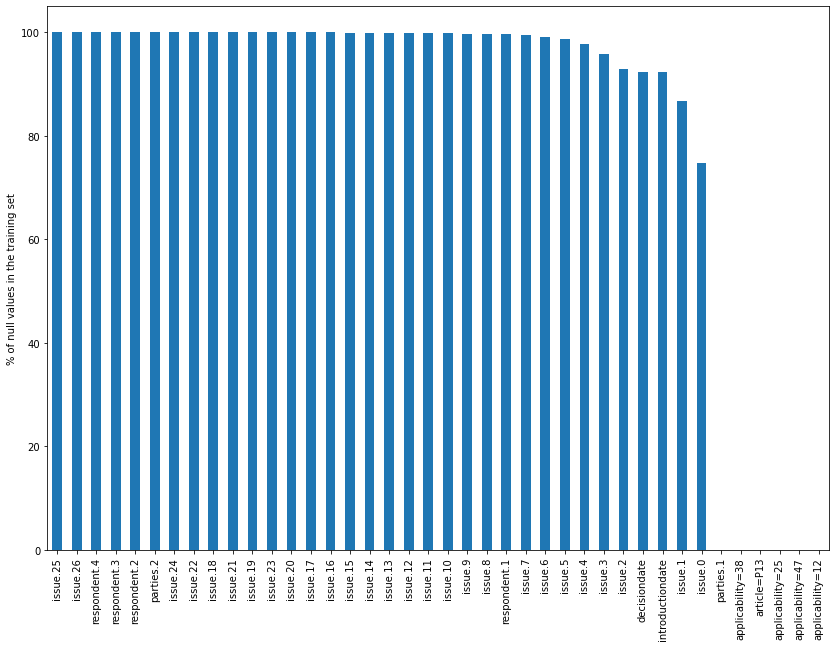

In [7]:
train_null_cols = train_df.isnull().sum().sort_values(ascending=False)/len(train_df)*100
train_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

Text(0, 0.5, '% of null values in the training set')

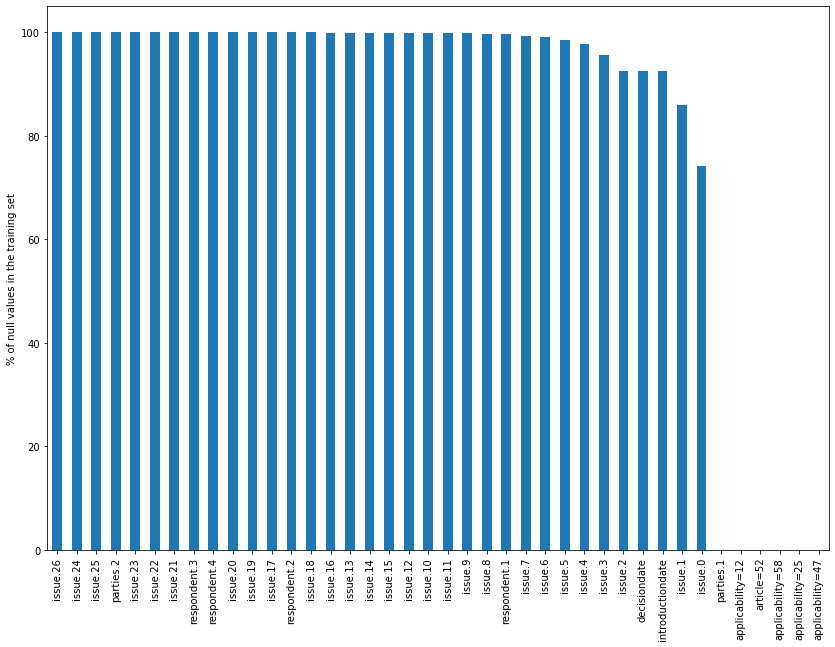

In [8]:
test_null_cols = test_df.isnull().sum().sort_values(ascending=False)/len(test_df)*100
test_null_cols[:40].plot(kind='bar', figsize=(14,10))
plt.ylabel("% of null values in the training set")

In [9]:
# store the columns with >60% values as NULL
train_null_arr = np.array(train_null_cols[:34].index)
test_null_arr = np.array(test_null_cols[:34].index)

In [10]:
# check whether these NULL columns are same in number in both the cases
len(train_null_arr), len(test_null_arr)

(34, 34)

In [11]:
# Are these columns same in both the cases. if yes, then we should get back a null set below
set(train_null_arr).difference(test_null_arr)

set()

In [12]:
# drop these columns
train_df.drop(train_null_arr,axis=1,inplace=True)
test_df.drop(test_null_arr,axis=1,inplace=True)

In [13]:
print("The shape of the training dataset after dropping null columns : {}".format(train_df.shape))
print("The shape of the test dataset after dropping null columns : {}".format(test_df.shape))

The shape of the training dataset after dropping null columns : (8878, 294)
The shape of the test dataset after dropping null columns : (4760, 293)


In [14]:
# how many columns have only one unique value?
cols_with_one_val_train = np.array(train_df.nunique()[train_df.nunique()==1].index)
cols_with_one_val_test = np.array(test_df.nunique()[test_df.nunique()==1].index)

In [15]:
len(cols_with_one_val_test), len(cols_with_one_val_train)

(46, 23)

In [16]:
cols_with_one_val_train

array(['application', 'languageisocode', 'originatingbody_type',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=51', 'applicability=7',
       'applicability=28', 'applicability=29', 'applicability=31',
       'applicability=19', 'applicability=40', 'applicability=34',
       'applicability=27', 'applicability=64', 'applicability=4',
       'applicability=77', 'paragraphs=7-2', 'paragraphs=28-3',
       'paragraphs=27-1-b', 'paragraphs=32-2', 'paragraphs=46-4'],
      dtype=object)

In [17]:
cols_with_one_val_test

array(['application', 'languageisocode', 'originatingbody_type',
       'article=33', 'article=52', 'article=P13',
       'documentcollectionid=CASELAW', 'documentcollectionid=JUDGMENTS',
       'documentcollectionid=ENG', 'applicability=22', 'applicability=15',
       'applicability=50', 'applicability=6', 'applicability=81',
       'applicability=66', 'applicability=49', 'applicability=63',
       'applicability=68', 'applicability=46', 'applicability=35',
       'applicability=54', 'applicability=16', 'applicability=57',
       'applicability=2', 'applicability=67', 'applicability=71',
       'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2',
       'paragraphs=P1-4', 'paragraphs=56-1', 'paragraphs=P7-1-2',
       'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a',
       'paragraphs=4-3', 'paragraphs=52', 'paragraphs=P13-1',
       'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
       'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17',
       'ccl_articl

In [18]:
# Are these columns common in both the sets?
set(cols_with_one_val_test).intersection(cols_with_one_val_train)

{'application',
 'documentcollectionid=CASELAW',
 'documentcollectionid=ENG',
 'documentcollectionid=JUDGMENTS',
 'languageisocode',
 'originatingbody_type'}

In [19]:
# drop the columns with only one unique values in both the datasets
cols_with_one_val = list(set(cols_with_one_val_test).intersection(cols_with_one_val_train))
train_df.drop(cols_with_one_val, axis=1, inplace=True)
test_df.drop(cols_with_one_val, axis=1, inplace=True)

In [20]:
# columns that have one unique val in training set but not in test set -> needs special attention
one_val_train = ['applicability=51', 'applicability=7','applicability=28', 'applicability=29', 'applicability=31',
                 'applicability=19', 'applicability=40', 'applicability=34','applicability=27', 'applicability=64', 
                 'applicability=4','applicability=77', 'paragraphs=7-2', 'paragraphs=28-3','paragraphs=27-1-b', 
                 'paragraphs=32-2', 'paragraphs=46-4']

for col in one_val_train:
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
-------------------------------
train set :  [0]
test set :  [0 1]
---------------------------

In [21]:
# since these columns are constant during training, it is better to remove them from both the datasets. But before
# that let's apply value_counts on these columns in the test set

print("Test set")
for col in one_val_train:
    print("*********************")
    print("col : {}".format(col))
    print(test_df[col].value_counts())
    print("---------------------")

Test set
*********************
col : applicability=51
0    4759
1       1
Name: applicability=51, dtype: int64
---------------------
*********************
col : applicability=7
0    4758
1       2
Name: applicability=7, dtype: int64
---------------------
*********************
col : applicability=28
0    4759
1       1
Name: applicability=28, dtype: int64
---------------------
*********************
col : applicability=29
0    4759
1       1
Name: applicability=29, dtype: int64
---------------------
*********************
col : applicability=31
0    4759
1       1
Name: applicability=31, dtype: int64
---------------------
*********************
col : applicability=19
0    4759
1       1
Name: applicability=19, dtype: int64
---------------------
*********************
col : applicability=40
0    4759
1       1
Name: applicability=40, dtype: int64
---------------------
*********************
col : applicability=34
0    4759
1       1
Name: applicability=34, dtype: int64
---------------------
*

In [22]:
# Therefore, it looks like these columns are constant 99% of the time even in the test set and we can safely 
# remove them.
train_df.drop(one_val_train,axis=1,inplace=True)
test_df.drop(one_val_train,axis=1,inplace=True)

In [23]:
# columns that have one unique val in test set but not in training set -> we can keep these columns
one_val_test = ['article=33', 'article=52', 'article=P13', 'applicability=22', 'applicability=15',
                'applicability=50', 'applicability=6', 'applicability=81', 'applicability=66', 'applicability=49',
                'applicability=63', 'applicability=68', 'applicability=46', 'applicability=35','applicability=54', 
                'applicability=16', 'applicability=57', 'applicability=2', 'applicability=67', 'applicability=71',
                'applicability=59', 'paragraphs=27-2', 'paragraphs=35-2', 'paragraphs=P1-4', 'paragraphs=56-1', 
                'paragraphs=P7-1-2', 'paragraphs=15-3', 'paragraphs=33', 'paragraphs=28-1-a', 'paragraphs=4-3',
                'paragraphs=52', 'paragraphs=P13-1', 'paragraphs=P7-4-1', 'paragraphs=P4-3', 'paragraphs=29-1',
                'paragraphs=28-1', 'paragraphs=P6-2', 'ccl_article=17', 'ccl_article=46', 'ccl_article=p12']

for col in one_val_test:
    print("column name : ", col)
    print("train set : ", train_df[col].unique())
    print("test set : ", test_df[col].unique())
    print("-------------------------------")

column name :  article=33
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=52
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  article=P13
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=22
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=15
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=50
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=6
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=81
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=66
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability=49
train set :  [0 1]
test set :  [0]
-------------------------------
column name :  applicability

In [24]:
# column 'ccl_article=17' has two binary values as -1 and 0. Let's investigate it.
train_df['ccl_article=17'].value_counts(normalize=True)

 0    0.999887
-1    0.000113
Name: ccl_article=17, dtype: float64

In [25]:
test_df['ccl_article=17'].value_counts(normalize=True)

0    1.0
Name: ccl_article=17, dtype: float64

In [26]:
# must be a mistake in entering value in the column 'ccl_article=17'. Let's drop this column as well
train_df.drop('ccl_article=17',axis=1,inplace=True)
test_df.drop('ccl_article=17',axis=1,inplace=True)

In [27]:
# Now let's look at distribution of categories in these columns in the training set
print("Train set")
one_val_test.remove('ccl_article=17')
for col in one_val_test:
    print("*********************")
    print("col : {}".format(col))
    print(train_df[col].value_counts())
    print("---------------------")

Train set
*********************
col : article=33
0    8877
1       1
Name: article=33, dtype: int64
---------------------
*********************
col : article=52
0    8876
1       2
Name: article=52, dtype: int64
---------------------
*********************
col : article=P13
0    8877
1       1
Name: article=P13, dtype: int64
---------------------
*********************
col : applicability=22
0    8877
1       1
Name: applicability=22, dtype: int64
---------------------
*********************
col : applicability=15
0    8877
1       1
Name: applicability=15, dtype: int64
---------------------
*********************
col : applicability=50
0    8876
1       2
Name: applicability=50, dtype: int64
---------------------
*********************
col : applicability=6
0    8876
1       2
Name: applicability=6, dtype: int64
---------------------
*********************
col : applicability=81
0    8877
1       1
Name: applicability=81, dtype: int64
---------------------
*********************
col : applic

In [28]:
# So, as we can see almost all the columns except 'paragraphs=35-2' has not more than 3 entries associated with 
# category=1. Even if the col 'paragraphs=35-2' has a very tiny fraction of category=1. So, we will drop these 
# columns from both the training and test sets as of now.

train_df.drop(one_val_test,axis=1,inplace=True)
test_df.drop(one_val_test,axis=1,inplace=True)

In [29]:
print("The shape of the training set after dropping columns with constant values : {}".format(train_df.shape))
print("The shape of the test set after dropping columns with constant values : {}".format(test_df.shape))

The shape of the training set after dropping columns with constant values : (8878, 231)
The shape of the test set after dropping columns with constant values : (4760, 230)


In [30]:
# check whether there is any duplicate row in both the datasets
print(train_df.duplicated().value_counts())
print("--------------------------")
print(test_df.duplicated().value_counts())

False    8878
dtype: int64
--------------------------
False    4760
dtype: int64


In [31]:
# let's now look at the cols with 'object' type
obj_cols_train = train_df.select_dtypes(include='object')
obj_cols_test = test_df.select_dtypes(include='object')

In [32]:
# are columns with object type are same in both the datsets
print("Train set")
print(list(obj_cols_train.columns))
print("-------------------------------------------------------------------------------------------------------------")
print("Test set")
print(list(obj_cols_test.columns))

Train set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']
-------------------------------------------------------------------------------------------------------------
Test set
['appno', 'country.alpha2', 'country.name', 'docname', 'doctypebranch', 'ecli', 'itemid', 'judgementdate', 'kpdate', 'originatingbody_name', 'parties.0', 'parties.1', 'respondent.0']


In [33]:
# let's check these columns one by one

**Feature 'appno'**

In [34]:
print("col : appno")
print("Total no. of unique values in the training set : {}".format(train_df['appno'].nunique()))
print("Total no. of unique values in the test set : {}".format(test_df['appno'].nunique()))

col : appno
Total no. of unique values in the training set : 8799
Total no. of unique values in the test set : 4760


In [35]:
# this feature is more likely to be same as that of fetaure like id with different value for each instance and is
# not significant to train on. Let's drop it.
train_df.drop('appno',axis=1,inplace=True)
test_df.drop('appno',axis=1,inplace=True)

**Feature 'country.alpha2'**

In [36]:
print("col : country.alpha2")
print("Total no. of unique values in the training set : {}".format(train_df['country.alpha2'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.alpha2'].nunique()))
print("Train set : ",train_df['country.alpha2'].unique(),"\n")
print("Test set : ",test_df['country.alpha2'].unique(),"\n")

col : country.alpha2
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['ru' 'tr' 'si' 'ch' 'gr' 'pl' 'gb' 'hu' 'es' 'ua' 'me' 'cz' 'lt' 'az'
 'md' 'mk' 'ro' 'rs' 'de' 'bg' 'al' 'at' 'hr' 'sk' 'it' 'fi' 'fr' 'se'
 'no' 'is' 'am' 'mt' 'be' 'cy' 'ge' 'pt' 'dk' 'lv' 'ee' 'ba' 'nl' 'ie'
 'li' 'sm' 'lu' 'ad'] 

Test set :  ['mk' 'ua' 'ie' 'ru' 'bg' 'pl' 'gr' 'hu' 'de' 'at' 'hr' 'lt' 'md' 'si'
 'fi' 'tr' 'ro' 'cz' 'dk' 'gb' 'al' 'se' 'nl' 'rs' 'sk' 'is' 'lv' 'cy'
 'ge' 'it' 'ch' 'mt' 'es' 'pt' 'ba' 'ee' 'az' 'am' 'sm' 'no' 'be' 'me'
 'fr' 'lu' 'ad' 'li'] 



In [37]:
# do categories present in both of these files same?
print(set(train_df['country.alpha2'].unique()).difference(test_df['country.alpha2'].unique()))
print(set(test_df['country.alpha2'].unique()).difference(train_df['country.alpha2'].unique()))

set()
set()


In [38]:
# what is the distribution of different categories?
print("Train Set:")
print(train_df['country.alpha2'].value_counts(normalize=True))
print("\n")
print("Test Set:")
print(test_df['country.alpha2'].value_counts(normalize=True))

Train Set:
ru    0.185515
ua    0.105091
tr    0.097770
pl    0.069498
hu    0.041000
ro    0.037734
bg    0.034242
gb    0.033904
hr    0.028723
at    0.026245
sk    0.025569
it    0.025118
md    0.024668
si    0.023541
de    0.022077
fr    0.019374
az    0.015093
lt    0.014643
rs    0.014305
fi    0.013066
mk    0.012390
gr    0.010926
nl    0.010813
am    0.009687
ch    0.008223
mt    0.007885
se    0.007547
lv    0.007434
ge    0.006871
cy    0.006195
pt    0.005745
cz    0.005745
ba    0.005632
be    0.005407
es    0.005294
ee    0.004956
al    0.004731
me    0.004393
no    0.004055
dk    0.002591
ie    0.002365
is    0.001577
sm    0.000788
lu    0.000788
li    0.000676
ad    0.000113
Name: country.alpha2, dtype: float64


Test Set:
ru    0.205462
tr    0.095168
ua    0.090966
pl    0.074370
hu    0.041597
ro    0.039286
gb    0.034034
bg    0.033193
hr    0.028151
md    0.027941
sk    0.025210
at    0.023950
si    0.023109
it    0.020588
de    0.019118
rs    0.017227
lt    0.01

**Feature 'country.name'**

In [39]:
print("col : country.name")
print("Total no. of unique values in the training set : {}".format(train_df['country.name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['country.name'].nunique()))
print("Train set : ",train_df['country.name'].unique(),"\n")
print("Test set : ",test_df['country.name'].unique(),"\n")

col : country.name
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['Russian Federation' 'Turkey' 'Slovenia' 'Switzerland' 'Greece' 'Poland'
 'United Kingdom' 'Hungary' 'Spain' 'Ukraine' 'Montenegro' 'Czechia'
 'Lithuania' 'Azerbaijan' 'Moldova, Republic of' 'North Macedonia'
 'Romania' 'Serbia' 'Germany' 'Bulgaria' 'Albania' 'Austria' 'Croatia'
 'Slovakia' 'Italy' 'Finland' 'France' 'Sweden' 'Norway' 'Iceland'
 'Armenia' 'Malta' 'Belgium' 'Cyprus' 'Georgia' 'Portugal' 'Denmark'
 'Latvia' 'Estonia' 'Bosnia and Herzegovina' 'Netherlands' 'Ireland'
 'Liechtenstein' 'San Marino' 'Luxembourg' 'Andorra'] 

Test set :  ['North Macedonia' 'Ukraine' 'Ireland' 'Russian Federation' 'Bulgaria'
 'Poland' 'Greece' 'Hungary' 'Germany' 'Austria' 'Croatia' 'Lithuania'
 'Moldova, Republic of' 'Slovenia' 'Finland' 'Turkey' 'Romania' 'Czechia'
 'Denmark' 'United Kingdom' 'Albania' 'Sweden' 'Netherlands' 'Serbia'
 'Slovakia' 'Iceland' 'Lat

In [40]:
# do categories present in both of these files same?
print(set(train_df['country.name'].unique()).difference(test_df['country.name'].unique()))
print(set(test_df['country.name'].unique()).difference(train_df['country.name'].unique()))

set()
set()


In [41]:
# Actually, country.alpha2 and country.name are the same feature. We can drop one of them as of now. Let's drop 
# country.name.
train_df.drop("country.name",axis=1,inplace=True)
test_df.drop("country.name",axis=1,inplace=True)

**Feature 'docname'**

In [42]:
print("col : docname")
print("Total no. of unique values in the training set : {}".format(train_df['docname'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['docname'].nunique()))
print("Train set : ",train_df['docname'].unique(),"\n")
print("Test set : ",test_df['docname'].unique(),"\n")

col : docname
Total no. of unique values in the training set : 8682
Total no. of unique values in the test set : 4727 

Train set :  ['CASE OF KOKOSHKINA v. RUSSIA' 'CASE OF ÖZCAN v. TURKEY'
 'CASE OF DANIJEL PEČNIK v. SLOVENIA' ... 'CASE OF BABUSHKIN v. RUSSIA'
 'CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN' 'CASE OF TUR v. POLAND'] 

Test set :  ['CASE OF CAMINSKI v. "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"'
 'CASE OF KUSHCH v. UKRAINE' 'CASE OF O. v. IRELAND' ...
 'CASE OF PASCAL v. ROMANIA' 'CASE OF DAOUKOPOULOS v. GREECE'
 'CASE OF VOGLREITER v. AUSTRIA'] 



In [43]:
train_df['docname'].unique()[:5]

array(['CASE OF KOKOSHKINA v. RUSSIA', 'CASE OF ÖZCAN v. TURKEY',
       'CASE OF DANIJEL PEČNIK v. SLOVENIA',
       'CASE OF PALANCI v. SWITZERLAND',
       'CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA'], dtype=object)

In [44]:
train_df[['country.alpha2', 'docname']]

country.alpha2                                       docname
0                ru                  CASE OF KOKOSHKINA v. RUSSIA
1                tr                       CASE OF ÖZCAN v. TURKEY
2                si            CASE OF DANIJEL PEČNIK v. SLOVENIA
3                ch                CASE OF PALANCI v. SWITZERLAND
4                ru  CASE OF AMANAT ILYASOVA AND OTHERS v. RUSSIA
...             ...                                           ...
8873             ua        CASE OF RASHITOV AND OTHERS v. UKRAINE
8874             ru                     CASE OF URMANOV v. RUSSIA
8875             ru                   CASE OF BABUSHKIN v. RUSSIA
8876             es    CASE OF BRUALLA GÓMEZ DE LA TORRE v. SPAIN
8877             pl                         CASE OF TUR v. POLAND

[8878 rows x 2 columns]

In [45]:
# this feature contains two pieces of information - person name and the country name against which he/she filed a 
# case. The country information is already present in the feature country.alpha2 and name of a person is more similar
# to ids. So, we can drop this feature as well.

train_df.drop('docname', axis=1,inplace=True)
test_df.drop('docname', axis=1,inplace=True)

**Feature 'doctypebranch'**

In [46]:
print("col : doctypebranch")
print("Total no. of unique values in the training set : {}".format(train_df['doctypebranch'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['doctypebranch'].nunique()))
print("Train set : ",train_df['doctypebranch'].unique(),"\n")
print("Test set : ",test_df['doctypebranch'].unique(),"\n")

col : doctypebranch
Total no. of unique values in the training set : 3
Total no. of unique values in the test set : 3 

Train set :  ['CHAMBER' 'COMMITTEE' 'GRANDCHAMBER'] 

Test set :  ['COMMITTEE' 'CHAMBER' 'GRANDCHAMBER'] 



**Feature 'ecli'**

In [47]:
print("col : ecli")
print("Total no. of unique values in the training set : {}".format(train_df['ecli'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['ecli'].nunique()))
print("Train set : ",train_df['ecli'].unique(),"\n")
print("Test set : ",test_df['ecli'].unique(),"\n")

col : ecli
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['ECLI:CE:ECHR:2009:0528JUD000205208' 'ECLI:CE:ECHR:2018:0710JUD000472807'
 'ECLI:CE:ECHR:2012:1018JUD004413506' ...
 'ECLI:CE:ECHR:2007:1018JUD006725301' 'ECLI:CE:ECHR:1997:1219JUD002673795'
 'ECLI:CE:ECHR:2007:1023JUD002169505'] 

Test set :  ['ECLI:CE:ECHR:2011:0224JUD000119404' 'ECLI:CE:ECHR:2015:1203JUD005386511'
 'ECLI:CE:ECHR:2012:0119JUD004383807' ...
 'ECLI:CE:ECHR:2012:0417JUD000080509' 'ECLI:CE:ECHR:2018:0712JUD004471116'
 'ECLI:CE:ECHR:2019:0919JUD002115518'] 



In [48]:
# This feature is basically unique id associated with a case and can be dropped.
train_df.drop('ecli',axis=1,inplace=True)
test_df.drop('ecli',axis=1,inplace=True)

**Feature 'itemid'**

In [49]:
print("col : itemid")
print("Total no. of unique values in the training set : {}".format(train_df['itemid'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['itemid'].nunique()))
print("Train set : ",train_df['itemid'].unique(),"\n")
print("Test set : ",test_df['itemid'].unique(),"\n")

col : itemid
Total no. of unique values in the training set : 8878
Total no. of unique values in the test set : 4760 

Train set :  ['001-92699' '001-184490' '001-113810' ... '001-82818' '001-58127'
 '001-82921'] 

Test set :  ['001-103613' '001-158963' '001-108659' ... '001-110382' '001-184485'
 '001-195866'] 



In [50]:
# again a feature similar to ids and hence dropped.
train_df.drop('itemid',axis=1,inplace=True)
test_df.drop('itemid',axis=1,inplace=True)

**Feature 'judgementdate'**

In [51]:
print("col : judgementdate")
print("Total no. of unique values in the training set : {}".format(train_df['judgementdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['judgementdate'].nunique()))
print("Train set : ",train_df['judgementdate'].unique(),"\n")
print("Test set : ",test_df['judgementdate'].unique(),"\n")

col : judgementdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [52]:
# date like feature. We will come back to this later.

**Feature 'kpdate'**

In [53]:
print("col : kpdate")
print("Total no. of unique values in the training set : {}".format(train_df['kpdate'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['kpdate'].nunique()))
print("Train set : ",train_df['kpdate'].unique(),"\n")
print("Test set : ",test_df['kpdate'].unique(),"\n")

col : kpdate
Total no. of unique values in the training set : 1906
Total no. of unique values in the test set : 1584 

Train set :  ['28/05/2009' '10/07/2018' '18/10/2012' ... '29/10/2013' '04/12/2015'
 '19/12/1997'] 

Test set :  ['24/02/2011' '03/12/2015' '19/01/2012' ... '23/10/1990' '10/03/2009'
 '22/07/1999'] 



In [54]:
# looks like features 'judgementdate' and 'kpdate' represent the same thing.
train_df[['judgementdate','kpdate']].head(10)

judgementdate      kpdate
0    28/05/2009  28/05/2009
1    10/07/2018  10/07/2018
2    18/10/2012  18/10/2012
3    25/03/2014  25/03/2014
4    01/10/2009  01/10/2009
5    11/04/2002  11/04/2002
6    20/06/2006  20/06/2006
7    27/11/2007  27/11/2007
8    01/03/2001  01/03/2001
9    02/12/2008  02/12/2008

In [55]:
test_df[['judgementdate','kpdate']].head(10)

judgementdate      kpdate
0    24/02/2011  24/02/2011
1    03/12/2015  03/12/2015
2    19/01/2012  19/01/2012
3    04/07/2013  04/07/2013
4    26/02/2009  26/02/2009
5    12/03/2009  12/03/2009
6    27/11/2014  27/11/2014
7    12/02/2009  12/02/2009
8    23/10/2012  23/10/2012
9    13/01/2011  13/01/2011

In [56]:
# So these two are duplicate features and we drop one of them.
train_df.drop('kpdate',axis=1,inplace=True)
test_df.drop('kpdate',axis=1,inplace=True)

**Feature 'originatingbody_name'**

In [57]:
print("col : originatingbody_name")
print("Total no. of unique values in the training set : {}".format(train_df['originatingbody_name'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['originatingbody_name'].nunique()))
print("Train set : ",train_df['originatingbody_name'].unique(),"\n")
print("Test set : ",test_df['originatingbody_name'].unique(),"\n")

col : originatingbody_name
Total no. of unique values in the training set : 13
Total no. of unique values in the test set : 13 

Train set :  ['First Section' 'Second Section Committee' 'Fith Section'
 'Second Section' 'Fourth Section' 'Chamber' 'Fourth Section Committee'
 'Fith Section Committee' 'Third Section Committee' 'Third Section'
 'First Section Committee' 'Grand Chamber' 'Plenary'] 

Test set :  ['Fith Section Committee' 'Fith Section' 'First Section' 'Fourth Section'
 'First Section Committee' 'Fourth Section Committee'
 'Third Section Committee' 'Second Section Committee' 'Third Section'
 'Second Section' 'Grand Chamber' 'Chamber' 'Plenary'] 



In [58]:
# are all categories same in both the datasets?
print(set(train_df['originatingbody_name'].unique()).difference(test_df['originatingbody_name']))
print(set(test_df['originatingbody_name'].unique()).difference(train_df['originatingbody_name']))

set()
set()


**Feature 'parties.0'**

In [59]:
print("col : parties.0")
print("Total no. of unique values in the training set : {}".format(train_df['parties.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.0'].nunique()))
print("Train set : ",train_df['parties.0'].unique(),"\n")
print("Test set : ",test_df['parties.0'].unique(),"\n")

col : parties.0
Total no. of unique values in the training set : 8361
Total no. of unique values in the test set : 4624 

Train set :  ['KOKOSHKINA' 'ÖZCAN' 'DANIJEL PEČNIK' ... 'BABUSHKIN'
 'BRUALLA GÓMEZ DE LA TORRE' 'TUR'] 

Test set :  ['CAMINSKI' 'KUSHCH' 'O.' ... 'PASCAL' 'DAOUKOPOULOS' 'VOGLREITER'] 



In [60]:
# if we go back to the dropped feature 'docname', we can associate the feature 'parties.0'  most likely to represent the name
# of person filing the case. Since, we have dropped this info earlier, we will drop it this time also.

train_df.drop('parties.0',axis=1,inplace=True)
test_df.drop('parties.0',axis=1,inplace=True)

**Feature 'parties.1'**

In [61]:
print("col : parties.1")
print("Total no. of unique values in the training set : {}".format(train_df['parties.1'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['parties.1'].nunique()))
print("Train set : ",train_df['parties.1'].unique(),"\n")
print("Test set : ",test_df['parties.1'].unique(),"\n")

col : parties.1
Total no. of unique values in the training set : 93
Total no. of unique values in the test set : 76 

Train set :  ['RUSSIA' 'TURKEY' 'SLOVENIA' 'SWITZERLAND' 'GREECE' 'POLAND'
 'THE UNITED KINGDOM' 'HUNGARY' 'SPAIN' 'UKRAINE' 'MONTENEGRO'
 'THE CZECH REPUBLIC [Extracts]' 'LITHUANIA' 'AZERBAIJAN' 'MOLDOVA'
 '"THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"' 'ROMANIA' 'SERBIA'
 'GERMANY' 'BULGARIA' 'ALBANIA' 'AUSTRIA' 'CROATIA' 'SLOVAKIA' 'ITALY'
 'FINLAND' 'FRANCE [Extracts]' 'SWEDEN' 'NORWAY' 'FRANCE' 'ICELAND'
 'ARMENIA' 'MALTA' 'BELGIUM [Extracts]' 'BELGIUM' 'CYPRUS' 'GEORGIA'
 'THE REPUBLIC OF MOLDOVA' 'PORTUGAL' 'THE CZECH REPUBLIC' 'DENMARK'
 'LATVIA' 'ESTONIA' 'BOSNIA AND HERZEGOVINA' 'THE NETHERLANDS'
 'THE REPUBLIC OF MOLDOVA AND RUSSIA' 'SAN MARINO AND ITALY'
 'ITALY [Extracts]' 'IRELAND' 'ROMANIA [Extracts]' 'NORTH MACEDONIA'
 'BULGARIA [Extracts]' 'LIECHTENSTEIN' 'AZERBAIJAN AND TURKEY'
 'UKRAINE [Extracts]' 'ITALIE' 'MONTENEGRO AND SERBIA'
 'ROMANIA AND BULGARIA

In [62]:
# This feature seems to represent country names and might be duplicate with country.alpha2

train_df[['country.alpha2','parties.1']].head(10)

country.alpha2           parties.1
0             ru              RUSSIA
1             tr              TURKEY
2             si            SLOVENIA
3             ch         SWITZERLAND
4             ru              RUSSIA
5             gr              GREECE
6             pl              POLAND
7             gb  THE UNITED KINGDOM
8             hu             HUNGARY
9             tr              TURKEY

In [63]:
test_df[['country.alpha2','parties.1']].head()

country.alpha2                                    parties.1
0             mk  "THE FORMER YUGOSLAV REPUBLIC OF MACEDONIA"
1             ua                                      UKRAINE
2             ie                                      IRELAND
3             ru                                       RUSSIA
4             ru                                       RUSSIA

In [64]:
# our guess is right! We drop this feature.

train_df.drop('parties.1',axis=1,inplace=True)
test_df.drop('parties.1',axis=1,inplace=True)

**Feature 'respondent.0'**

In [65]:
print("col : respondent.0")
print("Total no. of unique values in the training set : {}".format(train_df['respondent.0'].nunique()))
print("Total no. of unique values in the test set : {} \n".format(test_df['respondent.0'].nunique()))
print("Train set : ",train_df['respondent.0'].unique(),"\n")
print("Test set : ",test_df['respondent.0'].unique(),"\n")

col : respondent.0
Total no. of unique values in the training set : 46
Total no. of unique values in the test set : 46 

Train set :  ['RUS' 'TUR' 'SVN' 'CHE' 'GRC' 'POL' 'GBR' 'HUN' 'ESP' 'UKR' 'MNE' 'CZE'
 'LTU' 'AZE' 'MDA' 'MKD' 'ROU' 'SRB' 'DEU' 'BGR' 'ALB' 'AUT' 'HRV' 'SVK'
 'ITA' 'FIN' 'FRA' 'SWE' 'NOR' 'ISL' 'ARM' 'MLT' 'BEL' 'CYP' 'GEO' 'PRT'
 'DNK' 'LVA' 'EST' 'BIH' 'NLD' 'IRL' 'LIE' 'SMR' 'LUX' 'AND'] 

Test set :  ['MKD' 'UKR' 'IRL' 'RUS' 'BGR' 'POL' 'GRC' 'HUN' 'DEU' 'AUT' 'HRV' 'LTU'
 'MDA' 'SVN' 'FIN' 'TUR' 'ROU' 'CZE' 'DNK' 'GBR' 'ALB' 'SWE' 'NLD' 'SRB'
 'SVK' 'ISL' 'LVA' 'CYP' 'GEO' 'ITA' 'CHE' 'MLT' 'ESP' 'PRT' 'BIH' 'EST'
 'AZE' 'ARM' 'SMR' 'NOR' 'BEL' 'MNE' 'FRA' 'LUX' 'AND' 'LIE'] 



In [66]:
# again this info is likely to be same as the feature 'country.alpha2'
train_df[['country.alpha2','respondent.0']].head(10)

country.alpha2 respondent.0
0             ru          RUS
1             tr          TUR
2             si          SVN
3             ch          CHE
4             ru          RUS
5             gr          GRC
6             pl          POL
7             gb          GBR
8             hu          HUN
9             tr          TUR

In [67]:
test_df[['country.alpha2','respondent.0']].head(10)

country.alpha2 respondent.0
0             mk          MKD
1             ua          UKR
2             ie          IRL
3             ru          RUS
4             ru          RUS
5             ru          RUS
6             ua          UKR
7             bg          BGR
8             pl          POL
9             gr          GRC

In [68]:
# hence we drop it.
train_df.drop('respondent.0',axis=1,inplace=True)
test_df.drop('respondent.0',axis=1,inplace=True)

In [69]:
# remaining cols with 'object' type
final_obj_cols = train_df.select_dtypes(include='object').columns
final_obj_cols

Index(['country.alpha2', 'doctypebranch', 'judgementdate',
       'originatingbody_name'],
      dtype='object')

In [70]:
print("The shape of the training set after dropping categorical features : {}".format(train_df.shape))
print("The shape of the test set after dropping categorical features : {}".format(test_df.shape))

The shape of the training set after dropping categorical features : (8878, 222)
The shape of the test set after dropping categorical features : (4760, 221)


In [71]:
# let's look at the mixed data type features now. Since, we have dropped quite a few cols already, let's first 
# check whether these features are still present in the respective datasets.

print([col for col in mixed_cols_train if col in train_df.columns])
print([col for col in mixed_cols_test if col in test_df.columns])

[]
[]


In [72]:
# so, we have already removed these features from our dataset. Let's look at some non-categorical features.
train_df.select_dtypes(include='bool')

separateopinion
0               False
1               False
2                True
3                True
4               False
...               ...
8873            False
8874            False
8875            False
8876            False
8877            False

[8878 rows x 1 columns]

In [73]:
test_df.select_dtypes(include='bool')

separateopinion
0               False
1               False
2               False
3               False
4               False
...               ...
4755            False
4756            False
4757            False
4758            False
4759            False

[4760 rows x 1 columns]

In [74]:
# let's convert this as follows : True->1, False->0.
train_df['separateopinion'] = train_df['separateopinion'].apply(lambda x:1 if x is True else 0)
test_df['separateopinion'] = test_df['separateopinion'].apply(lambda x:1 if x is True else 0)

In [75]:
train_df.select_dtypes(include='float64')

rank
0      685.417419
1     2641.901855
2      942.213440
3     1121.770142
4      704.821594
...           ...
8873  2424.463379
8874  1698.433228
8875   607.506531
8876   362.514832
8877   608.091614

[8878 rows x 1 columns]

In [76]:
test_df.select_dtypes(include='float64')

rank
0      794.766724
1     1448.891235
2      868.238831
3     1024.145508
4      672.862183
...           ...
4755  1678.799805
4756  1161.929688
4757   892.368225
4758  2646.512939
4759  4270.748047

[4760 rows x 1 columns]

In [77]:
# keep in mind, this feature m ght require scaling in future.

In [77]:
train_df.select_dtypes(include='int64')

originatingbody  respondentOrderEng  separateopinion  sharepointid  \
0                   4                  38                0        349418   
1                  26                  47                0        476616   
2                  23                  43                1        373194   
3                   5                  46                1        392525   
4                   4                  38                0        423100   
...               ...                 ...              ...           ...   
8873               29                  48                0        473530   
8874               27                  38                0        456937   
8875                6                  38                0        340823   
8876                9                  44                0        443927   
8877                7                  35                0        343850   

      typedescription  article=3  article=6  article=P1  article=5  article=8  \
0                  15          1          0           0          1          0   
1                  15          0          0           0          1          0   
2                  15          0          1           0          0          0   
3                  15          0          0           0          0          1   
4                  15          1          0           0          1          0   
...               ...        ...        ...         ...        ...        ...   
8873               15          0          1           0          0          0   
8874               15          0          0           0          1          0   
8875               15          1          0           0          0          0   
8876               15          0          1           0          0          0   
8877               15          0          1           0          0          0   

      ...  ccl_article=5  ccl_article=6  ccl_article=7  ccl_article=8  \
0     ...              1              0              0              0   
1     ...              1              0              0              0   
2     ...              0              1              0              0   
3     ...              0              0              0             -1   
4     ...              1              0              0              0   
...   ...            ...            ...            ...            ...   
8873  ...              0              1              0              0   
8874  ...              1              0              0              0   
8875  ...              0              0              0              0   
8876  ...              0             -1              0              0   
8877  ...              0              1              0              0   

      ccl_article=9  ccl_article=p1  ccl_article=p4  ccl_article=p6  \
0                 0               0               0               0   
1                 0               0               0               0   
2                 0               0               0               0   
3                 0               0               0               0   
4                 0               0               0               0   
...             ...             ...             ...             ...   
8873              0               0               0               0   
8874              0               0               0               0   
8875              0               0               0               0   
8876              0               0               0               0   
8877              0               0               0               0   

      ccl_article=p7  importance  
0                  0           4  
1                  0           4  
2                  0           4  
3                  0           4  
4                  0           4  
...              ...         ...  
8873               0           4  
8874               0           4  
8875               0           4  
8876               0           3  
8877 

In [78]:
# let's first examine non-binary features

**Feature 'sharepointid'**

In [79]:
print("Total number of unique values in the training set : {}".format(train_df['sharepointid'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['sharepointid'].nunique()))

Total number of unique values in the training set : 8878
Total number of unique values in the test set : 4760


In [80]:
# again, this feature is like ids and can be dropped with no harm.
train_df.drop('sharepointid',axis=1,inplace=True)
test_df.drop('sharepointid',axis=1,inplace=True)

**Feature 'originatingbody'**

In [81]:
print("Total number of unique values in the training set : {}".format(train_df['originatingbody'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['originatingbody'].nunique()))

Total number of unique values in the training set : 13
Total number of unique values in the test set : 13


**Feature 'respondentOrderEng'**

In [82]:
print("Total number of unique values in the training set : {}".format(train_df['respondentOrderEng'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['respondentOrderEng'].nunique()))

Total number of unique values in the training set : 46
Total number of unique values in the test set : 46


**Feature 'typedescription'**

In [83]:
print("Total number of unique values in the training set : {}".format(train_df['typedescription'].nunique()))
print("Total number of unique values in the test set : {}".format(test_df['typedescription'].nunique()))

Total number of unique values in the training set : 5
Total number of unique values in the test set : 3


In [84]:
train_df['typedescription'].unique()

array([15, 14, 18, 12, 19])

In [85]:
test_df['typedescription'].unique()

array([15, 14, 12])

In [86]:
# the feature 'typedescription' looks like a categorical feature in disguise. We can use as it is or apply 
# onehotencoding.

# let's now select only the binary features.
binary_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()==2].index)
binary_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()==2].index)

In [87]:
print("Number of binary features in the training set : {}".format(len(binary_feat_train)))
print("Number of binary features in the test set : {}".format(len(binary_feat_test)))

Number of binary features in the training set : 192
Number of binary features in the test set : 194


In [88]:
# there two more binary features in test set compared to the traing set. 
print(len(set(binary_feat_test).intersection(binary_feat_train)))
print(len(set(binary_feat_train).intersection(binary_feat_test)))

192
192


In [89]:
set(binary_feat_test).difference(binary_feat_train)

{'ccl_article=12', 'ccl_article=25'}

In [90]:
test_df['ccl_article=12'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=12, dtype: float64

In [91]:
test_df['ccl_article=25'].value_counts(normalize=True)

0    0.99958
1    0.00042
Name: ccl_article=25, dtype: float64

In [92]:
train_df['ccl_article=12'].value_counts(normalize=True)

 0    0.998085
-1    0.001126
 1    0.000788
Name: ccl_article=12, dtype: float64

In [93]:
train_df['ccl_article=25'].value_counts(normalize=True)

 0    0.999099
 1    0.000563
-1    0.000338
Name: ccl_article=25, dtype: float64

In [94]:
# since 99% instances in both these features belong to a single category, we can assume that they are basically
# constant features and should be dropped.
binary_feat_to_drop = list(set(binary_feat_test).difference(binary_feat_train))
train_df.drop(binary_feat_to_drop,axis=1,inplace=True)
test_df.drop(binary_feat_to_drop,axis=1,inplace=True)

In [95]:
binary_feat_test.remove(binary_feat_to_drop[0])
binary_feat_test.remove(binary_feat_to_drop[1])

In [96]:
# check whether any binary feature contains suspicious values, e.g., -1,999 etc.

cols_train = [col for col in binary_feat_train for val in train_df[col].unique() if val!=0 and val!=1]
cols_test = [col for col in binary_feat_test for val in test_df[col].unique() if val!=0 and val!=1]

In [97]:
cols_train

['ccl_article=18']

In [98]:
cols_test

['ccl_article=18']

In [99]:
print("Train set")
print(train_df['ccl_article=18'].value_counts(normalize=True))
print("----------------------------------------")
print("Test set")
print(test_df['ccl_article=18'].value_counts(normalize=True))

Train set
 0    0.998085
-1    0.001915
Name: ccl_article=18, dtype: float64
----------------------------------------
Test set
 0    0.997269
-1    0.002731
Name: ccl_article=18, dtype: float64


In [100]:
# So, like before, we can drop this column. 
train_df.drop('ccl_article=18',axis=1,inplace=True)
test_df.drop('ccl_article=18',axis=1,inplace=True)

In [101]:
# let's now look at the features which are binary in real but contains some garbage values.

pseudo_bin_feat_train = list(train_df.select_dtypes(include='int64').nunique()[train_df.select_dtypes(include='int64').nunique()>2].index)
pseudo_bin_feat_test = list(test_df.select_dtypes(include='int64').nunique()[test_df.select_dtypes(include='int64').nunique()>2].index)

In [102]:
set(pseudo_bin_feat_train).difference(pseudo_bin_feat_test)

{'importance'}

In [103]:
# But we have already investigated some of these non-binary features. Let's remove them.
pseudo_bin_feat_train.remove('originatingbody')
pseudo_bin_feat_train.remove('respondentOrderEng')
pseudo_bin_feat_train.remove('typedescription')
pseudo_bin_feat_train.remove('importance')
pseudo_bin_feat_test.remove('originatingbody')
pseudo_bin_feat_test.remove('respondentOrderEng')
pseudo_bin_feat_test.remove('typedescription')

In [104]:
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts())
    print("Test set \n")
    print(test_df[col].value_counts())
    print("--------------------------------------------------------------")

Train set 

 0    8117
 1     700
-1      61
Name: ccl_article=1, dtype: int64
Test set 

 0    4315
 1     404
-1      41
Name: ccl_article=1, dtype: int64
--------------------------------------------------------------
Train set 

 0    8449
 1     332
-1      97
Name: ccl_article=10, dtype: int64
Test set 

 0    4514
 1     185
-1      61
Name: ccl_article=10, dtype: int64
--------------------------------------------------------------
Train set 

 0    8718
 1     136
-1      24
Name: ccl_article=11, dtype: int64
Test set 

 0    4657
 1      86
-1      17
Name: ccl_article=11, dtype: int64
--------------------------------------------------------------
Train set 

 0    8121
 1     694
-1      63
Name: ccl_article=13, dtype: int64
Test set 

 0    4341
 1     364
-1      55
Name: ccl_article=13, dtype: int64
--------------------------------------------------------------
Train set 

 0    8829
-1      46
 1       3
Name: ccl_article=14, dtype: int64
Test set 

 0    4731
-1      28
 

In [106]:
# the feature 'ccl_article=14' is quite peculliar. It has more entries for category -1 in both train and test sets 
# as compared tocategory 1. It could be a typo either in favour of -1 or +1. If we assume that 1 is a typo as it is 
# fewer in number, then we can replace 1 by -1 and treat it as null. But then it becomes a constant feature with one
# unique value which is zero and some null entries (when we impute it by 0). In that situation, it is better to 
# drop this feature.
# However, if we do reverse, i.e., replace -1 by 1, then it becomes a proper binary feature. Let's first go with the
# first option. If our model performs poorly, we will try to tweak it.

train_df.drop('ccl_article=14',axis=1,inplace=True)
test_df.drop('ccl_article=14',axis=1,inplace=True)

In [105]:
pseudo_bin_feat_train.remove('ccl_article=14')
# for the rest of the features in pseudo_bin_feat_train, we will treat -1 as null entries and impute them later.

In [106]:
# missing value imputation
# but before that, let's check the category distribution in each binary feature with null values
for col in pseudo_bin_feat_train:
    print("Train set \n")
    print(train_df[col].value_counts(normalize=True))
    print("Test set \n")
    print(test_df[col].value_counts(normalize=True))
    print("--------------------------------------------------------------")

Train set 

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
Test set 

 0    0.906513
 1    0.084874
-1    0.008613
Name: ccl_article=1, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
Test set 

 0    0.948319
 1    0.038866
-1    0.012815
Name: ccl_article=10, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
Test set 

 0    0.978361
 1    0.018067
-1    0.003571
Name: ccl_article=11, dtype: float64
--------------------------------------------------------------
Train set 

 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
Test set 

 0    0.911975
 1    0.076471
-1    0.011555
Name: ccl_article=13, dtype: float64
--------------------------------------------------------------
Tr

In [107]:
# stop!! looks like we can drop even more features, e.g. features with 99% dominance by one category.
cols_to_drop = ['ccl_article=38','ccl_article=4', 'ccl_article=7', 'ccl_article=9','ccl_article=p4','ccl_article=p7']
train_df.drop(cols_to_drop,axis=1,inplace=True)
test_df.drop(cols_to_drop,axis=1,inplace=True)

In [108]:
for col in cols_to_drop:
    pseudo_bin_feat_train.remove(col)

In [111]:
#train_df['judgementdate']

In [109]:
# let's look at the datetime fetaure 'judgementdate' and break it down into several parts.

train_df['judge_year'] = train_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))
test_df['judge_year'] = test_df['judgementdate'].apply(lambda x:int(x.split("/")[-1].strip()))

In [110]:
# how many different judgement years are there?
print("unique values in the col judgementyear in the training set :", sorted(train_df['judge_year'].unique()))
print("\n")
print("unique values in the col judgementyear in the test set :", sorted(test_df['judge_year'].unique()))

unique values in the col judgementyear in the training set : [1968, 1969, 1971, 1974, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


unique values in the col judgementyear in the test set : [1961, 1968, 1970, 1972, 1975, 1976, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [111]:
# let's club the years in decades and look at the distribution of importance vs judge_year

def year_to_decade(year):
    
    """
    
    """
    
    if year>=1960 and year<=1969:
        return "19_60s"
    elif year>=1970 and year<=1979:
        return "19_70s"
    elif year>=1980 and year<=1989:
        return "19_80s"
    elif year>=1990 and year<=1999:
        return "19_90s"
    elif year>=2000 and year<=2009:
        return "20_10s"
    else:
        return "20_20s"
    
    
train_df['judge_decade'] = train_df['judge_year'].apply(year_to_decade)
test_df['judge_decade'] = test_df['judge_year'].apply(year_to_decade)

In [112]:
train_df[['judge_year','judge_decade']][:10]

judge_year judge_decade
0        2009       20_10s
1        2018       20_20s
2        2012       20_20s
3        2014       20_20s
4        2009       20_10s
5        2002       20_10s
6        2006       20_10s
7        2007       20_10s
8        2001       20_10s
9        2008       20_10s

/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='judge_decade', ylabel='count'>

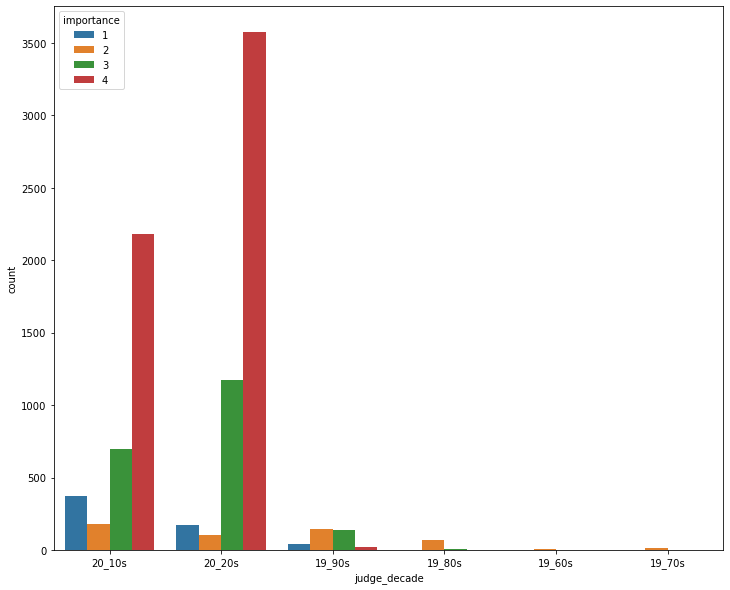

In [113]:
plt.figure(figsize=(12,10))
sns.countplot('judge_decade',hue='importance',data=train_df)

In [114]:
# from the distribution, it is clear that importance of cases filed has increased with decades. We will use it as a
# feature and drop the judge_year column.
train_df.drop('judge_year',axis=1,inplace=True)
test_df.drop('judge_year',axis=1,inplace=True)

# as of now, we will not be engineering the feature judgementdate anymore and won't use it during training. If, in
# future, we need to improve our model by adding some features, we will come back to it.

In [115]:
# Let's now drop cols with high cardinality
print("Training set")
for col in train_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, train_df[col].nunique()))
print("-------------------------------------------------")    
print("Test set")
for col in test_df.select_dtypes(include='object').columns:
    print("cardinality of {} is {}".format(col, test_df[col].nunique()))

Training set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1906
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6
-------------------------------------------------
Test set
cardinality of country.alpha2 is 46
cardinality of doctypebranch is 3
cardinality of judgementdate is 1584
cardinality of originatingbody_name is 13
cardinality of judge_decade is 6


In [116]:
train_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)
test_df.drop(['country.alpha2','judgementdate'],axis=1,inplace=True)

In [117]:
print("The shape of the training set after feature removal: {}".format(train_df.shape))
print("The shape of the test set after feature removal: {}".format(test_df.shape))

The shape of the training set after feature removal: (8878, 211)
The shape of the test set after feature removal: (4760, 210)


In [118]:
# let's now define our feature matrix and target variable
X = train_df.drop('importance',axis=1)
y = train_df[['importance']]

In [119]:
X.head()

doctypebranch  originatingbody      originatingbody_name         rank  \
0       CHAMBER                4             First Section   685.417419   
1     COMMITTEE               26  Second Section Committee  2641.901855   
2       CHAMBER               23              Fith Section   942.213440   
3       CHAMBER                5            Second Section  1121.770142   
4       CHAMBER                4             First Section   704.821594   

   respondentOrderEng  separateopinion  typedescription  article=3  article=6  \
0                  38                0               15          1          0   
1                  47                0               15          0          0   
2                  43                1               15          0          1   
3                  46                1               15          0          0   
4                  38                0               15          1          0   

   article=P1  ...  ccl_article=14  ccl_article=2  ccl_article=3  \
0           0  ...               0              0              1   
1           0  ...               0              0              0   
2           0  ...               0              0              0   
3           0  ...               0              0              0   
4           0  ...               0              1              1   

   ccl_article=34  ccl_article=5  ccl_article=6  ccl_article=8  \
0               0              1              0              0   
1               0              1              0              0   
2               0              0              1              0   
3               0              0              0             -1   
4               0              1              0              0   

   ccl_article=p1  ccl_article=p6  judge_decade  
0               0               0        20_10s  
1               0               0        20_20s  
2               0               0        20_20s  
3               0               0        20_20s  
4               0               0        20_10s  

[5 rows x 210 columns]

In [120]:
y.head()

importance
0           4
1           4
2           4
3           4
4           4

In [121]:
# let's look at our target variable
y['importance'].value_counts(normalize=True)

4    0.650372
3    0.226515
1    0.065555
2    0.057558
Name: importance, dtype: float64

In [125]:
# Since the cardinality of the target variable is greater than 2, it is a multiclass classification problem. Our 
# target metric is accuracy_score and we will optimize the metric logloss

In [122]:
# missing value imputation
for col in pseudo_bin_feat_train:
    print(train_df[col].value_counts(normalize=True))

 0    0.914282
 1    0.078847
-1    0.006871
Name: ccl_article=1, dtype: float64
 0    0.951678
 1    0.037396
-1    0.010926
Name: ccl_article=10, dtype: float64
 0    0.981978
 1    0.015319
-1    0.002703
Name: ccl_article=11, dtype: float64
 0    0.914733
 1    0.078171
-1    0.007096
Name: ccl_article=13, dtype: float64
 0    0.937373
 1    0.053052
-1    0.009574
Name: ccl_article=2, dtype: float64
 0    0.826988
 1    0.140797
-1    0.032214
Name: ccl_article=3, dtype: float64
 0    0.983555
 1    0.008560
-1    0.007885
Name: ccl_article=34, dtype: float64
 0    0.837351
 1    0.138545
-1    0.024105
Name: ccl_article=5, dtype: float64
 0    0.487948
 1    0.451115
-1    0.060937
Name: ccl_article=6, dtype: float64
 0    0.895247
 1    0.074003
-1    0.030750
Name: ccl_article=8, dtype: float64
 0    0.916197
 1    0.074228
-1    0.009574
Name: ccl_article=p1, dtype: float64


In [127]:
# we assume -1 to represent null values and try to impute it. To impute missing values, we can use the following 
# strategies - 'mean', 'median', 'most_frequent', 'constant'. If a feature is almost entirely dominated by a 
# specific category, it is logical to use 'most_frequent' strategy. 'mean' could be used for a more balanced
# category distribution. 'mean'/median'/'constant' strategy won't work well in this case since we are dealing 
# with binary features.
# However, looking at the above result, one can also think of -1 as a typo since it's percentage is very low.
# Let's first try imputing all -1 using the 'most_frequent' strategy. Later, if needed (to enhance the model's
# performance), we will try replacing all -1 by 1.

In [123]:
# encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

In [124]:
print("The shape of the feature matrix is : {}".format(X.shape))

The shape of the feature matrix is : (8878, 226)


In [125]:
# build the model pipeline

def build_pipeline(model):
    
    pipeline = Pipeline([
                    ('imputer', SimpleImputer(missing_values=-1,strategy='most_frequent')),
                    ('scaler', StandardScaler()),
                    ('classifier', model)
                   ])
        
    return pipeline    

In [126]:
# grid search 

def grid_search(model,param_dict):
    
    grid_cv = GridSearchCV(model,param_grid=param_dict, scoring='accuracy', verbose=2) #scoring='neg_log_loss'
    return grid_cv

In [132]:
# first we will perform coarse scanning. Then, if needed, finer scanning would be tried.

In [127]:
# split the dataset into train and validation subsets
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=21)

print("The shape of X_train : {}".format(X_train.shape))
print("The shape of X_val : {}".format(X_val.shape))

The shape of X_train : (7102, 226)
The shape of X_val : (1776, 226)


In [128]:
# distribution of different classes in training and validation sets
print("Train Set")
print(y_train['importance'].value_counts(normalize=True))
print("\n")
print("Validation Set")
print(y_val['importance'].value_counts(normalize=True))

Train Set
4    0.649113
3    0.226978
1    0.066179
2    0.057730
Name: importance, dtype: float64


Validation Set
4    0.655405
3    0.224662
1    0.063063
2    0.056869
Name: importance, dtype: float64


In [132]:
def fit_and_eval_model(model, param_dict,X_train,y_train,X_val,y_val):
    
    model_name = str(model).split("(")[0]
    
    pipeline = build_pipeline(model)
    grid_cv = grid_search(pipeline,param_dict)

    # fit the model to the train set
    grid_cv.fit(X_train,y_train)

    # predict on the train set
    train_pred = grid_cv.predict(X_train)

    # predict on the validation set
    val_pred = grid_cv.predict(X_val)

    # evaluate the model on the train set
    train_score = accuracy_score(y_true=y_train, y_pred=train_pred)

    # evaluate the model on the validation set
    val_score = accuracy_score(y_true=y_val, y_pred=val_pred)


    print("The best parameter for the model {} is {}.\n".format(model_name, grid_cv.best_params_))
    print("The best score obtained for the model {} during grid search is {}.\n".format(model_name,grid_cv.best_score_))
    print("The train score of the model {} is {}.\n".format(model_name,train_score))
    print("The validation score of the model {} is {}.".format(model_name,val_score))    
    
    return grid_cv, train_score, val_score

In [130]:
# save the final dataframes
import joblib

joblib.dump(X_train,"X_train.pkl")
joblib.dump(X_val,"X_val.pkl")
joblib.dump(y_train,"y_train.pkl")
joblib.dump(y_val,"y_val.pkl")

['y_val.pkl']

**K nearest neighbors**

In [153]:
model = KNeighborsClassifier()
#param_dict = [
#              {'classifier__n_neighbors': list(np.arange(5,35,5))},
#              {'classifier__weights': ['uniform','distance']}
#             ]

param_dict = {'classifier__n_neighbors': list(np.arange(5,35,5)),
              'classifier__weights': ['uniform','distance']}

grid_cv_knn, knn_train_score, knn_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.8s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=uniform ..........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=uniform, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=5, classifier__weights=distance .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=5, classifier__weights=distance, total=   2.9s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=10, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=10, classifier__weights=distance, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=15, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=uniform, total=   3.2s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.1s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=15, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=15, classifier__weights=distance, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.0s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.1s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=20, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.8s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   4.1s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=20, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=20, classifier__weights=distance, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.1s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.2s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.7s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=uniform, total=   4.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.4s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=25, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=25, classifier__weights=distance, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.5s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.4s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.3s
[CV] classifier__n_neighbors=30, classifier__weights=uniform .........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=uniform, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.6s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.8s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.9s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   4.0s
[CV] classifier__n_neighbors=30, classifier__weights=distance ........


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__n_neighbors=30, classifier__weights=distance, total=   3.7s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.4min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model KNeighborsClassifier is {'classifier__n_neighbors': 30, 'classifier__weights': 'distance'}.

The best score obtained for the model KNeighborsClassifier during grid search is -0.8810155578498808.

The train score of the model KNeighborsClassifier is 1.0.

The validation score of the model KNeighborsClassifier is 0.8006756756756757.


**Logistic Regression**

In [152]:
model = LogisticRegression(multi_class='multinomial')

param_dict = {'classifier__C': list(np.arange(0.5,5.5,0.5)),
              'classifier__class_weight': ['None','balanced']}

grid_cv_lr, lr_train_score, lr_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=None ................
[CV] . classifier__C=0.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=0.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=0.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................
[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=None ................
[CV] . classifier__C=1.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=1.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=1.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=None ................
[CV] . classifier__C=2.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=None ................
[CV] . classifier__C=2.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=2.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=2.5, classifier__class_weight=balanced, total=   0.7s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=None ................
[CV] . classifier__C=3.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=None ................
[CV] . classifier__C=3.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=3.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=3.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=None ................
[CV] . classifier__C=4.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=None ................
[CV] . classifier__C=4.5, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=4.5, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The sc

[CV]  classifier__C=4.5, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.

[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=None ................
[CV] . classifier__C=5.0, classifier__class_weight=None, total=   0.1s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a

[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.6s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
[CV] classifier__C=5.0, classifier__class_weight=balanced ............


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   33.0s finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__C=5.0, classifier__class_weight=balanced, total=   0.5s
The best parameter for the model LogisticRegression is {'classifier__C': 0.5, 'classifier__class_weight': 'balanced'}.

The best score obtained for the model LogisticRegression during grid search is -0.6281117917000996.

The train score of the model LogisticRegression is 0.812869614193185.

The validation score of the model LogisticRegression is 0.7888513513513513.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Random Forest Classifier**

In [154]:
model = RandomForestClassifier()
param_dict = {'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features':['sqrt','log2'],
              'classifier__class_weight':['balanced',None]
             }

grid_cv_rf, rf_train_score, rf_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__n_estimators=130, total=   0.9s


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  2.5min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model RandomForestClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'entropy', 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 130}.

The best score obtained for the model RandomForestClassifier during grid search is -0.44147217352160356.

The train score of the model RandomForestClassifier is 1.0.

The validation score of the model RandomForestClassifier is 0.8693693693693694.


**XGB classifier**

In [134]:
model = XGBClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__learning_rate': np.arange(0.1,1,0.1)
              #'classifier__booster': ['gbtree','gblinear','dart']
             }

grid_cv_xgb, xgb_train_score, xgb_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:37:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=50 ......
[13:37:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=50, total=   2.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   3.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.9s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=70 ......
[13:38:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=70, total=   2.8s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.5s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   3.7s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=90 ......
[13:38:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=110 .....
[13:38:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.9s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.1, classifier__n_estimators=130 .....
[13:39:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.1, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=50 ......
[13:39:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=70 ......
[13:39:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=90 ......
[13:40:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.2s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=110 .....
[13:40:42] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:40:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:40:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.4s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.2, classifier__n_estimators=130 .....
[13:41:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.2, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:26] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50 
[13:41:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70 
[13:41:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:41:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:42:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90 
[13:42:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110 
[13:42:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130 
[13:42:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.30000000000000004, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.7s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.9s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=50 ......
[13:43:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=50, total=   2.6s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=70 ......
[13:43:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:38] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:43] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=90 ......
[13:43:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:43:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=110 .....
[13:44:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.4, classifier__n_estimators=130 .....
[13:44:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.4, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:44:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=50 ......
[13:45:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:03] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   4.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=70 ......
[13:45:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=70, total=   3.4s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:24] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=90 ......
[13:45:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:45:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=110 .....
[13:46:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:08] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:46:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.2s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.5, classifier__n_estimators=130 .....
[13:46:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.5, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=50 ......
[13:46:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:54] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:46:57] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:47:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=70 ......
[13:47:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=90 ......
[13:47:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=110 .....
[13:47:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:47:55] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.1s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:13] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.6, classifier__n_estimators=130 .....
[13:48:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:32] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50 
[13:48:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70 
[13:48:50] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:48:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:48:58] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90 
[13:49:10] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=90, total=   4.7s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.4s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:31] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110 
[13:49:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:49:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130 
[13:50:05] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7000000000000001, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.5s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:14] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:16] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=50 ......
[13:50:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:30] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:34] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.6s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=70 ......
[13:50:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.8s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:45] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   5.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:51] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.9s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:50:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=90 ......
[13:51:01] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=90, total=   4.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.9s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   6.2s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:18] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:23] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=110 .....
[13:51:28] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=110, total=   5.3s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.7s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.8s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:47] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:51:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.8, classifier__n_estimators=130 .....
[13:52:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.8, classifier__n_estimators=130, total=   7.0s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:07] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.4s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:09] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:12] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   3.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:52:15] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=50 ......
[13:52:19] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=50, total=   2.7s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:21] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:25] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.5s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:29] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=70 ......
[13:52:36] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=70, total=   3.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:40] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:44] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:48] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:52] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=90 ......
[13:52:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=90, total=   4.2s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:00] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:06] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:11] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.9s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:17] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=110 .....
[13:53:22] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=110, total=   5.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:27] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.0s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:33] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.5s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:39] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.3s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....
[13:53:46] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   7.1s
[CV] classifier__learning_rate=0.9, classifier__n_estimators=130 .....


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:53:53] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  classifier__learning_rate=0.9, classifier__n_estimators=130, total=   6.4s


[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 16.2min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[13:53:59] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The best parameter for the model XGBClassifier is {'classifier__learning_rate': 0.5, 'classifier__n_estimators': 130}.

The best score obtained for the model XGBClassifier during grid search is 0.880315687226809.

The train score of the model XGBClassifier is 0.9976063080822304.

The validation score of the model XGBClassifier is 0.8851351351351351.


**Extra Tree Classifier**

In [144]:
X_train.shape[0]*0.5, X_train.shape[0]*0.25, X_train.shape[0]*0.6

(3551.0, 1775.5, 4261.2)

In [133]:
model = ExtraTreesClassifier()
param_dict = {
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__criterion': ['gini','entropy'],
              'classifier__max_features': ['sqrt','log2'],
              'classifier__class_weight': [None,'balanced'],
              'classifier__max_samples': [0.25,0.5,0.6]
             }

grid_cv_et, et_train_score, et_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=None, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   1.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.3s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.4s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=gini, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=sqrt, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.25, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=70, total=   0.7s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   1.0s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.2s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.5, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=50, total=   0.5s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=70, total=   0.6s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=90, total=   0.8s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=110, total=   0.9s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s
[CV] classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


[CV]  classifier__class_weight=balanced, classifier__criterion=entropy, classifier__max_features=log2, classifier__max_samples=0.6, classifier__n_estimators=130, total=   1.1s


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  8.1min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


The best parameter for the model ExtraTreesClassifier is {'classifier__class_weight': 'balanced', 'classifier__criterion': 'gini', 'classifier__max_features': 'sqrt', 'classifier__max_samples': 0.5, 'classifier__n_estimators': 50}.

The best score obtained for the model ExtraTreesClassifier during grid search is 0.8532806692370973.

The train score of the model ExtraTreesClassifier is 1.0.

The validation score of the model ExtraTreesClassifier is 0.856418918918919.


**CatBoost classifier**

In [137]:
model = CatBoostClassifier(eval_metric='Accuracy')
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
            }

grid_cv_cc, cc_train_score, cc_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] classifier__learning_rate=0.01 ..................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0:	learn: 0.8188699	total: 71.6ms	remaining: 1m 11s
1:	learn: 0.8225664	total: 84.6ms	remaining: 42.2s
2:	learn: 0.8334800	total: 94.9ms	remaining: 31.5s
3:	learn: 0.8385848	total: 104ms	remaining: 25.9s
4:	learn: 0.8385848	total: 113ms	remaining: 22.5s
5:	learn: 0.8412251	total: 122ms	remaining: 20.2s
6:	learn: 0.8392889	total: 131ms	remaining: 18.6s
7:	learn: 0.8429854	total: 140ms	remaining: 17.4s
8:	learn: 0.8406971	total: 149ms	remaining: 16.4s
9:	learn: 0.8399930	total: 158ms	remaining: 15.6s
10:	learn: 0.8421053	total: 167ms	remaining: 15s
11:	learn: 0.8406971	total: 175ms	remaining: 14.4s
12:	learn: 0.8382327	total: 184ms	remaining: 14s
13:	learn: 0.8385848	total: 193ms	remaining: 13.6s
14:	learn: 0.8384087	total: 202ms	remaining: 13.2s
15:	learn: 0.8387608	total: 210ms	remaining: 12.9s
16:	learn: 0.8387608	total: 219ms	remaining: 12.7s
17:	learn: 0.8392889	total: 228ms	remaining: 12.4s
18:	learn: 0.8396409	total: 237ms	remaining: 12.2s
19:	learn: 0.8396409	total: 245ms	remaini

163:	learn: 0.8531949	total: 1.7s	remaining: 8.69s
164:	learn: 0.8531949	total: 1.71s	remaining: 8.67s
165:	learn: 0.8535469	total: 1.72s	remaining: 8.65s
166:	learn: 0.8533709	total: 1.73s	remaining: 8.63s
167:	learn: 0.8540750	total: 1.75s	remaining: 8.66s
168:	learn: 0.8538990	total: 1.76s	remaining: 8.64s
169:	learn: 0.8537229	total: 1.77s	remaining: 8.62s
170:	learn: 0.8530188	total: 1.77s	remaining: 8.61s
171:	learn: 0.8535469	total: 1.78s	remaining: 8.59s
172:	learn: 0.8538990	total: 1.79s	remaining: 8.57s
173:	learn: 0.8542510	total: 1.8s	remaining: 8.55s
174:	learn: 0.8538990	total: 1.81s	remaining: 8.54s
175:	learn: 0.8540750	total: 1.82s	remaining: 8.52s
176:	learn: 0.8540750	total: 1.83s	remaining: 8.5s
177:	learn: 0.8546031	total: 1.84s	remaining: 8.48s
178:	learn: 0.8544270	total: 1.84s	remaining: 8.46s
179:	learn: 0.8546031	total: 1.85s	remaining: 8.45s
180:	learn: 0.8546031	total: 1.86s	remaining: 8.43s
181:	learn: 0.8544270	total: 1.87s	remaining: 8.41s
182:	learn: 0.8

337:	learn: 0.8648125	total: 3.35s	remaining: 6.56s
338:	learn: 0.8648125	total: 3.36s	remaining: 6.55s
339:	learn: 0.8648125	total: 3.37s	remaining: 6.54s
340:	learn: 0.8649886	total: 3.38s	remaining: 6.54s
341:	learn: 0.8649886	total: 3.4s	remaining: 6.53s
342:	learn: 0.8648125	total: 3.4s	remaining: 6.52s
343:	learn: 0.8649886	total: 3.41s	remaining: 6.51s
344:	learn: 0.8646365	total: 3.42s	remaining: 6.5s
345:	learn: 0.8648125	total: 3.43s	remaining: 6.49s
346:	learn: 0.8648125	total: 3.44s	remaining: 6.48s
347:	learn: 0.8649886	total: 3.45s	remaining: 6.47s
348:	learn: 0.8648125	total: 3.46s	remaining: 6.45s
349:	learn: 0.8648125	total: 3.47s	remaining: 6.44s
350:	learn: 0.8649886	total: 3.48s	remaining: 6.43s
351:	learn: 0.8651646	total: 3.49s	remaining: 6.42s
352:	learn: 0.8651646	total: 3.5s	remaining: 6.41s
353:	learn: 0.8649886	total: 3.51s	remaining: 6.4s
354:	learn: 0.8651646	total: 3.52s	remaining: 6.39s
355:	learn: 0.8653406	total: 3.52s	remaining: 6.38s
356:	learn: 0.864

507:	learn: 0.8704453	total: 4.97s	remaining: 4.82s
508:	learn: 0.8713255	total: 4.99s	remaining: 4.81s
509:	learn: 0.8711494	total: 5s	remaining: 4.8s
510:	learn: 0.8711494	total: 5.01s	remaining: 4.8s
511:	learn: 0.8713255	total: 5.02s	remaining: 4.79s
512:	learn: 0.8713255	total: 5.03s	remaining: 4.78s
513:	learn: 0.8713255	total: 5.04s	remaining: 4.77s
514:	learn: 0.8713255	total: 5.05s	remaining: 4.76s
515:	learn: 0.8715015	total: 5.06s	remaining: 4.75s
516:	learn: 0.8713255	total: 5.07s	remaining: 4.74s
517:	learn: 0.8715015	total: 5.08s	remaining: 4.72s
518:	learn: 0.8715015	total: 5.08s	remaining: 4.71s
519:	learn: 0.8715015	total: 5.09s	remaining: 4.7s
520:	learn: 0.8715015	total: 5.1s	remaining: 4.69s
521:	learn: 0.8715015	total: 5.11s	remaining: 4.68s
522:	learn: 0.8715015	total: 5.12s	remaining: 4.67s
523:	learn: 0.8715015	total: 5.13s	remaining: 4.66s
524:	learn: 0.8715015	total: 5.14s	remaining: 4.65s
525:	learn: 0.8715015	total: 5.15s	remaining: 4.64s
526:	learn: 0.87150

670:	learn: 0.8760782	total: 6.6s	remaining: 3.24s
671:	learn: 0.8760782	total: 6.61s	remaining: 3.23s
672:	learn: 0.8760782	total: 6.62s	remaining: 3.22s
673:	learn: 0.8759021	total: 6.63s	remaining: 3.21s
674:	learn: 0.8759021	total: 6.64s	remaining: 3.2s
675:	learn: 0.8759021	total: 6.65s	remaining: 3.19s
676:	learn: 0.8759021	total: 6.66s	remaining: 3.18s
677:	learn: 0.8759021	total: 6.67s	remaining: 3.17s
678:	learn: 0.8759021	total: 6.68s	remaining: 3.16s
679:	learn: 0.8759021	total: 6.69s	remaining: 3.15s
680:	learn: 0.8759021	total: 6.7s	remaining: 3.14s
681:	learn: 0.8759021	total: 6.71s	remaining: 3.13s
682:	learn: 0.8760782	total: 6.71s	remaining: 3.12s
683:	learn: 0.8759021	total: 6.72s	remaining: 3.1s
684:	learn: 0.8759021	total: 6.73s	remaining: 3.1s
685:	learn: 0.8759021	total: 6.74s	remaining: 3.08s
686:	learn: 0.8760782	total: 6.75s	remaining: 3.07s
687:	learn: 0.8760782	total: 6.76s	remaining: 3.06s
688:	learn: 0.8760782	total: 6.76s	remaining: 3.05s
689:	learn: 0.876

843:	learn: 0.8804788	total: 8.25s	remaining: 1.52s
844:	learn: 0.8806548	total: 8.26s	remaining: 1.51s
845:	learn: 0.8806548	total: 8.27s	remaining: 1.5s
846:	learn: 0.8804788	total: 8.28s	remaining: 1.5s
847:	learn: 0.8806548	total: 8.29s	remaining: 1.49s
848:	learn: 0.8810069	total: 8.3s	remaining: 1.48s
849:	learn: 0.8808308	total: 8.31s	remaining: 1.47s
850:	learn: 0.8810069	total: 8.32s	remaining: 1.46s
851:	learn: 0.8810069	total: 8.33s	remaining: 1.45s
852:	learn: 0.8810069	total: 8.34s	remaining: 1.44s
853:	learn: 0.8810069	total: 8.35s	remaining: 1.43s
854:	learn: 0.8810069	total: 8.36s	remaining: 1.42s
855:	learn: 0.8810069	total: 8.37s	remaining: 1.41s
856:	learn: 0.8811829	total: 8.38s	remaining: 1.4s
857:	learn: 0.8813589	total: 8.39s	remaining: 1.39s
858:	learn: 0.8811829	total: 8.4s	remaining: 1.38s
859:	learn: 0.8813589	total: 8.4s	remaining: 1.37s
860:	learn: 0.8810069	total: 8.41s	remaining: 1.36s
861:	learn: 0.8811829	total: 8.42s	remaining: 1.35s
862:	learn: 0.8813

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s remaining:    0.0s


5:	learn: 0.8294314	total: 70.7ms	remaining: 11.7s
6:	learn: 0.8269671	total: 81.9ms	remaining: 11.6s
7:	learn: 0.8317198	total: 92.9ms	remaining: 11.5s
8:	learn: 0.8352403	total: 107ms	remaining: 11.8s
9:	learn: 0.8350642	total: 121ms	remaining: 11.9s
10:	learn: 0.8324239	total: 132ms	remaining: 11.9s
11:	learn: 0.8296075	total: 152ms	remaining: 12.5s
12:	learn: 0.8340081	total: 163ms	remaining: 12.4s
13:	learn: 0.8359444	total: 173ms	remaining: 12.2s
14:	learn: 0.8378807	total: 182ms	remaining: 12s
15:	learn: 0.8385848	total: 191ms	remaining: 11.8s
16:	learn: 0.8384087	total: 201ms	remaining: 11.6s
17:	learn: 0.8361204	total: 210ms	remaining: 11.4s
18:	learn: 0.8362964	total: 219ms	remaining: 11.3s
19:	learn: 0.8343601	total: 227ms	remaining: 11.1s
20:	learn: 0.8333040	total: 236ms	remaining: 11s
21:	learn: 0.8329519	total: 245ms	remaining: 10.9s
22:	learn: 0.8340081	total: 254ms	remaining: 10.8s
23:	learn: 0.8338321	total: 262ms	remaining: 10.7s
24:	learn: 0.8333040	total: 273ms	rem

175:	learn: 0.8523147	total: 1.69s	remaining: 7.93s
176:	learn: 0.8523147	total: 1.71s	remaining: 7.93s
177:	learn: 0.8526668	total: 1.73s	remaining: 7.97s
178:	learn: 0.8526668	total: 1.74s	remaining: 8s
179:	learn: 0.8528428	total: 1.76s	remaining: 8.01s
180:	learn: 0.8530188	total: 1.77s	remaining: 8s
181:	learn: 0.8528428	total: 1.78s	remaining: 8.01s
182:	learn: 0.8530188	total: 1.79s	remaining: 8.01s
183:	learn: 0.8528428	total: 1.81s	remaining: 8.01s
184:	learn: 0.8531949	total: 1.82s	remaining: 8.01s
185:	learn: 0.8533709	total: 1.83s	remaining: 8.01s
186:	learn: 0.8531949	total: 1.84s	remaining: 8s
187:	learn: 0.8537229	total: 1.85s	remaining: 8.01s
188:	learn: 0.8535469	total: 1.86s	remaining: 8s
189:	learn: 0.8537229	total: 1.87s	remaining: 7.99s
190:	learn: 0.8542510	total: 1.88s	remaining: 7.97s
191:	learn: 0.8542510	total: 1.89s	remaining: 7.96s
192:	learn: 0.8546031	total: 1.9s	remaining: 7.96s
193:	learn: 0.8546031	total: 1.91s	remaining: 7.95s
194:	learn: 0.8544270	tot

343:	learn: 0.8625242	total: 3.51s	remaining: 6.7s
344:	learn: 0.8628763	total: 3.52s	remaining: 6.68s
345:	learn: 0.8621722	total: 3.53s	remaining: 6.68s
346:	learn: 0.8625242	total: 3.54s	remaining: 6.67s
347:	learn: 0.8630523	total: 3.55s	remaining: 6.66s
348:	learn: 0.8628763	total: 3.56s	remaining: 6.65s
349:	learn: 0.8632283	total: 3.58s	remaining: 6.64s
350:	learn: 0.8632283	total: 3.59s	remaining: 6.63s
351:	learn: 0.8630523	total: 3.6s	remaining: 6.62s
352:	learn: 0.8630523	total: 3.61s	remaining: 6.61s
353:	learn: 0.8630523	total: 3.62s	remaining: 6.6s
354:	learn: 0.8630523	total: 3.63s	remaining: 6.59s
355:	learn: 0.8630523	total: 3.64s	remaining: 6.58s
356:	learn: 0.8632283	total: 3.65s	remaining: 6.58s
357:	learn: 0.8632283	total: 3.66s	remaining: 6.57s
358:	learn: 0.8634043	total: 3.67s	remaining: 6.55s
359:	learn: 0.8632283	total: 3.68s	remaining: 6.54s
360:	learn: 0.8634043	total: 3.69s	remaining: 6.54s
361:	learn: 0.8634043	total: 3.71s	remaining: 6.53s
362:	learn: 0.8

507:	learn: 0.8711494	total: 5.15s	remaining: 4.99s
508:	learn: 0.8711494	total: 5.16s	remaining: 4.98s
509:	learn: 0.8711494	total: 5.17s	remaining: 4.97s
510:	learn: 0.8713255	total: 5.18s	remaining: 4.96s
511:	learn: 0.8713255	total: 5.19s	remaining: 4.95s
512:	learn: 0.8713255	total: 5.2s	remaining: 4.94s
513:	learn: 0.8713255	total: 5.21s	remaining: 4.93s
514:	learn: 0.8711494	total: 5.22s	remaining: 4.92s
515:	learn: 0.8711494	total: 5.23s	remaining: 4.9s
516:	learn: 0.8709734	total: 5.24s	remaining: 4.89s
517:	learn: 0.8709734	total: 5.24s	remaining: 4.88s
518:	learn: 0.8709734	total: 5.25s	remaining: 4.87s
519:	learn: 0.8711494	total: 5.26s	remaining: 4.86s
520:	learn: 0.8711494	total: 5.27s	remaining: 4.84s
521:	learn: 0.8709734	total: 5.28s	remaining: 4.83s
522:	learn: 0.8715015	total: 5.29s	remaining: 4.82s
523:	learn: 0.8715015	total: 5.29s	remaining: 4.81s
524:	learn: 0.8715015	total: 5.3s	remaining: 4.8s
525:	learn: 0.8713255	total: 5.31s	remaining: 4.79s
526:	learn: 0.87

675:	learn: 0.8760782	total: 6.79s	remaining: 3.25s
676:	learn: 0.8760782	total: 6.79s	remaining: 3.24s
677:	learn: 0.8760782	total: 6.81s	remaining: 3.23s
678:	learn: 0.8760782	total: 6.82s	remaining: 3.22s
679:	learn: 0.8760782	total: 6.83s	remaining: 3.21s
680:	learn: 0.8762542	total: 6.84s	remaining: 3.2s
681:	learn: 0.8762542	total: 6.85s	remaining: 3.19s
682:	learn: 0.8760782	total: 6.86s	remaining: 3.18s
683:	learn: 0.8760782	total: 6.87s	remaining: 3.17s
684:	learn: 0.8764302	total: 6.88s	remaining: 3.16s
685:	learn: 0.8762542	total: 6.88s	remaining: 3.15s
686:	learn: 0.8762542	total: 6.89s	remaining: 3.14s
687:	learn: 0.8762542	total: 6.9s	remaining: 3.13s
688:	learn: 0.8762542	total: 6.91s	remaining: 3.12s
689:	learn: 0.8762542	total: 6.92s	remaining: 3.11s
690:	learn: 0.8760782	total: 6.93s	remaining: 3.1s
691:	learn: 0.8762542	total: 6.93s	remaining: 3.09s
692:	learn: 0.8762542	total: 6.94s	remaining: 3.08s
693:	learn: 0.8762542	total: 6.95s	remaining: 3.06s
694:	learn: 0.8

850:	learn: 0.8783665	total: 8.41s	remaining: 1.47s
851:	learn: 0.8783665	total: 8.43s	remaining: 1.46s
852:	learn: 0.8783665	total: 8.44s	remaining: 1.45s
853:	learn: 0.8783665	total: 8.45s	remaining: 1.44s
854:	learn: 0.8783665	total: 8.46s	remaining: 1.43s
855:	learn: 0.8783665	total: 8.47s	remaining: 1.42s
856:	learn: 0.8783665	total: 8.48s	remaining: 1.41s
857:	learn: 0.8783665	total: 8.48s	remaining: 1.4s
858:	learn: 0.8783665	total: 8.49s	remaining: 1.39s
859:	learn: 0.8783665	total: 8.5s	remaining: 1.38s
860:	learn: 0.8783665	total: 8.51s	remaining: 1.37s
861:	learn: 0.8783665	total: 8.52s	remaining: 1.36s
862:	learn: 0.8783665	total: 8.53s	remaining: 1.35s
863:	learn: 0.8783665	total: 8.54s	remaining: 1.34s
864:	learn: 0.8783665	total: 8.54s	remaining: 1.33s
865:	learn: 0.8783665	total: 8.55s	remaining: 1.32s
866:	learn: 0.8783665	total: 8.56s	remaining: 1.31s
867:	learn: 0.8785425	total: 8.57s	remaining: 1.3s
868:	learn: 0.8785425	total: 8.58s	remaining: 1.29s
869:	learn: 0.8

7:	learn: 0.8322774	total: 66ms	remaining: 8.19s
8:	learn: 0.8370292	total: 76.8ms	remaining: 8.46s
9:	learn: 0.8380852	total: 88ms	remaining: 8.71s
10:	learn: 0.8407251	total: 104ms	remaining: 9.32s
11:	learn: 0.8403731	total: 112ms	remaining: 9.19s
12:	learn: 0.8423090	total: 120ms	remaining: 9.12s
13:	learn: 0.8391411	total: 128ms	remaining: 8.99s
14:	learn: 0.8386132	total: 136ms	remaining: 8.9s
15:	learn: 0.8389652	total: 143ms	remaining: 8.8s
16:	learn: 0.8396691	total: 151ms	remaining: 8.71s
17:	learn: 0.8407251	total: 158ms	remaining: 8.61s
18:	learn: 0.8396691	total: 165ms	remaining: 8.53s
19:	learn: 0.8410771	total: 173ms	remaining: 8.46s
20:	learn: 0.8416051	total: 180ms	remaining: 8.39s
21:	learn: 0.8421331	total: 187ms	remaining: 8.33s
22:	learn: 0.8414291	total: 195ms	remaining: 8.27s
23:	learn: 0.8412531	total: 202ms	remaining: 8.21s
24:	learn: 0.8405491	total: 209ms	remaining: 8.16s
25:	learn: 0.8419571	total: 217ms	remaining: 8.11s
26:	learn: 0.8426610	total: 224ms	rem

180:	learn: 0.8599085	total: 1.49s	remaining: 6.75s
181:	learn: 0.8597325	total: 1.5s	remaining: 6.76s
182:	learn: 0.8599085	total: 1.52s	remaining: 6.77s
183:	learn: 0.8597325	total: 1.53s	remaining: 6.78s
184:	learn: 0.8597325	total: 1.54s	remaining: 6.78s
185:	learn: 0.8593805	total: 1.55s	remaining: 6.77s
186:	learn: 0.8595565	total: 1.55s	remaining: 6.76s
187:	learn: 0.8592045	total: 1.56s	remaining: 6.75s
188:	learn: 0.8595565	total: 1.57s	remaining: 6.73s
189:	learn: 0.8595565	total: 1.58s	remaining: 6.72s
190:	learn: 0.8597325	total: 1.58s	remaining: 6.71s
191:	learn: 0.8597325	total: 1.59s	remaining: 6.7s
192:	learn: 0.8600845	total: 1.6s	remaining: 6.68s
193:	learn: 0.8600845	total: 1.6s	remaining: 6.67s
194:	learn: 0.8599085	total: 1.61s	remaining: 6.66s
195:	learn: 0.8602605	total: 1.62s	remaining: 6.65s
196:	learn: 0.8600845	total: 1.63s	remaining: 6.64s
197:	learn: 0.8600845	total: 1.64s	remaining: 6.62s
198:	learn: 0.8600845	total: 1.64s	remaining: 6.61s
199:	learn: 0.86

358:	learn: 0.8688842	total: 2.92s	remaining: 5.21s
359:	learn: 0.8688842	total: 2.93s	remaining: 5.21s
360:	learn: 0.8688842	total: 2.94s	remaining: 5.2s
361:	learn: 0.8690602	total: 2.95s	remaining: 5.2s
362:	learn: 0.8692362	total: 2.96s	remaining: 5.2s
363:	learn: 0.8692362	total: 2.97s	remaining: 5.19s
364:	learn: 0.8692362	total: 2.98s	remaining: 5.18s
365:	learn: 0.8690602	total: 2.99s	remaining: 5.17s
366:	learn: 0.8688842	total: 2.99s	remaining: 5.16s
367:	learn: 0.8694122	total: 3s	remaining: 5.16s
368:	learn: 0.8694122	total: 3.01s	remaining: 5.15s
369:	learn: 0.8694122	total: 3.02s	remaining: 5.14s
370:	learn: 0.8694122	total: 3.02s	remaining: 5.13s
371:	learn: 0.8695882	total: 3.03s	remaining: 5.12s
372:	learn: 0.8695882	total: 3.04s	remaining: 5.11s
373:	learn: 0.8694122	total: 3.05s	remaining: 5.1s
374:	learn: 0.8694122	total: 3.06s	remaining: 5.09s
375:	learn: 0.8692362	total: 3.06s	remaining: 5.08s
376:	learn: 0.8697642	total: 3.07s	remaining: 5.07s
377:	learn: 0.86941

527:	learn: 0.8750440	total: 4.34s	remaining: 3.88s
528:	learn: 0.8748680	total: 4.35s	remaining: 3.88s
529:	learn: 0.8748680	total: 4.37s	remaining: 3.87s
530:	learn: 0.8748680	total: 4.38s	remaining: 3.87s
531:	learn: 0.8752200	total: 4.39s	remaining: 3.86s
532:	learn: 0.8752200	total: 4.4s	remaining: 3.85s
533:	learn: 0.8753960	total: 4.41s	remaining: 3.84s
534:	learn: 0.8755720	total: 4.41s	remaining: 3.83s
535:	learn: 0.8757480	total: 4.42s	remaining: 3.83s
536:	learn: 0.8757480	total: 4.43s	remaining: 3.82s
537:	learn: 0.8757480	total: 4.43s	remaining: 3.81s
538:	learn: 0.8757480	total: 4.44s	remaining: 3.8s
539:	learn: 0.8757480	total: 4.45s	remaining: 3.79s
540:	learn: 0.8757480	total: 4.46s	remaining: 3.78s
541:	learn: 0.8757480	total: 4.46s	remaining: 3.77s
542:	learn: 0.8757480	total: 4.47s	remaining: 3.76s
543:	learn: 0.8755720	total: 4.48s	remaining: 3.76s
544:	learn: 0.8755720	total: 4.49s	remaining: 3.75s
545:	learn: 0.8755720	total: 4.5s	remaining: 3.74s
546:	learn: 0.8

706:	learn: 0.8796199	total: 5.99s	remaining: 2.48s
707:	learn: 0.8796199	total: 6s	remaining: 2.47s
708:	learn: 0.8796199	total: 6.01s	remaining: 2.47s
709:	learn: 0.8796199	total: 6.02s	remaining: 2.46s
710:	learn: 0.8797958	total: 6.04s	remaining: 2.45s
711:	learn: 0.8796199	total: 6.05s	remaining: 2.45s
712:	learn: 0.8799718	total: 6.06s	remaining: 2.44s
713:	learn: 0.8799718	total: 6.07s	remaining: 2.43s
714:	learn: 0.8797958	total: 6.07s	remaining: 2.42s
715:	learn: 0.8799718	total: 6.08s	remaining: 2.41s
716:	learn: 0.8799718	total: 6.09s	remaining: 2.4s
717:	learn: 0.8799718	total: 6.1s	remaining: 2.4s
718:	learn: 0.8797958	total: 6.11s	remaining: 2.39s
719:	learn: 0.8797958	total: 6.12s	remaining: 2.38s
720:	learn: 0.8797958	total: 6.12s	remaining: 2.37s
721:	learn: 0.8797958	total: 6.13s	remaining: 2.36s
722:	learn: 0.8799718	total: 6.14s	remaining: 2.35s
723:	learn: 0.8799718	total: 6.15s	remaining: 2.34s
724:	learn: 0.8799718	total: 6.16s	remaining: 2.33s
725:	learn: 0.8797

874:	learn: 0.8826118	total: 7.84s	remaining: 1.12s
875:	learn: 0.8826118	total: 7.85s	remaining: 1.11s
876:	learn: 0.8826118	total: 7.86s	remaining: 1.1s
877:	learn: 0.8827878	total: 7.87s	remaining: 1.09s
878:	learn: 0.8827878	total: 7.89s	remaining: 1.08s
879:	learn: 0.8827878	total: 7.89s	remaining: 1.08s
880:	learn: 0.8827878	total: 7.9s	remaining: 1.07s
881:	learn: 0.8826118	total: 7.91s	remaining: 1.06s
882:	learn: 0.8827878	total: 7.92s	remaining: 1.05s
883:	learn: 0.8826118	total: 7.93s	remaining: 1.04s
884:	learn: 0.8826118	total: 7.93s	remaining: 1.03s
885:	learn: 0.8827878	total: 7.94s	remaining: 1.02s
886:	learn: 0.8827878	total: 7.95s	remaining: 1.01s
887:	learn: 0.8827878	total: 7.96s	remaining: 1s
888:	learn: 0.8829637	total: 7.96s	remaining: 994ms
889:	learn: 0.8831397	total: 7.97s	remaining: 985ms
890:	learn: 0.8829637	total: 7.98s	remaining: 976ms
891:	learn: 0.8829637	total: 7.99s	remaining: 967ms
892:	learn: 0.8831397	total: 7.99s	remaining: 958ms
893:	learn: 0.883

30:	learn: 0.8481169	total: 280ms	remaining: 8.74s
31:	learn: 0.8486448	total: 291ms	remaining: 8.81s
32:	learn: 0.8481169	total: 301ms	remaining: 8.83s
33:	learn: 0.8467089	total: 318ms	remaining: 9.03s
34:	learn: 0.8488208	total: 326ms	remaining: 8.99s
35:	learn: 0.8482929	total: 334ms	remaining: 8.94s
36:	learn: 0.8495248	total: 342ms	remaining: 8.9s
37:	learn: 0.8491728	total: 350ms	remaining: 8.85s
38:	learn: 0.8497008	total: 358ms	remaining: 8.81s
39:	learn: 0.8488208	total: 365ms	remaining: 8.76s
40:	learn: 0.8491728	total: 373ms	remaining: 8.71s
41:	learn: 0.8493488	total: 380ms	remaining: 8.67s
42:	learn: 0.8497008	total: 388ms	remaining: 8.63s
43:	learn: 0.8493488	total: 395ms	remaining: 8.59s
44:	learn: 0.8491728	total: 403ms	remaining: 8.55s
45:	learn: 0.8493488	total: 412ms	remaining: 8.54s
46:	learn: 0.8484688	total: 437ms	remaining: 8.87s
47:	learn: 0.8488208	total: 467ms	remaining: 9.26s
48:	learn: 0.8488208	total: 498ms	remaining: 9.67s
49:	learn: 0.8493488	total: 513m

193:	learn: 0.8595565	total: 1.92s	remaining: 7.96s
194:	learn: 0.8597325	total: 1.93s	remaining: 7.96s
195:	learn: 0.8604365	total: 1.94s	remaining: 7.97s
196:	learn: 0.8604365	total: 1.95s	remaining: 7.96s
197:	learn: 0.8606125	total: 1.96s	remaining: 7.94s
198:	learn: 0.8607885	total: 1.97s	remaining: 7.92s
199:	learn: 0.8606125	total: 1.98s	remaining: 7.9s
200:	learn: 0.8607885	total: 1.98s	remaining: 7.88s
201:	learn: 0.8609644	total: 1.99s	remaining: 7.87s
202:	learn: 0.8613164	total: 2s	remaining: 7.85s
203:	learn: 0.8609644	total: 2.01s	remaining: 7.83s
204:	learn: 0.8609644	total: 2.01s	remaining: 7.81s
205:	learn: 0.8609644	total: 2.02s	remaining: 7.79s
206:	learn: 0.8613164	total: 2.03s	remaining: 7.77s
207:	learn: 0.8613164	total: 2.04s	remaining: 7.75s
208:	learn: 0.8616684	total: 2.04s	remaining: 7.73s
209:	learn: 0.8616684	total: 2.05s	remaining: 7.71s
210:	learn: 0.8614924	total: 2.06s	remaining: 7.7s
211:	learn: 0.8613164	total: 2.06s	remaining: 7.68s
212:	learn: 0.861

367:	learn: 0.8722281	total: 3.35s	remaining: 5.76s
368:	learn: 0.8724041	total: 3.36s	remaining: 5.75s
369:	learn: 0.8725801	total: 3.37s	remaining: 5.74s
370:	learn: 0.8725801	total: 3.39s	remaining: 5.74s
371:	learn: 0.8727561	total: 3.4s	remaining: 5.73s
372:	learn: 0.8727561	total: 3.4s	remaining: 5.72s
373:	learn: 0.8727561	total: 3.41s	remaining: 5.71s
374:	learn: 0.8729321	total: 3.42s	remaining: 5.7s
375:	learn: 0.8727561	total: 3.43s	remaining: 5.69s
376:	learn: 0.8727561	total: 3.44s	remaining: 5.68s
377:	learn: 0.8727561	total: 3.44s	remaining: 5.67s
378:	learn: 0.8727561	total: 3.45s	remaining: 5.65s
379:	learn: 0.8729321	total: 3.46s	remaining: 5.64s
380:	learn: 0.8729321	total: 3.46s	remaining: 5.63s
381:	learn: 0.8725801	total: 3.47s	remaining: 5.62s
382:	learn: 0.8727561	total: 3.48s	remaining: 5.61s
383:	learn: 0.8729321	total: 3.49s	remaining: 5.59s
384:	learn: 0.8729321	total: 3.49s	remaining: 5.58s
385:	learn: 0.8729321	total: 3.5s	remaining: 5.57s
386:	learn: 0.87

543:	learn: 0.8782119	total: 4.78s	remaining: 4s
544:	learn: 0.8782119	total: 4.8s	remaining: 4s
545:	learn: 0.8780359	total: 4.81s	remaining: 4s
546:	learn: 0.8782119	total: 4.82s	remaining: 3.99s
547:	learn: 0.8782119	total: 4.83s	remaining: 3.98s
548:	learn: 0.8782119	total: 4.84s	remaining: 3.97s
549:	learn: 0.8783879	total: 4.84s	remaining: 3.96s
550:	learn: 0.8782119	total: 4.85s	remaining: 3.96s
551:	learn: 0.8782119	total: 4.86s	remaining: 3.94s
552:	learn: 0.8782119	total: 4.87s	remaining: 3.94s
553:	learn: 0.8780359	total: 4.88s	remaining: 3.92s
554:	learn: 0.8780359	total: 4.88s	remaining: 3.92s
555:	learn: 0.8785639	total: 4.89s	remaining: 3.9s
556:	learn: 0.8785639	total: 4.9s	remaining: 3.9s
557:	learn: 0.8783879	total: 4.91s	remaining: 3.89s
558:	learn: 0.8785639	total: 4.91s	remaining: 3.88s
559:	learn: 0.8785639	total: 4.92s	remaining: 3.87s
560:	learn: 0.8785639	total: 4.93s	remaining: 3.86s
561:	learn: 0.8787399	total: 4.94s	remaining: 3.85s
562:	learn: 0.8787399	tot

707:	learn: 0.8824358	total: 6.18s	remaining: 2.55s
708:	learn: 0.8822598	total: 6.19s	remaining: 2.54s
709:	learn: 0.8822598	total: 6.2s	remaining: 2.53s
710:	learn: 0.8822598	total: 6.21s	remaining: 2.53s
711:	learn: 0.8822598	total: 6.22s	remaining: 2.52s
712:	learn: 0.8822598	total: 6.23s	remaining: 2.51s
713:	learn: 0.8822598	total: 6.24s	remaining: 2.5s
714:	learn: 0.8824358	total: 6.25s	remaining: 2.49s
715:	learn: 0.8824358	total: 6.26s	remaining: 2.48s
716:	learn: 0.8824358	total: 6.26s	remaining: 2.47s
717:	learn: 0.8822598	total: 6.27s	remaining: 2.46s
718:	learn: 0.8822598	total: 6.28s	remaining: 2.45s
719:	learn: 0.8822598	total: 6.29s	remaining: 2.44s
720:	learn: 0.8822598	total: 6.29s	remaining: 2.44s
721:	learn: 0.8826118	total: 6.3s	remaining: 2.43s
722:	learn: 0.8827878	total: 6.31s	remaining: 2.42s
723:	learn: 0.8827878	total: 6.32s	remaining: 2.41s
724:	learn: 0.8829637	total: 6.32s	remaining: 2.4s
725:	learn: 0.8831397	total: 6.33s	remaining: 2.39s
726:	learn: 0.88

881:	learn: 0.8854277	total: 7.6s	remaining: 1.02s
882:	learn: 0.8854277	total: 7.61s	remaining: 1.01s
883:	learn: 0.8854277	total: 7.62s	remaining: 1000ms
884:	learn: 0.8852517	total: 7.63s	remaining: 992ms
885:	learn: 0.8854277	total: 7.64s	remaining: 983ms
886:	learn: 0.8854277	total: 7.65s	remaining: 975ms
887:	learn: 0.8852517	total: 7.66s	remaining: 966ms
888:	learn: 0.8854277	total: 7.67s	remaining: 957ms
889:	learn: 0.8852517	total: 7.67s	remaining: 948ms
890:	learn: 0.8852517	total: 7.68s	remaining: 940ms
891:	learn: 0.8852517	total: 7.69s	remaining: 931ms
892:	learn: 0.8850757	total: 7.7s	remaining: 922ms
893:	learn: 0.8852517	total: 7.7s	remaining: 913ms
894:	learn: 0.8854277	total: 7.71s	remaining: 905ms
895:	learn: 0.8854277	total: 7.72s	remaining: 896ms
896:	learn: 0.8854277	total: 7.72s	remaining: 887ms
897:	learn: 0.8856037	total: 7.73s	remaining: 878ms
898:	learn: 0.8856037	total: 7.74s	remaining: 870ms
899:	learn: 0.8856037	total: 7.75s	remaining: 861ms
900:	learn: 0.

50:	learn: 0.8424850	total: 454ms	remaining: 8.45s
51:	learn: 0.8428370	total: 465ms	remaining: 8.48s
52:	learn: 0.8433650	total: 477ms	remaining: 8.53s
53:	learn: 0.8437170	total: 498ms	remaining: 8.73s
54:	learn: 0.8442450	total: 509ms	remaining: 8.74s
55:	learn: 0.8437170	total: 517ms	remaining: 8.71s
56:	learn: 0.8440690	total: 527ms	remaining: 8.71s
57:	learn: 0.8444210	total: 535ms	remaining: 8.69s
58:	learn: 0.8445970	total: 544ms	remaining: 8.68s
59:	learn: 0.8451250	total: 552ms	remaining: 8.65s
60:	learn: 0.8444210	total: 560ms	remaining: 8.63s
61:	learn: 0.8449490	total: 568ms	remaining: 8.59s
62:	learn: 0.8445970	total: 577ms	remaining: 8.58s
63:	learn: 0.8447730	total: 585ms	remaining: 8.56s
64:	learn: 0.8449490	total: 593ms	remaining: 8.53s
65:	learn: 0.8442450	total: 600ms	remaining: 8.49s
66:	learn: 0.8444210	total: 609ms	remaining: 8.48s
67:	learn: 0.8449490	total: 617ms	remaining: 8.45s
68:	learn: 0.8447730	total: 625ms	remaining: 8.44s
69:	learn: 0.8454769	total: 633

222:	learn: 0.8551566	total: 1.91s	remaining: 6.64s
223:	learn: 0.8551566	total: 1.92s	remaining: 6.63s
224:	learn: 0.8553326	total: 1.93s	remaining: 6.65s
225:	learn: 0.8549806	total: 1.94s	remaining: 6.64s
226:	learn: 0.8553326	total: 1.95s	remaining: 6.63s
227:	learn: 0.8558606	total: 1.95s	remaining: 6.61s
228:	learn: 0.8556846	total: 1.96s	remaining: 6.6s
229:	learn: 0.8551566	total: 1.97s	remaining: 6.59s
230:	learn: 0.8551566	total: 1.98s	remaining: 6.58s
231:	learn: 0.8553326	total: 1.98s	remaining: 6.57s
232:	learn: 0.8555086	total: 1.99s	remaining: 6.55s
233:	learn: 0.8555086	total: 2s	remaining: 6.54s
234:	learn: 0.8555086	total: 2.01s	remaining: 6.53s
235:	learn: 0.8555086	total: 2.01s	remaining: 6.52s
236:	learn: 0.8558606	total: 2.02s	remaining: 6.51s
237:	learn: 0.8558606	total: 2.03s	remaining: 6.49s
238:	learn: 0.8558606	total: 2.04s	remaining: 6.48s
239:	learn: 0.8560366	total: 2.04s	remaining: 6.47s
240:	learn: 0.8560366	total: 2.05s	remaining: 6.46s
241:	learn: 0.85

385:	learn: 0.8658923	total: 3.31s	remaining: 5.27s
386:	learn: 0.8655403	total: 3.32s	remaining: 5.27s
387:	learn: 0.8655403	total: 3.33s	remaining: 5.26s
388:	learn: 0.8658923	total: 3.35s	remaining: 5.26s
389:	learn: 0.8662443	total: 3.36s	remaining: 5.25s
390:	learn: 0.8664203	total: 3.37s	remaining: 5.25s
391:	learn: 0.8664203	total: 3.38s	remaining: 5.24s
392:	learn: 0.8664203	total: 3.38s	remaining: 5.22s
393:	learn: 0.8669483	total: 3.39s	remaining: 5.22s
394:	learn: 0.8669483	total: 3.4s	remaining: 5.21s
395:	learn: 0.8669483	total: 3.41s	remaining: 5.2s
396:	learn: 0.8671243	total: 3.41s	remaining: 5.18s
397:	learn: 0.8671243	total: 3.42s	remaining: 5.17s
398:	learn: 0.8671243	total: 3.43s	remaining: 5.16s
399:	learn: 0.8669483	total: 3.44s	remaining: 5.15s
400:	learn: 0.8669483	total: 3.44s	remaining: 5.14s
401:	learn: 0.8671243	total: 3.45s	remaining: 5.13s
402:	learn: 0.8673002	total: 3.46s	remaining: 5.12s
403:	learn: 0.8673002	total: 3.47s	remaining: 5.11s
404:	learn: 0.

560:	learn: 0.8717001	total: 4.93s	remaining: 3.86s
561:	learn: 0.8717001	total: 4.95s	remaining: 3.85s
562:	learn: 0.8718761	total: 4.96s	remaining: 3.85s
563:	learn: 0.8718761	total: 4.97s	remaining: 3.84s
564:	learn: 0.8720521	total: 4.98s	remaining: 3.83s
565:	learn: 0.8720521	total: 4.99s	remaining: 3.82s
566:	learn: 0.8718761	total: 5s	remaining: 3.81s
567:	learn: 0.8718761	total: 5s	remaining: 3.81s
568:	learn: 0.8720521	total: 5.01s	remaining: 3.8s
569:	learn: 0.8720521	total: 5.02s	remaining: 3.79s
570:	learn: 0.8720521	total: 5.03s	remaining: 3.78s
571:	learn: 0.8720521	total: 5.04s	remaining: 3.77s
572:	learn: 0.8720521	total: 5.04s	remaining: 3.76s
573:	learn: 0.8720521	total: 5.05s	remaining: 3.75s
574:	learn: 0.8722281	total: 5.06s	remaining: 3.74s
575:	learn: 0.8718761	total: 5.07s	remaining: 3.73s
576:	learn: 0.8718761	total: 5.08s	remaining: 3.72s
577:	learn: 0.8718761	total: 5.08s	remaining: 3.71s
578:	learn: 0.8720521	total: 5.09s	remaining: 3.7s
579:	learn: 0.872404

734:	learn: 0.8778599	total: 6.56s	remaining: 2.36s
735:	learn: 0.8778599	total: 6.57s	remaining: 2.35s
736:	learn: 0.8782119	total: 6.58s	remaining: 2.35s
737:	learn: 0.8782119	total: 6.59s	remaining: 2.34s
738:	learn: 0.8785639	total: 6.6s	remaining: 2.33s
739:	learn: 0.8783879	total: 6.61s	remaining: 2.32s
740:	learn: 0.8782119	total: 6.62s	remaining: 2.31s
741:	learn: 0.8785639	total: 6.64s	remaining: 2.31s
742:	learn: 0.8783879	total: 6.65s	remaining: 2.3s
743:	learn: 0.8785639	total: 6.67s	remaining: 2.29s
744:	learn: 0.8785639	total: 6.68s	remaining: 2.29s
745:	learn: 0.8785639	total: 6.69s	remaining: 2.28s
746:	learn: 0.8785639	total: 6.7s	remaining: 2.27s
747:	learn: 0.8783879	total: 6.71s	remaining: 2.26s
748:	learn: 0.8783879	total: 6.72s	remaining: 2.25s
749:	learn: 0.8782119	total: 6.73s	remaining: 2.24s
750:	learn: 0.8782119	total: 6.74s	remaining: 2.23s
751:	learn: 0.8782119	total: 6.74s	remaining: 2.22s
752:	learn: 0.8782119	total: 6.75s	remaining: 2.21s
753:	learn: 0.8

896:	learn: 0.8801478	total: 8.18s	remaining: 939ms
897:	learn: 0.8801478	total: 8.19s	remaining: 930ms
898:	learn: 0.8801478	total: 8.2s	remaining: 921ms
899:	learn: 0.8801478	total: 8.21s	remaining: 912ms
900:	learn: 0.8801478	total: 8.22s	remaining: 903ms
901:	learn: 0.8801478	total: 8.23s	remaining: 895ms
902:	learn: 0.8801478	total: 8.24s	remaining: 885ms
903:	learn: 0.8801478	total: 8.25s	remaining: 876ms
904:	learn: 0.8799718	total: 8.26s	remaining: 867ms
905:	learn: 0.8799718	total: 8.27s	remaining: 858ms
906:	learn: 0.8801478	total: 8.28s	remaining: 849ms
907:	learn: 0.8799718	total: 8.28s	remaining: 839ms
908:	learn: 0.8799718	total: 8.29s	remaining: 830ms
909:	learn: 0.8801478	total: 8.3s	remaining: 821ms
910:	learn: 0.8801478	total: 8.31s	remaining: 812ms
911:	learn: 0.8803238	total: 8.32s	remaining: 803ms
912:	learn: 0.8803238	total: 8.33s	remaining: 794ms
913:	learn: 0.8803238	total: 8.34s	remaining: 784ms
914:	learn: 0.8803238	total: 8.34s	remaining: 775ms
915:	learn: 0.

65:	learn: 0.8792466	total: 671ms	remaining: 9.5s
66:	learn: 0.8792466	total: 682ms	remaining: 9.5s
67:	learn: 0.8803028	total: 694ms	remaining: 9.51s
68:	learn: 0.8804788	total: 711ms	remaining: 9.6s
69:	learn: 0.8808308	total: 720ms	remaining: 9.57s
70:	learn: 0.8813589	total: 729ms	remaining: 9.54s
71:	learn: 0.8808308	total: 739ms	remaining: 9.53s
72:	learn: 0.8808308	total: 748ms	remaining: 9.5s
73:	learn: 0.8806548	total: 757ms	remaining: 9.48s
74:	learn: 0.8811829	total: 766ms	remaining: 9.45s
75:	learn: 0.8811829	total: 776ms	remaining: 9.43s
76:	learn: 0.8820630	total: 785ms	remaining: 9.41s
77:	learn: 0.8820630	total: 795ms	remaining: 9.39s
78:	learn: 0.8820630	total: 804ms	remaining: 9.37s
79:	learn: 0.8831192	total: 813ms	remaining: 9.35s
80:	learn: 0.8829431	total: 822ms	remaining: 9.32s
81:	learn: 0.8838233	total: 831ms	remaining: 9.3s
82:	learn: 0.8836472	total: 840ms	remaining: 9.28s
83:	learn: 0.8836472	total: 849ms	remaining: 9.26s
84:	learn: 0.8834712	total: 858ms	re

226:	learn: 0.9077627	total: 2.3s	remaining: 7.84s
227:	learn: 0.9075867	total: 2.31s	remaining: 7.83s
228:	learn: 0.9074107	total: 2.33s	remaining: 7.83s
229:	learn: 0.9070586	total: 2.34s	remaining: 7.84s
230:	learn: 0.9067066	total: 2.35s	remaining: 7.83s
231:	learn: 0.9074107	total: 2.36s	remaining: 7.81s
232:	learn: 0.9075867	total: 2.37s	remaining: 7.8s
233:	learn: 0.9075867	total: 2.38s	remaining: 7.79s
234:	learn: 0.9075867	total: 2.39s	remaining: 7.78s
235:	learn: 0.9077627	total: 2.4s	remaining: 7.76s
236:	learn: 0.9077627	total: 2.41s	remaining: 7.75s
237:	learn: 0.9077627	total: 2.42s	remaining: 7.74s
238:	learn: 0.9077627	total: 2.43s	remaining: 7.73s
239:	learn: 0.9077627	total: 2.44s	remaining: 7.72s
240:	learn: 0.9077627	total: 2.45s	remaining: 7.71s
241:	learn: 0.9081148	total: 2.46s	remaining: 7.7s
242:	learn: 0.9079387	total: 2.47s	remaining: 7.69s
243:	learn: 0.9081148	total: 2.48s	remaining: 7.67s
244:	learn: 0.9084668	total: 2.49s	remaining: 7.66s
245:	learn: 0.90

386:	learn: 0.9239570	total: 3.95s	remaining: 6.26s
387:	learn: 0.9239570	total: 3.96s	remaining: 6.25s
388:	learn: 0.9239570	total: 3.97s	remaining: 6.24s
389:	learn: 0.9239570	total: 3.99s	remaining: 6.24s
390:	learn: 0.9244851	total: 4s	remaining: 6.23s
391:	learn: 0.9246612	total: 4.01s	remaining: 6.22s
392:	learn: 0.9244851	total: 4.02s	remaining: 6.21s
393:	learn: 0.9246612	total: 4.03s	remaining: 6.2s
394:	learn: 0.9248372	total: 4.04s	remaining: 6.18s
395:	learn: 0.9251892	total: 4.05s	remaining: 6.17s
396:	learn: 0.9253653	total: 4.06s	remaining: 6.16s
397:	learn: 0.9251892	total: 4.07s	remaining: 6.15s
398:	learn: 0.9251892	total: 4.08s	remaining: 6.14s
399:	learn: 0.9255413	total: 4.09s	remaining: 6.13s
400:	learn: 0.9255413	total: 4.09s	remaining: 6.12s
401:	learn: 0.9260694	total: 4.11s	remaining: 6.11s
402:	learn: 0.9257173	total: 4.12s	remaining: 6.1s
403:	learn: 0.9255413	total: 4.12s	remaining: 6.08s
404:	learn: 0.9262454	total: 4.13s	remaining: 6.07s
405:	learn: 0.926

546:	learn: 0.9352227	total: 5.59s	remaining: 4.63s
547:	learn: 0.9353987	total: 5.6s	remaining: 4.62s
548:	learn: 0.9352227	total: 5.61s	remaining: 4.61s
549:	learn: 0.9359268	total: 5.63s	remaining: 4.6s
550:	learn: 0.9359268	total: 5.64s	remaining: 4.59s
551:	learn: 0.9366309	total: 5.65s	remaining: 4.58s
552:	learn: 0.9366309	total: 5.66s	remaining: 4.57s
553:	learn: 0.9368069	total: 5.67s	remaining: 4.56s
554:	learn: 0.9371590	total: 5.67s	remaining: 4.55s
555:	learn: 0.9369829	total: 5.68s	remaining: 4.54s
556:	learn: 0.9366309	total: 5.69s	remaining: 4.53s
557:	learn: 0.9366309	total: 5.7s	remaining: 4.52s
558:	learn: 0.9366309	total: 5.71s	remaining: 4.51s
559:	learn: 0.9373350	total: 5.72s	remaining: 4.5s
560:	learn: 0.9373350	total: 5.73s	remaining: 4.49s
561:	learn: 0.9371590	total: 5.74s	remaining: 4.47s
562:	learn: 0.9373350	total: 5.75s	remaining: 4.46s
563:	learn: 0.9373350	total: 5.76s	remaining: 4.45s
564:	learn: 0.9371590	total: 5.77s	remaining: 4.44s
565:	learn: 0.93

705:	learn: 0.9470164	total: 7.23s	remaining: 3.01s
706:	learn: 0.9471924	total: 7.24s	remaining: 3s
707:	learn: 0.9475444	total: 7.25s	remaining: 2.99s
708:	learn: 0.9473684	total: 7.27s	remaining: 2.98s
709:	learn: 0.9473684	total: 7.28s	remaining: 2.97s
710:	learn: 0.9477205	total: 7.29s	remaining: 2.96s
711:	learn: 0.9477205	total: 7.3s	remaining: 2.95s
712:	learn: 0.9475444	total: 7.31s	remaining: 2.94s
713:	learn: 0.9471924	total: 7.32s	remaining: 2.93s
714:	learn: 0.9475444	total: 7.33s	remaining: 2.92s
715:	learn: 0.9480725	total: 7.34s	remaining: 2.91s
716:	learn: 0.9480725	total: 7.35s	remaining: 2.9s
717:	learn: 0.9478965	total: 7.36s	remaining: 2.89s
718:	learn: 0.9478965	total: 7.37s	remaining: 2.88s
719:	learn: 0.9478965	total: 7.38s	remaining: 2.87s
720:	learn: 0.9478965	total: 7.39s	remaining: 2.86s
721:	learn: 0.9480725	total: 7.4s	remaining: 2.85s
722:	learn: 0.9480725	total: 7.41s	remaining: 2.84s
723:	learn: 0.9482485	total: 7.42s	remaining: 2.83s
724:	learn: 0.9482

883:	learn: 0.9589861	total: 9.08s	remaining: 1.19s
884:	learn: 0.9589861	total: 9.1s	remaining: 1.18s
885:	learn: 0.9593381	total: 9.11s	remaining: 1.17s
886:	learn: 0.9591621	total: 9.12s	remaining: 1.16s
887:	learn: 0.9596902	total: 9.13s	remaining: 1.15s
888:	learn: 0.9595142	total: 9.14s	remaining: 1.14s
889:	learn: 0.9598662	total: 9.15s	remaining: 1.13s
890:	learn: 0.9598662	total: 9.16s	remaining: 1.12s
891:	learn: 0.9600422	total: 9.17s	remaining: 1.11s
892:	learn: 0.9598662	total: 9.18s	remaining: 1.1s
893:	learn: 0.9603943	total: 9.19s	remaining: 1.09s
894:	learn: 0.9603943	total: 9.2s	remaining: 1.08s
895:	learn: 0.9603943	total: 9.21s	remaining: 1.07s
896:	learn: 0.9602183	total: 9.22s	remaining: 1.06s
897:	learn: 0.9600422	total: 9.23s	remaining: 1.05s
898:	learn: 0.9602183	total: 9.24s	remaining: 1.04s
899:	learn: 0.9602183	total: 9.25s	remaining: 1.03s
900:	learn: 0.9602183	total: 9.26s	remaining: 1.02s
901:	learn: 0.9603943	total: 9.27s	remaining: 1.01s
902:	learn: 0.9

49:	learn: 0.8692132	total: 475ms	remaining: 9.03s
50:	learn: 0.8700933	total: 487ms	remaining: 9.07s
51:	learn: 0.8699173	total: 500ms	remaining: 9.12s
52:	learn: 0.8697412	total: 513ms	remaining: 9.17s
53:	learn: 0.8700933	total: 522ms	remaining: 9.15s
54:	learn: 0.8700933	total: 532ms	remaining: 9.14s
55:	learn: 0.8706214	total: 541ms	remaining: 9.13s
56:	learn: 0.8707974	total: 551ms	remaining: 9.11s
57:	learn: 0.8720296	total: 560ms	remaining: 9.1s
58:	learn: 0.8720296	total: 570ms	remaining: 9.08s
59:	learn: 0.8715015	total: 579ms	remaining: 9.07s
60:	learn: 0.8718535	total: 588ms	remaining: 9.06s
61:	learn: 0.8732617	total: 598ms	remaining: 9.04s
62:	learn: 0.8729097	total: 607ms	remaining: 9.03s
63:	learn: 0.8727337	total: 616ms	remaining: 9.02s
64:	learn: 0.8736138	total: 626ms	remaining: 9s
65:	learn: 0.8750220	total: 635ms	remaining: 8.99s
66:	learn: 0.8757261	total: 645ms	remaining: 8.98s
67:	learn: 0.8751980	total: 654ms	remaining: 8.97s
68:	learn: 0.8757261	total: 664ms	r

209:	learn: 0.9007217	total: 2.13s	remaining: 8.02s
210:	learn: 0.9008977	total: 2.14s	remaining: 8.01s
211:	learn: 0.9008977	total: 2.16s	remaining: 8.02s
212:	learn: 0.9008977	total: 2.17s	remaining: 8.01s
213:	learn: 0.9016018	total: 2.18s	remaining: 8s
214:	learn: 0.9016018	total: 2.19s	remaining: 7.99s
215:	learn: 0.9012498	total: 2.2s	remaining: 7.98s
216:	learn: 0.9014258	total: 2.21s	remaining: 7.97s
217:	learn: 0.9016018	total: 2.22s	remaining: 7.96s
218:	learn: 0.9016018	total: 2.23s	remaining: 7.94s
219:	learn: 0.9016018	total: 2.24s	remaining: 7.93s
220:	learn: 0.9017779	total: 2.25s	remaining: 7.92s
221:	learn: 0.9017779	total: 2.26s	remaining: 7.91s
222:	learn: 0.9014258	total: 2.27s	remaining: 7.89s
223:	learn: 0.9016018	total: 2.27s	remaining: 7.88s
224:	learn: 0.9024820	total: 2.29s	remaining: 7.87s
225:	learn: 0.9021299	total: 2.29s	remaining: 7.86s
226:	learn: 0.9023059	total: 2.31s	remaining: 7.85s
227:	learn: 0.9023059	total: 2.31s	remaining: 7.84s
228:	learn: 0.90

368:	learn: 0.9183242	total: 3.77s	remaining: 6.45s
369:	learn: 0.9185003	total: 3.78s	remaining: 6.44s
370:	learn: 0.9188523	total: 3.79s	remaining: 6.43s
371:	learn: 0.9190283	total: 3.81s	remaining: 6.43s
372:	learn: 0.9190283	total: 3.82s	remaining: 6.42s
373:	learn: 0.9193804	total: 3.83s	remaining: 6.41s
374:	learn: 0.9195564	total: 3.84s	remaining: 6.4s
375:	learn: 0.9197324	total: 3.85s	remaining: 6.39s
376:	learn: 0.9199085	total: 3.86s	remaining: 6.38s
377:	learn: 0.9197324	total: 3.87s	remaining: 6.37s
378:	learn: 0.9199085	total: 3.88s	remaining: 6.36s
379:	learn: 0.9202605	total: 3.89s	remaining: 6.35s
380:	learn: 0.9206126	total: 3.9s	remaining: 6.34s
381:	learn: 0.9209646	total: 3.91s	remaining: 6.33s
382:	learn: 0.9207886	total: 3.92s	remaining: 6.32s
383:	learn: 0.9204365	total: 3.93s	remaining: 6.31s
384:	learn: 0.9202605	total: 3.94s	remaining: 6.3s
385:	learn: 0.9204365	total: 3.95s	remaining: 6.29s
386:	learn: 0.9202605	total: 3.96s	remaining: 6.27s
387:	learn: 0.9

542:	learn: 0.9329343	total: 5.6s	remaining: 4.71s
543:	learn: 0.9332864	total: 5.61s	remaining: 4.71s
544:	learn: 0.9334624	total: 5.63s	remaining: 4.7s
545:	learn: 0.9336384	total: 5.64s	remaining: 4.69s
546:	learn: 0.9336384	total: 5.65s	remaining: 4.68s
547:	learn: 0.9336384	total: 5.66s	remaining: 4.67s
548:	learn: 0.9334624	total: 5.67s	remaining: 4.66s
549:	learn: 0.9336384	total: 5.68s	remaining: 4.65s
550:	learn: 0.9334624	total: 5.69s	remaining: 4.64s
551:	learn: 0.9334624	total: 5.7s	remaining: 4.63s
552:	learn: 0.9336384	total: 5.71s	remaining: 4.62s
553:	learn: 0.9338145	total: 5.72s	remaining: 4.61s
554:	learn: 0.9338145	total: 5.73s	remaining: 4.6s
555:	learn: 0.9339905	total: 5.74s	remaining: 4.58s
556:	learn: 0.9343425	total: 5.75s	remaining: 4.57s
557:	learn: 0.9343425	total: 5.76s	remaining: 4.56s
558:	learn: 0.9343425	total: 5.77s	remaining: 4.55s
559:	learn: 0.9343425	total: 5.78s	remaining: 4.54s
560:	learn: 0.9343425	total: 5.79s	remaining: 4.53s
561:	learn: 0.93

715:	learn: 0.9449041	total: 7.42s	remaining: 2.94s
716:	learn: 0.9449041	total: 7.43s	remaining: 2.93s
717:	learn: 0.9452561	total: 7.45s	remaining: 2.92s
718:	learn: 0.9449041	total: 7.47s	remaining: 2.92s
719:	learn: 0.9450801	total: 7.48s	remaining: 2.91s
720:	learn: 0.9454321	total: 7.49s	remaining: 2.9s
721:	learn: 0.9454321	total: 7.5s	remaining: 2.89s
722:	learn: 0.9456082	total: 7.51s	remaining: 2.88s
723:	learn: 0.9461362	total: 7.52s	remaining: 2.87s
724:	learn: 0.9461362	total: 7.53s	remaining: 2.85s
725:	learn: 0.9457842	total: 7.54s	remaining: 2.84s
726:	learn: 0.9457842	total: 7.55s	remaining: 2.83s
727:	learn: 0.9459602	total: 7.56s	remaining: 2.82s
728:	learn: 0.9456082	total: 7.57s	remaining: 2.81s
729:	learn: 0.9457842	total: 7.58s	remaining: 2.8s
730:	learn: 0.9464883	total: 7.59s	remaining: 2.79s
731:	learn: 0.9463123	total: 7.6s	remaining: 2.78s
732:	learn: 0.9466643	total: 7.61s	remaining: 2.77s
733:	learn: 0.9466643	total: 7.62s	remaining: 2.76s
734:	learn: 0.94

886:	learn: 0.9584580	total: 9.24s	remaining: 1.18s
887:	learn: 0.9582820	total: 9.26s	remaining: 1.17s
888:	learn: 0.9582820	total: 9.27s	remaining: 1.16s
889:	learn: 0.9582820	total: 9.28s	remaining: 1.15s
890:	learn: 0.9582820	total: 9.29s	remaining: 1.14s
891:	learn: 0.9581060	total: 9.3s	remaining: 1.13s
892:	learn: 0.9582820	total: 9.31s	remaining: 1.11s
893:	learn: 0.9584580	total: 9.32s	remaining: 1.1s
894:	learn: 0.9584580	total: 9.33s	remaining: 1.09s
895:	learn: 0.9584580	total: 9.34s	remaining: 1.08s
896:	learn: 0.9582820	total: 9.35s	remaining: 1.07s
897:	learn: 0.9584580	total: 9.36s	remaining: 1.06s
898:	learn: 0.9582820	total: 9.37s	remaining: 1.05s
899:	learn: 0.9584580	total: 9.38s	remaining: 1.04s
900:	learn: 0.9584580	total: 9.39s	remaining: 1.03s
901:	learn: 0.9584580	total: 9.4s	remaining: 1.02s
902:	learn: 0.9584580	total: 9.41s	remaining: 1.01s
903:	learn: 0.9584580	total: 9.43s	remaining: 1s
904:	learn: 0.9586340	total: 9.44s	remaining: 991ms
905:	learn: 0.9586

57:	learn: 0.8783879	total: 478ms	remaining: 7.76s
58:	learn: 0.8785639	total: 490ms	remaining: 7.82s
59:	learn: 0.8787399	total: 501ms	remaining: 7.85s
60:	learn: 0.8790919	total: 518ms	remaining: 7.97s
61:	learn: 0.8787399	total: 527ms	remaining: 7.97s
62:	learn: 0.8790919	total: 535ms	remaining: 7.96s
63:	learn: 0.8790919	total: 543ms	remaining: 7.94s
64:	learn: 0.8785639	total: 551ms	remaining: 7.93s
65:	learn: 0.8790919	total: 559ms	remaining: 7.92s
66:	learn: 0.8794439	total: 567ms	remaining: 7.9s
67:	learn: 0.8796199	total: 575ms	remaining: 7.88s
68:	learn: 0.8804998	total: 584ms	remaining: 7.89s
69:	learn: 0.8801478	total: 593ms	remaining: 7.87s
70:	learn: 0.8804998	total: 601ms	remaining: 7.86s
71:	learn: 0.8810278	total: 609ms	remaining: 7.85s
72:	learn: 0.8813798	total: 617ms	remaining: 7.84s
73:	learn: 0.8810278	total: 625ms	remaining: 7.82s
74:	learn: 0.8819078	total: 633ms	remaining: 7.81s
75:	learn: 0.8820838	total: 641ms	remaining: 7.8s
76:	learn: 0.8826118	total: 649ms

217:	learn: 0.9039071	total: 1.93s	remaining: 6.92s
218:	learn: 0.9039071	total: 1.94s	remaining: 6.92s
219:	learn: 0.9039071	total: 1.95s	remaining: 6.92s
220:	learn: 0.9040831	total: 1.97s	remaining: 6.93s
221:	learn: 0.9040831	total: 1.98s	remaining: 6.92s
222:	learn: 0.9040831	total: 1.98s	remaining: 6.92s
223:	learn: 0.9046111	total: 1.99s	remaining: 6.91s
224:	learn: 0.9044351	total: 2s	remaining: 6.89s
225:	learn: 0.9047870	total: 2.01s	remaining: 6.88s
226:	learn: 0.9046111	total: 2.02s	remaining: 6.87s
227:	learn: 0.9042591	total: 2.03s	remaining: 6.86s
228:	learn: 0.9046111	total: 2.04s	remaining: 6.85s
229:	learn: 0.9056670	total: 2.04s	remaining: 6.84s
230:	learn: 0.9056670	total: 2.05s	remaining: 6.83s
231:	learn: 0.9054910	total: 2.06s	remaining: 6.82s
232:	learn: 0.9061950	total: 2.07s	remaining: 6.81s
233:	learn: 0.9056670	total: 2.08s	remaining: 6.8s
234:	learn: 0.9060190	total: 2.08s	remaining: 6.79s
235:	learn: 0.9063710	total: 2.1s	remaining: 6.79s
236:	learn: 0.906

395:	learn: 0.9225625	total: 3.56s	remaining: 5.44s
396:	learn: 0.9223865	total: 3.58s	remaining: 5.43s
397:	learn: 0.9223865	total: 3.59s	remaining: 5.43s
398:	learn: 0.9223865	total: 3.61s	remaining: 5.44s
399:	learn: 0.9227385	total: 3.62s	remaining: 5.43s
400:	learn: 0.9227385	total: 3.63s	remaining: 5.42s
401:	learn: 0.9229145	total: 3.63s	remaining: 5.41s
402:	learn: 0.9232665	total: 3.64s	remaining: 5.4s
403:	learn: 0.9230905	total: 3.65s	remaining: 5.39s
404:	learn: 0.9232665	total: 3.66s	remaining: 5.38s
405:	learn: 0.9236184	total: 3.67s	remaining: 5.37s
406:	learn: 0.9234424	total: 3.68s	remaining: 5.36s
407:	learn: 0.9237944	total: 3.69s	remaining: 5.35s
408:	learn: 0.9239704	total: 3.7s	remaining: 5.34s
409:	learn: 0.9246744	total: 3.71s	remaining: 5.33s
410:	learn: 0.9241464	total: 3.71s	remaining: 5.32s
411:	learn: 0.9244984	total: 3.72s	remaining: 5.31s
412:	learn: 0.9243224	total: 3.73s	remaining: 5.3s
413:	learn: 0.9243224	total: 3.74s	remaining: 5.29s
414:	learn: 0.9

570:	learn: 0.9366420	total: 5.19s	remaining: 3.9s
571:	learn: 0.9368180	total: 5.2s	remaining: 3.89s
572:	learn: 0.9371700	total: 5.22s	remaining: 3.89s
573:	learn: 0.9371700	total: 5.23s	remaining: 3.88s
574:	learn: 0.9371700	total: 5.24s	remaining: 3.87s
575:	learn: 0.9371700	total: 5.25s	remaining: 3.86s
576:	learn: 0.9376980	total: 5.25s	remaining: 3.85s
577:	learn: 0.9378740	total: 5.26s	remaining: 3.84s
578:	learn: 0.9380500	total: 5.27s	remaining: 3.83s
579:	learn: 0.9376980	total: 5.28s	remaining: 3.82s
580:	learn: 0.9380500	total: 5.29s	remaining: 3.81s
581:	learn: 0.9378740	total: 5.3s	remaining: 3.81s
582:	learn: 0.9382260	total: 5.31s	remaining: 3.79s
583:	learn: 0.9384020	total: 5.31s	remaining: 3.79s
584:	learn: 0.9382260	total: 5.32s	remaining: 3.78s
585:	learn: 0.9382260	total: 5.33s	remaining: 3.77s
586:	learn: 0.9389300	total: 5.34s	remaining: 3.76s
587:	learn: 0.9387540	total: 5.35s	remaining: 3.75s
588:	learn: 0.9389300	total: 5.36s	remaining: 3.74s
589:	learn: 0.9

744:	learn: 0.9486096	total: 6.81s	remaining: 2.33s
745:	learn: 0.9487856	total: 6.82s	remaining: 2.32s
746:	learn: 0.9486096	total: 6.83s	remaining: 2.31s
747:	learn: 0.9486096	total: 6.85s	remaining: 2.31s
748:	learn: 0.9489616	total: 6.86s	remaining: 2.3s
749:	learn: 0.9491376	total: 6.87s	remaining: 2.29s
750:	learn: 0.9491376	total: 6.88s	remaining: 2.28s
751:	learn: 0.9498416	total: 6.89s	remaining: 2.27s
752:	learn: 0.9503696	total: 6.9s	remaining: 2.26s
753:	learn: 0.9503696	total: 6.91s	remaining: 2.25s
754:	learn: 0.9501936	total: 6.92s	remaining: 2.24s
755:	learn: 0.9500176	total: 6.92s	remaining: 2.23s
756:	learn: 0.9501936	total: 6.93s	remaining: 2.23s
757:	learn: 0.9501936	total: 6.94s	remaining: 2.22s
758:	learn: 0.9500176	total: 6.95s	remaining: 2.21s
759:	learn: 0.9498416	total: 6.96s	remaining: 2.2s
760:	learn: 0.9496656	total: 6.97s	remaining: 2.19s
761:	learn: 0.9493136	total: 6.97s	remaining: 2.18s
762:	learn: 0.9500176	total: 6.98s	remaining: 2.17s
763:	learn: 0.9

919:	learn: 0.9586413	total: 8.42s	remaining: 733ms
920:	learn: 0.9588173	total: 8.44s	remaining: 724ms
921:	learn: 0.9588173	total: 8.45s	remaining: 715ms
922:	learn: 0.9588173	total: 8.46s	remaining: 706ms
923:	learn: 0.9588173	total: 8.47s	remaining: 697ms
924:	learn: 0.9589933	total: 8.48s	remaining: 688ms
925:	learn: 0.9586413	total: 8.49s	remaining: 679ms
926:	learn: 0.9588173	total: 8.5s	remaining: 669ms
927:	learn: 0.9588173	total: 8.51s	remaining: 660ms
928:	learn: 0.9593453	total: 8.52s	remaining: 651ms
929:	learn: 0.9593453	total: 8.53s	remaining: 642ms
930:	learn: 0.9593453	total: 8.53s	remaining: 632ms
931:	learn: 0.9593453	total: 8.54s	remaining: 623ms
932:	learn: 0.9591693	total: 8.55s	remaining: 614ms
933:	learn: 0.9593453	total: 8.56s	remaining: 605ms
934:	learn: 0.9593453	total: 8.57s	remaining: 596ms
935:	learn: 0.9595213	total: 8.57s	remaining: 586ms
936:	learn: 0.9598733	total: 8.58s	remaining: 577ms
937:	learn: 0.9596973	total: 8.59s	remaining: 568ms
938:	learn: 0

80:	learn: 0.8847237	total: 682ms	remaining: 7.73s
81:	learn: 0.8847237	total: 694ms	remaining: 7.76s
82:	learn: 0.8845477	total: 705ms	remaining: 7.79s
83:	learn: 0.8854277	total: 721ms	remaining: 7.86s
84:	learn: 0.8856037	total: 729ms	remaining: 7.85s
85:	learn: 0.8856037	total: 737ms	remaining: 7.84s
86:	learn: 0.8861316	total: 747ms	remaining: 7.84s
87:	learn: 0.8868356	total: 755ms	remaining: 7.82s
88:	learn: 0.8882436	total: 763ms	remaining: 7.81s
89:	learn: 0.8882436	total: 771ms	remaining: 7.8s
90:	learn: 0.8887716	total: 779ms	remaining: 7.79s
91:	learn: 0.8889476	total: 788ms	remaining: 7.77s
92:	learn: 0.8889476	total: 796ms	remaining: 7.76s
93:	learn: 0.8896515	total: 804ms	remaining: 7.75s
94:	learn: 0.8898275	total: 813ms	remaining: 7.74s
95:	learn: 0.8896515	total: 821ms	remaining: 7.73s
96:	learn: 0.8896515	total: 828ms	remaining: 7.71s
97:	learn: 0.8900035	total: 837ms	remaining: 7.7s
98:	learn: 0.8898275	total: 845ms	remaining: 7.69s
99:	learn: 0.8900035	total: 853ms

259:	learn: 0.9095389	total: 2.32s	remaining: 6.6s
260:	learn: 0.9102429	total: 2.33s	remaining: 6.59s
261:	learn: 0.9102429	total: 2.34s	remaining: 6.6s
262:	learn: 0.9104189	total: 2.36s	remaining: 6.61s
263:	learn: 0.9104189	total: 2.37s	remaining: 6.59s
264:	learn: 0.9104189	total: 2.37s	remaining: 6.58s
265:	learn: 0.9100669	total: 2.38s	remaining: 6.57s
266:	learn: 0.9100669	total: 2.39s	remaining: 6.56s
267:	learn: 0.9102429	total: 2.4s	remaining: 6.55s
268:	learn: 0.9107709	total: 2.41s	remaining: 6.55s
269:	learn: 0.9116508	total: 2.42s	remaining: 6.54s
270:	learn: 0.9114748	total: 2.43s	remaining: 6.53s
271:	learn: 0.9116508	total: 2.44s	remaining: 6.52s
272:	learn: 0.9114748	total: 2.44s	remaining: 6.51s
273:	learn: 0.9112988	total: 2.45s	remaining: 6.5s
274:	learn: 0.9114748	total: 2.46s	remaining: 6.49s
275:	learn: 0.9120028	total: 2.47s	remaining: 6.48s
276:	learn: 0.9121788	total: 2.48s	remaining: 6.46s
277:	learn: 0.9121788	total: 2.48s	remaining: 6.45s
278:	learn: 0.91

438:	learn: 0.9255544	total: 3.97s	remaining: 5.07s
439:	learn: 0.9257304	total: 3.98s	remaining: 5.07s
440:	learn: 0.9259064	total: 3.99s	remaining: 5.06s
441:	learn: 0.9252024	total: 4.01s	remaining: 5.06s
442:	learn: 0.9253784	total: 4.02s	remaining: 5.05s
443:	learn: 0.9250264	total: 4.03s	remaining: 5.04s
444:	learn: 0.9246744	total: 4.03s	remaining: 5.03s
445:	learn: 0.9250264	total: 4.04s	remaining: 5.02s
446:	learn: 0.9248504	total: 4.05s	remaining: 5.01s
447:	learn: 0.9246744	total: 4.06s	remaining: 5s
448:	learn: 0.9248504	total: 4.07s	remaining: 4.99s
449:	learn: 0.9248504	total: 4.07s	remaining: 4.98s
450:	learn: 0.9250264	total: 4.08s	remaining: 4.97s
451:	learn: 0.9252024	total: 4.09s	remaining: 4.96s
452:	learn: 0.9248504	total: 4.1s	remaining: 4.95s
453:	learn: 0.9248504	total: 4.11s	remaining: 4.94s
454:	learn: 0.9248504	total: 4.12s	remaining: 4.93s
455:	learn: 0.9252024	total: 4.12s	remaining: 4.92s
456:	learn: 0.9252024	total: 4.13s	remaining: 4.91s
457:	learn: 0.92

616:	learn: 0.9376980	total: 5.61s	remaining: 3.48s
617:	learn: 0.9376980	total: 5.62s	remaining: 3.47s
618:	learn: 0.9382260	total: 5.64s	remaining: 3.47s
619:	learn: 0.9380500	total: 5.65s	remaining: 3.46s
620:	learn: 0.9378740	total: 5.65s	remaining: 3.45s
621:	learn: 0.9380500	total: 5.66s	remaining: 3.44s
622:	learn: 0.9385780	total: 5.67s	remaining: 3.43s
623:	learn: 0.9385780	total: 5.68s	remaining: 3.42s
624:	learn: 0.9385780	total: 5.69s	remaining: 3.41s
625:	learn: 0.9387540	total: 5.7s	remaining: 3.4s
626:	learn: 0.9389300	total: 5.71s	remaining: 3.39s
627:	learn: 0.9387540	total: 5.71s	remaining: 3.38s
628:	learn: 0.9387540	total: 5.72s	remaining: 3.37s
629:	learn: 0.9387540	total: 5.73s	remaining: 3.37s
630:	learn: 0.9387540	total: 5.74s	remaining: 3.35s
631:	learn: 0.9385780	total: 5.75s	remaining: 3.35s
632:	learn: 0.9392819	total: 5.75s	remaining: 3.34s
633:	learn: 0.9389300	total: 5.76s	remaining: 3.33s
634:	learn: 0.9387540	total: 5.77s	remaining: 3.32s
635:	learn: 0.

794:	learn: 0.9493136	total: 7.26s	remaining: 1.87s
795:	learn: 0.9491376	total: 7.27s	remaining: 1.86s
796:	learn: 0.9489616	total: 7.28s	remaining: 1.85s
797:	learn: 0.9494896	total: 7.3s	remaining: 1.85s
798:	learn: 0.9498416	total: 7.3s	remaining: 1.84s
799:	learn: 0.9496656	total: 7.32s	remaining: 1.83s
800:	learn: 0.9500176	total: 7.32s	remaining: 1.82s
801:	learn: 0.9500176	total: 7.33s	remaining: 1.81s
802:	learn: 0.9494896	total: 7.34s	remaining: 1.8s
803:	learn: 0.9496656	total: 7.35s	remaining: 1.79s
804:	learn: 0.9496656	total: 7.36s	remaining: 1.78s
805:	learn: 0.9496656	total: 7.37s	remaining: 1.77s
806:	learn: 0.9500176	total: 7.37s	remaining: 1.76s
807:	learn: 0.9501936	total: 7.38s	remaining: 1.75s
808:	learn: 0.9503696	total: 7.39s	remaining: 1.74s
809:	learn: 0.9503696	total: 7.4s	remaining: 1.74s
810:	learn: 0.9505456	total: 7.41s	remaining: 1.73s
811:	learn: 0.9503696	total: 7.42s	remaining: 1.72s
812:	learn: 0.9508976	total: 7.42s	remaining: 1.71s
813:	learn: 0.95

971:	learn: 0.9619852	total: 8.91s	remaining: 257ms
972:	learn: 0.9618092	total: 8.92s	remaining: 248ms
973:	learn: 0.9616332	total: 8.93s	remaining: 238ms
974:	learn: 0.9623372	total: 8.95s	remaining: 229ms
975:	learn: 0.9621612	total: 8.96s	remaining: 220ms
976:	learn: 0.9623372	total: 8.96s	remaining: 211ms
977:	learn: 0.9621612	total: 8.97s	remaining: 202ms
978:	learn: 0.9623372	total: 8.98s	remaining: 193ms
979:	learn: 0.9625132	total: 8.99s	remaining: 183ms
980:	learn: 0.9626892	total: 9s	remaining: 174ms
981:	learn: 0.9628652	total: 9.01s	remaining: 165ms
982:	learn: 0.9632172	total: 9.02s	remaining: 156ms
983:	learn: 0.9632172	total: 9.03s	remaining: 147ms
984:	learn: 0.9630412	total: 9.03s	remaining: 138ms
985:	learn: 0.9633932	total: 9.04s	remaining: 128ms
986:	learn: 0.9633932	total: 9.05s	remaining: 119ms
987:	learn: 0.9635692	total: 9.06s	remaining: 110ms
988:	learn: 0.9635692	total: 9.07s	remaining: 101ms
989:	learn: 0.9637452	total: 9.07s	remaining: 91.7ms
990:	learn: 0.

142:	learn: 0.8938754	total: 1.26s	remaining: 7.58s
143:	learn: 0.8942274	total: 1.28s	remaining: 7.6s
144:	learn: 0.8940514	total: 1.29s	remaining: 7.61s
145:	learn: 0.8945794	total: 1.31s	remaining: 7.65s
146:	learn: 0.8945794	total: 1.32s	remaining: 7.65s
147:	learn: 0.8940514	total: 1.33s	remaining: 7.66s
148:	learn: 0.8940514	total: 1.34s	remaining: 7.64s
149:	learn: 0.8944034	total: 1.35s	remaining: 7.63s
150:	learn: 0.8945794	total: 1.35s	remaining: 7.62s
151:	learn: 0.8945794	total: 1.36s	remaining: 7.61s
152:	learn: 0.8947554	total: 1.37s	remaining: 7.59s
153:	learn: 0.8947554	total: 1.38s	remaining: 7.58s
154:	learn: 0.8951074	total: 1.39s	remaining: 7.57s
155:	learn: 0.8947554	total: 1.4s	remaining: 7.56s
156:	learn: 0.8949314	total: 1.4s	remaining: 7.54s
157:	learn: 0.8949314	total: 1.41s	remaining: 7.53s
158:	learn: 0.8952834	total: 1.42s	remaining: 7.52s
159:	learn: 0.8961633	total: 1.43s	remaining: 7.51s
160:	learn: 0.8961633	total: 1.44s	remaining: 7.5s
161:	learn: 0.89

315:	learn: 0.9127068	total: 2.88s	remaining: 6.25s
316:	learn: 0.9128828	total: 2.9s	remaining: 6.24s
317:	learn: 0.9128828	total: 2.91s	remaining: 6.24s
318:	learn: 0.9127068	total: 2.92s	remaining: 6.24s
319:	learn: 0.9132348	total: 2.93s	remaining: 6.23s
320:	learn: 0.9137628	total: 2.94s	remaining: 6.22s
321:	learn: 0.9137628	total: 2.95s	remaining: 6.21s
322:	learn: 0.9137628	total: 2.96s	remaining: 6.2s
323:	learn: 0.9141147	total: 2.97s	remaining: 6.2s
324:	learn: 0.9141147	total: 2.98s	remaining: 6.18s
325:	learn: 0.9141147	total: 2.99s	remaining: 6.17s
326:	learn: 0.9137628	total: 3s	remaining: 6.16s
327:	learn: 0.9142907	total: 3s	remaining: 6.15s
328:	learn: 0.9142907	total: 3.01s	remaining: 6.14s
329:	learn: 0.9144667	total: 3.02s	remaining: 6.13s
330:	learn: 0.9144667	total: 3.03s	remaining: 6.12s
331:	learn: 0.9144667	total: 3.04s	remaining: 6.11s
332:	learn: 0.9148187	total: 3.05s	remaining: 6.11s
333:	learn: 0.9151707	total: 3.06s	remaining: 6.1s
334:	learn: 0.9151707	

488:	learn: 0.9287223	total: 4.5s	remaining: 4.71s
489:	learn: 0.9285463	total: 4.52s	remaining: 4.7s
490:	learn: 0.9288983	total: 4.53s	remaining: 4.7s
491:	learn: 0.9287223	total: 4.54s	remaining: 4.69s
492:	learn: 0.9292503	total: 4.55s	remaining: 4.68s
493:	learn: 0.9288983	total: 4.56s	remaining: 4.67s
494:	learn: 0.9294263	total: 4.57s	remaining: 4.66s
495:	learn: 0.9290743	total: 4.58s	remaining: 4.65s
496:	learn: 0.9290743	total: 4.59s	remaining: 4.64s
497:	learn: 0.9294263	total: 4.6s	remaining: 4.63s
498:	learn: 0.9297782	total: 4.61s	remaining: 4.62s
499:	learn: 0.9299542	total: 4.61s	remaining: 4.61s
500:	learn: 0.9301302	total: 4.62s	remaining: 4.6s
501:	learn: 0.9299542	total: 4.63s	remaining: 4.59s
502:	learn: 0.9299542	total: 4.64s	remaining: 4.58s
503:	learn: 0.9303062	total: 4.65s	remaining: 4.57s
504:	learn: 0.9303062	total: 4.66s	remaining: 4.56s
505:	learn: 0.9303062	total: 4.66s	remaining: 4.55s
506:	learn: 0.9303062	total: 4.67s	remaining: 4.54s
507:	learn: 0.930

661:	learn: 0.9436818	total: 6.15s	remaining: 3.14s
662:	learn: 0.9442098	total: 6.16s	remaining: 3.13s
663:	learn: 0.9438578	total: 6.17s	remaining: 3.12s
664:	learn: 0.9440338	total: 6.19s	remaining: 3.12s
665:	learn: 0.9440338	total: 6.2s	remaining: 3.11s
666:	learn: 0.9436818	total: 6.21s	remaining: 3.1s
667:	learn: 0.9438578	total: 6.22s	remaining: 3.09s
668:	learn: 0.9442098	total: 6.23s	remaining: 3.08s
669:	learn: 0.9443858	total: 6.24s	remaining: 3.07s
670:	learn: 0.9445618	total: 6.25s	remaining: 3.06s
671:	learn: 0.9445618	total: 6.25s	remaining: 3.05s
672:	learn: 0.9447378	total: 6.26s	remaining: 3.04s
673:	learn: 0.9449138	total: 6.27s	remaining: 3.03s
674:	learn: 0.9449138	total: 6.28s	remaining: 3.02s
675:	learn: 0.9450898	total: 6.29s	remaining: 3.01s
676:	learn: 0.9450898	total: 6.3s	remaining: 3s
677:	learn: 0.9452658	total: 6.31s	remaining: 3s
678:	learn: 0.9454417	total: 6.32s	remaining: 2.98s
679:	learn: 0.9456177	total: 6.32s	remaining: 2.98s
680:	learn: 0.9456177

834:	learn: 0.9556494	total: 7.77s	remaining: 1.53s
835:	learn: 0.9558254	total: 7.78s	remaining: 1.53s
836:	learn: 0.9558254	total: 7.79s	remaining: 1.52s
837:	learn: 0.9558254	total: 7.8s	remaining: 1.51s
838:	learn: 0.9560014	total: 7.82s	remaining: 1.5s
839:	learn: 0.9560014	total: 7.83s	remaining: 1.49s
840:	learn: 0.9561774	total: 7.84s	remaining: 1.48s
841:	learn: 0.9560014	total: 7.84s	remaining: 1.47s
842:	learn: 0.9560014	total: 7.85s	remaining: 1.46s
843:	learn: 0.9563534	total: 7.86s	remaining: 1.45s
844:	learn: 0.9561774	total: 7.87s	remaining: 1.44s
845:	learn: 0.9567054	total: 7.88s	remaining: 1.43s
846:	learn: 0.9567054	total: 7.89s	remaining: 1.43s
847:	learn: 0.9568814	total: 7.9s	remaining: 1.42s
848:	learn: 0.9572334	total: 7.91s	remaining: 1.41s
849:	learn: 0.9568814	total: 7.91s	remaining: 1.4s
850:	learn: 0.9570574	total: 7.92s	remaining: 1.39s
851:	learn: 0.9572334	total: 7.93s	remaining: 1.38s
852:	learn: 0.9572334	total: 7.94s	remaining: 1.37s
853:	learn: 0.95

[CV] ................... classifier__learning_rate=0.11, total=   9.9s
[CV] classifier__learning_rate=0.21000000000000002 ...................
0:	learn: 0.8188699	total: 9.38ms	remaining: 9.38s
1:	learn: 0.8229185	total: 18.9ms	remaining: 9.44s
2:	learn: 0.8426333	total: 28.2ms	remaining: 9.38s
3:	learn: 0.8486182	total: 37.3ms	remaining: 9.28s
4:	learn: 0.8526668	total: 46.2ms	remaining: 9.19s
5:	learn: 0.8540750	total: 55.3ms	remaining: 9.16s
6:	learn: 0.8544270	total: 65.3ms	remaining: 9.26s
7:	learn: 0.8530188	total: 76.1ms	remaining: 9.44s
8:	learn: 0.8563633	total: 86.8ms	remaining: 9.55s
9:	learn: 0.8574195	total: 98.3ms	remaining: 9.73s
10:	learn: 0.8602359	total: 110ms	remaining: 9.85s
11:	learn: 0.8607640	total: 119ms	remaining: 9.77s
12:	learn: 0.8612920	total: 127ms	remaining: 9.67s
13:	learn: 0.8646365	total: 137ms	remaining: 9.62s
14:	learn: 0.8651646	total: 145ms	remaining: 9.54s
15:	learn: 0.8679810	total: 154ms	remaining: 9.47s
16:	learn: 0.8685091	total: 163ms	remainin

170:	learn: 0.9155078	total: 1.72s	remaining: 8.34s
171:	learn: 0.9163880	total: 1.73s	remaining: 8.35s
172:	learn: 0.9163880	total: 1.75s	remaining: 8.35s
173:	learn: 0.9167400	total: 1.76s	remaining: 8.38s
174:	learn: 0.9167400	total: 1.77s	remaining: 8.37s
175:	learn: 0.9172681	total: 1.78s	remaining: 8.35s
176:	learn: 0.9177962	total: 1.79s	remaining: 8.34s
177:	learn: 0.9176201	total: 1.8s	remaining: 8.33s
178:	learn: 0.9183242	total: 1.81s	remaining: 8.31s
179:	learn: 0.9176201	total: 1.82s	remaining: 8.3s
180:	learn: 0.9177962	total: 1.83s	remaining: 8.29s
181:	learn: 0.9179722	total: 1.84s	remaining: 8.28s
182:	learn: 0.9176201	total: 1.85s	remaining: 8.26s
183:	learn: 0.9185003	total: 1.86s	remaining: 8.25s
184:	learn: 0.9183242	total: 1.87s	remaining: 8.24s
185:	learn: 0.9190283	total: 1.88s	remaining: 8.23s
186:	learn: 0.9185003	total: 1.89s	remaining: 8.22s
187:	learn: 0.9188523	total: 1.9s	remaining: 8.21s
188:	learn: 0.9192044	total: 1.91s	remaining: 8.2s
189:	learn: 0.91

343:	learn: 0.9429678	total: 3.56s	remaining: 6.79s
344:	learn: 0.9436719	total: 3.57s	remaining: 6.79s
345:	learn: 0.9436719	total: 3.59s	remaining: 6.78s
346:	learn: 0.9443760	total: 3.6s	remaining: 6.78s
347:	learn: 0.9447280	total: 3.61s	remaining: 6.77s
348:	learn: 0.9447280	total: 3.62s	remaining: 6.76s
349:	learn: 0.9449041	total: 3.63s	remaining: 6.75s
350:	learn: 0.9449041	total: 3.64s	remaining: 6.74s
351:	learn: 0.9449041	total: 3.65s	remaining: 6.73s
352:	learn: 0.9450801	total: 3.66s	remaining: 6.71s
353:	learn: 0.9454321	total: 3.67s	remaining: 6.71s
354:	learn: 0.9456082	total: 3.68s	remaining: 6.69s
355:	learn: 0.9457842	total: 3.69s	remaining: 6.68s
356:	learn: 0.9457842	total: 3.7s	remaining: 6.67s
357:	learn: 0.9454321	total: 3.71s	remaining: 6.66s
358:	learn: 0.9466643	total: 3.72s	remaining: 6.65s
359:	learn: 0.9470164	total: 3.73s	remaining: 6.64s
360:	learn: 0.9470164	total: 3.74s	remaining: 6.63s
361:	learn: 0.9468403	total: 3.75s	remaining: 6.61s
362:	learn: 0.

516:	learn: 0.9640908	total: 5.41s	remaining: 5.06s
517:	learn: 0.9644429	total: 5.42s	remaining: 5.05s
518:	learn: 0.9644429	total: 5.44s	remaining: 5.04s
519:	learn: 0.9644429	total: 5.45s	remaining: 5.03s
520:	learn: 0.9644429	total: 5.46s	remaining: 5.02s
521:	learn: 0.9647949	total: 5.47s	remaining: 5.01s
522:	learn: 0.9640908	total: 5.48s	remaining: 5s
523:	learn: 0.9642669	total: 5.49s	remaining: 4.99s
524:	learn: 0.9639148	total: 5.5s	remaining: 4.98s
525:	learn: 0.9644429	total: 5.51s	remaining: 4.97s
526:	learn: 0.9642669	total: 5.52s	remaining: 4.96s
527:	learn: 0.9647949	total: 5.53s	remaining: 4.95s
528:	learn: 0.9644429	total: 5.54s	remaining: 4.94s
529:	learn: 0.9644429	total: 5.55s	remaining: 4.92s
530:	learn: 0.9644429	total: 5.56s	remaining: 4.91s
531:	learn: 0.9649710	total: 5.57s	remaining: 4.9s
532:	learn: 0.9649710	total: 5.58s	remaining: 4.89s
533:	learn: 0.9649710	total: 5.59s	remaining: 4.88s
534:	learn: 0.9653230	total: 5.6s	remaining: 4.87s
535:	learn: 0.9651

690:	learn: 0.9765886	total: 7.26s	remaining: 3.24s
691:	learn: 0.9769407	total: 7.27s	remaining: 3.23s
692:	learn: 0.9767647	total: 7.28s	remaining: 3.23s
693:	learn: 0.9765886	total: 7.3s	remaining: 3.22s
694:	learn: 0.9765886	total: 7.31s	remaining: 3.21s
695:	learn: 0.9765886	total: 7.32s	remaining: 3.2s
696:	learn: 0.9769407	total: 7.33s	remaining: 3.19s
697:	learn: 0.9769407	total: 7.34s	remaining: 3.17s
698:	learn: 0.9772927	total: 7.34s	remaining: 3.16s
699:	learn: 0.9772927	total: 7.36s	remaining: 3.15s
700:	learn: 0.9776448	total: 7.37s	remaining: 3.14s
701:	learn: 0.9778208	total: 7.37s	remaining: 3.13s
702:	learn: 0.9779968	total: 7.38s	remaining: 3.12s
703:	learn: 0.9781729	total: 7.39s	remaining: 3.11s
704:	learn: 0.9783489	total: 7.41s	remaining: 3.1s
705:	learn: 0.9781729	total: 7.42s	remaining: 3.09s
706:	learn: 0.9779968	total: 7.42s	remaining: 3.08s
707:	learn: 0.9778208	total: 7.43s	remaining: 3.07s
708:	learn: 0.9776448	total: 7.44s	remaining: 3.06s
709:	learn: 0.9

864:	learn: 0.9823975	total: 9.11s	remaining: 1.42s
865:	learn: 0.9823975	total: 9.12s	remaining: 1.41s
866:	learn: 0.9825735	total: 9.13s	remaining: 1.4s
867:	learn: 0.9825735	total: 9.14s	remaining: 1.39s
868:	learn: 0.9823975	total: 9.15s	remaining: 1.38s
869:	learn: 0.9825735	total: 9.17s	remaining: 1.37s
870:	learn: 0.9825735	total: 9.18s	remaining: 1.36s
871:	learn: 0.9825735	total: 9.19s	remaining: 1.35s
872:	learn: 0.9827495	total: 9.2s	remaining: 1.34s
873:	learn: 0.9829255	total: 9.21s	remaining: 1.33s
874:	learn: 0.9829255	total: 9.22s	remaining: 1.32s
875:	learn: 0.9831016	total: 9.23s	remaining: 1.31s
876:	learn: 0.9831016	total: 9.24s	remaining: 1.29s
877:	learn: 0.9831016	total: 9.25s	remaining: 1.28s
878:	learn: 0.9831016	total: 9.26s	remaining: 1.27s
879:	learn: 0.9831016	total: 9.27s	remaining: 1.26s
880:	learn: 0.9829255	total: 9.28s	remaining: 1.25s
881:	learn: 0.9829255	total: 9.29s	remaining: 1.24s
882:	learn: 0.9829255	total: 9.29s	remaining: 1.23s
883:	learn: 0.

28:	learn: 0.8730857	total: 272ms	remaining: 9.11s
29:	learn: 0.8746700	total: 283ms	remaining: 9.15s
30:	learn: 0.8751980	total: 294ms	remaining: 9.19s
31:	learn: 0.8757261	total: 307ms	remaining: 9.28s
32:	learn: 0.8755501	total: 318ms	remaining: 9.32s
33:	learn: 0.8769583	total: 327ms	remaining: 9.3s
34:	learn: 0.8762542	total: 337ms	remaining: 9.29s
35:	learn: 0.8778384	total: 346ms	remaining: 9.28s
36:	learn: 0.8785425	total: 355ms	remaining: 9.23s
37:	learn: 0.8787185	total: 364ms	remaining: 9.22s
38:	learn: 0.8790706	total: 373ms	remaining: 9.19s
39:	learn: 0.8787185	total: 381ms	remaining: 9.15s
40:	learn: 0.8795987	total: 390ms	remaining: 9.12s
41:	learn: 0.8795987	total: 398ms	remaining: 9.08s
42:	learn: 0.8803028	total: 407ms	remaining: 9.05s
43:	learn: 0.8808308	total: 415ms	remaining: 9.02s
44:	learn: 0.8806548	total: 424ms	remaining: 8.99s
45:	learn: 0.8799507	total: 433ms	remaining: 8.98s
46:	learn: 0.8806548	total: 441ms	remaining: 8.95s
47:	learn: 0.8801267	total: 450m

191:	learn: 0.9202605	total: 2.12s	remaining: 8.93s
192:	learn: 0.9202605	total: 2.13s	remaining: 8.92s
193:	learn: 0.9207886	total: 2.15s	remaining: 8.92s
194:	learn: 0.9213167	total: 2.16s	remaining: 8.94s
195:	learn: 0.9211406	total: 2.17s	remaining: 8.92s
196:	learn: 0.9213167	total: 2.19s	remaining: 8.92s
197:	learn: 0.9206126	total: 2.2s	remaining: 8.91s
198:	learn: 0.9214927	total: 2.21s	remaining: 8.89s
199:	learn: 0.9220208	total: 2.22s	remaining: 8.88s
200:	learn: 0.9220208	total: 2.23s	remaining: 8.86s
201:	learn: 0.9218447	total: 2.24s	remaining: 8.84s
202:	learn: 0.9221968	total: 2.25s	remaining: 8.82s
203:	learn: 0.9221968	total: 2.26s	remaining: 8.81s
204:	learn: 0.9220208	total: 2.27s	remaining: 8.79s
205:	learn: 0.9220208	total: 2.28s	remaining: 8.77s
206:	learn: 0.9218447	total: 2.29s	remaining: 8.76s
207:	learn: 0.9227249	total: 2.29s	remaining: 8.74s
208:	learn: 0.9230769	total: 2.3s	remaining: 8.72s
209:	learn: 0.9230769	total: 2.31s	remaining: 8.71s
210:	learn: 0.

361:	learn: 0.9434959	total: 3.98s	remaining: 7.02s
362:	learn: 0.9436719	total: 4s	remaining: 7.02s
363:	learn: 0.9442000	total: 4.01s	remaining: 7.01s
364:	learn: 0.9442000	total: 4.03s	remaining: 7.01s
365:	learn: 0.9442000	total: 4.04s	remaining: 7s
366:	learn: 0.9443760	total: 4.05s	remaining: 6.99s
367:	learn: 0.9445520	total: 4.06s	remaining: 6.97s
368:	learn: 0.9443760	total: 4.07s	remaining: 6.96s
369:	learn: 0.9449041	total: 4.08s	remaining: 6.95s
370:	learn: 0.9450801	total: 4.09s	remaining: 6.94s
371:	learn: 0.9449041	total: 4.1s	remaining: 6.93s
372:	learn: 0.9443760	total: 4.11s	remaining: 6.92s
373:	learn: 0.9449041	total: 4.12s	remaining: 6.9s
374:	learn: 0.9449041	total: 4.14s	remaining: 6.89s
375:	learn: 0.9449041	total: 4.14s	remaining: 6.88s
376:	learn: 0.9449041	total: 4.16s	remaining: 6.87s
377:	learn: 0.9445520	total: 4.17s	remaining: 6.85s
378:	learn: 0.9447280	total: 4.17s	remaining: 6.84s
379:	learn: 0.9447280	total: 4.18s	remaining: 6.83s
380:	learn: 0.944904

534:	learn: 0.9644429	total: 5.82s	remaining: 5.06s
535:	learn: 0.9642669	total: 5.83s	remaining: 5.05s
536:	learn: 0.9646189	total: 5.85s	remaining: 5.04s
537:	learn: 0.9647949	total: 5.86s	remaining: 5.03s
538:	learn: 0.9649710	total: 5.87s	remaining: 5.02s
539:	learn: 0.9653230	total: 5.88s	remaining: 5.01s
540:	learn: 0.9654990	total: 5.89s	remaining: 5s
541:	learn: 0.9656751	total: 5.9s	remaining: 4.99s
542:	learn: 0.9654990	total: 5.91s	remaining: 4.97s
543:	learn: 0.9654990	total: 5.92s	remaining: 4.96s
544:	learn: 0.9656751	total: 5.93s	remaining: 4.95s
545:	learn: 0.9660271	total: 5.94s	remaining: 4.94s
546:	learn: 0.9660271	total: 5.95s	remaining: 4.93s
547:	learn: 0.9662031	total: 5.96s	remaining: 4.92s
548:	learn: 0.9658511	total: 5.97s	remaining: 4.9s
549:	learn: 0.9662031	total: 5.98s	remaining: 4.89s
550:	learn: 0.9662031	total: 5.99s	remaining: 4.88s
551:	learn: 0.9667312	total: 6s	remaining: 4.87s
552:	learn: 0.9669072	total: 6.01s	remaining: 4.86s
553:	learn: 0.967611

708:	learn: 0.9755325	total: 7.69s	remaining: 3.16s
709:	learn: 0.9757085	total: 7.7s	remaining: 3.15s
710:	learn: 0.9758845	total: 7.71s	remaining: 3.14s
711:	learn: 0.9762366	total: 7.73s	remaining: 3.13s
712:	learn: 0.9760606	total: 7.74s	remaining: 3.12s
713:	learn: 0.9760606	total: 7.75s	remaining: 3.1s
714:	learn: 0.9760606	total: 7.76s	remaining: 3.09s
715:	learn: 0.9758845	total: 7.77s	remaining: 3.08s
716:	learn: 0.9758845	total: 7.78s	remaining: 3.07s
717:	learn: 0.9758845	total: 7.79s	remaining: 3.06s
718:	learn: 0.9757085	total: 7.8s	remaining: 3.05s
719:	learn: 0.9769407	total: 7.81s	remaining: 3.04s
720:	learn: 0.9771167	total: 7.82s	remaining: 3.03s
721:	learn: 0.9771167	total: 7.83s	remaining: 3.02s
722:	learn: 0.9772927	total: 7.84s	remaining: 3s
723:	learn: 0.9774688	total: 7.85s	remaining: 2.99s
724:	learn: 0.9774688	total: 7.86s	remaining: 2.98s
725:	learn: 0.9772927	total: 7.87s	remaining: 2.97s
726:	learn: 0.9776448	total: 7.88s	remaining: 2.96s
727:	learn: 0.9774

878:	learn: 0.9827495	total: 9.53s	remaining: 1.31s
879:	learn: 0.9827495	total: 9.54s	remaining: 1.3s
880:	learn: 0.9829255	total: 9.55s	remaining: 1.29s
881:	learn: 0.9831016	total: 9.57s	remaining: 1.28s
882:	learn: 0.9831016	total: 9.58s	remaining: 1.27s
883:	learn: 0.9825735	total: 9.59s	remaining: 1.26s
884:	learn: 0.9827495	total: 9.6s	remaining: 1.25s
885:	learn: 0.9825735	total: 9.61s	remaining: 1.24s
886:	learn: 0.9827495	total: 9.62s	remaining: 1.23s
887:	learn: 0.9829255	total: 9.63s	remaining: 1.21s
888:	learn: 0.9829255	total: 9.64s	remaining: 1.2s
889:	learn: 0.9831016	total: 9.65s	remaining: 1.19s
890:	learn: 0.9831016	total: 9.66s	remaining: 1.18s
891:	learn: 0.9831016	total: 9.67s	remaining: 1.17s
892:	learn: 0.9829255	total: 9.68s	remaining: 1.16s
893:	learn: 0.9829255	total: 9.69s	remaining: 1.15s
894:	learn: 0.9832776	total: 9.7s	remaining: 1.14s
895:	learn: 0.9831016	total: 9.71s	remaining: 1.13s
896:	learn: 0.9831016	total: 9.72s	remaining: 1.12s
897:	learn: 0.98

54:	learn: 0.8882436	total: 457ms	remaining: 7.86s
55:	learn: 0.8884196	total: 468ms	remaining: 7.9s
56:	learn: 0.8889476	total: 479ms	remaining: 7.93s
57:	learn: 0.8894755	total: 495ms	remaining: 8.04s
58:	learn: 0.8900035	total: 505ms	remaining: 8.05s
59:	learn: 0.8901795	total: 513ms	remaining: 8.03s
60:	learn: 0.8901795	total: 521ms	remaining: 8.02s
61:	learn: 0.8903555	total: 528ms	remaining: 7.99s
62:	learn: 0.8907075	total: 536ms	remaining: 7.98s
63:	learn: 0.8917635	total: 544ms	remaining: 7.96s
64:	learn: 0.8928194	total: 552ms	remaining: 7.94s
65:	learn: 0.8933474	total: 560ms	remaining: 7.93s
66:	learn: 0.8944034	total: 568ms	remaining: 7.92s
67:	learn: 0.8938754	total: 576ms	remaining: 7.9s
68:	learn: 0.8940514	total: 584ms	remaining: 7.88s
69:	learn: 0.8947554	total: 592ms	remaining: 7.86s
70:	learn: 0.8944034	total: 600ms	remaining: 7.85s
71:	learn: 0.8949314	total: 608ms	remaining: 7.83s
72:	learn: 0.8947554	total: 615ms	remaining: 7.82s
73:	learn: 0.8947554	total: 624ms

233:	learn: 0.9267863	total: 2.09s	remaining: 6.86s
234:	learn: 0.9271383	total: 2.1s	remaining: 6.86s
235:	learn: 0.9273143	total: 2.12s	remaining: 6.85s
236:	learn: 0.9274903	total: 2.13s	remaining: 6.86s
237:	learn: 0.9271383	total: 2.14s	remaining: 6.86s
238:	learn: 0.9276663	total: 2.15s	remaining: 6.85s
239:	learn: 0.9278423	total: 2.16s	remaining: 6.84s
240:	learn: 0.9276663	total: 2.17s	remaining: 6.83s
241:	learn: 0.9280183	total: 2.18s	remaining: 6.82s
242:	learn: 0.9285463	total: 2.19s	remaining: 6.81s
243:	learn: 0.9283703	total: 2.19s	remaining: 6.8s
244:	learn: 0.9287223	total: 2.2s	remaining: 6.79s
245:	learn: 0.9288983	total: 2.21s	remaining: 6.78s
246:	learn: 0.9287223	total: 2.22s	remaining: 6.77s
247:	learn: 0.9296023	total: 2.23s	remaining: 6.76s
248:	learn: 0.9292503	total: 2.24s	remaining: 6.75s
249:	learn: 0.9294263	total: 2.25s	remaining: 6.74s
250:	learn: 0.9292503	total: 2.25s	remaining: 6.72s
251:	learn: 0.9296023	total: 2.26s	remaining: 6.71s
252:	learn: 0.9

408:	learn: 0.9517775	total: 3.71s	remaining: 5.37s
409:	learn: 0.9512496	total: 3.73s	remaining: 5.36s
410:	learn: 0.9516015	total: 3.74s	remaining: 5.36s
411:	learn: 0.9517775	total: 3.75s	remaining: 5.36s
412:	learn: 0.9521295	total: 3.76s	remaining: 5.35s
413:	learn: 0.9524815	total: 3.77s	remaining: 5.34s
414:	learn: 0.9523055	total: 3.78s	remaining: 5.33s
415:	learn: 0.9523055	total: 3.79s	remaining: 5.32s
416:	learn: 0.9523055	total: 3.8s	remaining: 5.31s
417:	learn: 0.9528335	total: 3.8s	remaining: 5.3s
418:	learn: 0.9524815	total: 3.81s	remaining: 5.29s
419:	learn: 0.9528335	total: 3.82s	remaining: 5.28s
420:	learn: 0.9530095	total: 3.83s	remaining: 5.26s
421:	learn: 0.9537135	total: 3.84s	remaining: 5.25s
422:	learn: 0.9537135	total: 3.85s	remaining: 5.25s
423:	learn: 0.9533615	total: 3.85s	remaining: 5.24s
424:	learn: 0.9540655	total: 3.86s	remaining: 5.22s
425:	learn: 0.9542415	total: 3.87s	remaining: 5.21s
426:	learn: 0.9544175	total: 3.88s	remaining: 5.21s
427:	learn: 0.9

588:	learn: 0.9667371	total: 5.37s	remaining: 3.75s
589:	learn: 0.9665611	total: 5.38s	remaining: 3.74s
590:	learn: 0.9667371	total: 5.39s	remaining: 3.73s
591:	learn: 0.9669131	total: 5.41s	remaining: 3.73s
592:	learn: 0.9667371	total: 5.42s	remaining: 3.72s
593:	learn: 0.9669131	total: 5.43s	remaining: 3.71s
594:	learn: 0.9676170	total: 5.44s	remaining: 3.7s
595:	learn: 0.9674410	total: 5.45s	remaining: 3.69s
596:	learn: 0.9676170	total: 5.45s	remaining: 3.68s
597:	learn: 0.9676170	total: 5.46s	remaining: 3.67s
598:	learn: 0.9676170	total: 5.47s	remaining: 3.66s
599:	learn: 0.9676170	total: 5.48s	remaining: 3.65s
600:	learn: 0.9676170	total: 5.49s	remaining: 3.64s
601:	learn: 0.9676170	total: 5.5s	remaining: 3.63s
602:	learn: 0.9677930	total: 5.5s	remaining: 3.62s
603:	learn: 0.9677930	total: 5.51s	remaining: 3.61s
604:	learn: 0.9681450	total: 5.52s	remaining: 3.6s
605:	learn: 0.9686730	total: 5.53s	remaining: 3.6s
606:	learn: 0.9683210	total: 5.54s	remaining: 3.59s
607:	learn: 0.968

764:	learn: 0.9772967	total: 7s	remaining: 2.15s
765:	learn: 0.9771207	total: 7.01s	remaining: 2.14s
766:	learn: 0.9774727	total: 7.03s	remaining: 2.13s
767:	learn: 0.9774727	total: 7.04s	remaining: 2.13s
768:	learn: 0.9774727	total: 7.05s	remaining: 2.12s
769:	learn: 0.9774727	total: 7.06s	remaining: 2.11s
770:	learn: 0.9778247	total: 7.07s	remaining: 2.1s
771:	learn: 0.9778247	total: 7.08s	remaining: 2.09s
772:	learn: 0.9776487	total: 7.09s	remaining: 2.08s
773:	learn: 0.9776487	total: 7.1s	remaining: 2.07s
774:	learn: 0.9776487	total: 7.11s	remaining: 2.06s
775:	learn: 0.9776487	total: 7.12s	remaining: 2.05s
776:	learn: 0.9776487	total: 7.12s	remaining: 2.04s
777:	learn: 0.9778247	total: 7.13s	remaining: 2.04s
778:	learn: 0.9780007	total: 7.14s	remaining: 2.03s
779:	learn: 0.9781767	total: 7.15s	remaining: 2.02s
780:	learn: 0.9778247	total: 7.16s	remaining: 2.01s
781:	learn: 0.9780007	total: 7.17s	remaining: 2s
782:	learn: 0.9781767	total: 7.17s	remaining: 1.99s
783:	learn: 0.978176

934:	learn: 0.9845125	total: 8.62s	remaining: 599ms
935:	learn: 0.9846885	total: 8.64s	remaining: 591ms
936:	learn: 0.9846885	total: 8.65s	remaining: 581ms
937:	learn: 0.9846885	total: 8.66s	remaining: 573ms
938:	learn: 0.9846885	total: 8.67s	remaining: 563ms
939:	learn: 0.9848645	total: 8.68s	remaining: 554ms
940:	learn: 0.9848645	total: 8.69s	remaining: 545ms
941:	learn: 0.9848645	total: 8.7s	remaining: 536ms
942:	learn: 0.9848645	total: 8.71s	remaining: 526ms
943:	learn: 0.9848645	total: 8.71s	remaining: 517ms
944:	learn: 0.9850405	total: 8.72s	remaining: 508ms
945:	learn: 0.9852165	total: 8.73s	remaining: 498ms
946:	learn: 0.9853925	total: 8.74s	remaining: 489ms
947:	learn: 0.9853925	total: 8.75s	remaining: 480ms
948:	learn: 0.9852165	total: 8.76s	remaining: 471ms
949:	learn: 0.9850405	total: 8.77s	remaining: 461ms
950:	learn: 0.9850405	total: 8.77s	remaining: 452ms
951:	learn: 0.9850405	total: 8.78s	remaining: 443ms
952:	learn: 0.9852165	total: 8.79s	remaining: 434ms
953:	learn: 0

91:	learn: 0.9012672	total: 893ms	remaining: 8.82s
92:	learn: 0.9016191	total: 906ms	remaining: 8.83s
93:	learn: 0.9021471	total: 918ms	remaining: 8.85s
94:	learn: 0.9023231	total: 930ms	remaining: 8.86s
95:	learn: 0.9024991	total: 942ms	remaining: 8.87s
96:	learn: 0.9024991	total: 953ms	remaining: 8.87s
97:	learn: 0.9023231	total: 965ms	remaining: 8.88s
98:	learn: 0.9024991	total: 977ms	remaining: 8.89s
99:	learn: 0.9028511	total: 989ms	remaining: 8.9s
100:	learn: 0.9030271	total: 1s	remaining: 8.92s
101:	learn: 0.9032031	total: 1.02s	remaining: 8.95s
102:	learn: 0.9033791	total: 1.03s	remaining: 8.94s
103:	learn: 0.9033791	total: 1.04s	remaining: 8.95s
104:	learn: 0.9032031	total: 1.05s	remaining: 8.95s
105:	learn: 0.9037311	total: 1.06s	remaining: 8.98s
106:	learn: 0.9040831	total: 1.08s	remaining: 8.98s
107:	learn: 0.9039071	total: 1.09s	remaining: 8.99s
108:	learn: 0.9040831	total: 1.1s	remaining: 9s
109:	learn: 0.9044351	total: 1.11s	remaining: 9s
110:	learn: 0.9044351	total: 1.1

257:	learn: 0.9281943	total: 2.95s	remaining: 8.49s
258:	learn: 0.9280183	total: 2.96s	remaining: 8.48s
259:	learn: 0.9287223	total: 2.98s	remaining: 8.48s
260:	learn: 0.9285463	total: 3s	remaining: 8.48s
261:	learn: 0.9281943	total: 3s	remaining: 8.46s
262:	learn: 0.9283703	total: 3.01s	remaining: 8.44s
263:	learn: 0.9281943	total: 3.02s	remaining: 8.42s
264:	learn: 0.9285463	total: 3.03s	remaining: 8.4s
265:	learn: 0.9285463	total: 3.04s	remaining: 8.38s
266:	learn: 0.9287223	total: 3.05s	remaining: 8.37s
267:	learn: 0.9294263	total: 3.06s	remaining: 8.35s
268:	learn: 0.9297782	total: 3.06s	remaining: 8.33s
269:	learn: 0.9294263	total: 3.07s	remaining: 8.31s
270:	learn: 0.9297782	total: 3.08s	remaining: 8.29s
271:	learn: 0.9296023	total: 3.09s	remaining: 8.27s
272:	learn: 0.9296023	total: 3.1s	remaining: 8.25s
273:	learn: 0.9297782	total: 3.1s	remaining: 8.23s
274:	learn: 0.9304822	total: 3.11s	remaining: 8.21s
275:	learn: 0.9303062	total: 3.12s	remaining: 8.19s
276:	learn: 0.9308342

422:	learn: 0.9523055	total: 4.8s	remaining: 6.54s
423:	learn: 0.9523055	total: 4.81s	remaining: 6.54s
424:	learn: 0.9521295	total: 4.82s	remaining: 6.53s
425:	learn: 0.9523055	total: 4.84s	remaining: 6.52s
426:	learn: 0.9524815	total: 4.85s	remaining: 6.51s
427:	learn: 0.9523055	total: 4.86s	remaining: 6.5s
428:	learn: 0.9523055	total: 4.87s	remaining: 6.48s
429:	learn: 0.9521295	total: 4.88s	remaining: 6.47s
430:	learn: 0.9523055	total: 4.89s	remaining: 6.45s
431:	learn: 0.9523055	total: 4.9s	remaining: 6.44s
432:	learn: 0.9528335	total: 4.91s	remaining: 6.42s
433:	learn: 0.9531855	total: 4.92s	remaining: 6.41s
434:	learn: 0.9526575	total: 4.92s	remaining: 6.39s
435:	learn: 0.9526575	total: 4.93s	remaining: 6.38s
436:	learn: 0.9530095	total: 4.94s	remaining: 6.37s
437:	learn: 0.9528335	total: 4.95s	remaining: 6.35s
438:	learn: 0.9530095	total: 4.96s	remaining: 6.34s
439:	learn: 0.9528335	total: 4.97s	remaining: 6.32s
440:	learn: 0.9531855	total: 4.98s	remaining: 6.31s
441:	learn: 0.9

589:	learn: 0.9655051	total: 6.65s	remaining: 4.62s
590:	learn: 0.9655051	total: 6.66s	remaining: 4.61s
591:	learn: 0.9653291	total: 6.67s	remaining: 4.6s
592:	learn: 0.9655051	total: 6.68s	remaining: 4.59s
593:	learn: 0.9653291	total: 6.7s	remaining: 4.58s
594:	learn: 0.9653291	total: 6.71s	remaining: 4.57s
595:	learn: 0.9651531	total: 6.72s	remaining: 4.55s
596:	learn: 0.9656811	total: 6.73s	remaining: 4.54s
597:	learn: 0.9660331	total: 6.74s	remaining: 4.53s
598:	learn: 0.9660331	total: 6.75s	remaining: 4.52s
599:	learn: 0.9662091	total: 6.76s	remaining: 4.5s
600:	learn: 0.9665611	total: 6.76s	remaining: 4.49s
601:	learn: 0.9663851	total: 6.77s	remaining: 4.48s
602:	learn: 0.9660331	total: 6.78s	remaining: 4.46s
603:	learn: 0.9662091	total: 6.79s	remaining: 4.45s
604:	learn: 0.9667371	total: 6.8s	remaining: 4.44s
605:	learn: 0.9670891	total: 6.8s	remaining: 4.42s
606:	learn: 0.9670891	total: 6.81s	remaining: 4.41s
607:	learn: 0.9670891	total: 6.82s	remaining: 4.4s
608:	learn: 0.9669

759:	learn: 0.9764168	total: 8.28s	remaining: 2.62s
760:	learn: 0.9764168	total: 8.29s	remaining: 2.6s
761:	learn: 0.9764168	total: 8.3s	remaining: 2.59s
762:	learn: 0.9764168	total: 8.32s	remaining: 2.58s
763:	learn: 0.9767687	total: 8.33s	remaining: 2.57s
764:	learn: 0.9767687	total: 8.34s	remaining: 2.56s
765:	learn: 0.9769447	total: 8.35s	remaining: 2.55s
766:	learn: 0.9771207	total: 8.36s	remaining: 2.54s
767:	learn: 0.9771207	total: 8.37s	remaining: 2.53s
768:	learn: 0.9767687	total: 8.38s	remaining: 2.52s
769:	learn: 0.9772967	total: 8.39s	remaining: 2.5s
770:	learn: 0.9772967	total: 8.39s	remaining: 2.49s
771:	learn: 0.9771207	total: 8.4s	remaining: 2.48s
772:	learn: 0.9772967	total: 8.41s	remaining: 2.47s
773:	learn: 0.9769447	total: 8.42s	remaining: 2.46s
774:	learn: 0.9769447	total: 8.43s	remaining: 2.45s
775:	learn: 0.9774727	total: 8.44s	remaining: 2.44s
776:	learn: 0.9778247	total: 8.45s	remaining: 2.42s
777:	learn: 0.9781767	total: 8.45s	remaining: 2.41s
778:	learn: 0.97

920:	learn: 0.9824006	total: 9.93s	remaining: 851ms
921:	learn: 0.9824006	total: 9.94s	remaining: 841ms
922:	learn: 0.9824006	total: 9.95s	remaining: 830ms
923:	learn: 0.9829285	total: 9.96s	remaining: 819ms
924:	learn: 0.9829285	total: 9.97s	remaining: 809ms
925:	learn: 0.9827526	total: 9.98s	remaining: 798ms
926:	learn: 0.9825766	total: 9.99s	remaining: 787ms
927:	learn: 0.9829285	total: 10s	remaining: 776ms
928:	learn: 0.9831045	total: 10s	remaining: 766ms
929:	learn: 0.9831045	total: 10s	remaining: 755ms
930:	learn: 0.9831045	total: 10.1s	remaining: 745ms
931:	learn: 0.9829285	total: 10.1s	remaining: 735ms
932:	learn: 0.9831045	total: 10.1s	remaining: 724ms
933:	learn: 0.9831045	total: 10.1s	remaining: 713ms
934:	learn: 0.9831045	total: 10.1s	remaining: 702ms
935:	learn: 0.9832805	total: 10.1s	remaining: 692ms
936:	learn: 0.9832805	total: 10.1s	remaining: 682ms
937:	learn: 0.9831045	total: 10.2s	remaining: 671ms
938:	learn: 0.9831045	total: 10.2s	remaining: 661ms
939:	learn: 0.9832

87:	learn: 0.8951074	total: 827ms	remaining: 8.57s
88:	learn: 0.8952834	total: 839ms	remaining: 8.59s
89:	learn: 0.8956353	total: 851ms	remaining: 8.61s
90:	learn: 0.8958113	total: 864ms	remaining: 8.63s
91:	learn: 0.8965153	total: 875ms	remaining: 8.63s
92:	learn: 0.8968673	total: 884ms	remaining: 8.62s
93:	learn: 0.8961633	total: 892ms	remaining: 8.6s
94:	learn: 0.8963393	total: 901ms	remaining: 8.58s
95:	learn: 0.8966913	total: 910ms	remaining: 8.57s
96:	learn: 0.8965153	total: 918ms	remaining: 8.55s
97:	learn: 0.8966913	total: 926ms	remaining: 8.53s
98:	learn: 0.8972193	total: 935ms	remaining: 8.51s
99:	learn: 0.8975713	total: 943ms	remaining: 8.49s
100:	learn: 0.8979233	total: 952ms	remaining: 8.47s
101:	learn: 0.8984512	total: 960ms	remaining: 8.45s
102:	learn: 0.8982753	total: 969ms	remaining: 8.44s
103:	learn: 0.8993312	total: 977ms	remaining: 8.42s
104:	learn: 0.8996832	total: 986ms	remaining: 8.4s
105:	learn: 0.8996832	total: 1.02s	remaining: 8.59s
106:	learn: 0.8996832	total

267:	learn: 0.9276663	total: 2.5s	remaining: 6.83s
268:	learn: 0.9278423	total: 2.52s	remaining: 6.84s
269:	learn: 0.9278423	total: 2.53s	remaining: 6.85s
270:	learn: 0.9278423	total: 2.55s	remaining: 6.86s
271:	learn: 0.9280183	total: 2.57s	remaining: 6.89s
272:	learn: 0.9285463	total: 2.6s	remaining: 6.92s
273:	learn: 0.9287223	total: 2.62s	remaining: 6.93s
274:	learn: 0.9285463	total: 2.64s	remaining: 6.95s
275:	learn: 0.9287223	total: 2.65s	remaining: 6.96s
276:	learn: 0.9290743	total: 2.67s	remaining: 6.97s
277:	learn: 0.9292503	total: 2.69s	remaining: 6.98s
278:	learn: 0.9287223	total: 2.71s	remaining: 7s
279:	learn: 0.9297782	total: 2.73s	remaining: 7.01s
280:	learn: 0.9299542	total: 2.74s	remaining: 7s
281:	learn: 0.9296023	total: 2.75s	remaining: 7s
282:	learn: 0.9299542	total: 2.77s	remaining: 7.01s
283:	learn: 0.9290743	total: 2.78s	remaining: 7s
284:	learn: 0.9292503	total: 2.79s	remaining: 6.99s
285:	learn: 0.9288983	total: 2.8s	remaining: 6.99s
286:	learn: 0.9290743	total

437:	learn: 0.9552974	total: 4.14s	remaining: 5.32s
438:	learn: 0.9549454	total: 4.15s	remaining: 5.31s
439:	learn: 0.9551214	total: 4.16s	remaining: 5.3s
440:	learn: 0.9552974	total: 4.17s	remaining: 5.29s
441:	learn: 0.9554734	total: 4.18s	remaining: 5.28s
442:	learn: 0.9554734	total: 4.19s	remaining: 5.27s
443:	learn: 0.9551214	total: 4.2s	remaining: 5.26s
444:	learn: 0.9551214	total: 4.21s	remaining: 5.25s
445:	learn: 0.9547694	total: 4.22s	remaining: 5.24s
446:	learn: 0.9547694	total: 4.23s	remaining: 5.23s
447:	learn: 0.9545935	total: 4.24s	remaining: 5.22s
448:	learn: 0.9554734	total: 4.25s	remaining: 5.21s
449:	learn: 0.9552974	total: 4.25s	remaining: 5.2s
450:	learn: 0.9560014	total: 4.26s	remaining: 5.19s
451:	learn: 0.9560014	total: 4.27s	remaining: 5.18s
452:	learn: 0.9563534	total: 4.28s	remaining: 5.17s
453:	learn: 0.9565294	total: 4.29s	remaining: 5.16s
454:	learn: 0.9563534	total: 4.3s	remaining: 5.15s
455:	learn: 0.9567054	total: 4.31s	remaining: 5.14s
456:	learn: 0.95

598:	learn: 0.9676170	total: 5.56s	remaining: 3.72s
599:	learn: 0.9676170	total: 5.57s	remaining: 3.71s
600:	learn: 0.9679690	total: 5.58s	remaining: 3.7s
601:	learn: 0.9679690	total: 5.58s	remaining: 3.69s
602:	learn: 0.9683210	total: 5.59s	remaining: 3.68s
603:	learn: 0.9681450	total: 5.6s	remaining: 3.67s
604:	learn: 0.9681450	total: 5.61s	remaining: 3.66s
605:	learn: 0.9681450	total: 5.62s	remaining: 3.65s
606:	learn: 0.9684970	total: 5.63s	remaining: 3.64s
607:	learn: 0.9679690	total: 5.64s	remaining: 3.63s
608:	learn: 0.9679690	total: 5.64s	remaining: 3.62s
609:	learn: 0.9683210	total: 5.65s	remaining: 3.61s
610:	learn: 0.9683210	total: 5.66s	remaining: 3.6s
611:	learn: 0.9683210	total: 5.67s	remaining: 3.6s
612:	learn: 0.9683210	total: 5.68s	remaining: 3.59s
613:	learn: 0.9683210	total: 5.69s	remaining: 3.58s
614:	learn: 0.9688490	total: 5.7s	remaining: 3.57s
615:	learn: 0.9690250	total: 5.71s	remaining: 3.56s
616:	learn: 0.9693770	total: 5.71s	remaining: 3.55s
617:	learn: 0.969

761:	learn: 0.9765927	total: 6.96s	remaining: 2.17s
762:	learn: 0.9764168	total: 6.97s	remaining: 2.17s
763:	learn: 0.9767687	total: 6.98s	remaining: 2.16s
764:	learn: 0.9767687	total: 6.99s	remaining: 2.15s
765:	learn: 0.9767687	total: 7s	remaining: 2.14s
766:	learn: 0.9771207	total: 7.01s	remaining: 2.13s
767:	learn: 0.9771207	total: 7.02s	remaining: 2.12s
768:	learn: 0.9769447	total: 7.03s	remaining: 2.11s
769:	learn: 0.9769447	total: 7.03s	remaining: 2.1s
770:	learn: 0.9769447	total: 7.04s	remaining: 2.09s
771:	learn: 0.9769447	total: 7.05s	remaining: 2.08s
772:	learn: 0.9769447	total: 7.06s	remaining: 2.07s
773:	learn: 0.9769447	total: 7.07s	remaining: 2.06s
774:	learn: 0.9772967	total: 7.08s	remaining: 2.05s
775:	learn: 0.9772967	total: 7.08s	remaining: 2.04s
776:	learn: 0.9774727	total: 7.09s	remaining: 2.04s
777:	learn: 0.9774727	total: 7.1s	remaining: 2.03s
778:	learn: 0.9774727	total: 7.11s	remaining: 2.02s
779:	learn: 0.9776487	total: 7.12s	remaining: 2.01s
780:	learn: 0.977

926:	learn: 0.9827526	total: 8.39s	remaining: 661ms
927:	learn: 0.9825766	total: 8.4s	remaining: 652ms
928:	learn: 0.9825766	total: 8.41s	remaining: 643ms
929:	learn: 0.9825766	total: 8.41s	remaining: 633ms
930:	learn: 0.9827526	total: 8.42s	remaining: 624ms
931:	learn: 0.9829285	total: 8.43s	remaining: 615ms
932:	learn: 0.9829285	total: 8.44s	remaining: 606ms
933:	learn: 0.9829285	total: 8.45s	remaining: 597ms
934:	learn: 0.9829285	total: 8.46s	remaining: 588ms
935:	learn: 0.9832805	total: 8.47s	remaining: 579ms
936:	learn: 0.9832805	total: 8.48s	remaining: 570ms
937:	learn: 0.9832805	total: 8.49s	remaining: 561ms
938:	learn: 0.9832805	total: 8.49s	remaining: 552ms
939:	learn: 0.9832805	total: 8.5s	remaining: 543ms
940:	learn: 0.9832805	total: 8.51s	remaining: 534ms
941:	learn: 0.9832805	total: 8.52s	remaining: 525ms
942:	learn: 0.9832805	total: 8.53s	remaining: 515ms
943:	learn: 0.9832805	total: 8.54s	remaining: 506ms
944:	learn: 0.9832805	total: 8.54s	remaining: 497ms
945:	learn: 0.

87:	learn: 0.9084668	total: 1.04s	remaining: 10.7s
88:	learn: 0.9088189	total: 1.04s	remaining: 10.7s
89:	learn: 0.9098750	total: 1.05s	remaining: 10.7s
90:	learn: 0.9104031	total: 1.06s	remaining: 10.6s
91:	learn: 0.9102271	total: 1.07s	remaining: 10.6s
92:	learn: 0.9112832	total: 1.1s	remaining: 10.8s
93:	learn: 0.9109312	total: 1.12s	remaining: 10.8s
94:	learn: 0.9116353	total: 1.13s	remaining: 10.8s
95:	learn: 0.9121634	total: 1.14s	remaining: 10.7s
96:	learn: 0.9125154	total: 1.15s	remaining: 10.7s
97:	learn: 0.9118113	total: 1.16s	remaining: 10.6s
98:	learn: 0.9123394	total: 1.17s	remaining: 10.6s
99:	learn: 0.9123394	total: 1.17s	remaining: 10.6s
100:	learn: 0.9126914	total: 1.18s	remaining: 10.5s
101:	learn: 0.9133955	total: 1.19s	remaining: 10.5s
102:	learn: 0.9142757	total: 1.2s	remaining: 10.5s
103:	learn: 0.9140996	total: 1.21s	remaining: 10.4s
104:	learn: 0.9128675	total: 1.22s	remaining: 10.4s
105:	learn: 0.9140996	total: 1.23s	remaining: 10.4s
106:	learn: 0.9151558	total

262:	learn: 0.9500088	total: 3.34s	remaining: 9.37s
263:	learn: 0.9500088	total: 3.35s	remaining: 9.35s
264:	learn: 0.9501848	total: 3.36s	remaining: 9.33s
265:	learn: 0.9501848	total: 3.37s	remaining: 9.31s
266:	learn: 0.9501848	total: 3.38s	remaining: 9.29s
267:	learn: 0.9501848	total: 3.39s	remaining: 9.27s
268:	learn: 0.9505369	total: 3.4s	remaining: 9.25s
269:	learn: 0.9510650	total: 3.41s	remaining: 9.23s
270:	learn: 0.9510650	total: 3.42s	remaining: 9.21s
271:	learn: 0.9512410	total: 3.43s	remaining: 9.19s
272:	learn: 0.9512410	total: 3.44s	remaining: 9.17s
273:	learn: 0.9514170	total: 3.45s	remaining: 9.15s
274:	learn: 0.9519451	total: 3.46s	remaining: 9.13s
275:	learn: 0.9517691	total: 3.47s	remaining: 9.11s
276:	learn: 0.9517691	total: 3.48s	remaining: 9.09s
277:	learn: 0.9522971	total: 3.49s	remaining: 9.07s
278:	learn: 0.9522971	total: 3.5s	remaining: 9.05s
279:	learn: 0.9521211	total: 3.51s	remaining: 9.03s
280:	learn: 0.9526492	total: 3.52s	remaining: 9.01s
281:	learn: 0.

423:	learn: 0.9695476	total: 5.24s	remaining: 7.11s
424:	learn: 0.9698997	total: 5.25s	remaining: 7.1s
425:	learn: 0.9695476	total: 5.26s	remaining: 7.08s
426:	learn: 0.9700757	total: 5.27s	remaining: 7.07s
427:	learn: 0.9695476	total: 5.28s	remaining: 7.05s
428:	learn: 0.9702517	total: 5.29s	remaining: 7.04s
429:	learn: 0.9700757	total: 5.3s	remaining: 7.02s
430:	learn: 0.9704277	total: 5.31s	remaining: 7.01s
431:	learn: 0.9706038	total: 5.34s	remaining: 7.02s
432:	learn: 0.9704277	total: 5.39s	remaining: 7.05s
433:	learn: 0.9706038	total: 5.42s	remaining: 7.07s
434:	learn: 0.9706038	total: 5.46s	remaining: 7.1s
435:	learn: 0.9711318	total: 5.5s	remaining: 7.11s
436:	learn: 0.9718359	total: 5.53s	remaining: 7.12s
437:	learn: 0.9713079	total: 5.54s	remaining: 7.11s
438:	learn: 0.9709558	total: 5.55s	remaining: 7.09s
439:	learn: 0.9711318	total: 5.56s	remaining: 7.08s
440:	learn: 0.9713079	total: 5.57s	remaining: 7.06s
441:	learn: 0.9718359	total: 5.58s	remaining: 7.04s
442:	learn: 0.97

587:	learn: 0.9831016	total: 7.1s	remaining: 4.97s
588:	learn: 0.9831016	total: 7.13s	remaining: 4.97s
589:	learn: 0.9831016	total: 7.16s	remaining: 4.98s
590:	learn: 0.9829255	total: 7.21s	remaining: 4.99s
591:	learn: 0.9831016	total: 7.25s	remaining: 5s
592:	learn: 0.9827495	total: 7.29s	remaining: 5s
593:	learn: 0.9827495	total: 7.32s	remaining: 5s
594:	learn: 0.9831016	total: 7.34s	remaining: 5s
595:	learn: 0.9832776	total: 7.36s	remaining: 4.99s
596:	learn: 0.9836296	total: 7.37s	remaining: 4.98s
597:	learn: 0.9834536	total: 7.38s	remaining: 4.96s
598:	learn: 0.9834536	total: 7.39s	remaining: 4.95s
599:	learn: 0.9836296	total: 7.4s	remaining: 4.93s
600:	learn: 0.9834536	total: 7.41s	remaining: 4.92s
601:	learn: 0.9838057	total: 7.42s	remaining: 4.91s
602:	learn: 0.9841577	total: 7.43s	remaining: 4.89s
603:	learn: 0.9841577	total: 7.44s	remaining: 4.88s
604:	learn: 0.9839817	total: 7.45s	remaining: 4.87s
605:	learn: 0.9838057	total: 7.46s	remaining: 4.85s
606:	learn: 0.9838057	tota

750:	learn: 0.9887344	total: 9.41s	remaining: 3.12s
751:	learn: 0.9889104	total: 9.42s	remaining: 3.11s
752:	learn: 0.9889104	total: 9.43s	remaining: 3.09s
753:	learn: 0.9889104	total: 9.44s	remaining: 3.08s
754:	learn: 0.9889104	total: 9.45s	remaining: 3.06s
755:	learn: 0.9889104	total: 9.45s	remaining: 3.05s
756:	learn: 0.9889104	total: 9.46s	remaining: 3.04s
757:	learn: 0.9889104	total: 9.47s	remaining: 3.02s
758:	learn: 0.9890864	total: 9.48s	remaining: 3.01s
759:	learn: 0.9890864	total: 9.49s	remaining: 3s
760:	learn: 0.9892625	total: 9.5s	remaining: 2.98s
761:	learn: 0.9892625	total: 9.51s	remaining: 2.97s
762:	learn: 0.9890864	total: 9.52s	remaining: 2.96s
763:	learn: 0.9890864	total: 9.53s	remaining: 2.94s
764:	learn: 0.9890864	total: 9.54s	remaining: 2.93s
765:	learn: 0.9890864	total: 9.54s	remaining: 2.92s
766:	learn: 0.9890864	total: 9.55s	remaining: 2.9s
767:	learn: 0.9889104	total: 9.56s	remaining: 2.89s
768:	learn: 0.9889104	total: 9.57s	remaining: 2.88s
769:	learn: 0.989

915:	learn: 0.9934871	total: 11s	remaining: 1.01s
916:	learn: 0.9933110	total: 11.1s	remaining: 1s
917:	learn: 0.9933110	total: 11.1s	remaining: 989ms
918:	learn: 0.9927830	total: 11.1s	remaining: 976ms
919:	learn: 0.9927830	total: 11.1s	remaining: 964ms
920:	learn: 0.9929590	total: 11.1s	remaining: 952ms
921:	learn: 0.9931350	total: 11.1s	remaining: 940ms
922:	learn: 0.9929590	total: 11.1s	remaining: 927ms
923:	learn: 0.9931350	total: 11.1s	remaining: 915ms
924:	learn: 0.9933110	total: 11.1s	remaining: 903ms
925:	learn: 0.9933110	total: 11.1s	remaining: 891ms
926:	learn: 0.9933110	total: 11.2s	remaining: 879ms
927:	learn: 0.9933110	total: 11.2s	remaining: 867ms
928:	learn: 0.9933110	total: 11.2s	remaining: 857ms
929:	learn: 0.9933110	total: 11.3s	remaining: 847ms
930:	learn: 0.9934871	total: 11.3s	remaining: 838ms
931:	learn: 0.9934871	total: 11.3s	remaining: 827ms
932:	learn: 0.9934871	total: 11.4s	remaining: 817ms
933:	learn: 0.9934871	total: 11.4s	remaining: 805ms
934:	learn: 0.993

88:	learn: 0.9105791	total: 824ms	remaining: 8.43s
89:	learn: 0.9111072	total: 834ms	remaining: 8.43s
90:	learn: 0.9111072	total: 844ms	remaining: 8.43s
91:	learn: 0.9125154	total: 854ms	remaining: 8.43s
92:	learn: 0.9126914	total: 863ms	remaining: 8.42s
93:	learn: 0.9126914	total: 873ms	remaining: 8.41s
94:	learn: 0.9126914	total: 883ms	remaining: 8.41s
95:	learn: 0.9140996	total: 893ms	remaining: 8.4s
96:	learn: 0.9137476	total: 902ms	remaining: 8.4s
97:	learn: 0.9140996	total: 912ms	remaining: 8.39s
98:	learn: 0.9140996	total: 922ms	remaining: 8.39s
99:	learn: 0.9142757	total: 931ms	remaining: 8.38s
100:	learn: 0.9148037	total: 941ms	remaining: 8.37s
101:	learn: 0.9142757	total: 950ms	remaining: 8.37s
102:	learn: 0.9148037	total: 960ms	remaining: 8.36s
103:	learn: 0.9146277	total: 970ms	remaining: 8.36s
104:	learn: 0.9146277	total: 980ms	remaining: 8.35s
105:	learn: 0.9140996	total: 989ms	remaining: 8.34s
106:	learn: 0.9140996	total: 999ms	remaining: 8.34s
107:	learn: 0.9148037	tota

254:	learn: 0.9475444	total: 2.47s	remaining: 7.21s
255:	learn: 0.9480725	total: 2.48s	remaining: 7.2s
256:	learn: 0.9486006	total: 2.49s	remaining: 7.19s
257:	learn: 0.9491287	total: 2.5s	remaining: 7.18s
258:	learn: 0.9486006	total: 2.51s	remaining: 7.17s
259:	learn: 0.9491287	total: 2.52s	remaining: 7.17s
260:	learn: 0.9493047	total: 2.53s	remaining: 7.16s
261:	learn: 0.9494807	total: 2.54s	remaining: 7.14s
262:	learn: 0.9496568	total: 2.54s	remaining: 7.13s
263:	learn: 0.9493047	total: 2.56s	remaining: 7.12s
264:	learn: 0.9494807	total: 2.56s	remaining: 7.11s
265:	learn: 0.9503609	total: 2.57s	remaining: 7.11s
266:	learn: 0.9498328	total: 2.58s	remaining: 7.09s
267:	learn: 0.9501848	total: 2.59s	remaining: 7.08s
268:	learn: 0.9503609	total: 2.6s	remaining: 7.07s
269:	learn: 0.9507129	total: 2.61s	remaining: 7.07s
270:	learn: 0.9503609	total: 2.62s	remaining: 7.06s
271:	learn: 0.9505369	total: 2.63s	remaining: 7.05s
272:	learn: 0.9498328	total: 2.64s	remaining: 7.04s
273:	learn: 0.9

416:	learn: 0.9727161	total: 4.1s	remaining: 5.73s
417:	learn: 0.9730681	total: 4.11s	remaining: 5.72s
418:	learn: 0.9730681	total: 4.12s	remaining: 5.71s
419:	learn: 0.9730681	total: 4.13s	remaining: 5.7s
420:	learn: 0.9730681	total: 4.14s	remaining: 5.69s
421:	learn: 0.9735962	total: 4.15s	remaining: 5.68s
422:	learn: 0.9734202	total: 4.16s	remaining: 5.67s
423:	learn: 0.9734202	total: 4.17s	remaining: 5.66s
424:	learn: 0.9734202	total: 4.18s	remaining: 5.65s
425:	learn: 0.9732441	total: 4.19s	remaining: 5.64s
426:	learn: 0.9732441	total: 4.2s	remaining: 5.63s
427:	learn: 0.9732441	total: 4.21s	remaining: 5.62s
428:	learn: 0.9732441	total: 4.22s	remaining: 5.61s
429:	learn: 0.9732441	total: 4.23s	remaining: 5.6s
430:	learn: 0.9727161	total: 4.24s	remaining: 5.59s
431:	learn: 0.9728921	total: 4.25s	remaining: 5.58s
432:	learn: 0.9735962	total: 4.26s	remaining: 5.57s
433:	learn: 0.9735962	total: 4.27s	remaining: 5.56s
434:	learn: 0.9732441	total: 4.28s	remaining: 5.55s
435:	learn: 0.97

580:	learn: 0.9829255	total: 5.94s	remaining: 4.28s
581:	learn: 0.9829255	total: 5.95s	remaining: 4.27s
582:	learn: 0.9825735	total: 5.96s	remaining: 4.26s
583:	learn: 0.9823975	total: 5.97s	remaining: 4.25s
584:	learn: 0.9825735	total: 5.98s	remaining: 4.24s
585:	learn: 0.9822214	total: 5.99s	remaining: 4.23s
586:	learn: 0.9823975	total: 6s	remaining: 4.22s
587:	learn: 0.9822214	total: 6.01s	remaining: 4.21s
588:	learn: 0.9827495	total: 6.02s	remaining: 4.2s
589:	learn: 0.9825735	total: 6.03s	remaining: 4.19s
590:	learn: 0.9823975	total: 6.04s	remaining: 4.18s
591:	learn: 0.9825735	total: 6.05s	remaining: 4.17s
592:	learn: 0.9825735	total: 6.06s	remaining: 4.16s
593:	learn: 0.9823975	total: 6.07s	remaining: 4.15s
594:	learn: 0.9825735	total: 6.08s	remaining: 4.13s
595:	learn: 0.9831016	total: 6.08s	remaining: 4.13s
596:	learn: 0.9832776	total: 6.09s	remaining: 4.11s
597:	learn: 0.9832776	total: 6.11s	remaining: 4.1s
598:	learn: 0.9831016	total: 6.12s	remaining: 4.09s
599:	learn: 0.983

742:	learn: 0.9883823	total: 7.79s	remaining: 2.69s
743:	learn: 0.9883823	total: 7.82s	remaining: 2.69s
744:	learn: 0.9885584	total: 7.85s	remaining: 2.69s
745:	learn: 0.9885584	total: 7.87s	remaining: 2.68s
746:	learn: 0.9885584	total: 7.88s	remaining: 2.67s
747:	learn: 0.9885584	total: 7.89s	remaining: 2.66s
748:	learn: 0.9883823	total: 7.9s	remaining: 2.65s
749:	learn: 0.9883823	total: 7.91s	remaining: 2.64s
750:	learn: 0.9885584	total: 7.92s	remaining: 2.63s
751:	learn: 0.9885584	total: 7.93s	remaining: 2.62s
752:	learn: 0.9883823	total: 7.94s	remaining: 2.6s
753:	learn: 0.9885584	total: 7.95s	remaining: 2.59s
754:	learn: 0.9883823	total: 7.96s	remaining: 2.58s
755:	learn: 0.9885584	total: 7.97s	remaining: 2.57s
756:	learn: 0.9883823	total: 7.98s	remaining: 2.56s
757:	learn: 0.9887344	total: 7.99s	remaining: 2.55s
758:	learn: 0.9887344	total: 8s	remaining: 2.54s
759:	learn: 0.9887344	total: 8.01s	remaining: 2.53s
760:	learn: 0.9887344	total: 8.01s	remaining: 2.52s
761:	learn: 0.988

914:	learn: 0.9927830	total: 9.63s	remaining: 894ms
915:	learn: 0.9929590	total: 9.64s	remaining: 884ms
916:	learn: 0.9931350	total: 9.65s	remaining: 873ms
917:	learn: 0.9931350	total: 9.66s	remaining: 863ms
918:	learn: 0.9931350	total: 9.67s	remaining: 852ms
919:	learn: 0.9931350	total: 9.68s	remaining: 842ms
920:	learn: 0.9933110	total: 9.69s	remaining: 831ms
921:	learn: 0.9933110	total: 9.7s	remaining: 821ms
922:	learn: 0.9934871	total: 9.71s	remaining: 810ms
923:	learn: 0.9934871	total: 9.72s	remaining: 799ms
924:	learn: 0.9934871	total: 9.73s	remaining: 789ms
925:	learn: 0.9934871	total: 9.74s	remaining: 778ms
926:	learn: 0.9933110	total: 9.75s	remaining: 768ms
927:	learn: 0.9931350	total: 9.76s	remaining: 757ms
928:	learn: 0.9933110	total: 9.77s	remaining: 747ms
929:	learn: 0.9933110	total: 9.78s	remaining: 736ms
930:	learn: 0.9931350	total: 9.79s	remaining: 726ms
931:	learn: 0.9934871	total: 9.8s	remaining: 715ms
932:	learn: 0.9934871	total: 9.81s	remaining: 705ms
933:	learn: 0.

78:	learn: 0.9021471	total: 611ms	remaining: 7.13s
79:	learn: 0.9030271	total: 619ms	remaining: 7.12s
80:	learn: 0.9032031	total: 628ms	remaining: 7.12s
81:	learn: 0.9030271	total: 636ms	remaining: 7.12s
82:	learn: 0.9037311	total: 644ms	remaining: 7.12s
83:	learn: 0.9044351	total: 652ms	remaining: 7.11s
84:	learn: 0.9051390	total: 660ms	remaining: 7.11s
85:	learn: 0.9063710	total: 668ms	remaining: 7.1s
86:	learn: 0.9077790	total: 676ms	remaining: 7.1s
87:	learn: 0.9081309	total: 684ms	remaining: 7.09s
88:	learn: 0.9091869	total: 693ms	remaining: 7.09s
89:	learn: 0.9104189	total: 701ms	remaining: 7.09s
90:	learn: 0.9100669	total: 710ms	remaining: 7.09s
91:	learn: 0.9100669	total: 718ms	remaining: 7.08s
92:	learn: 0.9111228	total: 726ms	remaining: 7.08s
93:	learn: 0.9114748	total: 734ms	remaining: 7.08s
94:	learn: 0.9121788	total: 743ms	remaining: 7.08s
95:	learn: 0.9123548	total: 752ms	remaining: 7.08s
96:	learn: 0.9118268	total: 760ms	remaining: 7.07s
97:	learn: 0.9116508	total: 768ms

245:	learn: 0.9450898	total: 2.03s	remaining: 6.23s
246:	learn: 0.9450898	total: 2.04s	remaining: 6.24s
247:	learn: 0.9456177	total: 2.05s	remaining: 6.23s
248:	learn: 0.9457937	total: 2.06s	remaining: 6.22s
249:	learn: 0.9457937	total: 2.07s	remaining: 6.21s
250:	learn: 0.9454417	total: 2.08s	remaining: 6.21s
251:	learn: 0.9454417	total: 2.09s	remaining: 6.2s
252:	learn: 0.9457937	total: 2.1s	remaining: 6.19s
253:	learn: 0.9461457	total: 2.1s	remaining: 6.18s
254:	learn: 0.9463217	total: 2.11s	remaining: 6.17s
255:	learn: 0.9468497	total: 2.12s	remaining: 6.16s
256:	learn: 0.9466737	total: 2.13s	remaining: 6.16s
257:	learn: 0.9470257	total: 2.14s	remaining: 6.15s
258:	learn: 0.9473777	total: 2.15s	remaining: 6.14s
259:	learn: 0.9477297	total: 2.15s	remaining: 6.13s
260:	learn: 0.9477297	total: 2.16s	remaining: 6.12s
261:	learn: 0.9480817	total: 2.17s	remaining: 6.11s
262:	learn: 0.9475537	total: 2.18s	remaining: 6.11s
263:	learn: 0.9486096	total: 2.19s	remaining: 6.1s
264:	learn: 0.94

411:	learn: 0.9686730	total: 3.45s	remaining: 4.93s
412:	learn: 0.9686730	total: 3.46s	remaining: 4.92s
413:	learn: 0.9690250	total: 3.47s	remaining: 4.91s
414:	learn: 0.9688490	total: 3.48s	remaining: 4.9s
415:	learn: 0.9690250	total: 3.48s	remaining: 4.89s
416:	learn: 0.9684970	total: 3.49s	remaining: 4.88s
417:	learn: 0.9683210	total: 3.5s	remaining: 4.88s
418:	learn: 0.9688490	total: 3.51s	remaining: 4.87s
419:	learn: 0.9692010	total: 3.52s	remaining: 4.86s
420:	learn: 0.9693770	total: 3.53s	remaining: 4.85s
421:	learn: 0.9692010	total: 3.53s	remaining: 4.84s
422:	learn: 0.9697290	total: 3.54s	remaining: 4.83s
423:	learn: 0.9695530	total: 3.57s	remaining: 4.84s
424:	learn: 0.9695530	total: 3.58s	remaining: 4.84s
425:	learn: 0.9695530	total: 3.59s	remaining: 4.83s
426:	learn: 0.9693770	total: 3.6s	remaining: 4.83s
427:	learn: 0.9693770	total: 3.6s	remaining: 4.82s
428:	learn: 0.9695530	total: 3.61s	remaining: 4.81s
429:	learn: 0.9695530	total: 3.62s	remaining: 4.8s
430:	learn: 0.969

572:	learn: 0.9811686	total: 5.1s	remaining: 3.8s
573:	learn: 0.9809926	total: 5.11s	remaining: 3.79s
574:	learn: 0.9815206	total: 5.12s	remaining: 3.78s
575:	learn: 0.9813446	total: 5.13s	remaining: 3.77s
576:	learn: 0.9815206	total: 5.13s	remaining: 3.76s
577:	learn: 0.9815206	total: 5.14s	remaining: 3.75s
578:	learn: 0.9816966	total: 5.15s	remaining: 3.75s
579:	learn: 0.9818726	total: 5.16s	remaining: 3.74s
580:	learn: 0.9818726	total: 5.17s	remaining: 3.73s
581:	learn: 0.9816966	total: 5.18s	remaining: 3.72s
582:	learn: 0.9816966	total: 5.19s	remaining: 3.71s
583:	learn: 0.9818726	total: 5.2s	remaining: 3.7s
584:	learn: 0.9820486	total: 5.21s	remaining: 3.69s
585:	learn: 0.9820486	total: 5.21s	remaining: 3.68s
586:	learn: 0.9818726	total: 5.22s	remaining: 3.67s
587:	learn: 0.9818726	total: 5.23s	remaining: 3.66s
588:	learn: 0.9820486	total: 5.24s	remaining: 3.65s
589:	learn: 0.9820486	total: 5.25s	remaining: 3.65s
590:	learn: 0.9818726	total: 5.25s	remaining: 3.64s
591:	learn: 0.98

737:	learn: 0.9883844	total: 6.51s	remaining: 2.31s
738:	learn: 0.9882084	total: 6.52s	remaining: 2.3s
739:	learn: 0.9880324	total: 6.53s	remaining: 2.29s
740:	learn: 0.9880324	total: 6.54s	remaining: 2.29s
741:	learn: 0.9880324	total: 6.55s	remaining: 2.28s
742:	learn: 0.9880324	total: 6.55s	remaining: 2.27s
743:	learn: 0.9880324	total: 6.56s	remaining: 2.26s
744:	learn: 0.9882084	total: 6.57s	remaining: 2.25s
745:	learn: 0.9885604	total: 6.58s	remaining: 2.24s
746:	learn: 0.9885604	total: 6.59s	remaining: 2.23s
747:	learn: 0.9887364	total: 6.6s	remaining: 2.22s
748:	learn: 0.9887364	total: 6.61s	remaining: 2.21s
749:	learn: 0.9885604	total: 6.61s	remaining: 2.2s
750:	learn: 0.9885604	total: 6.62s	remaining: 2.19s
751:	learn: 0.9887364	total: 6.63s	remaining: 2.19s
752:	learn: 0.9887364	total: 6.64s	remaining: 2.18s
753:	learn: 0.9887364	total: 6.65s	remaining: 2.17s
754:	learn: 0.9889124	total: 6.66s	remaining: 2.16s
755:	learn: 0.9889124	total: 6.66s	remaining: 2.15s
756:	learn: 0.9

900:	learn: 0.9922562	total: 7.95s	remaining: 873ms
901:	learn: 0.9922562	total: 7.96s	remaining: 865ms
902:	learn: 0.9922562	total: 8s	remaining: 859ms
903:	learn: 0.9924322	total: 8.05s	remaining: 855ms
904:	learn: 0.9924322	total: 8.08s	remaining: 848ms
905:	learn: 0.9926082	total: 8.12s	remaining: 842ms
906:	learn: 0.9924322	total: 8.16s	remaining: 837ms
907:	learn: 0.9924322	total: 8.19s	remaining: 829ms
908:	learn: 0.9926082	total: 8.2s	remaining: 820ms
909:	learn: 0.9926082	total: 8.21s	remaining: 812ms
910:	learn: 0.9926082	total: 8.22s	remaining: 803ms
911:	learn: 0.9926082	total: 8.22s	remaining: 794ms
912:	learn: 0.9926082	total: 8.23s	remaining: 785ms
913:	learn: 0.9927842	total: 8.24s	remaining: 776ms
914:	learn: 0.9927842	total: 8.25s	remaining: 766ms
915:	learn: 0.9924322	total: 8.26s	remaining: 757ms
916:	learn: 0.9922562	total: 8.27s	remaining: 748ms
917:	learn: 0.9924322	total: 8.27s	remaining: 739ms
918:	learn: 0.9924322	total: 8.28s	remaining: 730ms
919:	learn: 0.99

77:	learn: 0.9033791	total: 623ms	remaining: 7.36s
78:	learn: 0.9033791	total: 631ms	remaining: 7.35s
79:	learn: 0.9035551	total: 639ms	remaining: 7.35s
80:	learn: 0.9032031	total: 647ms	remaining: 7.34s
81:	learn: 0.9037311	total: 655ms	remaining: 7.33s
82:	learn: 0.9039071	total: 663ms	remaining: 7.32s
83:	learn: 0.9042591	total: 671ms	remaining: 7.31s
84:	learn: 0.9047870	total: 679ms	remaining: 7.31s
85:	learn: 0.9049630	total: 687ms	remaining: 7.3s
86:	learn: 0.9054910	total: 695ms	remaining: 7.3s
87:	learn: 0.9060190	total: 703ms	remaining: 7.29s
88:	learn: 0.9081309	total: 712ms	remaining: 7.28s
89:	learn: 0.9077790	total: 720ms	remaining: 7.28s
90:	learn: 0.9076030	total: 728ms	remaining: 7.27s
91:	learn: 0.9084829	total: 736ms	remaining: 7.26s
92:	learn: 0.9088349	total: 744ms	remaining: 7.26s
93:	learn: 0.9095389	total: 752ms	remaining: 7.25s
94:	learn: 0.9102429	total: 761ms	remaining: 7.24s
95:	learn: 0.9111228	total: 769ms	remaining: 7.24s
96:	learn: 0.9116508	total: 777ms

244:	learn: 0.9424498	total: 2.05s	remaining: 6.31s
245:	learn: 0.9426258	total: 2.06s	remaining: 6.3s
246:	learn: 0.9426258	total: 2.06s	remaining: 6.29s
247:	learn: 0.9424498	total: 2.07s	remaining: 6.28s
248:	learn: 0.9428018	total: 2.08s	remaining: 6.27s
249:	learn: 0.9426258	total: 2.09s	remaining: 6.27s
250:	learn: 0.9429778	total: 2.1s	remaining: 6.26s
251:	learn: 0.9428018	total: 2.11s	remaining: 6.25s
252:	learn: 0.9442098	total: 2.11s	remaining: 6.24s
253:	learn: 0.9445618	total: 2.13s	remaining: 6.24s
254:	learn: 0.9447378	total: 2.13s	remaining: 6.23s
255:	learn: 0.9447378	total: 2.14s	remaining: 6.22s
256:	learn: 0.9449138	total: 2.15s	remaining: 6.22s
257:	learn: 0.9445618	total: 2.16s	remaining: 6.21s
258:	learn: 0.9447378	total: 2.17s	remaining: 6.2s
259:	learn: 0.9445618	total: 2.18s	remaining: 6.19s
260:	learn: 0.9442098	total: 2.18s	remaining: 6.18s
261:	learn: 0.9454417	total: 2.19s	remaining: 6.18s
262:	learn: 0.9456177	total: 2.2s	remaining: 6.17s
263:	learn: 0.94

409:	learn: 0.9695530	total: 3.47s	remaining: 5s
410:	learn: 0.9692010	total: 3.48s	remaining: 4.99s
411:	learn: 0.9693770	total: 3.49s	remaining: 4.98s
412:	learn: 0.9692010	total: 3.5s	remaining: 4.97s
413:	learn: 0.9693770	total: 3.5s	remaining: 4.96s
414:	learn: 0.9693770	total: 3.51s	remaining: 4.95s
415:	learn: 0.9695530	total: 3.52s	remaining: 4.94s
416:	learn: 0.9697290	total: 3.53s	remaining: 4.93s
417:	learn: 0.9695530	total: 3.54s	remaining: 4.93s
418:	learn: 0.9697290	total: 3.55s	remaining: 4.92s
419:	learn: 0.9704329	total: 3.56s	remaining: 4.91s
420:	learn: 0.9704329	total: 3.56s	remaining: 4.9s
421:	learn: 0.9706089	total: 3.57s	remaining: 4.89s
422:	learn: 0.9704329	total: 3.58s	remaining: 4.89s
423:	learn: 0.9706089	total: 3.59s	remaining: 4.88s
424:	learn: 0.9706089	total: 3.6s	remaining: 4.87s
425:	learn: 0.9707849	total: 3.61s	remaining: 4.86s
426:	learn: 0.9707849	total: 3.62s	remaining: 4.85s
427:	learn: 0.9707849	total: 3.62s	remaining: 4.84s
428:	learn: 0.97113

574:	learn: 0.9806406	total: 5.13s	remaining: 3.79s
575:	learn: 0.9806406	total: 5.14s	remaining: 3.78s
576:	learn: 0.9806406	total: 5.15s	remaining: 3.77s
577:	learn: 0.9809926	total: 5.15s	remaining: 3.76s
578:	learn: 0.9809926	total: 5.16s	remaining: 3.75s
579:	learn: 0.9811686	total: 5.17s	remaining: 3.74s
580:	learn: 0.9811686	total: 5.18s	remaining: 3.73s
581:	learn: 0.9809926	total: 5.19s	remaining: 3.73s
582:	learn: 0.9813446	total: 5.2s	remaining: 3.72s
583:	learn: 0.9813446	total: 5.2s	remaining: 3.71s
584:	learn: 0.9813446	total: 5.21s	remaining: 3.7s
585:	learn: 0.9813446	total: 5.22s	remaining: 3.69s
586:	learn: 0.9815206	total: 5.23s	remaining: 3.68s
587:	learn: 0.9815206	total: 5.24s	remaining: 3.67s
588:	learn: 0.9818726	total: 5.25s	remaining: 3.66s
589:	learn: 0.9820486	total: 5.25s	remaining: 3.65s
590:	learn: 0.9818726	total: 5.26s	remaining: 3.64s
591:	learn: 0.9815206	total: 5.27s	remaining: 3.63s
592:	learn: 0.9816966	total: 5.28s	remaining: 3.62s
593:	learn: 0.9

740:	learn: 0.9868004	total: 6.77s	remaining: 2.37s
741:	learn: 0.9868004	total: 6.78s	remaining: 2.36s
742:	learn: 0.9868004	total: 6.78s	remaining: 2.35s
743:	learn: 0.9868004	total: 6.79s	remaining: 2.34s
744:	learn: 0.9869764	total: 6.8s	remaining: 2.33s
745:	learn: 0.9869764	total: 6.81s	remaining: 2.32s
746:	learn: 0.9871524	total: 6.82s	remaining: 2.31s
747:	learn: 0.9871524	total: 6.83s	remaining: 2.3s
748:	learn: 0.9868004	total: 6.83s	remaining: 2.29s
749:	learn: 0.9866244	total: 6.84s	remaining: 2.28s
750:	learn: 0.9868004	total: 6.85s	remaining: 2.27s
751:	learn: 0.9868004	total: 6.86s	remaining: 2.26s
752:	learn: 0.9868004	total: 6.87s	remaining: 2.25s
753:	learn: 0.9866244	total: 6.88s	remaining: 2.24s
754:	learn: 0.9868004	total: 6.89s	remaining: 2.23s
755:	learn: 0.9868004	total: 6.89s	remaining: 2.23s
756:	learn: 0.9868004	total: 6.9s	remaining: 2.22s
757:	learn: 0.9868004	total: 6.91s	remaining: 2.21s
758:	learn: 0.9868004	total: 6.92s	remaining: 2.2s
759:	learn: 0.98

907:	learn: 0.9919043	total: 8.21s	remaining: 832ms
908:	learn: 0.9917283	total: 8.21s	remaining: 822ms
909:	learn: 0.9919043	total: 8.22s	remaining: 813ms
910:	learn: 0.9919043	total: 8.23s	remaining: 804ms
911:	learn: 0.9919043	total: 8.24s	remaining: 795ms
912:	learn: 0.9919043	total: 8.25s	remaining: 786ms
913:	learn: 0.9920803	total: 8.26s	remaining: 777ms
914:	learn: 0.9920803	total: 8.27s	remaining: 768ms
915:	learn: 0.9920803	total: 8.28s	remaining: 759ms
916:	learn: 0.9920803	total: 8.28s	remaining: 750ms
917:	learn: 0.9920803	total: 8.29s	remaining: 741ms
918:	learn: 0.9920803	total: 8.3s	remaining: 732ms
919:	learn: 0.9920803	total: 8.31s	remaining: 723ms
920:	learn: 0.9920803	total: 8.32s	remaining: 714ms
921:	learn: 0.9920803	total: 8.33s	remaining: 705ms
922:	learn: 0.9920803	total: 8.34s	remaining: 696ms
923:	learn: 0.9920803	total: 8.35s	remaining: 687ms
924:	learn: 0.9920803	total: 8.36s	remaining: 677ms
925:	learn: 0.9920803	total: 8.36s	remaining: 668ms
926:	learn: 0

78:	learn: 0.9012672	total: 891ms	remaining: 10.4s
79:	learn: 0.9019711	total: 899ms	remaining: 10.3s
80:	learn: 0.9030271	total: 919ms	remaining: 10.4s
81:	learn: 0.9026751	total: 928ms	remaining: 10.4s
82:	learn: 0.9028511	total: 952ms	remaining: 10.5s
83:	learn: 0.9032031	total: 977ms	remaining: 10.7s
84:	learn: 0.9033791	total: 996ms	remaining: 10.7s
85:	learn: 0.9046111	total: 1.03s	remaining: 10.9s
86:	learn: 0.9051390	total: 1.05s	remaining: 11.1s
87:	learn: 0.9047870	total: 1.09s	remaining: 11.3s
88:	learn: 0.9044351	total: 1.13s	remaining: 11.6s
89:	learn: 0.9061950	total: 1.16s	remaining: 11.7s
90:	learn: 0.9054910	total: 1.18s	remaining: 11.8s
91:	learn: 0.9058430	total: 1.19s	remaining: 11.8s
92:	learn: 0.9056670	total: 1.2s	remaining: 11.7s
93:	learn: 0.9063710	total: 1.21s	remaining: 11.7s
94:	learn: 0.9068990	total: 1.22s	remaining: 11.6s
95:	learn: 0.9074270	total: 1.23s	remaining: 11.6s
96:	learn: 0.9072510	total: 1.24s	remaining: 11.5s
97:	learn: 0.9074270	total: 1.24

253:	learn: 0.9472017	total: 2.72s	remaining: 7.98s
254:	learn: 0.9470257	total: 2.73s	remaining: 7.97s
255:	learn: 0.9475537	total: 2.74s	remaining: 7.96s
256:	learn: 0.9475537	total: 2.76s	remaining: 7.97s
257:	learn: 0.9479057	total: 2.77s	remaining: 7.97s
258:	learn: 0.9480817	total: 2.78s	remaining: 7.97s
259:	learn: 0.9482577	total: 2.79s	remaining: 7.96s
260:	learn: 0.9482577	total: 2.81s	remaining: 7.95s
261:	learn: 0.9484337	total: 2.82s	remaining: 7.95s
262:	learn: 0.9486096	total: 2.84s	remaining: 7.95s
263:	learn: 0.9487856	total: 2.85s	remaining: 7.96s
264:	learn: 0.9491376	total: 2.87s	remaining: 7.95s
265:	learn: 0.9487856	total: 2.88s	remaining: 7.95s
266:	learn: 0.9493136	total: 2.89s	remaining: 7.93s
267:	learn: 0.9500176	total: 2.9s	remaining: 7.93s
268:	learn: 0.9503696	total: 2.92s	remaining: 7.94s
269:	learn: 0.9503696	total: 2.94s	remaining: 7.95s
270:	learn: 0.9501936	total: 2.95s	remaining: 7.94s
271:	learn: 0.9500176	total: 2.97s	remaining: 7.95s
272:	learn: 0

418:	learn: 0.9697290	total: 5s	remaining: 6.93s
419:	learn: 0.9695530	total: 5.02s	remaining: 6.93s
420:	learn: 0.9692010	total: 5.04s	remaining: 6.93s
421:	learn: 0.9693770	total: 5.06s	remaining: 6.93s
422:	learn: 0.9693770	total: 5.08s	remaining: 6.93s
423:	learn: 0.9690250	total: 5.1s	remaining: 6.93s
424:	learn: 0.9692010	total: 5.12s	remaining: 6.92s
425:	learn: 0.9695530	total: 5.14s	remaining: 6.92s
426:	learn: 0.9699050	total: 5.15s	remaining: 6.92s
427:	learn: 0.9697290	total: 5.17s	remaining: 6.91s
428:	learn: 0.9695530	total: 5.18s	remaining: 6.9s
429:	learn: 0.9699050	total: 5.21s	remaining: 6.91s
430:	learn: 0.9713129	total: 5.23s	remaining: 6.91s
431:	learn: 0.9713129	total: 5.26s	remaining: 6.91s
432:	learn: 0.9714889	total: 5.28s	remaining: 6.91s
433:	learn: 0.9713129	total: 5.29s	remaining: 6.91s
434:	learn: 0.9713129	total: 5.31s	remaining: 6.9s
435:	learn: 0.9711369	total: 5.33s	remaining: 6.9s
436:	learn: 0.9711369	total: 5.34s	remaining: 6.88s
437:	learn: 0.97096

577:	learn: 0.9813446	total: 6.86s	remaining: 5.01s
578:	learn: 0.9808166	total: 6.87s	remaining: 4.99s
579:	learn: 0.9808166	total: 6.88s	remaining: 4.98s
580:	learn: 0.9818726	total: 6.89s	remaining: 4.97s
581:	learn: 0.9818726	total: 6.9s	remaining: 4.95s
582:	learn: 0.9818726	total: 6.9s	remaining: 4.94s
583:	learn: 0.9818726	total: 6.92s	remaining: 4.92s
584:	learn: 0.9816966	total: 6.92s	remaining: 4.91s
585:	learn: 0.9818726	total: 6.93s	remaining: 4.9s
586:	learn: 0.9818726	total: 6.94s	remaining: 4.88s
587:	learn: 0.9820486	total: 6.95s	remaining: 4.87s
588:	learn: 0.9820486	total: 6.96s	remaining: 4.86s
589:	learn: 0.9820486	total: 6.97s	remaining: 4.84s
590:	learn: 0.9818726	total: 6.98s	remaining: 4.83s
591:	learn: 0.9818726	total: 6.99s	remaining: 4.82s
592:	learn: 0.9820486	total: 7s	remaining: 4.8s
593:	learn: 0.9822246	total: 7s	remaining: 4.79s
594:	learn: 0.9824006	total: 7.01s	remaining: 4.77s
595:	learn: 0.9822246	total: 7.02s	remaining: 4.76s
596:	learn: 0.9822246	

740:	learn: 0.9875044	total: 8.48s	remaining: 2.96s
741:	learn: 0.9878564	total: 8.49s	remaining: 2.95s
742:	learn: 0.9875044	total: 8.5s	remaining: 2.94s
743:	learn: 0.9875044	total: 8.51s	remaining: 2.93s
744:	learn: 0.9876804	total: 8.52s	remaining: 2.92s
745:	learn: 0.9876804	total: 8.54s	remaining: 2.91s
746:	learn: 0.9876804	total: 8.54s	remaining: 2.89s
747:	learn: 0.9880324	total: 8.55s	remaining: 2.88s
748:	learn: 0.9878564	total: 8.56s	remaining: 2.87s
749:	learn: 0.9880324	total: 8.57s	remaining: 2.86s
750:	learn: 0.9882084	total: 8.58s	remaining: 2.85s
751:	learn: 0.9882084	total: 8.59s	remaining: 2.83s
752:	learn: 0.9882084	total: 8.6s	remaining: 2.82s
753:	learn: 0.9880324	total: 8.61s	remaining: 2.81s
754:	learn: 0.9880324	total: 8.62s	remaining: 2.8s
755:	learn: 0.9880324	total: 8.63s	remaining: 2.78s
756:	learn: 0.9882084	total: 8.64s	remaining: 2.77s
757:	learn: 0.9882084	total: 8.65s	remaining: 2.76s
758:	learn: 0.9880324	total: 8.66s	remaining: 2.75s
759:	learn: 0.9

907:	learn: 0.9915523	total: 10.6s	remaining: 1.07s
908:	learn: 0.9915523	total: 10.6s	remaining: 1.06s
909:	learn: 0.9917283	total: 10.6s	remaining: 1.05s
910:	learn: 0.9919043	total: 10.6s	remaining: 1.04s
911:	learn: 0.9919043	total: 10.6s	remaining: 1.03s
912:	learn: 0.9919043	total: 10.7s	remaining: 1.01s
913:	learn: 0.9917283	total: 10.7s	remaining: 1s
914:	learn: 0.9917283	total: 10.7s	remaining: 994ms
915:	learn: 0.9917283	total: 10.7s	remaining: 982ms
916:	learn: 0.9917283	total: 10.7s	remaining: 970ms
917:	learn: 0.9919043	total: 10.7s	remaining: 958ms
918:	learn: 0.9919043	total: 10.7s	remaining: 946ms
919:	learn: 0.9919043	total: 10.7s	remaining: 934ms
920:	learn: 0.9917283	total: 10.7s	remaining: 922ms
921:	learn: 0.9915523	total: 10.8s	remaining: 910ms
922:	learn: 0.9919043	total: 10.8s	remaining: 898ms
923:	learn: 0.9919043	total: 10.8s	remaining: 886ms
924:	learn: 0.9919043	total: 10.8s	remaining: 874ms
925:	learn: 0.9919043	total: 10.8s	remaining: 863ms
926:	learn: 0.9

67:	learn: 0.9082908	total: 644ms	remaining: 8.82s
68:	learn: 0.9077627	total: 653ms	remaining: 8.81s
69:	learn: 0.9084668	total: 664ms	remaining: 8.82s
70:	learn: 0.9081148	total: 674ms	remaining: 8.82s
71:	learn: 0.9086428	total: 685ms	remaining: 8.83s
72:	learn: 0.9088189	total: 695ms	remaining: 8.83s
73:	learn: 0.9095230	total: 705ms	remaining: 8.82s
74:	learn: 0.9100510	total: 715ms	remaining: 8.81s
75:	learn: 0.9098750	total: 725ms	remaining: 8.81s
76:	learn: 0.9100510	total: 734ms	remaining: 8.8s
77:	learn: 0.9104031	total: 744ms	remaining: 8.79s
78:	learn: 0.9102271	total: 753ms	remaining: 8.78s
79:	learn: 0.9109312	total: 765ms	remaining: 8.79s
80:	learn: 0.9112832	total: 775ms	remaining: 8.79s
81:	learn: 0.9123394	total: 784ms	remaining: 8.78s
82:	learn: 0.9125154	total: 795ms	remaining: 8.79s
83:	learn: 0.9123394	total: 806ms	remaining: 8.78s
84:	learn: 0.9132195	total: 815ms	remaining: 8.78s
85:	learn: 0.9133955	total: 825ms	remaining: 8.77s
86:	learn: 0.9135716	total: 834m

235:	learn: 0.9575779	total: 2.52s	remaining: 8.14s
236:	learn: 0.9582820	total: 2.53s	remaining: 8.13s
237:	learn: 0.9579299	total: 2.54s	remaining: 8.12s
238:	learn: 0.9582820	total: 2.55s	remaining: 8.11s
239:	learn: 0.9584580	total: 2.56s	remaining: 8.1s
240:	learn: 0.9582820	total: 2.56s	remaining: 8.08s
241:	learn: 0.9588101	total: 2.58s	remaining: 8.07s
242:	learn: 0.9588101	total: 2.59s	remaining: 8.06s
243:	learn: 0.9591621	total: 2.6s	remaining: 8.05s
244:	learn: 0.9595142	total: 2.61s	remaining: 8.04s
245:	learn: 0.9589861	total: 2.62s	remaining: 8.03s
246:	learn: 0.9600422	total: 2.64s	remaining: 8.05s
247:	learn: 0.9602183	total: 2.66s	remaining: 8.07s
248:	learn: 0.9603943	total: 2.67s	remaining: 8.07s
249:	learn: 0.9607463	total: 2.69s	remaining: 8.08s
250:	learn: 0.9616265	total: 2.7s	remaining: 8.07s
251:	learn: 0.9612744	total: 2.72s	remaining: 8.07s
252:	learn: 0.9610984	total: 2.73s	remaining: 8.06s
253:	learn: 0.9618025	total: 2.74s	remaining: 8.06s
254:	learn: 0.9

408:	learn: 0.9792290	total: 4.36s	remaining: 6.3s
409:	learn: 0.9794050	total: 4.38s	remaining: 6.31s
410:	learn: 0.9792290	total: 4.4s	remaining: 6.31s
411:	learn: 0.9788770	total: 4.42s	remaining: 6.31s
412:	learn: 0.9794050	total: 4.43s	remaining: 6.3s
413:	learn: 0.9788770	total: 4.45s	remaining: 6.29s
414:	learn: 0.9794050	total: 4.46s	remaining: 6.29s
415:	learn: 0.9794050	total: 4.48s	remaining: 6.28s
416:	learn: 0.9792290	total: 4.49s	remaining: 6.28s
417:	learn: 0.9792290	total: 4.51s	remaining: 6.27s
418:	learn: 0.9790530	total: 4.52s	remaining: 6.27s
419:	learn: 0.9792290	total: 4.54s	remaining: 6.27s
420:	learn: 0.9795811	total: 4.56s	remaining: 6.28s
421:	learn: 0.9795811	total: 4.6s	remaining: 6.3s
422:	learn: 0.9797571	total: 4.62s	remaining: 6.3s
423:	learn: 0.9797571	total: 4.63s	remaining: 6.3s
424:	learn: 0.9799331	total: 4.66s	remaining: 6.3s
425:	learn: 0.9802852	total: 4.68s	remaining: 6.3s
426:	learn: 0.9802852	total: 4.73s	remaining: 6.35s
427:	learn: 0.9802852

587:	learn: 0.9882063	total: 7.95s	remaining: 5.57s
588:	learn: 0.9883823	total: 7.95s	remaining: 5.55s
589:	learn: 0.9883823	total: 7.96s	remaining: 5.53s
590:	learn: 0.9882063	total: 7.97s	remaining: 5.52s
591:	learn: 0.9882063	total: 7.98s	remaining: 5.5s
592:	learn: 0.9883823	total: 7.99s	remaining: 5.48s
593:	learn: 0.9885584	total: 8s	remaining: 5.47s
594:	learn: 0.9885584	total: 8.01s	remaining: 5.45s
595:	learn: 0.9885584	total: 8.02s	remaining: 5.43s
596:	learn: 0.9885584	total: 8.03s	remaining: 5.42s
597:	learn: 0.9885584	total: 8.04s	remaining: 5.4s
598:	learn: 0.9885584	total: 8.04s	remaining: 5.38s
599:	learn: 0.9887344	total: 8.05s	remaining: 5.37s
600:	learn: 0.9887344	total: 8.06s	remaining: 5.35s
601:	learn: 0.9887344	total: 8.07s	remaining: 5.33s
602:	learn: 0.9885584	total: 8.08s	remaining: 5.32s
603:	learn: 0.9885584	total: 8.09s	remaining: 5.3s
604:	learn: 0.9885584	total: 8.1s	remaining: 5.29s
605:	learn: 0.9885584	total: 8.11s	remaining: 5.27s
606:	learn: 0.98855

752:	learn: 0.9938391	total: 9.58s	remaining: 3.14s
753:	learn: 0.9938391	total: 9.59s	remaining: 3.13s
754:	learn: 0.9940151	total: 9.6s	remaining: 3.11s
755:	learn: 0.9940151	total: 9.61s	remaining: 3.1s
756:	learn: 0.9941912	total: 9.62s	remaining: 3.09s
757:	learn: 0.9940151	total: 9.63s	remaining: 3.08s
758:	learn: 0.9940151	total: 9.64s	remaining: 3.06s
759:	learn: 0.9941912	total: 9.65s	remaining: 3.05s
760:	learn: 0.9941912	total: 9.66s	remaining: 3.03s
761:	learn: 0.9941912	total: 9.67s	remaining: 3.02s
762:	learn: 0.9943672	total: 9.69s	remaining: 3.01s
763:	learn: 0.9945432	total: 9.7s	remaining: 2.99s
764:	learn: 0.9945432	total: 9.71s	remaining: 2.98s
765:	learn: 0.9945432	total: 9.72s	remaining: 2.97s
766:	learn: 0.9945432	total: 9.73s	remaining: 2.96s
767:	learn: 0.9945432	total: 9.74s	remaining: 2.94s
768:	learn: 0.9947192	total: 9.75s	remaining: 2.93s
769:	learn: 0.9945432	total: 9.76s	remaining: 2.92s
770:	learn: 0.9945432	total: 9.77s	remaining: 2.9s
771:	learn: 0.99

918:	learn: 0.9964795	total: 11.4s	remaining: 1.01s
919:	learn: 0.9964795	total: 11.4s	remaining: 996ms
920:	learn: 0.9964795	total: 11.5s	remaining: 984ms
921:	learn: 0.9966555	total: 11.5s	remaining: 972ms
922:	learn: 0.9966555	total: 11.5s	remaining: 960ms
923:	learn: 0.9964795	total: 11.5s	remaining: 948ms
924:	learn: 0.9963035	total: 11.5s	remaining: 936ms
925:	learn: 0.9963035	total: 11.6s	remaining: 923ms
926:	learn: 0.9964795	total: 11.6s	remaining: 911ms
927:	learn: 0.9964795	total: 11.6s	remaining: 899ms
928:	learn: 0.9964795	total: 11.6s	remaining: 887ms
929:	learn: 0.9963035	total: 11.6s	remaining: 874ms
930:	learn: 0.9970076	total: 11.6s	remaining: 862ms
931:	learn: 0.9968315	total: 11.7s	remaining: 851ms
932:	learn: 0.9968315	total: 11.7s	remaining: 840ms
933:	learn: 0.9968315	total: 11.7s	remaining: 828ms
934:	learn: 0.9968315	total: 11.7s	remaining: 816ms
935:	learn: 0.9968315	total: 11.8s	remaining: 805ms
936:	learn: 0.9966555	total: 11.8s	remaining: 794ms
937:	learn: 

80:	learn: 0.9121634	total: 1.74s	remaining: 19.7s
81:	learn: 0.9119873	total: 1.76s	remaining: 19.7s
82:	learn: 0.9125154	total: 1.78s	remaining: 19.6s
83:	learn: 0.9128675	total: 1.8s	remaining: 19.7s
84:	learn: 0.9132195	total: 1.82s	remaining: 19.6s
85:	learn: 0.9135716	total: 1.84s	remaining: 19.6s
86:	learn: 0.9140996	total: 1.87s	remaining: 19.6s
87:	learn: 0.9142757	total: 1.89s	remaining: 19.6s
88:	learn: 0.9146277	total: 1.91s	remaining: 19.6s
89:	learn: 0.9140996	total: 1.94s	remaining: 19.6s
90:	learn: 0.9153318	total: 1.96s	remaining: 19.6s
91:	learn: 0.9163880	total: 1.98s	remaining: 19.6s
92:	learn: 0.9167400	total: 2s	remaining: 19.5s
93:	learn: 0.9156839	total: 2.03s	remaining: 19.5s
94:	learn: 0.9170921	total: 2.05s	remaining: 19.5s
95:	learn: 0.9170921	total: 2.07s	remaining: 19.5s
96:	learn: 0.9169160	total: 2.09s	remaining: 19.4s
97:	learn: 0.9179722	total: 2.11s	remaining: 19.4s
98:	learn: 0.9174441	total: 2.13s	remaining: 19.4s
99:	learn: 0.9172681	total: 2.15s	r

251:	learn: 0.9586340	total: 4.92s	remaining: 14.6s
252:	learn: 0.9593381	total: 4.94s	remaining: 14.6s
253:	learn: 0.9593381	total: 4.95s	remaining: 14.5s
254:	learn: 0.9596902	total: 4.96s	remaining: 14.5s
255:	learn: 0.9588101	total: 4.97s	remaining: 14.4s
256:	learn: 0.9588101	total: 4.98s	remaining: 14.4s
257:	learn: 0.9589861	total: 4.99s	remaining: 14.3s
258:	learn: 0.9591621	total: 4.99s	remaining: 14.3s
259:	learn: 0.9589861	total: 5s	remaining: 14.2s
260:	learn: 0.9596902	total: 5.01s	remaining: 14.2s
261:	learn: 0.9603943	total: 5.02s	remaining: 14.1s
262:	learn: 0.9610984	total: 5.03s	remaining: 14.1s
263:	learn: 0.9609224	total: 5.04s	remaining: 14s
264:	learn: 0.9616265	total: 5.05s	remaining: 14s
265:	learn: 0.9621546	total: 5.05s	remaining: 14s
266:	learn: 0.9623306	total: 5.06s	remaining: 13.9s
267:	learn: 0.9623306	total: 5.07s	remaining: 13.9s
268:	learn: 0.9625066	total: 5.08s	remaining: 13.8s
269:	learn: 0.9626826	total: 5.09s	remaining: 13.8s
270:	learn: 0.9626826

431:	learn: 0.9797571	total: 6.56s	remaining: 8.63s
432:	learn: 0.9795811	total: 6.57s	remaining: 8.6s
433:	learn: 0.9797571	total: 6.58s	remaining: 8.58s
434:	learn: 0.9799331	total: 6.59s	remaining: 8.56s
435:	learn: 0.9801091	total: 6.6s	remaining: 8.54s
436:	learn: 0.9801091	total: 6.61s	remaining: 8.52s
437:	learn: 0.9802852	total: 6.62s	remaining: 8.5s
438:	learn: 0.9801091	total: 6.63s	remaining: 8.48s
439:	learn: 0.9809893	total: 6.64s	remaining: 8.45s
440:	learn: 0.9809893	total: 6.65s	remaining: 8.43s
441:	learn: 0.9808132	total: 6.66s	remaining: 8.41s
442:	learn: 0.9806372	total: 6.67s	remaining: 8.39s
443:	learn: 0.9808132	total: 6.68s	remaining: 8.37s
444:	learn: 0.9811653	total: 6.69s	remaining: 8.34s
445:	learn: 0.9806372	total: 6.7s	remaining: 8.32s
446:	learn: 0.9811653	total: 6.71s	remaining: 8.3s
447:	learn: 0.9811653	total: 6.72s	remaining: 8.28s
448:	learn: 0.9811653	total: 6.73s	remaining: 8.26s
449:	learn: 0.9811653	total: 6.74s	remaining: 8.24s
450:	learn: 0.981

609:	learn: 0.9892625	total: 8.4s	remaining: 5.37s
610:	learn: 0.9892625	total: 8.41s	remaining: 5.35s
611:	learn: 0.9894385	total: 8.42s	remaining: 5.34s
612:	learn: 0.9896145	total: 8.43s	remaining: 5.32s
613:	learn: 0.9896145	total: 8.44s	remaining: 5.3s
614:	learn: 0.9896145	total: 8.45s	remaining: 5.29s
615:	learn: 0.9896145	total: 8.46s	remaining: 5.27s
616:	learn: 0.9894385	total: 8.47s	remaining: 5.26s
617:	learn: 0.9894385	total: 8.48s	remaining: 5.24s
618:	learn: 0.9892625	total: 8.49s	remaining: 5.23s
619:	learn: 0.9894385	total: 8.5s	remaining: 5.21s
620:	learn: 0.9897905	total: 8.51s	remaining: 5.2s
621:	learn: 0.9897905	total: 8.52s	remaining: 5.18s
622:	learn: 0.9897905	total: 8.53s	remaining: 5.16s
623:	learn: 0.9897905	total: 8.54s	remaining: 5.15s
624:	learn: 0.9897905	total: 8.55s	remaining: 5.13s
625:	learn: 0.9899666	total: 8.56s	remaining: 5.12s
626:	learn: 0.9897905	total: 8.58s	remaining: 5.1s
627:	learn: 0.9897905	total: 8.59s	remaining: 5.09s
628:	learn: 0.989

784:	learn: 0.9941912	total: 10.2s	remaining: 2.8s
785:	learn: 0.9941912	total: 10.2s	remaining: 2.79s
786:	learn: 0.9941912	total: 10.2s	remaining: 2.77s
787:	learn: 0.9941912	total: 10.3s	remaining: 2.76s
788:	learn: 0.9941912	total: 10.3s	remaining: 2.74s
789:	learn: 0.9941912	total: 10.3s	remaining: 2.73s
790:	learn: 0.9943672	total: 10.3s	remaining: 2.72s
791:	learn: 0.9945432	total: 10.3s	remaining: 2.7s
792:	learn: 0.9945432	total: 10.3s	remaining: 2.69s
793:	learn: 0.9943672	total: 10.3s	remaining: 2.67s
794:	learn: 0.9945432	total: 10.3s	remaining: 2.66s
795:	learn: 0.9945432	total: 10.3s	remaining: 2.65s
796:	learn: 0.9945432	total: 10.3s	remaining: 2.63s
797:	learn: 0.9945432	total: 10.4s	remaining: 2.62s
798:	learn: 0.9945432	total: 10.4s	remaining: 2.61s
799:	learn: 0.9945432	total: 10.4s	remaining: 2.59s
800:	learn: 0.9945432	total: 10.4s	remaining: 2.58s
801:	learn: 0.9945432	total: 10.4s	remaining: 2.57s
802:	learn: 0.9945432	total: 10.4s	remaining: 2.55s
803:	learn: 0.

951:	learn: 0.9957754	total: 12.1s	remaining: 609ms
952:	learn: 0.9957754	total: 12.1s	remaining: 596ms
953:	learn: 0.9957754	total: 12.1s	remaining: 583ms
954:	learn: 0.9957754	total: 12.1s	remaining: 570ms
955:	learn: 0.9957754	total: 12.1s	remaining: 558ms
956:	learn: 0.9957754	total: 12.1s	remaining: 545ms
957:	learn: 0.9957754	total: 12.1s	remaining: 532ms
958:	learn: 0.9957754	total: 12.1s	remaining: 519ms
959:	learn: 0.9957754	total: 12.2s	remaining: 507ms
960:	learn: 0.9957754	total: 12.2s	remaining: 494ms
961:	learn: 0.9957754	total: 12.2s	remaining: 481ms
962:	learn: 0.9957754	total: 12.2s	remaining: 468ms
963:	learn: 0.9957754	total: 12.2s	remaining: 456ms
964:	learn: 0.9957754	total: 12.2s	remaining: 443ms
965:	learn: 0.9957754	total: 12.2s	remaining: 430ms
966:	learn: 0.9957754	total: 12.2s	remaining: 417ms
967:	learn: 0.9957754	total: 12.2s	remaining: 405ms
968:	learn: 0.9957754	total: 12.3s	remaining: 392ms
969:	learn: 0.9957754	total: 12.3s	remaining: 379ms
970:	learn: 

122:	learn: 0.9243224	total: 1.07s	remaining: 7.63s
123:	learn: 0.9244984	total: 1.08s	remaining: 7.63s
124:	learn: 0.9248504	total: 1.09s	remaining: 7.61s
125:	learn: 0.9246744	total: 1.1s	remaining: 7.61s
126:	learn: 0.9244984	total: 1.1s	remaining: 7.6s
127:	learn: 0.9246744	total: 1.11s	remaining: 7.59s
128:	learn: 0.9250264	total: 1.12s	remaining: 7.58s
129:	learn: 0.9255544	total: 1.13s	remaining: 7.58s
130:	learn: 0.9260824	total: 1.14s	remaining: 7.56s
131:	learn: 0.9278423	total: 1.15s	remaining: 7.56s
132:	learn: 0.9273143	total: 1.16s	remaining: 7.55s
133:	learn: 0.9274903	total: 1.17s	remaining: 7.54s
134:	learn: 0.9283703	total: 1.18s	remaining: 7.53s
135:	learn: 0.9288983	total: 1.18s	remaining: 7.53s
136:	learn: 0.9292503	total: 1.19s	remaining: 7.52s
137:	learn: 0.9299542	total: 1.2s	remaining: 7.51s
138:	learn: 0.9299542	total: 1.21s	remaining: 7.51s
139:	learn: 0.9303062	total: 1.22s	remaining: 7.5s
140:	learn: 0.9304822	total: 1.23s	remaining: 7.49s
141:	learn: 0.930

282:	learn: 0.9662091	total: 2.5s	remaining: 6.34s
283:	learn: 0.9662091	total: 2.51s	remaining: 6.33s
284:	learn: 0.9662091	total: 2.52s	remaining: 6.32s
285:	learn: 0.9665611	total: 2.53s	remaining: 6.32s
286:	learn: 0.9670891	total: 2.54s	remaining: 6.31s
287:	learn: 0.9669131	total: 2.55s	remaining: 6.3s
288:	learn: 0.9672650	total: 2.56s	remaining: 6.29s
289:	learn: 0.9669131	total: 2.57s	remaining: 6.29s
290:	learn: 0.9667371	total: 2.58s	remaining: 6.28s
291:	learn: 0.9665611	total: 2.58s	remaining: 6.27s
292:	learn: 0.9667371	total: 2.59s	remaining: 6.26s
293:	learn: 0.9665611	total: 2.6s	remaining: 6.25s
294:	learn: 0.9665611	total: 2.61s	remaining: 6.24s
295:	learn: 0.9665611	total: 2.62s	remaining: 6.23s
296:	learn: 0.9672650	total: 2.63s	remaining: 6.22s
297:	learn: 0.9676170	total: 2.64s	remaining: 6.21s
298:	learn: 0.9676170	total: 2.65s	remaining: 6.2s
299:	learn: 0.9677930	total: 2.65s	remaining: 6.19s
300:	learn: 0.9669131	total: 2.66s	remaining: 6.18s
301:	learn: 0.96

460:	learn: 0.9818726	total: 4.12s	remaining: 4.82s
461:	learn: 0.9818726	total: 4.13s	remaining: 4.81s
462:	learn: 0.9820486	total: 4.14s	remaining: 4.8s
463:	learn: 0.9820486	total: 4.15s	remaining: 4.79s
464:	learn: 0.9820486	total: 4.16s	remaining: 4.78s
465:	learn: 0.9824006	total: 4.17s	remaining: 4.78s
466:	learn: 0.9822246	total: 4.18s	remaining: 4.77s
467:	learn: 0.9824006	total: 4.18s	remaining: 4.76s
468:	learn: 0.9824006	total: 4.19s	remaining: 4.75s
469:	learn: 0.9820486	total: 4.2s	remaining: 4.74s
470:	learn: 0.9820486	total: 4.21s	remaining: 4.73s
471:	learn: 0.9822246	total: 4.22s	remaining: 4.72s
472:	learn: 0.9825766	total: 4.23s	remaining: 4.71s
473:	learn: 0.9829285	total: 4.24s	remaining: 4.7s
474:	learn: 0.9829285	total: 4.25s	remaining: 4.69s
475:	learn: 0.9827526	total: 4.25s	remaining: 4.68s
476:	learn: 0.9825766	total: 4.26s	remaining: 4.68s
477:	learn: 0.9827526	total: 4.27s	remaining: 4.67s
478:	learn: 0.9831045	total: 4.28s	remaining: 4.66s
479:	learn: 0.9

620:	learn: 0.9906723	total: 5.57s	remaining: 3.4s
621:	learn: 0.9908483	total: 5.58s	remaining: 3.39s
622:	learn: 0.9908483	total: 5.58s	remaining: 3.38s
623:	learn: 0.9908483	total: 5.59s	remaining: 3.37s
624:	learn: 0.9910243	total: 5.6s	remaining: 3.36s
625:	learn: 0.9910243	total: 5.61s	remaining: 3.35s
626:	learn: 0.9910243	total: 5.62s	remaining: 3.34s
627:	learn: 0.9912003	total: 5.63s	remaining: 3.33s
628:	learn: 0.9910243	total: 5.64s	remaining: 3.33s
629:	learn: 0.9908483	total: 5.65s	remaining: 3.32s
630:	learn: 0.9910243	total: 5.66s	remaining: 3.31s
631:	learn: 0.9910243	total: 5.67s	remaining: 3.3s
632:	learn: 0.9910243	total: 5.67s	remaining: 3.29s
633:	learn: 0.9912003	total: 5.68s	remaining: 3.28s
634:	learn: 0.9915523	total: 5.69s	remaining: 3.27s
635:	learn: 0.9915523	total: 5.7s	remaining: 3.26s
636:	learn: 0.9915523	total: 5.71s	remaining: 3.25s
637:	learn: 0.9913763	total: 5.72s	remaining: 3.24s
638:	learn: 0.9915523	total: 5.73s	remaining: 3.23s
639:	learn: 0.99

781:	learn: 0.9943682	total: 7s	remaining: 1.95s
782:	learn: 0.9943682	total: 7.01s	remaining: 1.94s
783:	learn: 0.9941922	total: 7.02s	remaining: 1.94s
784:	learn: 0.9941922	total: 7.03s	remaining: 1.93s
785:	learn: 0.9941922	total: 7.04s	remaining: 1.92s
786:	learn: 0.9943682	total: 7.05s	remaining: 1.91s
787:	learn: 0.9945442	total: 7.06s	remaining: 1.9s
788:	learn: 0.9945442	total: 7.07s	remaining: 1.89s
789:	learn: 0.9945442	total: 7.08s	remaining: 1.88s
790:	learn: 0.9945442	total: 7.09s	remaining: 1.87s
791:	learn: 0.9945442	total: 7.1s	remaining: 1.86s
792:	learn: 0.9945442	total: 7.11s	remaining: 1.85s
793:	learn: 0.9945442	total: 7.12s	remaining: 1.85s
794:	learn: 0.9945442	total: 7.13s	remaining: 1.84s
795:	learn: 0.9945442	total: 7.14s	remaining: 1.83s
796:	learn: 0.9945442	total: 7.15s	remaining: 1.82s
797:	learn: 0.9945442	total: 7.16s	remaining: 1.81s
798:	learn: 0.9945442	total: 7.16s	remaining: 1.8s
799:	learn: 0.9945442	total: 7.17s	remaining: 1.79s
800:	learn: 0.9945

953:	learn: 0.9964801	total: 8.63s	remaining: 416ms
954:	learn: 0.9964801	total: 8.64s	remaining: 407ms
955:	learn: 0.9966561	total: 8.65s	remaining: 398ms
956:	learn: 0.9966561	total: 8.66s	remaining: 389ms
957:	learn: 0.9966561	total: 8.67s	remaining: 380ms
958:	learn: 0.9966561	total: 8.68s	remaining: 371ms
959:	learn: 0.9966561	total: 8.69s	remaining: 362ms
960:	learn: 0.9966561	total: 8.69s	remaining: 353ms
961:	learn: 0.9966561	total: 8.7s	remaining: 344ms
962:	learn: 0.9966561	total: 8.71s	remaining: 335ms
963:	learn: 0.9966561	total: 8.72s	remaining: 326ms
964:	learn: 0.9966561	total: 8.73s	remaining: 317ms
965:	learn: 0.9966561	total: 8.74s	remaining: 308ms
966:	learn: 0.9964801	total: 8.76s	remaining: 299ms
967:	learn: 0.9964801	total: 8.76s	remaining: 290ms
968:	learn: 0.9964801	total: 8.77s	remaining: 281ms
969:	learn: 0.9966561	total: 8.78s	remaining: 272ms
970:	learn: 0.9966561	total: 8.79s	remaining: 263ms
971:	learn: 0.9966561	total: 8.8s	remaining: 254ms
972:	learn: 0.

122:	learn: 0.9250264	total: 1.02s	remaining: 7.3s
123:	learn: 0.9252024	total: 1.03s	remaining: 7.29s
124:	learn: 0.9253784	total: 1.04s	remaining: 7.29s
125:	learn: 0.9260824	total: 1.05s	remaining: 7.28s
126:	learn: 0.9257304	total: 1.06s	remaining: 7.28s
127:	learn: 0.9262584	total: 1.07s	remaining: 7.27s
128:	learn: 0.9267863	total: 1.08s	remaining: 7.27s
129:	learn: 0.9264344	total: 1.08s	remaining: 7.26s
130:	learn: 0.9273143	total: 1.09s	remaining: 7.26s
131:	learn: 0.9267863	total: 1.1s	remaining: 7.25s
132:	learn: 0.9262584	total: 1.11s	remaining: 7.25s
133:	learn: 0.9278423	total: 1.12s	remaining: 7.24s
134:	learn: 0.9274903	total: 1.13s	remaining: 7.23s
135:	learn: 0.9280183	total: 1.14s	remaining: 7.22s
136:	learn: 0.9280183	total: 1.15s	remaining: 7.22s
137:	learn: 0.9285463	total: 1.15s	remaining: 7.21s
138:	learn: 0.9301302	total: 1.16s	remaining: 7.21s
139:	learn: 0.9299542	total: 1.17s	remaining: 7.21s
140:	learn: 0.9303062	total: 1.18s	remaining: 7.2s
141:	learn: 0.9

283:	learn: 0.9625132	total: 2.46s	remaining: 6.2s
284:	learn: 0.9632172	total: 2.47s	remaining: 6.19s
285:	learn: 0.9632172	total: 2.48s	remaining: 6.18s
286:	learn: 0.9630412	total: 2.48s	remaining: 6.17s
287:	learn: 0.9630412	total: 2.49s	remaining: 6.17s
288:	learn: 0.9628652	total: 2.5s	remaining: 6.16s
289:	learn: 0.9633932	total: 2.51s	remaining: 6.15s
290:	learn: 0.9637452	total: 2.52s	remaining: 6.14s
291:	learn: 0.9637452	total: 2.53s	remaining: 6.13s
292:	learn: 0.9637452	total: 2.54s	remaining: 6.12s
293:	learn: 0.9639212	total: 2.55s	remaining: 6.11s
294:	learn: 0.9644491	total: 2.56s	remaining: 6.11s
295:	learn: 0.9642731	total: 2.56s	remaining: 6.1s
296:	learn: 0.9648011	total: 2.57s	remaining: 6.09s
297:	learn: 0.9651531	total: 2.59s	remaining: 6.09s
298:	learn: 0.9653291	total: 2.6s	remaining: 6.08s
299:	learn: 0.9653291	total: 2.6s	remaining: 6.08s
300:	learn: 0.9653291	total: 2.61s	remaining: 6.07s
301:	learn: 0.9656811	total: 2.62s	remaining: 6.06s
302:	learn: 0.965

463:	learn: 0.9806406	total: 4.09s	remaining: 4.73s
464:	learn: 0.9808166	total: 4.1s	remaining: 4.72s
465:	learn: 0.9808166	total: 4.11s	remaining: 4.71s
466:	learn: 0.9808166	total: 4.12s	remaining: 4.7s
467:	learn: 0.9811686	total: 4.13s	remaining: 4.7s
468:	learn: 0.9811686	total: 4.14s	remaining: 4.68s
469:	learn: 0.9813446	total: 4.15s	remaining: 4.68s
470:	learn: 0.9813446	total: 4.16s	remaining: 4.67s
471:	learn: 0.9813446	total: 4.17s	remaining: 4.66s
472:	learn: 0.9813446	total: 4.17s	remaining: 4.65s
473:	learn: 0.9813446	total: 4.18s	remaining: 4.64s
474:	learn: 0.9816966	total: 4.19s	remaining: 4.63s
475:	learn: 0.9818726	total: 4.2s	remaining: 4.62s
476:	learn: 0.9816966	total: 4.21s	remaining: 4.61s
477:	learn: 0.9824006	total: 4.22s	remaining: 4.61s
478:	learn: 0.9822246	total: 4.23s	remaining: 4.6s
479:	learn: 0.9822246	total: 4.24s	remaining: 4.59s
480:	learn: 0.9822246	total: 4.24s	remaining: 4.58s
481:	learn: 0.9825766	total: 4.25s	remaining: 4.57s
482:	learn: 0.982

622:	learn: 0.9901443	total: 5.53s	remaining: 3.35s
623:	learn: 0.9901443	total: 5.54s	remaining: 3.34s
624:	learn: 0.9901443	total: 5.55s	remaining: 3.33s
625:	learn: 0.9901443	total: 5.56s	remaining: 3.32s
626:	learn: 0.9899683	total: 5.57s	remaining: 3.31s
627:	learn: 0.9899683	total: 5.58s	remaining: 3.3s
628:	learn: 0.9899683	total: 5.58s	remaining: 3.29s
629:	learn: 0.9899683	total: 5.59s	remaining: 3.29s
630:	learn: 0.9899683	total: 5.6s	remaining: 3.28s
631:	learn: 0.9899683	total: 5.61s	remaining: 3.27s
632:	learn: 0.9899683	total: 5.62s	remaining: 3.26s
633:	learn: 0.9899683	total: 5.63s	remaining: 3.25s
634:	learn: 0.9897923	total: 5.64s	remaining: 3.24s
635:	learn: 0.9899683	total: 5.65s	remaining: 3.23s
636:	learn: 0.9896163	total: 5.66s	remaining: 3.22s
637:	learn: 0.9896163	total: 5.66s	remaining: 3.21s
638:	learn: 0.9896163	total: 5.67s	remaining: 3.21s
639:	learn: 0.9897923	total: 5.68s	remaining: 3.2s
640:	learn: 0.9896163	total: 5.69s	remaining: 3.19s
641:	learn: 0.9

802:	learn: 0.9934882	total: 7.15s	remaining: 1.75s
803:	learn: 0.9933122	total: 7.16s	remaining: 1.75s
804:	learn: 0.9933122	total: 7.17s	remaining: 1.74s
805:	learn: 0.9931362	total: 7.18s	remaining: 1.73s
806:	learn: 0.9931362	total: 7.19s	remaining: 1.72s
807:	learn: 0.9931362	total: 7.2s	remaining: 1.71s
808:	learn: 0.9933122	total: 7.21s	remaining: 1.7s
809:	learn: 0.9933122	total: 7.21s	remaining: 1.69s
810:	learn: 0.9933122	total: 7.22s	remaining: 1.68s
811:	learn: 0.9933122	total: 7.23s	remaining: 1.67s
812:	learn: 0.9931362	total: 7.24s	remaining: 1.67s
813:	learn: 0.9933122	total: 7.25s	remaining: 1.66s
814:	learn: 0.9934882	total: 7.26s	remaining: 1.65s
815:	learn: 0.9936642	total: 7.27s	remaining: 1.64s
816:	learn: 0.9936642	total: 7.28s	remaining: 1.63s
817:	learn: 0.9936642	total: 7.29s	remaining: 1.62s
818:	learn: 0.9934882	total: 7.29s	remaining: 1.61s
819:	learn: 0.9936642	total: 7.3s	remaining: 1.6s
820:	learn: 0.9936642	total: 7.31s	remaining: 1.59s
821:	learn: 0.99

964:	learn: 0.9956001	total: 8.99s	remaining: 326ms
965:	learn: 0.9956001	total: 9.01s	remaining: 317ms
966:	learn: 0.9956001	total: 9.02s	remaining: 308ms
967:	learn: 0.9956001	total: 9.03s	remaining: 299ms
968:	learn: 0.9956001	total: 9.05s	remaining: 289ms
969:	learn: 0.9956001	total: 9.06s	remaining: 280ms
970:	learn: 0.9956001	total: 9.07s	remaining: 271ms
971:	learn: 0.9956001	total: 9.08s	remaining: 262ms
972:	learn: 0.9956001	total: 9.1s	remaining: 252ms
973:	learn: 0.9957761	total: 9.11s	remaining: 243ms
974:	learn: 0.9957761	total: 9.12s	remaining: 234ms
975:	learn: 0.9957761	total: 9.14s	remaining: 225ms
976:	learn: 0.9957761	total: 9.15s	remaining: 215ms
977:	learn: 0.9957761	total: 9.16s	remaining: 206ms
978:	learn: 0.9957761	total: 9.18s	remaining: 197ms
979:	learn: 0.9957761	total: 9.19s	remaining: 188ms
980:	learn: 0.9957761	total: 9.21s	remaining: 178ms
981:	learn: 0.9957761	total: 9.22s	remaining: 169ms
982:	learn: 0.9957761	total: 9.23s	remaining: 160ms
983:	learn: 0

137:	learn: 0.9297782	total: 1.65s	remaining: 10.3s
138:	learn: 0.9301302	total: 1.66s	remaining: 10.3s
139:	learn: 0.9297782	total: 1.67s	remaining: 10.3s
140:	learn: 0.9304822	total: 1.68s	remaining: 10.2s
141:	learn: 0.9303062	total: 1.69s	remaining: 10.2s
142:	learn: 0.9308342	total: 1.7s	remaining: 10.2s
143:	learn: 0.9304822	total: 1.71s	remaining: 10.2s
144:	learn: 0.9310102	total: 1.72s	remaining: 10.1s
145:	learn: 0.9308342	total: 1.73s	remaining: 10.1s
146:	learn: 0.9306582	total: 1.73s	remaining: 10.1s
147:	learn: 0.9310102	total: 1.74s	remaining: 10s
148:	learn: 0.9320662	total: 1.76s	remaining: 10s
149:	learn: 0.9327702	total: 1.77s	remaining: 10.1s
150:	learn: 0.9331221	total: 1.79s	remaining: 10.1s
151:	learn: 0.9329461	total: 1.8s	remaining: 10.1s
152:	learn: 0.9332981	total: 1.82s	remaining: 10.1s
153:	learn: 0.9336501	total: 1.83s	remaining: 10s
154:	learn: 0.9340021	total: 1.83s	remaining: 10s
155:	learn: 0.9334741	total: 1.84s	remaining: 9.97s
156:	learn: 0.9341781	

300:	learn: 0.9679690	total: 3.71s	remaining: 8.61s
301:	learn: 0.9679690	total: 3.72s	remaining: 8.59s
302:	learn: 0.9681450	total: 3.73s	remaining: 8.57s
303:	learn: 0.9683210	total: 3.74s	remaining: 8.55s
304:	learn: 0.9686730	total: 3.74s	remaining: 8.53s
305:	learn: 0.9683210	total: 3.75s	remaining: 8.51s
306:	learn: 0.9683210	total: 3.76s	remaining: 8.49s
307:	learn: 0.9684970	total: 3.77s	remaining: 8.47s
308:	learn: 0.9684970	total: 3.78s	remaining: 8.45s
309:	learn: 0.9683210	total: 3.79s	remaining: 8.44s
310:	learn: 0.9690250	total: 3.8s	remaining: 8.42s
311:	learn: 0.9692010	total: 3.81s	remaining: 8.4s
312:	learn: 0.9697290	total: 3.82s	remaining: 8.38s
313:	learn: 0.9699050	total: 3.83s	remaining: 8.36s
314:	learn: 0.9699050	total: 3.83s	remaining: 8.34s
315:	learn: 0.9697290	total: 3.84s	remaining: 8.32s
316:	learn: 0.9700810	total: 3.85s	remaining: 8.3s
317:	learn: 0.9704329	total: 3.86s	remaining: 8.28s
318:	learn: 0.9702570	total: 3.87s	remaining: 8.26s
319:	learn: 0.9

460:	learn: 0.9815206	total: 5.35s	remaining: 6.25s
461:	learn: 0.9813446	total: 5.36s	remaining: 6.24s
462:	learn: 0.9815206	total: 5.37s	remaining: 6.22s
463:	learn: 0.9811686	total: 5.38s	remaining: 6.21s
464:	learn: 0.9818726	total: 5.38s	remaining: 6.2s
465:	learn: 0.9816966	total: 5.39s	remaining: 6.18s
466:	learn: 0.9816966	total: 5.4s	remaining: 6.16s
467:	learn: 0.9815206	total: 5.41s	remaining: 6.15s
468:	learn: 0.9815206	total: 5.42s	remaining: 6.13s
469:	learn: 0.9824006	total: 5.43s	remaining: 6.12s
470:	learn: 0.9820486	total: 5.44s	remaining: 6.11s
471:	learn: 0.9820486	total: 5.44s	remaining: 6.09s
472:	learn: 0.9822246	total: 5.46s	remaining: 6.08s
473:	learn: 0.9824006	total: 5.46s	remaining: 6.06s
474:	learn: 0.9824006	total: 5.47s	remaining: 6.05s
475:	learn: 0.9818726	total: 5.48s	remaining: 6.03s
476:	learn: 0.9820486	total: 5.49s	remaining: 6.02s
477:	learn: 0.9820486	total: 5.5s	remaining: 6s
478:	learn: 0.9820486	total: 5.51s	remaining: 5.99s
479:	learn: 0.9818

638:	learn: 0.9901443	total: 7.44s	remaining: 4.2s
639:	learn: 0.9901443	total: 7.45s	remaining: 4.19s
640:	learn: 0.9901443	total: 7.46s	remaining: 4.17s
641:	learn: 0.9901443	total: 7.47s	remaining: 4.17s
642:	learn: 0.9901443	total: 7.49s	remaining: 4.16s
643:	learn: 0.9901443	total: 7.5s	remaining: 4.15s
644:	learn: 0.9899683	total: 7.51s	remaining: 4.13s
645:	learn: 0.9901443	total: 7.52s	remaining: 4.12s
646:	learn: 0.9901443	total: 7.54s	remaining: 4.11s
647:	learn: 0.9899683	total: 7.56s	remaining: 4.1s
648:	learn: 0.9899683	total: 7.59s	remaining: 4.1s
649:	learn: 0.9899683	total: 7.62s	remaining: 4.1s
650:	learn: 0.9899683	total: 7.65s	remaining: 4.1s
651:	learn: 0.9899683	total: 7.67s	remaining: 4.09s
652:	learn: 0.9899683	total: 7.68s	remaining: 4.08s
653:	learn: 0.9901443	total: 7.71s	remaining: 4.08s
654:	learn: 0.9901443	total: 7.71s	remaining: 4.06s
655:	learn: 0.9901443	total: 7.76s	remaining: 4.07s
656:	learn: 0.9903203	total: 7.78s	remaining: 4.06s
657:	learn: 0.9904

804:	learn: 0.9931362	total: 9.52s	remaining: 2.31s
805:	learn: 0.9931362	total: 9.52s	remaining: 2.29s
806:	learn: 0.9931362	total: 9.53s	remaining: 2.28s
807:	learn: 0.9933122	total: 9.54s	remaining: 2.27s
808:	learn: 0.9931362	total: 9.55s	remaining: 2.25s
809:	learn: 0.9931362	total: 9.56s	remaining: 2.24s
810:	learn: 0.9929602	total: 9.57s	remaining: 2.23s
811:	learn: 0.9931362	total: 9.57s	remaining: 2.22s
812:	learn: 0.9931362	total: 9.58s	remaining: 2.2s
813:	learn: 0.9933122	total: 9.59s	remaining: 2.19s
814:	learn: 0.9933122	total: 9.6s	remaining: 2.18s
815:	learn: 0.9933122	total: 9.61s	remaining: 2.17s
816:	learn: 0.9933122	total: 9.62s	remaining: 2.15s
817:	learn: 0.9933122	total: 9.63s	remaining: 2.14s
818:	learn: 0.9934882	total: 9.63s	remaining: 2.13s
819:	learn: 0.9934882	total: 9.64s	remaining: 2.12s
820:	learn: 0.9933122	total: 9.66s	remaining: 2.11s
821:	learn: 0.9934882	total: 9.69s	remaining: 2.1s
822:	learn: 0.9934882	total: 9.73s	remaining: 2.09s
823:	learn: 0.9

964:	learn: 0.9956001	total: 11.4s	remaining: 413ms
965:	learn: 0.9956001	total: 11.4s	remaining: 401ms
966:	learn: 0.9956001	total: 11.4s	remaining: 389ms
967:	learn: 0.9956001	total: 11.4s	remaining: 377ms
968:	learn: 0.9956001	total: 11.4s	remaining: 365ms
969:	learn: 0.9956001	total: 11.4s	remaining: 353ms
970:	learn: 0.9956001	total: 11.4s	remaining: 342ms
971:	learn: 0.9956001	total: 11.4s	remaining: 330ms
972:	learn: 0.9956001	total: 11.5s	remaining: 318ms
973:	learn: 0.9956001	total: 11.5s	remaining: 306ms
974:	learn: 0.9956001	total: 11.5s	remaining: 294ms
975:	learn: 0.9956001	total: 11.5s	remaining: 282ms
976:	learn: 0.9956001	total: 11.5s	remaining: 271ms
977:	learn: 0.9956001	total: 11.5s	remaining: 259ms
978:	learn: 0.9956001	total: 11.5s	remaining: 247ms
979:	learn: 0.9956001	total: 11.6s	remaining: 236ms
980:	learn: 0.9956001	total: 11.6s	remaining: 225ms
981:	learn: 0.9957761	total: 11.7s	remaining: 214ms
982:	learn: 0.9956001	total: 11.7s	remaining: 202ms
983:	learn: 

138:	learn: 0.9422637	total: 1.51s	remaining: 9.36s
139:	learn: 0.9413836	total: 1.52s	remaining: 9.35s
140:	learn: 0.9426157	total: 1.53s	remaining: 9.36s
141:	learn: 0.9424397	total: 1.55s	remaining: 9.35s
142:	learn: 0.9426157	total: 1.57s	remaining: 9.39s
143:	learn: 0.9426157	total: 1.58s	remaining: 9.41s
144:	learn: 0.9431438	total: 1.6s	remaining: 9.45s
145:	learn: 0.9434959	total: 1.62s	remaining: 9.47s
146:	learn: 0.9445520	total: 1.63s	remaining: 9.48s
147:	learn: 0.9440239	total: 1.65s	remaining: 9.51s
148:	learn: 0.9443760	total: 1.67s	remaining: 9.52s
149:	learn: 0.9447280	total: 1.68s	remaining: 9.53s
150:	learn: 0.9447280	total: 1.69s	remaining: 9.52s
151:	learn: 0.9449041	total: 1.71s	remaining: 9.55s
152:	learn: 0.9452561	total: 1.72s	remaining: 9.54s
153:	learn: 0.9452561	total: 1.74s	remaining: 9.57s
154:	learn: 0.9461362	total: 1.75s	remaining: 9.56s
155:	learn: 0.9463123	total: 1.77s	remaining: 9.57s
156:	learn: 0.9461362	total: 1.78s	remaining: 9.55s
157:	learn: 0

306:	learn: 0.9788770	total: 3.77s	remaining: 8.51s
307:	learn: 0.9788770	total: 3.79s	remaining: 8.51s
308:	learn: 0.9794050	total: 3.8s	remaining: 8.5s
309:	learn: 0.9795811	total: 3.81s	remaining: 8.48s
310:	learn: 0.9792290	total: 3.83s	remaining: 8.49s
311:	learn: 0.9788770	total: 3.84s	remaining: 8.47s
312:	learn: 0.9790530	total: 3.85s	remaining: 8.46s
313:	learn: 0.9792290	total: 3.86s	remaining: 8.44s
314:	learn: 0.9794050	total: 3.87s	remaining: 8.42s
315:	learn: 0.9795811	total: 3.88s	remaining: 8.4s
316:	learn: 0.9795811	total: 3.89s	remaining: 8.39s
317:	learn: 0.9795811	total: 3.9s	remaining: 8.37s
318:	learn: 0.9792290	total: 3.91s	remaining: 8.35s
319:	learn: 0.9792290	total: 3.92s	remaining: 8.34s
320:	learn: 0.9790530	total: 3.93s	remaining: 8.32s
321:	learn: 0.9792290	total: 3.94s	remaining: 8.3s
322:	learn: 0.9795811	total: 3.95s	remaining: 8.28s
323:	learn: 0.9795811	total: 3.96s	remaining: 8.27s
324:	learn: 0.9797571	total: 3.97s	remaining: 8.25s
325:	learn: 0.979

470:	learn: 0.9889104	total: 5.84s	remaining: 6.56s
471:	learn: 0.9889104	total: 5.86s	remaining: 6.55s
472:	learn: 0.9892625	total: 5.87s	remaining: 6.54s
473:	learn: 0.9894385	total: 5.88s	remaining: 6.53s
474:	learn: 0.9892625	total: 5.9s	remaining: 6.52s
475:	learn: 0.9897905	total: 5.91s	remaining: 6.5s
476:	learn: 0.9894385	total: 5.92s	remaining: 6.49s
477:	learn: 0.9894385	total: 5.92s	remaining: 6.47s
478:	learn: 0.9890864	total: 5.93s	remaining: 6.46s
479:	learn: 0.9890864	total: 5.95s	remaining: 6.44s
480:	learn: 0.9896145	total: 5.96s	remaining: 6.43s
481:	learn: 0.9896145	total: 5.98s	remaining: 6.42s
482:	learn: 0.9896145	total: 5.99s	remaining: 6.41s
483:	learn: 0.9896145	total: 6s	remaining: 6.39s
484:	learn: 0.9896145	total: 6.01s	remaining: 6.38s
485:	learn: 0.9894385	total: 6.02s	remaining: 6.37s
486:	learn: 0.9897905	total: 6.03s	remaining: 6.35s
487:	learn: 0.9897905	total: 6.04s	remaining: 6.34s
488:	learn: 0.9897905	total: 6.05s	remaining: 6.32s
489:	learn: 0.989

636:	learn: 0.9948953	total: 7.9s	remaining: 4.5s
637:	learn: 0.9950713	total: 7.92s	remaining: 4.49s
638:	learn: 0.9950713	total: 7.93s	remaining: 4.48s
639:	learn: 0.9950713	total: 7.95s	remaining: 4.47s
640:	learn: 0.9950713	total: 7.96s	remaining: 4.46s
641:	learn: 0.9950713	total: 7.97s	remaining: 4.45s
642:	learn: 0.9950713	total: 7.99s	remaining: 4.43s
643:	learn: 0.9950713	total: 8s	remaining: 4.42s
644:	learn: 0.9950713	total: 8.01s	remaining: 4.41s
645:	learn: 0.9952473	total: 8.01s	remaining: 4.39s
646:	learn: 0.9954233	total: 8.03s	remaining: 4.38s
647:	learn: 0.9954233	total: 8.04s	remaining: 4.36s
648:	learn: 0.9955994	total: 8.04s	remaining: 4.35s
649:	learn: 0.9954233	total: 8.06s	remaining: 4.34s
650:	learn: 0.9954233	total: 8.07s	remaining: 4.32s
651:	learn: 0.9955994	total: 8.08s	remaining: 4.31s
652:	learn: 0.9955994	total: 8.09s	remaining: 4.3s
653:	learn: 0.9955994	total: 8.1s	remaining: 4.28s
654:	learn: 0.9955994	total: 8.11s	remaining: 4.27s
655:	learn: 0.99559

803:	learn: 0.9971836	total: 9.97s	remaining: 2.43s
804:	learn: 0.9971836	total: 9.98s	remaining: 2.42s
805:	learn: 0.9971836	total: 9.99s	remaining: 2.4s
806:	learn: 0.9971836	total: 10s	remaining: 2.39s
807:	learn: 0.9971836	total: 10s	remaining: 2.38s
808:	learn: 0.9971836	total: 10s	remaining: 2.37s
809:	learn: 0.9971836	total: 10s	remaining: 2.36s
810:	learn: 0.9971836	total: 10.1s	remaining: 2.35s
811:	learn: 0.9971836	total: 10.1s	remaining: 2.33s
812:	learn: 0.9971836	total: 10.1s	remaining: 2.32s
813:	learn: 0.9971836	total: 10.1s	remaining: 2.31s
814:	learn: 0.9973596	total: 10.1s	remaining: 2.3s
815:	learn: 0.9973596	total: 10.1s	remaining: 2.29s
816:	learn: 0.9971836	total: 10.2s	remaining: 2.28s
817:	learn: 0.9971836	total: 10.2s	remaining: 2.26s
818:	learn: 0.9971836	total: 10.2s	remaining: 2.25s
819:	learn: 0.9971836	total: 10.2s	remaining: 2.24s
820:	learn: 0.9971836	total: 10.2s	remaining: 2.23s
821:	learn: 0.9971836	total: 10.2s	remaining: 2.22s
822:	learn: 0.9971836	

971:	learn: 0.9980637	total: 11.8s	remaining: 340ms
972:	learn: 0.9980637	total: 11.8s	remaining: 328ms
973:	learn: 0.9980637	total: 11.8s	remaining: 316ms
974:	learn: 0.9980637	total: 11.8s	remaining: 303ms
975:	learn: 0.9978877	total: 11.8s	remaining: 291ms
976:	learn: 0.9978877	total: 11.9s	remaining: 279ms
977:	learn: 0.9978877	total: 11.9s	remaining: 267ms
978:	learn: 0.9978877	total: 11.9s	remaining: 255ms
979:	learn: 0.9980637	total: 11.9s	remaining: 243ms
980:	learn: 0.9982397	total: 11.9s	remaining: 230ms
981:	learn: 0.9982397	total: 11.9s	remaining: 218ms
982:	learn: 0.9982397	total: 11.9s	remaining: 206ms
983:	learn: 0.9982397	total: 11.9s	remaining: 194ms
984:	learn: 0.9980637	total: 11.9s	remaining: 182ms
985:	learn: 0.9982397	total: 11.9s	remaining: 170ms
986:	learn: 0.9982397	total: 12s	remaining: 157ms
987:	learn: 0.9982397	total: 12s	remaining: 145ms
988:	learn: 0.9980637	total: 12s	remaining: 133ms
989:	learn: 0.9982397	total: 12s	remaining: 121ms
990:	learn: 0.998239

135:	learn: 0.9373350	total: 1.29s	remaining: 8.2s
136:	learn: 0.9376870	total: 1.3s	remaining: 8.19s
137:	learn: 0.9375110	total: 1.31s	remaining: 8.18s
138:	learn: 0.9378631	total: 1.32s	remaining: 8.17s
139:	learn: 0.9378631	total: 1.33s	remaining: 8.17s
140:	learn: 0.9387432	total: 1.34s	remaining: 8.16s
141:	learn: 0.9383911	total: 1.35s	remaining: 8.15s
142:	learn: 0.9389192	total: 1.36s	remaining: 8.15s
143:	learn: 0.9396233	total: 1.37s	remaining: 8.14s
144:	learn: 0.9390952	total: 1.38s	remaining: 8.14s
145:	learn: 0.9405034	total: 1.39s	remaining: 8.13s
146:	learn: 0.9410315	total: 1.4s	remaining: 8.12s
147:	learn: 0.9410315	total: 1.41s	remaining: 8.11s
148:	learn: 0.9417356	total: 1.42s	remaining: 8.11s
149:	learn: 0.9417356	total: 1.43s	remaining: 8.1s
150:	learn: 0.9420877	total: 1.44s	remaining: 8.09s
151:	learn: 0.9429678	total: 1.45s	remaining: 8.08s
152:	learn: 0.9427918	total: 1.46s	remaining: 8.07s
153:	learn: 0.9427918	total: 1.47s	remaining: 8.06s
154:	learn: 0.94

300:	learn: 0.9748284	total: 2.95s	remaining: 6.84s
301:	learn: 0.9750044	total: 2.96s	remaining: 6.83s
302:	learn: 0.9755325	total: 2.97s	remaining: 6.82s
303:	learn: 0.9753565	total: 2.98s	remaining: 6.81s
304:	learn: 0.9755325	total: 2.98s	remaining: 6.8s
305:	learn: 0.9755325	total: 3s	remaining: 6.79s
306:	learn: 0.9751804	total: 3s	remaining: 6.79s
307:	learn: 0.9757085	total: 3.02s	remaining: 6.78s
308:	learn: 0.9762366	total: 3.03s	remaining: 6.77s
309:	learn: 0.9764126	total: 3.04s	remaining: 6.76s
310:	learn: 0.9762366	total: 3.05s	remaining: 6.75s
311:	learn: 0.9758845	total: 3.06s	remaining: 6.74s
312:	learn: 0.9758845	total: 3.07s	remaining: 6.73s
313:	learn: 0.9760606	total: 3.08s	remaining: 6.72s
314:	learn: 0.9762366	total: 3.09s	remaining: 6.71s
315:	learn: 0.9767647	total: 3.1s	remaining: 6.7s
316:	learn: 0.9769407	total: 3.1s	remaining: 6.69s
317:	learn: 0.9769407	total: 3.11s	remaining: 6.68s
318:	learn: 0.9776448	total: 3.12s	remaining: 6.67s
319:	learn: 0.9774688	

462:	learn: 0.9866221	total: 4.59s	remaining: 5.32s
463:	learn: 0.9869741	total: 4.6s	remaining: 5.31s
464:	learn: 0.9869741	total: 4.61s	remaining: 5.3s
465:	learn: 0.9869741	total: 4.62s	remaining: 5.29s
466:	learn: 0.9867981	total: 4.63s	remaining: 5.28s
467:	learn: 0.9867981	total: 4.63s	remaining: 5.27s
468:	learn: 0.9869741	total: 4.64s	remaining: 5.26s
469:	learn: 0.9871501	total: 4.65s	remaining: 5.25s
470:	learn: 0.9873262	total: 4.66s	remaining: 5.24s
471:	learn: 0.9873262	total: 4.67s	remaining: 5.23s
472:	learn: 0.9869741	total: 4.68s	remaining: 5.22s
473:	learn: 0.9871501	total: 4.69s	remaining: 5.21s
474:	learn: 0.9869741	total: 4.7s	remaining: 5.2s
475:	learn: 0.9869741	total: 4.71s	remaining: 5.19s
476:	learn: 0.9871501	total: 4.72s	remaining: 5.18s
477:	learn: 0.9871501	total: 4.73s	remaining: 5.17s
478:	learn: 0.9873262	total: 4.74s	remaining: 5.16s
479:	learn: 0.9871501	total: 4.75s	remaining: 5.15s
480:	learn: 0.9869741	total: 4.76s	remaining: 5.14s
481:	learn: 0.98

627:	learn: 0.9929590	total: 6.24s	remaining: 3.69s
628:	learn: 0.9929590	total: 6.25s	remaining: 3.68s
629:	learn: 0.9929590	total: 6.26s	remaining: 3.67s
630:	learn: 0.9929590	total: 6.27s	remaining: 3.66s
631:	learn: 0.9931350	total: 6.28s	remaining: 3.65s
632:	learn: 0.9931350	total: 6.29s	remaining: 3.65s
633:	learn: 0.9933110	total: 6.3s	remaining: 3.63s
634:	learn: 0.9933110	total: 6.31s	remaining: 3.62s
635:	learn: 0.9933110	total: 6.32s	remaining: 3.61s
636:	learn: 0.9933110	total: 6.33s	remaining: 3.6s
637:	learn: 0.9933110	total: 6.33s	remaining: 3.59s
638:	learn: 0.9933110	total: 6.34s	remaining: 3.58s
639:	learn: 0.9934871	total: 6.36s	remaining: 3.58s
640:	learn: 0.9933110	total: 6.37s	remaining: 3.56s
641:	learn: 0.9934871	total: 6.37s	remaining: 3.55s
642:	learn: 0.9938391	total: 6.39s	remaining: 3.54s
643:	learn: 0.9933110	total: 6.39s	remaining: 3.54s
644:	learn: 0.9936631	total: 6.41s	remaining: 3.52s
645:	learn: 0.9936631	total: 6.42s	remaining: 3.52s
646:	learn: 0.

790:	learn: 0.9961274	total: 7.88s	remaining: 2.08s
791:	learn: 0.9961274	total: 7.89s	remaining: 2.07s
792:	learn: 0.9961274	total: 7.9s	remaining: 2.06s
793:	learn: 0.9963035	total: 7.91s	remaining: 2.05s
794:	learn: 0.9963035	total: 7.92s	remaining: 2.04s
795:	learn: 0.9963035	total: 7.93s	remaining: 2.03s
796:	learn: 0.9963035	total: 7.94s	remaining: 2.02s
797:	learn: 0.9963035	total: 7.95s	remaining: 2.01s
798:	learn: 0.9963035	total: 7.96s	remaining: 2s
799:	learn: 0.9961274	total: 7.97s	remaining: 1.99s
800:	learn: 0.9959514	total: 7.98s	remaining: 1.98s
801:	learn: 0.9961274	total: 7.99s	remaining: 1.97s
802:	learn: 0.9963035	total: 8s	remaining: 1.96s
803:	learn: 0.9963035	total: 8.01s	remaining: 1.95s
804:	learn: 0.9963035	total: 8.02s	remaining: 1.94s
805:	learn: 0.9963035	total: 8.03s	remaining: 1.93s
806:	learn: 0.9963035	total: 8.04s	remaining: 1.92s
807:	learn: 0.9963035	total: 8.05s	remaining: 1.91s
808:	learn: 0.9961274	total: 8.06s	remaining: 1.9s
809:	learn: 0.996127

954:	learn: 0.9973596	total: 9.52s	remaining: 449ms
955:	learn: 0.9973596	total: 9.53s	remaining: 439ms
956:	learn: 0.9973596	total: 9.54s	remaining: 429ms
957:	learn: 0.9973596	total: 9.55s	remaining: 419ms
958:	learn: 0.9973596	total: 9.56s	remaining: 409ms
959:	learn: 0.9973596	total: 9.57s	remaining: 399ms
960:	learn: 0.9973596	total: 9.58s	remaining: 389ms
961:	learn: 0.9973596	total: 9.59s	remaining: 379ms
962:	learn: 0.9973596	total: 9.6s	remaining: 369ms
963:	learn: 0.9973596	total: 9.61s	remaining: 359ms
964:	learn: 0.9973596	total: 9.62s	remaining: 349ms
965:	learn: 0.9973596	total: 9.63s	remaining: 339ms
966:	learn: 0.9973596	total: 9.64s	remaining: 329ms
967:	learn: 0.9973596	total: 9.65s	remaining: 319ms
968:	learn: 0.9973596	total: 9.66s	remaining: 309ms
969:	learn: 0.9975356	total: 9.67s	remaining: 299ms
970:	learn: 0.9973596	total: 9.68s	remaining: 289ms
971:	learn: 0.9975356	total: 9.69s	remaining: 279ms
972:	learn: 0.9975356	total: 9.7s	remaining: 269ms
973:	learn: 0.

133:	learn: 0.9364660	total: 1.06s	remaining: 6.83s
134:	learn: 0.9361140	total: 1.07s	remaining: 6.83s
135:	learn: 0.9366420	total: 1.07s	remaining: 6.82s
136:	learn: 0.9376980	total: 1.08s	remaining: 6.82s
137:	learn: 0.9378740	total: 1.09s	remaining: 6.81s
138:	learn: 0.9378740	total: 1.1s	remaining: 6.81s
139:	learn: 0.9389300	total: 1.11s	remaining: 6.8s
140:	learn: 0.9396339	total: 1.11s	remaining: 6.8s
141:	learn: 0.9403379	total: 1.12s	remaining: 6.79s
142:	learn: 0.9403379	total: 1.13s	remaining: 6.79s
143:	learn: 0.9405139	total: 1.14s	remaining: 6.78s
144:	learn: 0.9405139	total: 1.15s	remaining: 6.77s
145:	learn: 0.9412179	total: 1.16s	remaining: 6.77s
146:	learn: 0.9408659	total: 1.17s	remaining: 6.76s
147:	learn: 0.9412179	total: 1.17s	remaining: 6.76s
148:	learn: 0.9417459	total: 1.18s	remaining: 6.75s
149:	learn: 0.9422738	total: 1.19s	remaining: 6.75s
150:	learn: 0.9436818	total: 1.2s	remaining: 6.74s
151:	learn: 0.9433298	total: 1.21s	remaining: 6.73s
152:	learn: 0.94

298:	learn: 0.9736008	total: 2.48s	remaining: 5.81s
299:	learn: 0.9739528	total: 2.49s	remaining: 5.8s
300:	learn: 0.9734249	total: 2.5s	remaining: 5.8s
301:	learn: 0.9736008	total: 2.5s	remaining: 5.79s
302:	learn: 0.9737768	total: 2.51s	remaining: 5.78s
303:	learn: 0.9734249	total: 2.52s	remaining: 5.77s
304:	learn: 0.9736008	total: 2.53s	remaining: 5.77s
305:	learn: 0.9734249	total: 2.54s	remaining: 5.76s
306:	learn: 0.9736008	total: 2.55s	remaining: 5.75s
307:	learn: 0.9736008	total: 2.56s	remaining: 5.75s
308:	learn: 0.9736008	total: 2.57s	remaining: 5.74s
309:	learn: 0.9736008	total: 2.58s	remaining: 5.73s
310:	learn: 0.9736008	total: 2.58s	remaining: 5.72s
311:	learn: 0.9743048	total: 2.59s	remaining: 5.72s
312:	learn: 0.9743048	total: 2.6s	remaining: 5.71s
313:	learn: 0.9743048	total: 2.61s	remaining: 5.7s
314:	learn: 0.9743048	total: 2.62s	remaining: 5.69s
315:	learn: 0.9741288	total: 2.63s	remaining: 5.69s
316:	learn: 0.9743048	total: 2.63s	remaining: 5.68s
317:	learn: 0.9744

461:	learn: 0.9878564	total: 3.9s	remaining: 4.54s
462:	learn: 0.9873284	total: 3.91s	remaining: 4.53s
463:	learn: 0.9875044	total: 3.92s	remaining: 4.52s
464:	learn: 0.9878564	total: 3.92s	remaining: 4.51s
465:	learn: 0.9876804	total: 3.93s	remaining: 4.5s
466:	learn: 0.9883844	total: 3.94s	remaining: 4.5s
467:	learn: 0.9883844	total: 3.95s	remaining: 4.49s
468:	learn: 0.9885604	total: 3.96s	remaining: 4.48s
469:	learn: 0.9883844	total: 3.97s	remaining: 4.47s
470:	learn: 0.9887364	total: 3.98s	remaining: 4.47s
471:	learn: 0.9883844	total: 3.99s	remaining: 4.46s
472:	learn: 0.9887364	total: 4s	remaining: 4.45s
473:	learn: 0.9887364	total: 4s	remaining: 4.44s
474:	learn: 0.9885604	total: 4.01s	remaining: 4.44s
475:	learn: 0.9882084	total: 4.02s	remaining: 4.43s
476:	learn: 0.9889124	total: 4.03s	remaining: 4.42s
477:	learn: 0.9892643	total: 4.04s	remaining: 4.41s
478:	learn: 0.9896163	total: 4.05s	remaining: 4.41s
479:	learn: 0.9899683	total: 4.06s	remaining: 4.4s
480:	learn: 0.9904963	

624:	learn: 0.9943682	total: 5.32s	remaining: 3.19s
625:	learn: 0.9943682	total: 5.33s	remaining: 3.18s
626:	learn: 0.9943682	total: 5.33s	remaining: 3.17s
627:	learn: 0.9943682	total: 5.34s	remaining: 3.17s
628:	learn: 0.9943682	total: 5.35s	remaining: 3.16s
629:	learn: 0.9943682	total: 5.36s	remaining: 3.15s
630:	learn: 0.9943682	total: 5.37s	remaining: 3.14s
631:	learn: 0.9947202	total: 5.38s	remaining: 3.13s
632:	learn: 0.9947202	total: 5.38s	remaining: 3.12s
633:	learn: 0.9947202	total: 5.39s	remaining: 3.11s
634:	learn: 0.9947202	total: 5.4s	remaining: 3.11s
635:	learn: 0.9947202	total: 5.41s	remaining: 3.1s
636:	learn: 0.9945442	total: 5.42s	remaining: 3.09s
637:	learn: 0.9945442	total: 5.43s	remaining: 3.08s
638:	learn: 0.9945442	total: 5.44s	remaining: 3.07s
639:	learn: 0.9945442	total: 5.45s	remaining: 3.06s
640:	learn: 0.9947202	total: 5.46s	remaining: 3.06s
641:	learn: 0.9947202	total: 5.47s	remaining: 3.05s
642:	learn: 0.9950722	total: 5.47s	remaining: 3.04s
643:	learn: 0.

788:	learn: 0.9961281	total: 6.72s	remaining: 1.8s
789:	learn: 0.9961281	total: 6.74s	remaining: 1.79s
790:	learn: 0.9961281	total: 6.74s	remaining: 1.78s
791:	learn: 0.9961281	total: 6.75s	remaining: 1.77s
792:	learn: 0.9961281	total: 6.76s	remaining: 1.76s
793:	learn: 0.9961281	total: 6.77s	remaining: 1.76s
794:	learn: 0.9961281	total: 6.78s	remaining: 1.75s
795:	learn: 0.9961281	total: 6.79s	remaining: 1.74s
796:	learn: 0.9961281	total: 6.79s	remaining: 1.73s
797:	learn: 0.9961281	total: 6.8s	remaining: 1.72s
798:	learn: 0.9963041	total: 6.81s	remaining: 1.71s
799:	learn: 0.9963041	total: 6.82s	remaining: 1.7s
800:	learn: 0.9963041	total: 6.83s	remaining: 1.7s
801:	learn: 0.9964801	total: 6.84s	remaining: 1.69s
802:	learn: 0.9964801	total: 6.84s	remaining: 1.68s
803:	learn: 0.9964801	total: 6.85s	remaining: 1.67s
804:	learn: 0.9964801	total: 6.86s	remaining: 1.66s
805:	learn: 0.9964801	total: 6.87s	remaining: 1.65s
806:	learn: 0.9964801	total: 6.88s	remaining: 1.65s
807:	learn: 0.99

954:	learn: 0.9971841	total: 8.16s	remaining: 385ms
955:	learn: 0.9971841	total: 8.17s	remaining: 376ms
956:	learn: 0.9971841	total: 8.18s	remaining: 368ms
957:	learn: 0.9971841	total: 8.19s	remaining: 359ms
958:	learn: 0.9971841	total: 8.2s	remaining: 351ms
959:	learn: 0.9971841	total: 8.21s	remaining: 342ms
960:	learn: 0.9971841	total: 8.22s	remaining: 333ms
961:	learn: 0.9971841	total: 8.22s	remaining: 325ms
962:	learn: 0.9971841	total: 8.23s	remaining: 316ms
963:	learn: 0.9971841	total: 8.24s	remaining: 308ms
964:	learn: 0.9971841	total: 8.25s	remaining: 299ms
965:	learn: 0.9971841	total: 8.26s	remaining: 291ms
966:	learn: 0.9971841	total: 8.27s	remaining: 282ms
967:	learn: 0.9971841	total: 8.28s	remaining: 274ms
968:	learn: 0.9971841	total: 8.29s	remaining: 265ms
969:	learn: 0.9971841	total: 8.29s	remaining: 257ms
970:	learn: 0.9971841	total: 8.3s	remaining: 248ms
971:	learn: 0.9971841	total: 8.31s	remaining: 239ms
972:	learn: 0.9971841	total: 8.33s	remaining: 231ms
973:	learn: 0.

131:	learn: 0.9364660	total: 1.06s	remaining: 6.98s
132:	learn: 0.9378740	total: 1.07s	remaining: 6.97s
133:	learn: 0.9380500	total: 1.08s	remaining: 6.97s
134:	learn: 0.9392819	total: 1.09s	remaining: 6.96s
135:	learn: 0.9391059	total: 1.09s	remaining: 6.96s
136:	learn: 0.9387540	total: 1.1s	remaining: 6.95s
137:	learn: 0.9389300	total: 1.11s	remaining: 6.94s
138:	learn: 0.9389300	total: 1.12s	remaining: 6.93s
139:	learn: 0.9391059	total: 1.13s	remaining: 6.93s
140:	learn: 0.9389300	total: 1.14s	remaining: 6.92s
141:	learn: 0.9406899	total: 1.15s	remaining: 6.92s
142:	learn: 0.9419219	total: 1.16s	remaining: 6.93s
143:	learn: 0.9413939	total: 1.16s	remaining: 6.92s
144:	learn: 0.9415699	total: 1.17s	remaining: 6.92s
145:	learn: 0.9410419	total: 1.18s	remaining: 6.92s
146:	learn: 0.9412179	total: 1.19s	remaining: 6.91s
147:	learn: 0.9420979	total: 1.2s	remaining: 6.9s
148:	learn: 0.9422738	total: 1.21s	remaining: 6.9s
149:	learn: 0.9429778	total: 1.22s	remaining: 6.89s
150:	learn: 0.94

299:	learn: 0.9713129	total: 2.49s	remaining: 5.8s
300:	learn: 0.9716649	total: 2.49s	remaining: 5.79s
301:	learn: 0.9723689	total: 2.5s	remaining: 5.79s
302:	learn: 0.9723689	total: 2.51s	remaining: 5.78s
303:	learn: 0.9727209	total: 2.52s	remaining: 5.77s
304:	learn: 0.9725449	total: 2.53s	remaining: 5.76s
305:	learn: 0.9727209	total: 2.54s	remaining: 5.75s
306:	learn: 0.9727209	total: 2.55s	remaining: 5.75s
307:	learn: 0.9734249	total: 2.55s	remaining: 5.74s
308:	learn: 0.9741288	total: 2.56s	remaining: 5.73s
309:	learn: 0.9741288	total: 2.57s	remaining: 5.72s
310:	learn: 0.9744808	total: 2.58s	remaining: 5.71s
311:	learn: 0.9744808	total: 2.59s	remaining: 5.71s
312:	learn: 0.9746568	total: 2.6s	remaining: 5.7s
313:	learn: 0.9744808	total: 2.6s	remaining: 5.69s
314:	learn: 0.9741288	total: 2.61s	remaining: 5.68s
315:	learn: 0.9744808	total: 2.62s	remaining: 5.67s
316:	learn: 0.9746568	total: 2.63s	remaining: 5.67s
317:	learn: 0.9746568	total: 2.64s	remaining: 5.66s
318:	learn: 0.974

464:	learn: 0.9859205	total: 3.91s	remaining: 4.5s
465:	learn: 0.9859205	total: 3.92s	remaining: 4.49s
466:	learn: 0.9859205	total: 3.92s	remaining: 4.48s
467:	learn: 0.9859205	total: 3.93s	remaining: 4.47s
468:	learn: 0.9860964	total: 3.94s	remaining: 4.46s
469:	learn: 0.9860964	total: 3.95s	remaining: 4.45s
470:	learn: 0.9860964	total: 3.96s	remaining: 4.45s
471:	learn: 0.9862724	total: 3.97s	remaining: 4.44s
472:	learn: 0.9860964	total: 3.97s	remaining: 4.43s
473:	learn: 0.9860964	total: 3.98s	remaining: 4.42s
474:	learn: 0.9864484	total: 3.99s	remaining: 4.41s
475:	learn: 0.9864484	total: 4s	remaining: 4.4s
476:	learn: 0.9868004	total: 4.01s	remaining: 4.39s
477:	learn: 0.9868004	total: 4.02s	remaining: 4.39s
478:	learn: 0.9869764	total: 4.02s	remaining: 4.38s
479:	learn: 0.9869764	total: 4.03s	remaining: 4.37s
480:	learn: 0.9871524	total: 4.04s	remaining: 4.36s
481:	learn: 0.9875044	total: 4.05s	remaining: 4.35s
482:	learn: 0.9878564	total: 4.06s	remaining: 4.34s
483:	learn: 0.987

631:	learn: 0.9934882	total: 5.33s	remaining: 3.11s
632:	learn: 0.9934882	total: 5.34s	remaining: 3.1s
633:	learn: 0.9934882	total: 5.35s	remaining: 3.09s
634:	learn: 0.9940162	total: 5.36s	remaining: 3.08s
635:	learn: 0.9938402	total: 5.37s	remaining: 3.07s
636:	learn: 0.9938402	total: 5.38s	remaining: 3.06s
637:	learn: 0.9938402	total: 5.38s	remaining: 3.06s
638:	learn: 0.9940162	total: 5.39s	remaining: 3.05s
639:	learn: 0.9940162	total: 5.4s	remaining: 3.04s
640:	learn: 0.9941922	total: 5.41s	remaining: 3.03s
641:	learn: 0.9941922	total: 5.42s	remaining: 3.02s
642:	learn: 0.9941922	total: 5.43s	remaining: 3.01s
643:	learn: 0.9941922	total: 5.43s	remaining: 3s
644:	learn: 0.9941922	total: 5.44s	remaining: 3s
645:	learn: 0.9941922	total: 5.45s	remaining: 2.99s
646:	learn: 0.9941922	total: 5.46s	remaining: 2.98s
647:	learn: 0.9941922	total: 5.47s	remaining: 2.97s
648:	learn: 0.9943682	total: 5.48s	remaining: 2.96s
649:	learn: 0.9945442	total: 5.49s	remaining: 2.95s
650:	learn: 0.994544

801:	learn: 0.9963041	total: 6.97s	remaining: 1.72s
802:	learn: 0.9963041	total: 6.98s	remaining: 1.71s
803:	learn: 0.9963041	total: 6.99s	remaining: 1.7s
804:	learn: 0.9963041	total: 7s	remaining: 1.7s
805:	learn: 0.9963041	total: 7.01s	remaining: 1.69s
806:	learn: 0.9964801	total: 7.02s	remaining: 1.68s
807:	learn: 0.9964801	total: 7.03s	remaining: 1.67s
808:	learn: 0.9964801	total: 7.04s	remaining: 1.66s
809:	learn: 0.9964801	total: 7.05s	remaining: 1.65s
810:	learn: 0.9964801	total: 7.05s	remaining: 1.64s
811:	learn: 0.9964801	total: 7.06s	remaining: 1.64s
812:	learn: 0.9963041	total: 7.07s	remaining: 1.63s
813:	learn: 0.9963041	total: 7.08s	remaining: 1.62s
814:	learn: 0.9964801	total: 7.09s	remaining: 1.61s
815:	learn: 0.9966561	total: 7.1s	remaining: 1.6s
816:	learn: 0.9966561	total: 7.11s	remaining: 1.59s
817:	learn: 0.9966561	total: 7.11s	remaining: 1.58s
818:	learn: 0.9964801	total: 7.12s	remaining: 1.57s
819:	learn: 0.9964801	total: 7.13s	remaining: 1.56s
820:	learn: 0.99665

966:	learn: 0.9980641	total: 8.6s	remaining: 294ms
967:	learn: 0.9980641	total: 8.61s	remaining: 285ms
968:	learn: 0.9980641	total: 8.62s	remaining: 276ms
969:	learn: 0.9980641	total: 8.64s	remaining: 267ms
970:	learn: 0.9980641	total: 8.66s	remaining: 259ms
971:	learn: 0.9980641	total: 8.69s	remaining: 250ms
972:	learn: 0.9980641	total: 8.71s	remaining: 242ms
973:	learn: 0.9980641	total: 8.73s	remaining: 233ms
974:	learn: 0.9980641	total: 8.74s	remaining: 224ms
975:	learn: 0.9980641	total: 8.75s	remaining: 215ms
976:	learn: 0.9980641	total: 8.76s	remaining: 206ms
977:	learn: 0.9980641	total: 8.77s	remaining: 197ms
978:	learn: 0.9980641	total: 8.77s	remaining: 188ms
979:	learn: 0.9980641	total: 8.79s	remaining: 179ms
980:	learn: 0.9980641	total: 8.81s	remaining: 171ms
981:	learn: 0.9980641	total: 8.82s	remaining: 162ms
982:	learn: 0.9980641	total: 8.83s	remaining: 153ms
983:	learn: 0.9980641	total: 8.84s	remaining: 144ms
984:	learn: 0.9980641	total: 8.85s	remaining: 135ms
985:	learn: 0

129:	learn: 0.9357621	total: 1.07s	remaining: 7.19s
130:	learn: 0.9373460	total: 1.08s	remaining: 7.18s
131:	learn: 0.9373460	total: 1.09s	remaining: 7.17s
132:	learn: 0.9373460	total: 1.1s	remaining: 7.17s
133:	learn: 0.9382260	total: 1.11s	remaining: 7.16s
134:	learn: 0.9382260	total: 1.12s	remaining: 7.15s
135:	learn: 0.9385780	total: 1.12s	remaining: 7.15s
136:	learn: 0.9387540	total: 1.13s	remaining: 7.14s
137:	learn: 0.9399859	total: 1.14s	remaining: 7.13s
138:	learn: 0.9417459	total: 1.15s	remaining: 7.13s
139:	learn: 0.9420979	total: 1.16s	remaining: 7.12s
140:	learn: 0.9417459	total: 1.17s	remaining: 7.12s
141:	learn: 0.9426258	total: 1.18s	remaining: 7.11s
142:	learn: 0.9417459	total: 1.19s	remaining: 7.11s
143:	learn: 0.9426258	total: 1.19s	remaining: 7.1s
144:	learn: 0.9426258	total: 1.2s	remaining: 7.09s
145:	learn: 0.9433298	total: 1.21s	remaining: 7.08s
146:	learn: 0.9438578	total: 1.22s	remaining: 7.08s
147:	learn: 0.9440338	total: 1.23s	remaining: 7.07s
148:	learn: 0.9

302:	learn: 0.9753608	total: 3.11s	remaining: 7.16s
303:	learn: 0.9755368	total: 3.12s	remaining: 7.14s
304:	learn: 0.9757128	total: 3.13s	remaining: 7.13s
305:	learn: 0.9755368	total: 3.13s	remaining: 7.11s
306:	learn: 0.9762408	total: 3.14s	remaining: 7.09s
307:	learn: 0.9758888	total: 3.15s	remaining: 7.08s
308:	learn: 0.9764168	total: 3.16s	remaining: 7.07s
309:	learn: 0.9765927	total: 3.17s	remaining: 7.05s
310:	learn: 0.9769447	total: 3.17s	remaining: 7.04s
311:	learn: 0.9767687	total: 3.18s	remaining: 7.02s
312:	learn: 0.9765927	total: 3.19s	remaining: 7.01s
313:	learn: 0.9767687	total: 3.2s	remaining: 6.99s
314:	learn: 0.9769447	total: 3.21s	remaining: 6.98s
315:	learn: 0.9771207	total: 3.22s	remaining: 6.96s
316:	learn: 0.9771207	total: 3.23s	remaining: 6.95s
317:	learn: 0.9771207	total: 3.23s	remaining: 6.94s
318:	learn: 0.9771207	total: 3.24s	remaining: 6.92s
319:	learn: 0.9774727	total: 3.25s	remaining: 6.91s
320:	learn: 0.9772967	total: 3.26s	remaining: 6.9s
321:	learn: 0.

465:	learn: 0.9876804	total: 4.53s	remaining: 5.19s
466:	learn: 0.9876804	total: 4.54s	remaining: 5.18s
467:	learn: 0.9876804	total: 4.55s	remaining: 5.17s
468:	learn: 0.9876804	total: 4.56s	remaining: 5.16s
469:	learn: 0.9876804	total: 4.57s	remaining: 5.15s
470:	learn: 0.9880324	total: 4.57s	remaining: 5.14s
471:	learn: 0.9880324	total: 4.58s	remaining: 5.13s
472:	learn: 0.9878564	total: 4.59s	remaining: 5.12s
473:	learn: 0.9878564	total: 4.6s	remaining: 5.1s
474:	learn: 0.9876804	total: 4.61s	remaining: 5.09s
475:	learn: 0.9880324	total: 4.62s	remaining: 5.08s
476:	learn: 0.9882084	total: 4.63s	remaining: 5.07s
477:	learn: 0.9880324	total: 4.63s	remaining: 5.06s
478:	learn: 0.9883844	total: 4.64s	remaining: 5.05s
479:	learn: 0.9883844	total: 4.65s	remaining: 5.04s
480:	learn: 0.9885604	total: 4.66s	remaining: 5.03s
481:	learn: 0.9883844	total: 4.67s	remaining: 5.02s
482:	learn: 0.9882084	total: 4.68s	remaining: 5.01s
483:	learn: 0.9882084	total: 4.68s	remaining: 5s
484:	learn: 0.988

626:	learn: 0.9933122	total: 5.93s	remaining: 3.53s
627:	learn: 0.9934882	total: 5.94s	remaining: 3.52s
628:	learn: 0.9933122	total: 5.95s	remaining: 3.51s
629:	learn: 0.9933122	total: 5.96s	remaining: 3.5s
630:	learn: 0.9934882	total: 5.97s	remaining: 3.49s
631:	learn: 0.9936642	total: 5.97s	remaining: 3.48s
632:	learn: 0.9938402	total: 5.98s	remaining: 3.47s
633:	learn: 0.9938402	total: 5.99s	remaining: 3.46s
634:	learn: 0.9938402	total: 6s	remaining: 3.45s
635:	learn: 0.9938402	total: 6.01s	remaining: 3.44s
636:	learn: 0.9941922	total: 6.02s	remaining: 3.43s
637:	learn: 0.9941922	total: 6.03s	remaining: 3.42s
638:	learn: 0.9941922	total: 6.04s	remaining: 3.41s
639:	learn: 0.9943682	total: 6.05s	remaining: 3.4s
640:	learn: 0.9943682	total: 6.06s	remaining: 3.39s
641:	learn: 0.9943682	total: 6.06s	remaining: 3.38s
642:	learn: 0.9943682	total: 6.07s	remaining: 3.37s
643:	learn: 0.9941922	total: 6.08s	remaining: 3.36s
644:	learn: 0.9941922	total: 6.09s	remaining: 3.35s
645:	learn: 0.994

788:	learn: 0.9963041	total: 7.35s	remaining: 1.97s
789:	learn: 0.9963041	total: 7.36s	remaining: 1.96s
790:	learn: 0.9963041	total: 7.37s	remaining: 1.95s
791:	learn: 0.9963041	total: 7.38s	remaining: 1.94s
792:	learn: 0.9963041	total: 7.39s	remaining: 1.93s
793:	learn: 0.9963041	total: 7.4s	remaining: 1.92s
794:	learn: 0.9963041	total: 7.41s	remaining: 1.91s
795:	learn: 0.9963041	total: 7.41s	remaining: 1.9s
796:	learn: 0.9961281	total: 7.42s	remaining: 1.89s
797:	learn: 0.9963041	total: 7.43s	remaining: 1.88s
798:	learn: 0.9963041	total: 7.44s	remaining: 1.87s
799:	learn: 0.9963041	total: 7.45s	remaining: 1.86s
800:	learn: 0.9963041	total: 7.46s	remaining: 1.85s
801:	learn: 0.9964801	total: 7.47s	remaining: 1.84s
802:	learn: 0.9963041	total: 7.48s	remaining: 1.83s
803:	learn: 0.9961281	total: 7.49s	remaining: 1.82s
804:	learn: 0.9961281	total: 7.5s	remaining: 1.81s
805:	learn: 0.9963041	total: 7.5s	remaining: 1.81s
806:	learn: 0.9964801	total: 7.51s	remaining: 1.8s
807:	learn: 0.996

947:	learn: 0.9970081	total: 8.77s	remaining: 481ms
948:	learn: 0.9970081	total: 8.78s	remaining: 472ms
949:	learn: 0.9970081	total: 8.79s	remaining: 463ms
950:	learn: 0.9970081	total: 8.8s	remaining: 454ms
951:	learn: 0.9970081	total: 8.81s	remaining: 444ms
952:	learn: 0.9968321	total: 8.82s	remaining: 435ms
953:	learn: 0.9968321	total: 8.83s	remaining: 426ms
954:	learn: 0.9968321	total: 8.84s	remaining: 416ms
955:	learn: 0.9968321	total: 8.85s	remaining: 407ms
956:	learn: 0.9968321	total: 8.86s	remaining: 398ms
957:	learn: 0.9968321	total: 8.87s	remaining: 389ms
958:	learn: 0.9968321	total: 8.88s	remaining: 380ms
959:	learn: 0.9968321	total: 8.89s	remaining: 370ms
960:	learn: 0.9970081	total: 8.89s	remaining: 361ms
961:	learn: 0.9970081	total: 8.9s	remaining: 352ms
962:	learn: 0.9970081	total: 8.91s	remaining: 342ms
963:	learn: 0.9971841	total: 8.92s	remaining: 333ms
964:	learn: 0.9971841	total: 8.93s	remaining: 324ms
965:	learn: 0.9971841	total: 8.94s	remaining: 315ms
966:	learn: 0.

113:	learn: 0.9380391	total: 1.07s	remaining: 8.33s
114:	learn: 0.9376870	total: 1.08s	remaining: 8.32s
115:	learn: 0.9383911	total: 1.09s	remaining: 8.32s
116:	learn: 0.9387432	total: 1.1s	remaining: 8.31s
117:	learn: 0.9401514	total: 1.11s	remaining: 8.3s
118:	learn: 0.9394473	total: 1.12s	remaining: 8.29s
119:	learn: 0.9394473	total: 1.13s	remaining: 8.29s
120:	learn: 0.9396233	total: 1.14s	remaining: 8.28s
121:	learn: 0.9399754	total: 1.15s	remaining: 8.28s
122:	learn: 0.9408555	total: 1.16s	remaining: 8.27s
123:	learn: 0.9406795	total: 1.17s	remaining: 8.26s
124:	learn: 0.9408555	total: 1.18s	remaining: 8.25s
125:	learn: 0.9410315	total: 1.19s	remaining: 8.24s
126:	learn: 0.9415596	total: 1.2s	remaining: 8.23s
127:	learn: 0.9417356	total: 1.21s	remaining: 8.22s
128:	learn: 0.9427918	total: 1.22s	remaining: 8.22s
129:	learn: 0.9436719	total: 1.23s	remaining: 8.21s
130:	learn: 0.9431438	total: 1.24s	remaining: 8.2s
131:	learn: 0.9438479	total: 1.25s	remaining: 8.2s
132:	learn: 0.944

282:	learn: 0.9801091	total: 3.17s	remaining: 8.03s
283:	learn: 0.9802852	total: 3.18s	remaining: 8.02s
284:	learn: 0.9797571	total: 3.19s	remaining: 8.01s
285:	learn: 0.9801091	total: 3.2s	remaining: 8s
286:	learn: 0.9801091	total: 3.21s	remaining: 7.98s
287:	learn: 0.9802852	total: 3.22s	remaining: 7.97s
288:	learn: 0.9808132	total: 3.23s	remaining: 7.95s
289:	learn: 0.9802852	total: 3.24s	remaining: 7.93s
290:	learn: 0.9801091	total: 3.25s	remaining: 7.92s
291:	learn: 0.9801091	total: 3.26s	remaining: 7.9s
292:	learn: 0.9801091	total: 3.27s	remaining: 7.89s
293:	learn: 0.9801091	total: 3.28s	remaining: 7.87s
294:	learn: 0.9802852	total: 3.29s	remaining: 7.86s
295:	learn: 0.9806372	total: 3.3s	remaining: 7.84s
296:	learn: 0.9809893	total: 3.31s	remaining: 7.83s
297:	learn: 0.9813413	total: 3.32s	remaining: 7.81s
298:	learn: 0.9815173	total: 3.33s	remaining: 7.8s
299:	learn: 0.9815173	total: 3.34s	remaining: 7.8s
300:	learn: 0.9813413	total: 3.36s	remaining: 7.81s
301:	learn: 0.981517

452:	learn: 0.9915508	total: 5.04s	remaining: 6.09s
453:	learn: 0.9913748	total: 5.05s	remaining: 6.08s
454:	learn: 0.9913748	total: 5.06s	remaining: 6.07s
455:	learn: 0.9917268	total: 5.07s	remaining: 6.05s
456:	learn: 0.9915508	total: 5.08s	remaining: 6.04s
457:	learn: 0.9915508	total: 5.09s	remaining: 6.03s
458:	learn: 0.9913748	total: 5.1s	remaining: 6.01s
459:	learn: 0.9913748	total: 5.11s	remaining: 6s
460:	learn: 0.9915508	total: 5.12s	remaining: 5.99s
461:	learn: 0.9915508	total: 5.13s	remaining: 5.98s
462:	learn: 0.9917268	total: 5.14s	remaining: 5.96s
463:	learn: 0.9917268	total: 5.15s	remaining: 5.95s
464:	learn: 0.9919028	total: 5.16s	remaining: 5.94s
465:	learn: 0.9922549	total: 5.17s	remaining: 5.93s
466:	learn: 0.9924309	total: 5.18s	remaining: 5.91s
467:	learn: 0.9926069	total: 5.19s	remaining: 5.9s
468:	learn: 0.9926069	total: 5.2s	remaining: 5.89s
469:	learn: 0.9924309	total: 5.21s	remaining: 5.88s
470:	learn: 0.9922549	total: 5.22s	remaining: 5.86s
471:	learn: 0.9926

615:	learn: 0.9961274	total: 6.68s	remaining: 4.16s
616:	learn: 0.9961274	total: 6.69s	remaining: 4.15s
617:	learn: 0.9961274	total: 6.7s	remaining: 4.14s
618:	learn: 0.9961274	total: 6.71s	remaining: 4.13s
619:	learn: 0.9961274	total: 6.72s	remaining: 4.12s
620:	learn: 0.9961274	total: 6.73s	remaining: 4.11s
621:	learn: 0.9963035	total: 6.74s	remaining: 4.09s
622:	learn: 0.9964795	total: 6.75s	remaining: 4.08s
623:	learn: 0.9966555	total: 6.76s	remaining: 4.07s
624:	learn: 0.9966555	total: 6.77s	remaining: 4.06s
625:	learn: 0.9966555	total: 6.78s	remaining: 4.05s
626:	learn: 0.9966555	total: 6.79s	remaining: 4.04s
627:	learn: 0.9966555	total: 6.8s	remaining: 4.03s
628:	learn: 0.9968315	total: 6.81s	remaining: 4.01s
629:	learn: 0.9968315	total: 6.82s	remaining: 4s
630:	learn: 0.9968315	total: 6.83s	remaining: 3.99s
631:	learn: 0.9968315	total: 6.83s	remaining: 3.98s
632:	learn: 0.9968315	total: 6.84s	remaining: 3.97s
633:	learn: 0.9968315	total: 6.86s	remaining: 3.96s
634:	learn: 0.996

779:	learn: 0.9977117	total: 8.34s	remaining: 2.35s
780:	learn: 0.9977117	total: 8.35s	remaining: 2.34s
781:	learn: 0.9977117	total: 8.36s	remaining: 2.33s
782:	learn: 0.9977117	total: 8.37s	remaining: 2.32s
783:	learn: 0.9977117	total: 8.38s	remaining: 2.31s
784:	learn: 0.9977117	total: 8.39s	remaining: 2.3s
785:	learn: 0.9977117	total: 8.4s	remaining: 2.29s
786:	learn: 0.9977117	total: 8.41s	remaining: 2.28s
787:	learn: 0.9977117	total: 8.42s	remaining: 2.27s
788:	learn: 0.9977117	total: 8.43s	remaining: 2.25s
789:	learn: 0.9977117	total: 8.44s	remaining: 2.24s
790:	learn: 0.9977117	total: 8.45s	remaining: 2.23s
791:	learn: 0.9977117	total: 8.46s	remaining: 2.22s
792:	learn: 0.9977117	total: 8.47s	remaining: 2.21s
793:	learn: 0.9977117	total: 8.48s	remaining: 2.2s
794:	learn: 0.9977117	total: 8.49s	remaining: 2.19s
795:	learn: 0.9977117	total: 8.5s	remaining: 2.18s
796:	learn: 0.9978877	total: 8.51s	remaining: 2.17s
797:	learn: 0.9978877	total: 8.52s	remaining: 2.16s
798:	learn: 0.99

957:	learn: 0.9984158	total: 10.2s	remaining: 446ms
958:	learn: 0.9984158	total: 10.2s	remaining: 436ms
959:	learn: 0.9984158	total: 10.2s	remaining: 425ms
960:	learn: 0.9984158	total: 10.2s	remaining: 414ms
961:	learn: 0.9984158	total: 10.2s	remaining: 404ms
962:	learn: 0.9984158	total: 10.2s	remaining: 393ms
963:	learn: 0.9984158	total: 10.2s	remaining: 383ms
964:	learn: 0.9984158	total: 10.3s	remaining: 372ms
965:	learn: 0.9984158	total: 10.3s	remaining: 361ms
966:	learn: 0.9984158	total: 10.3s	remaining: 351ms
967:	learn: 0.9984158	total: 10.3s	remaining: 340ms
968:	learn: 0.9984158	total: 10.3s	remaining: 329ms
969:	learn: 0.9984158	total: 10.3s	remaining: 319ms
970:	learn: 0.9984158	total: 10.3s	remaining: 308ms
971:	learn: 0.9984158	total: 10.3s	remaining: 297ms
972:	learn: 0.9984158	total: 10.3s	remaining: 287ms
973:	learn: 0.9984158	total: 10.3s	remaining: 276ms
974:	learn: 0.9984158	total: 10.4s	remaining: 266ms
975:	learn: 0.9984158	total: 10.4s	remaining: 255ms
976:	learn: 

131:	learn: 0.9420877	total: 1.24s	remaining: 8.15s
132:	learn: 0.9426157	total: 1.25s	remaining: 8.14s
133:	learn: 0.9433198	total: 1.26s	remaining: 8.13s
134:	learn: 0.9434959	total: 1.27s	remaining: 8.12s
135:	learn: 0.9433198	total: 1.28s	remaining: 8.11s
136:	learn: 0.9438479	total: 1.29s	remaining: 8.11s
137:	learn: 0.9434959	total: 1.3s	remaining: 8.1s
138:	learn: 0.9434959	total: 1.31s	remaining: 8.1s
139:	learn: 0.9434959	total: 1.32s	remaining: 8.09s
140:	learn: 0.9447280	total: 1.32s	remaining: 8.08s
141:	learn: 0.9457842	total: 1.33s	remaining: 8.07s
142:	learn: 0.9457842	total: 1.34s	remaining: 8.07s
143:	learn: 0.9457842	total: 1.35s	remaining: 8.06s
144:	learn: 0.9461362	total: 1.37s	remaining: 8.05s
145:	learn: 0.9456082	total: 1.38s	remaining: 8.05s
146:	learn: 0.9466643	total: 1.39s	remaining: 8.04s
147:	learn: 0.9477205	total: 1.4s	remaining: 8.04s
148:	learn: 0.9477205	total: 1.41s	remaining: 8.03s
149:	learn: 0.9486006	total: 1.42s	remaining: 8.03s
150:	learn: 0.94

296:	learn: 0.9825735	total: 2.88s	remaining: 6.83s
297:	learn: 0.9829255	total: 2.9s	remaining: 6.82s
298:	learn: 0.9832776	total: 2.9s	remaining: 6.81s
299:	learn: 0.9832776	total: 2.92s	remaining: 6.8s
300:	learn: 0.9834536	total: 2.92s	remaining: 6.79s
301:	learn: 0.9832776	total: 2.93s	remaining: 6.78s
302:	learn: 0.9836296	total: 2.94s	remaining: 6.78s
303:	learn: 0.9839817	total: 2.96s	remaining: 6.77s
304:	learn: 0.9841577	total: 2.97s	remaining: 6.76s
305:	learn: 0.9843337	total: 2.98s	remaining: 6.75s
306:	learn: 0.9841577	total: 2.99s	remaining: 6.74s
307:	learn: 0.9843337	total: 3s	remaining: 6.73s
308:	learn: 0.9843337	total: 3.01s	remaining: 6.72s
309:	learn: 0.9848618	total: 3.02s	remaining: 6.72s
310:	learn: 0.9845098	total: 3.03s	remaining: 6.71s
311:	learn: 0.9843337	total: 3.04s	remaining: 6.7s
312:	learn: 0.9841577	total: 3.05s	remaining: 6.7s
313:	learn: 0.9848618	total: 3.06s	remaining: 6.69s
314:	learn: 0.9848618	total: 3.07s	remaining: 6.68s
315:	learn: 0.984861

458:	learn: 0.9917268	total: 4.52s	remaining: 5.33s
459:	learn: 0.9917268	total: 4.54s	remaining: 5.32s
460:	learn: 0.9917268	total: 4.55s	remaining: 5.32s
461:	learn: 0.9919028	total: 4.56s	remaining: 5.31s
462:	learn: 0.9919028	total: 4.57s	remaining: 5.3s
463:	learn: 0.9919028	total: 4.58s	remaining: 5.29s
464:	learn: 0.9919028	total: 4.59s	remaining: 5.28s
465:	learn: 0.9920789	total: 4.6s	remaining: 5.27s
466:	learn: 0.9919028	total: 4.61s	remaining: 5.26s
467:	learn: 0.9917268	total: 4.62s	remaining: 5.25s
468:	learn: 0.9917268	total: 4.63s	remaining: 5.24s
469:	learn: 0.9919028	total: 4.64s	remaining: 5.23s
470:	learn: 0.9917268	total: 4.65s	remaining: 5.22s
471:	learn: 0.9920789	total: 4.66s	remaining: 5.21s
472:	learn: 0.9920789	total: 4.67s	remaining: 5.2s
473:	learn: 0.9924309	total: 4.68s	remaining: 5.19s
474:	learn: 0.9924309	total: 4.69s	remaining: 5.18s
475:	learn: 0.9924309	total: 4.7s	remaining: 5.17s
476:	learn: 0.9924309	total: 4.71s	remaining: 5.16s
477:	learn: 0.99

622:	learn: 0.9948953	total: 6.17s	remaining: 3.73s
623:	learn: 0.9948953	total: 6.18s	remaining: 3.72s
624:	learn: 0.9950713	total: 6.19s	remaining: 3.71s
625:	learn: 0.9950713	total: 6.2s	remaining: 3.7s
626:	learn: 0.9948953	total: 6.21s	remaining: 3.69s
627:	learn: 0.9948953	total: 6.22s	remaining: 3.68s
628:	learn: 0.9948953	total: 6.23s	remaining: 3.67s
629:	learn: 0.9950713	total: 6.24s	remaining: 3.66s
630:	learn: 0.9950713	total: 6.25s	remaining: 3.65s
631:	learn: 0.9950713	total: 6.26s	remaining: 3.64s
632:	learn: 0.9950713	total: 6.27s	remaining: 3.63s
633:	learn: 0.9950713	total: 6.28s	remaining: 3.63s
634:	learn: 0.9950713	total: 6.29s	remaining: 3.62s
635:	learn: 0.9950713	total: 6.3s	remaining: 3.6s
636:	learn: 0.9950713	total: 6.31s	remaining: 3.6s
637:	learn: 0.9950713	total: 6.32s	remaining: 3.59s
638:	learn: 0.9950713	total: 6.33s	remaining: 3.58s
639:	learn: 0.9950713	total: 6.34s	remaining: 3.57s
640:	learn: 0.9950713	total: 6.35s	remaining: 3.56s
641:	learn: 0.995

788:	learn: 0.9970076	total: 7.82s	remaining: 2.09s
789:	learn: 0.9970076	total: 7.83s	remaining: 2.08s
790:	learn: 0.9970076	total: 7.84s	remaining: 2.07s
791:	learn: 0.9970076	total: 7.85s	remaining: 2.06s
792:	learn: 0.9971836	total: 7.86s	remaining: 2.05s
793:	learn: 0.9971836	total: 7.87s	remaining: 2.04s
794:	learn: 0.9971836	total: 7.88s	remaining: 2.03s
795:	learn: 0.9971836	total: 7.89s	remaining: 2.02s
796:	learn: 0.9970076	total: 7.9s	remaining: 2.01s
797:	learn: 0.9970076	total: 7.91s	remaining: 2s
798:	learn: 0.9970076	total: 7.92s	remaining: 1.99s
799:	learn: 0.9970076	total: 7.93s	remaining: 1.98s
800:	learn: 0.9970076	total: 7.94s	remaining: 1.97s
801:	learn: 0.9970076	total: 7.95s	remaining: 1.96s
802:	learn: 0.9970076	total: 7.96s	remaining: 1.95s
803:	learn: 0.9970076	total: 7.97s	remaining: 1.94s
804:	learn: 0.9970076	total: 7.98s	remaining: 1.93s
805:	learn: 0.9970076	total: 7.99s	remaining: 1.92s
806:	learn: 0.9970076	total: 8s	remaining: 1.91s
807:	learn: 0.99700

954:	learn: 0.9980637	total: 9.48s	remaining: 447ms
955:	learn: 0.9980637	total: 9.49s	remaining: 437ms
956:	learn: 0.9980637	total: 9.5s	remaining: 427ms
957:	learn: 0.9980637	total: 9.51s	remaining: 417ms
958:	learn: 0.9980637	total: 9.52s	remaining: 407ms
959:	learn: 0.9980637	total: 9.53s	remaining: 397ms
960:	learn: 0.9980637	total: 9.54s	remaining: 387ms
961:	learn: 0.9980637	total: 9.54s	remaining: 377ms
962:	learn: 0.9980637	total: 9.55s	remaining: 367ms
963:	learn: 0.9980637	total: 9.56s	remaining: 357ms
964:	learn: 0.9980637	total: 9.57s	remaining: 347ms
965:	learn: 0.9980637	total: 9.59s	remaining: 337ms
966:	learn: 0.9980637	total: 9.6s	remaining: 327ms
967:	learn: 0.9980637	total: 9.61s	remaining: 318ms
968:	learn: 0.9980637	total: 9.62s	remaining: 308ms
969:	learn: 0.9980637	total: 9.62s	remaining: 298ms
970:	learn: 0.9980637	total: 9.63s	remaining: 288ms
971:	learn: 0.9980637	total: 9.64s	remaining: 278ms
972:	learn: 0.9980637	total: 9.65s	remaining: 268ms
973:	learn: 0.

127:	learn: 0.9396339	total: 1.01s	remaining: 6.91s
128:	learn: 0.9403379	total: 1.02s	remaining: 6.91s
129:	learn: 0.9410419	total: 1.03s	remaining: 6.9s
130:	learn: 0.9398099	total: 1.04s	remaining: 6.89s
131:	learn: 0.9413939	total: 1.05s	remaining: 6.89s
132:	learn: 0.9419219	total: 1.06s	remaining: 6.88s
133:	learn: 0.9417459	total: 1.06s	remaining: 6.88s
134:	learn: 0.9419219	total: 1.07s	remaining: 6.87s
135:	learn: 0.9417459	total: 1.08s	remaining: 6.88s
136:	learn: 0.9415699	total: 1.09s	remaining: 6.88s
137:	learn: 0.9422738	total: 1.1s	remaining: 6.87s
138:	learn: 0.9422738	total: 1.11s	remaining: 6.86s
139:	learn: 0.9433298	total: 1.12s	remaining: 6.86s
140:	learn: 0.9433298	total: 1.12s	remaining: 6.85s
141:	learn: 0.9440338	total: 1.13s	remaining: 6.84s
142:	learn: 0.9440338	total: 1.14s	remaining: 6.84s
143:	learn: 0.9443858	total: 1.15s	remaining: 6.83s
144:	learn: 0.9450898	total: 1.16s	remaining: 6.83s
145:	learn: 0.9468497	total: 1.17s	remaining: 6.84s
146:	learn: 0.

295:	learn: 0.9772967	total: 2.45s	remaining: 5.82s
296:	learn: 0.9776487	total: 2.46s	remaining: 5.81s
297:	learn: 0.9787047	total: 2.46s	remaining: 5.8s
298:	learn: 0.9795847	total: 2.47s	remaining: 5.8s
299:	learn: 0.9795847	total: 2.48s	remaining: 5.79s
300:	learn: 0.9795847	total: 2.49s	remaining: 5.78s
301:	learn: 0.9795847	total: 2.5s	remaining: 5.77s
302:	learn: 0.9797606	total: 2.51s	remaining: 5.76s
303:	learn: 0.9804646	total: 2.51s	remaining: 5.76s
304:	learn: 0.9799366	total: 2.52s	remaining: 5.75s
305:	learn: 0.9802886	total: 2.53s	remaining: 5.74s
306:	learn: 0.9801126	total: 2.54s	remaining: 5.73s
307:	learn: 0.9801126	total: 2.55s	remaining: 5.73s
308:	learn: 0.9801126	total: 2.56s	remaining: 5.72s
309:	learn: 0.9801126	total: 2.56s	remaining: 5.71s
310:	learn: 0.9799366	total: 2.57s	remaining: 5.7s
311:	learn: 0.9799366	total: 2.58s	remaining: 5.69s
312:	learn: 0.9799366	total: 2.59s	remaining: 5.68s
313:	learn: 0.9795847	total: 2.6s	remaining: 5.68s
314:	learn: 0.980

458:	learn: 0.9927842	total: 3.86s	remaining: 4.55s
459:	learn: 0.9927842	total: 3.87s	remaining: 4.54s
460:	learn: 0.9927842	total: 3.88s	remaining: 4.53s
461:	learn: 0.9920803	total: 3.88s	remaining: 4.53s
462:	learn: 0.9926082	total: 3.89s	remaining: 4.52s
463:	learn: 0.9924322	total: 3.9s	remaining: 4.51s
464:	learn: 0.9926082	total: 3.91s	remaining: 4.5s
465:	learn: 0.9926082	total: 3.92s	remaining: 4.49s
466:	learn: 0.9924322	total: 3.93s	remaining: 4.48s
467:	learn: 0.9926082	total: 3.94s	remaining: 4.47s
468:	learn: 0.9927842	total: 3.94s	remaining: 4.47s
469:	learn: 0.9926082	total: 3.95s	remaining: 4.46s
470:	learn: 0.9926082	total: 3.96s	remaining: 4.45s
471:	learn: 0.9927842	total: 3.97s	remaining: 4.44s
472:	learn: 0.9924322	total: 3.98s	remaining: 4.43s
473:	learn: 0.9926082	total: 3.99s	remaining: 4.42s
474:	learn: 0.9922562	total: 4s	remaining: 4.42s
475:	learn: 0.9929602	total: 4s	remaining: 4.41s
476:	learn: 0.9926082	total: 4.01s	remaining: 4.4s
477:	learn: 0.9924322

622:	learn: 0.9961281	total: 5.28s	remaining: 3.2s
623:	learn: 0.9961281	total: 5.29s	remaining: 3.19s
624:	learn: 0.9961281	total: 5.3s	remaining: 3.18s
625:	learn: 0.9959521	total: 5.31s	remaining: 3.17s
626:	learn: 0.9959521	total: 5.32s	remaining: 3.16s
627:	learn: 0.9961281	total: 5.33s	remaining: 3.15s
628:	learn: 0.9961281	total: 5.34s	remaining: 3.15s
629:	learn: 0.9961281	total: 5.34s	remaining: 3.14s
630:	learn: 0.9961281	total: 5.35s	remaining: 3.13s
631:	learn: 0.9961281	total: 5.36s	remaining: 3.12s
632:	learn: 0.9959521	total: 5.37s	remaining: 3.11s
633:	learn: 0.9959521	total: 5.38s	remaining: 3.1s
634:	learn: 0.9959521	total: 5.39s	remaining: 3.1s
635:	learn: 0.9959521	total: 5.4s	remaining: 3.09s
636:	learn: 0.9961281	total: 5.4s	remaining: 3.08s
637:	learn: 0.9961281	total: 5.41s	remaining: 3.07s
638:	learn: 0.9961281	total: 5.42s	remaining: 3.06s
639:	learn: 0.9959521	total: 5.43s	remaining: 3.05s
640:	learn: 0.9961281	total: 5.44s	remaining: 3.04s
641:	learn: 0.9959

786:	learn: 0.9966561	total: 6.7s	remaining: 1.81s
787:	learn: 0.9966561	total: 6.71s	remaining: 1.8s
788:	learn: 0.9966561	total: 6.72s	remaining: 1.8s
789:	learn: 0.9966561	total: 6.72s	remaining: 1.79s
790:	learn: 0.9966561	total: 6.73s	remaining: 1.78s
791:	learn: 0.9966561	total: 6.74s	remaining: 1.77s
792:	learn: 0.9966561	total: 6.75s	remaining: 1.76s
793:	learn: 0.9966561	total: 6.76s	remaining: 1.75s
794:	learn: 0.9966561	total: 6.77s	remaining: 1.75s
795:	learn: 0.9966561	total: 6.78s	remaining: 1.74s
796:	learn: 0.9966561	total: 6.78s	remaining: 1.73s
797:	learn: 0.9966561	total: 6.79s	remaining: 1.72s
798:	learn: 0.9966561	total: 6.8s	remaining: 1.71s
799:	learn: 0.9966561	total: 6.81s	remaining: 1.7s
800:	learn: 0.9966561	total: 6.82s	remaining: 1.69s
801:	learn: 0.9966561	total: 6.83s	remaining: 1.69s
802:	learn: 0.9966561	total: 6.83s	remaining: 1.68s
803:	learn: 0.9966561	total: 6.84s	remaining: 1.67s
804:	learn: 0.9966561	total: 6.85s	remaining: 1.66s
805:	learn: 0.996

948:	learn: 0.9977121	total: 8.11s	remaining: 436ms
949:	learn: 0.9977121	total: 8.12s	remaining: 427ms
950:	learn: 0.9977121	total: 8.13s	remaining: 419ms
951:	learn: 0.9977121	total: 8.14s	remaining: 410ms
952:	learn: 0.9977121	total: 8.15s	remaining: 402ms
953:	learn: 0.9977121	total: 8.15s	remaining: 393ms
954:	learn: 0.9978881	total: 8.16s	remaining: 385ms
955:	learn: 0.9978881	total: 8.17s	remaining: 376ms
956:	learn: 0.9978881	total: 8.18s	remaining: 368ms
957:	learn: 0.9978881	total: 8.19s	remaining: 359ms
958:	learn: 0.9978881	total: 8.2s	remaining: 351ms
959:	learn: 0.9978881	total: 8.21s	remaining: 342ms
960:	learn: 0.9978881	total: 8.21s	remaining: 333ms
961:	learn: 0.9978881	total: 8.22s	remaining: 325ms
962:	learn: 0.9978881	total: 8.23s	remaining: 316ms
963:	learn: 0.9978881	total: 8.24s	remaining: 308ms
964:	learn: 0.9980641	total: 8.25s	remaining: 299ms
965:	learn: 0.9980641	total: 8.26s	remaining: 291ms
966:	learn: 0.9980641	total: 8.27s	remaining: 282ms
967:	learn: 0

106:	learn: 0.9357621	total: 847ms	remaining: 7.07s
107:	learn: 0.9354101	total: 856ms	remaining: 7.07s
108:	learn: 0.9361140	total: 864ms	remaining: 7.07s
109:	learn: 0.9359380	total: 873ms	remaining: 7.06s
110:	learn: 0.9364660	total: 881ms	remaining: 7.06s
111:	learn: 0.9364660	total: 890ms	remaining: 7.05s
112:	learn: 0.9362900	total: 898ms	remaining: 7.05s
113:	learn: 0.9378740	total: 907ms	remaining: 7.05s
114:	learn: 0.9382260	total: 915ms	remaining: 7.04s
115:	learn: 0.9389300	total: 924ms	remaining: 7.04s
116:	learn: 0.9398099	total: 932ms	remaining: 7.04s
117:	learn: 0.9396339	total: 941ms	remaining: 7.03s
118:	learn: 0.9406899	total: 949ms	remaining: 7.03s
119:	learn: 0.9412179	total: 958ms	remaining: 7.02s
120:	learn: 0.9406899	total: 966ms	remaining: 7.02s
121:	learn: 0.9408659	total: 975ms	remaining: 7.01s
122:	learn: 0.9406899	total: 983ms	remaining: 7.01s
123:	learn: 0.9412179	total: 991ms	remaining: 7s
124:	learn: 0.9415699	total: 1000ms	remaining: 7s
125:	learn: 0.941

275:	learn: 0.9757128	total: 2.72s	remaining: 7.13s
276:	learn: 0.9758888	total: 2.73s	remaining: 7.12s
277:	learn: 0.9764168	total: 2.74s	remaining: 7.11s
278:	learn: 0.9764168	total: 2.75s	remaining: 7.1s
279:	learn: 0.9765927	total: 2.75s	remaining: 7.08s
280:	learn: 0.9769447	total: 2.76s	remaining: 7.07s
281:	learn: 0.9767687	total: 2.77s	remaining: 7.06s
282:	learn: 0.9765927	total: 2.78s	remaining: 7.04s
283:	learn: 0.9772967	total: 2.79s	remaining: 7.03s
284:	learn: 0.9769447	total: 2.8s	remaining: 7.02s
285:	learn: 0.9772967	total: 2.81s	remaining: 7.01s
286:	learn: 0.9772967	total: 2.82s	remaining: 7s
287:	learn: 0.9774727	total: 2.83s	remaining: 6.98s
288:	learn: 0.9771207	total: 2.83s	remaining: 6.97s
289:	learn: 0.9776487	total: 2.84s	remaining: 6.96s
290:	learn: 0.9781767	total: 2.85s	remaining: 6.95s
291:	learn: 0.9780007	total: 2.86s	remaining: 6.94s
292:	learn: 0.9780007	total: 2.87s	remaining: 6.92s
293:	learn: 0.9781767	total: 2.88s	remaining: 6.91s
294:	learn: 0.978

434:	learn: 0.9894403	total: 4.13s	remaining: 5.37s
435:	learn: 0.9899683	total: 4.14s	remaining: 5.36s
436:	learn: 0.9897923	total: 4.16s	remaining: 5.36s
437:	learn: 0.9896163	total: 4.18s	remaining: 5.36s
438:	learn: 0.9897923	total: 4.19s	remaining: 5.35s
439:	learn: 0.9899683	total: 4.2s	remaining: 5.34s
440:	learn: 0.9904963	total: 4.21s	remaining: 5.33s
441:	learn: 0.9906723	total: 4.22s	remaining: 5.33s
442:	learn: 0.9906723	total: 4.23s	remaining: 5.32s
443:	learn: 0.9904963	total: 4.24s	remaining: 5.3s
444:	learn: 0.9904963	total: 4.25s	remaining: 5.29s
445:	learn: 0.9903203	total: 4.25s	remaining: 5.28s
446:	learn: 0.9903203	total: 4.26s	remaining: 5.27s
447:	learn: 0.9903203	total: 4.27s	remaining: 5.26s
448:	learn: 0.9903203	total: 4.28s	remaining: 5.25s
449:	learn: 0.9903203	total: 4.29s	remaining: 5.24s
450:	learn: 0.9903203	total: 4.3s	remaining: 5.23s
451:	learn: 0.9904963	total: 4.3s	remaining: 5.22s
452:	learn: 0.9903203	total: 4.31s	remaining: 5.21s
453:	learn: 0.99

610:	learn: 0.9952482	total: 6.24s	remaining: 3.97s
611:	learn: 0.9954241	total: 6.26s	remaining: 3.97s
612:	learn: 0.9954241	total: 6.28s	remaining: 3.96s
613:	learn: 0.9956001	total: 6.3s	remaining: 3.96s
614:	learn: 0.9956001	total: 6.32s	remaining: 3.95s
615:	learn: 0.9956001	total: 6.33s	remaining: 3.95s
616:	learn: 0.9954241	total: 6.36s	remaining: 3.95s
617:	learn: 0.9948962	total: 6.37s	remaining: 3.94s
618:	learn: 0.9948962	total: 6.42s	remaining: 3.95s
619:	learn: 0.9956001	total: 6.46s	remaining: 3.96s
620:	learn: 0.9957761	total: 6.48s	remaining: 3.96s
621:	learn: 0.9959521	total: 6.5s	remaining: 3.95s
622:	learn: 0.9959521	total: 6.55s	remaining: 3.97s
623:	learn: 0.9959521	total: 6.58s	remaining: 3.96s
624:	learn: 0.9961281	total: 6.59s	remaining: 3.96s
625:	learn: 0.9963041	total: 6.6s	remaining: 3.94s
626:	learn: 0.9963041	total: 6.61s	remaining: 3.93s
627:	learn: 0.9963041	total: 6.63s	remaining: 3.93s
628:	learn: 0.9963041	total: 6.64s	remaining: 3.92s
629:	learn: 0.9

781:	learn: 0.9971841	total: 8.39s	remaining: 2.34s
782:	learn: 0.9971841	total: 8.4s	remaining: 2.33s
783:	learn: 0.9973601	total: 8.41s	remaining: 2.32s
784:	learn: 0.9971841	total: 8.42s	remaining: 2.31s
785:	learn: 0.9973601	total: 8.44s	remaining: 2.3s
786:	learn: 0.9973601	total: 8.46s	remaining: 2.29s
787:	learn: 0.9973601	total: 8.47s	remaining: 2.28s
788:	learn: 0.9973601	total: 8.47s	remaining: 2.27s
789:	learn: 0.9973601	total: 8.49s	remaining: 2.26s
790:	learn: 0.9975361	total: 8.5s	remaining: 2.25s
791:	learn: 0.9975361	total: 8.52s	remaining: 2.24s
792:	learn: 0.9975361	total: 8.53s	remaining: 2.23s
793:	learn: 0.9975361	total: 8.54s	remaining: 2.21s
794:	learn: 0.9975361	total: 8.56s	remaining: 2.21s
795:	learn: 0.9975361	total: 8.57s	remaining: 2.2s
796:	learn: 0.9975361	total: 8.58s	remaining: 2.19s
797:	learn: 0.9975361	total: 8.6s	remaining: 2.18s
798:	learn: 0.9975361	total: 8.61s	remaining: 2.17s
799:	learn: 0.9975361	total: 8.63s	remaining: 2.16s
800:	learn: 0.997

947:	learn: 0.9984161	total: 10.4s	remaining: 573ms
948:	learn: 0.9984161	total: 10.5s	remaining: 562ms
949:	learn: 0.9984161	total: 10.5s	remaining: 551ms
950:	learn: 0.9984161	total: 10.5s	remaining: 541ms
951:	learn: 0.9982401	total: 10.5s	remaining: 530ms
952:	learn: 0.9984161	total: 10.5s	remaining: 519ms
953:	learn: 0.9984161	total: 10.5s	remaining: 508ms
954:	learn: 0.9984161	total: 10.5s	remaining: 497ms
955:	learn: 0.9984161	total: 10.6s	remaining: 486ms
956:	learn: 0.9984161	total: 10.6s	remaining: 475ms
957:	learn: 0.9984161	total: 10.6s	remaining: 465ms
958:	learn: 0.9984161	total: 10.6s	remaining: 454ms
959:	learn: 0.9984161	total: 10.6s	remaining: 443ms
960:	learn: 0.9984161	total: 10.7s	remaining: 433ms
961:	learn: 0.9984161	total: 10.7s	remaining: 422ms
962:	learn: 0.9984161	total: 10.7s	remaining: 411ms
963:	learn: 0.9984161	total: 10.7s	remaining: 401ms
964:	learn: 0.9984161	total: 10.7s	remaining: 390ms
965:	learn: 0.9984161	total: 10.8s	remaining: 379ms
966:	learn: 

112:	learn: 0.9373460	total: 2.08s	remaining: 16.3s
113:	learn: 0.9369940	total: 2.09s	remaining: 16.3s
114:	learn: 0.9368180	total: 2.11s	remaining: 16.2s
115:	learn: 0.9384020	total: 2.13s	remaining: 16.2s
116:	learn: 0.9384020	total: 2.14s	remaining: 16.2s
117:	learn: 0.9391059	total: 2.16s	remaining: 16.1s
118:	learn: 0.9392819	total: 2.17s	remaining: 16.1s
119:	learn: 0.9399859	total: 2.19s	remaining: 16.1s
120:	learn: 0.9399859	total: 2.21s	remaining: 16s
121:	learn: 0.9405139	total: 2.22s	remaining: 16s
122:	learn: 0.9408659	total: 2.23s	remaining: 15.9s
123:	learn: 0.9419219	total: 2.25s	remaining: 15.9s
124:	learn: 0.9424498	total: 2.27s	remaining: 15.9s
125:	learn: 0.9428018	total: 2.29s	remaining: 15.9s
126:	learn: 0.9435058	total: 2.3s	remaining: 15.8s
127:	learn: 0.9433298	total: 2.32s	remaining: 15.8s
128:	learn: 0.9431538	total: 2.33s	remaining: 15.8s
129:	learn: 0.9431538	total: 2.35s	remaining: 15.7s
130:	learn: 0.9436818	total: 2.37s	remaining: 15.7s
131:	learn: 0.944

278:	learn: 0.9787047	total: 4.79s	remaining: 12.4s
279:	learn: 0.9788807	total: 4.81s	remaining: 12.4s
280:	learn: 0.9792327	total: 4.83s	remaining: 12.4s
281:	learn: 0.9792327	total: 4.84s	remaining: 12.3s
282:	learn: 0.9794087	total: 4.86s	remaining: 12.3s
283:	learn: 0.9797606	total: 4.88s	remaining: 12.3s
284:	learn: 0.9788807	total: 4.89s	remaining: 12.3s
285:	learn: 0.9790567	total: 4.91s	remaining: 12.3s
286:	learn: 0.9795847	total: 4.92s	remaining: 12.2s
287:	learn: 0.9801126	total: 4.94s	remaining: 12.2s
288:	learn: 0.9799366	total: 4.96s	remaining: 12.2s
289:	learn: 0.9806406	total: 4.97s	remaining: 12.2s
290:	learn: 0.9806406	total: 4.99s	remaining: 12.2s
291:	learn: 0.9811686	total: 5.01s	remaining: 12.1s
292:	learn: 0.9808166	total: 5.02s	remaining: 12.1s
293:	learn: 0.9813446	total: 5.04s	remaining: 12.1s
294:	learn: 0.9820486	total: 5.05s	remaining: 12.1s
295:	learn: 0.9813446	total: 5.07s	remaining: 12.1s
296:	learn: 0.9815206	total: 5.09s	remaining: 12s
297:	learn: 0.

444:	learn: 0.9901443	total: 6.43s	remaining: 8.02s
445:	learn: 0.9901443	total: 6.44s	remaining: 8s
446:	learn: 0.9901443	total: 6.45s	remaining: 7.98s
447:	learn: 0.9901443	total: 6.46s	remaining: 7.96s
448:	learn: 0.9904963	total: 6.47s	remaining: 7.94s
449:	learn: 0.9904963	total: 6.48s	remaining: 7.92s
450:	learn: 0.9904963	total: 6.49s	remaining: 7.89s
451:	learn: 0.9906723	total: 6.5s	remaining: 7.88s
452:	learn: 0.9906723	total: 6.51s	remaining: 7.86s
453:	learn: 0.9906723	total: 6.52s	remaining: 7.84s
454:	learn: 0.9904963	total: 6.53s	remaining: 7.82s
455:	learn: 0.9904963	total: 6.54s	remaining: 7.8s
456:	learn: 0.9904963	total: 6.55s	remaining: 7.78s
457:	learn: 0.9906723	total: 6.55s	remaining: 7.76s
458:	learn: 0.9908483	total: 6.56s	remaining: 7.74s
459:	learn: 0.9904963	total: 6.57s	remaining: 7.71s
460:	learn: 0.9904963	total: 6.58s	remaining: 7.69s
461:	learn: 0.9904963	total: 6.59s	remaining: 7.67s
462:	learn: 0.9906723	total: 6.6s	remaining: 7.65s
463:	learn: 0.9906

611:	learn: 0.9948962	total: 8.06s	remaining: 5.11s
612:	learn: 0.9948962	total: 8.06s	remaining: 5.09s
613:	learn: 0.9948962	total: 8.08s	remaining: 5.08s
614:	learn: 0.9948962	total: 8.09s	remaining: 5.06s
615:	learn: 0.9948962	total: 8.09s	remaining: 5.04s
616:	learn: 0.9950722	total: 8.1s	remaining: 5.03s
617:	learn: 0.9950722	total: 8.11s	remaining: 5.01s
618:	learn: 0.9950722	total: 8.12s	remaining: 5s
619:	learn: 0.9950722	total: 8.13s	remaining: 4.98s
620:	learn: 0.9950722	total: 8.14s	remaining: 4.97s
621:	learn: 0.9948962	total: 8.15s	remaining: 4.95s
622:	learn: 0.9948962	total: 8.16s	remaining: 4.93s
623:	learn: 0.9950722	total: 8.17s	remaining: 4.92s
624:	learn: 0.9950722	total: 8.18s	remaining: 4.91s
625:	learn: 0.9952482	total: 8.18s	remaining: 4.89s
626:	learn: 0.9952482	total: 8.2s	remaining: 4.88s
627:	learn: 0.9952482	total: 8.2s	remaining: 4.86s
628:	learn: 0.9952482	total: 8.21s	remaining: 4.84s
629:	learn: 0.9950722	total: 8.22s	remaining: 4.83s
630:	learn: 0.9952

773:	learn: 0.9966561	total: 10.6s	remaining: 3.09s
774:	learn: 0.9966561	total: 10.6s	remaining: 3.08s
775:	learn: 0.9966561	total: 10.6s	remaining: 3.06s
776:	learn: 0.9966561	total: 10.6s	remaining: 3.05s
777:	learn: 0.9964801	total: 10.6s	remaining: 3.04s
778:	learn: 0.9964801	total: 10.7s	remaining: 3.02s
779:	learn: 0.9966561	total: 10.7s	remaining: 3.01s
780:	learn: 0.9964801	total: 10.7s	remaining: 3s
781:	learn: 0.9964801	total: 10.7s	remaining: 2.99s
782:	learn: 0.9964801	total: 10.7s	remaining: 2.97s
783:	learn: 0.9964801	total: 10.7s	remaining: 2.96s
784:	learn: 0.9964801	total: 10.8s	remaining: 2.95s
785:	learn: 0.9964801	total: 10.8s	remaining: 2.93s
786:	learn: 0.9964801	total: 10.8s	remaining: 2.92s
787:	learn: 0.9964801	total: 10.8s	remaining: 2.91s
788:	learn: 0.9964801	total: 10.8s	remaining: 2.9s
789:	learn: 0.9968321	total: 10.8s	remaining: 2.88s
790:	learn: 0.9968321	total: 10.9s	remaining: 2.87s
791:	learn: 0.9968321	total: 10.9s	remaining: 2.86s
792:	learn: 0.99

939:	learn: 0.9978881	total: 14.2s	remaining: 905ms
940:	learn: 0.9980641	total: 14.2s	remaining: 891ms
941:	learn: 0.9978881	total: 14.2s	remaining: 876ms
942:	learn: 0.9978881	total: 14.3s	remaining: 862ms
943:	learn: 0.9978881	total: 14.3s	remaining: 847ms
944:	learn: 0.9978881	total: 14.3s	remaining: 832ms
945:	learn: 0.9978881	total: 14.3s	remaining: 818ms
946:	learn: 0.9978881	total: 14.3s	remaining: 803ms
947:	learn: 0.9978881	total: 14.4s	remaining: 788ms
948:	learn: 0.9978881	total: 14.4s	remaining: 774ms
949:	learn: 0.9978881	total: 14.4s	remaining: 759ms
950:	learn: 0.9978881	total: 14.4s	remaining: 744ms
951:	learn: 0.9978881	total: 14.5s	remaining: 730ms
952:	learn: 0.9978881	total: 14.5s	remaining: 717ms
953:	learn: 0.9977121	total: 14.6s	remaining: 703ms
954:	learn: 0.9977121	total: 14.6s	remaining: 688ms
955:	learn: 0.9977121	total: 14.6s	remaining: 673ms
956:	learn: 0.9978881	total: 14.7s	remaining: 658ms
957:	learn: 0.9978881	total: 14.7s	remaining: 644ms
958:	learn: 

100:	learn: 0.9422637	total: 1.91s	remaining: 17s
101:	learn: 0.9427918	total: 1.92s	remaining: 16.9s
102:	learn: 0.9445520	total: 1.94s	remaining: 16.9s
103:	learn: 0.9449041	total: 1.96s	remaining: 16.9s
104:	learn: 0.9452561	total: 1.97s	remaining: 16.8s
105:	learn: 0.9452561	total: 1.99s	remaining: 16.8s
106:	learn: 0.9459602	total: 2.01s	remaining: 16.8s
107:	learn: 0.9457842	total: 2.03s	remaining: 16.8s
108:	learn: 0.9464883	total: 2.05s	remaining: 16.8s
109:	learn: 0.9468403	total: 2.07s	remaining: 16.7s
110:	learn: 0.9463123	total: 2.09s	remaining: 16.7s
111:	learn: 0.9471924	total: 2.1s	remaining: 16.7s
112:	learn: 0.9470164	total: 2.12s	remaining: 16.7s
113:	learn: 0.9471924	total: 2.14s	remaining: 16.7s
114:	learn: 0.9475444	total: 2.17s	remaining: 16.7s
115:	learn: 0.9477205	total: 2.19s	remaining: 16.7s
116:	learn: 0.9477205	total: 2.2s	remaining: 16.6s
117:	learn: 0.9477205	total: 2.22s	remaining: 16.6s
118:	learn: 0.9482485	total: 2.24s	remaining: 16.6s
119:	learn: 0.94

267:	learn: 0.9831016	total: 5.27s	remaining: 14.4s
268:	learn: 0.9831016	total: 5.29s	remaining: 14.4s
269:	learn: 0.9831016	total: 5.31s	remaining: 14.4s
270:	learn: 0.9827495	total: 5.33s	remaining: 14.3s
271:	learn: 0.9825735	total: 5.35s	remaining: 14.3s
272:	learn: 0.9829255	total: 5.37s	remaining: 14.3s
273:	learn: 0.9832776	total: 5.38s	remaining: 14.3s
274:	learn: 0.9832776	total: 5.4s	remaining: 14.2s
275:	learn: 0.9832776	total: 5.43s	remaining: 14.2s
276:	learn: 0.9832776	total: 5.45s	remaining: 14.2s
277:	learn: 0.9834536	total: 5.46s	remaining: 14.2s
278:	learn: 0.9836296	total: 5.48s	remaining: 14.2s
279:	learn: 0.9839817	total: 5.5s	remaining: 14.1s
280:	learn: 0.9836296	total: 5.53s	remaining: 14.1s
281:	learn: 0.9836296	total: 5.54s	remaining: 14.1s
282:	learn: 0.9832776	total: 5.56s	remaining: 14.1s
283:	learn: 0.9834536	total: 5.58s	remaining: 14.1s
284:	learn: 0.9836296	total: 5.6s	remaining: 14s
285:	learn: 0.9838057	total: 5.62s	remaining: 14s
286:	learn: 0.98380

430:	learn: 0.9920789	total: 8.18s	remaining: 10.8s
431:	learn: 0.9920789	total: 8.19s	remaining: 10.8s
432:	learn: 0.9919028	total: 8.2s	remaining: 10.7s
433:	learn: 0.9924309	total: 8.21s	remaining: 10.7s
434:	learn: 0.9924309	total: 8.22s	remaining: 10.7s
435:	learn: 0.9926069	total: 8.23s	remaining: 10.6s
436:	learn: 0.9924309	total: 8.24s	remaining: 10.6s
437:	learn: 0.9926069	total: 8.24s	remaining: 10.6s
438:	learn: 0.9924309	total: 8.26s	remaining: 10.5s
439:	learn: 0.9926069	total: 8.26s	remaining: 10.5s
440:	learn: 0.9927830	total: 8.27s	remaining: 10.5s
441:	learn: 0.9927830	total: 8.28s	remaining: 10.5s
442:	learn: 0.9926069	total: 8.29s	remaining: 10.4s
443:	learn: 0.9927830	total: 8.3s	remaining: 10.4s
444:	learn: 0.9927830	total: 8.31s	remaining: 10.4s
445:	learn: 0.9927830	total: 8.32s	remaining: 10.3s
446:	learn: 0.9927830	total: 8.33s	remaining: 10.3s
447:	learn: 0.9929590	total: 8.34s	remaining: 10.3s
448:	learn: 0.9927830	total: 8.35s	remaining: 10.2s
449:	learn: 0.

589:	learn: 0.9971836	total: 9.62s	remaining: 6.68s
590:	learn: 0.9973596	total: 9.63s	remaining: 6.66s
591:	learn: 0.9973596	total: 9.63s	remaining: 6.64s
592:	learn: 0.9973596	total: 9.64s	remaining: 6.62s
593:	learn: 0.9973596	total: 9.65s	remaining: 6.6s
594:	learn: 0.9971836	total: 9.66s	remaining: 6.58s
595:	learn: 0.9970076	total: 9.67s	remaining: 6.55s
596:	learn: 0.9970076	total: 9.68s	remaining: 6.53s
597:	learn: 0.9970076	total: 9.69s	remaining: 6.51s
598:	learn: 0.9970076	total: 9.7s	remaining: 6.49s
599:	learn: 0.9970076	total: 9.71s	remaining: 6.47s
600:	learn: 0.9971836	total: 9.71s	remaining: 6.45s
601:	learn: 0.9970076	total: 9.72s	remaining: 6.43s
602:	learn: 0.9971836	total: 9.73s	remaining: 6.41s
603:	learn: 0.9971836	total: 9.74s	remaining: 6.39s
604:	learn: 0.9971836	total: 9.75s	remaining: 6.37s
605:	learn: 0.9971836	total: 9.76s	remaining: 6.34s
606:	learn: 0.9971836	total: 9.77s	remaining: 6.32s
607:	learn: 0.9971836	total: 9.78s	remaining: 6.3s
608:	learn: 0.9

750:	learn: 0.9982397	total: 11.1s	remaining: 3.67s
751:	learn: 0.9982397	total: 11.1s	remaining: 3.65s
752:	learn: 0.9982397	total: 11.1s	remaining: 3.63s
753:	learn: 0.9982397	total: 11.1s	remaining: 3.62s
754:	learn: 0.9982397	total: 11.1s	remaining: 3.6s
755:	learn: 0.9982397	total: 11.1s	remaining: 3.58s
756:	learn: 0.9984158	total: 11.1s	remaining: 3.56s
757:	learn: 0.9984158	total: 11.1s	remaining: 3.55s
758:	learn: 0.9984158	total: 11.1s	remaining: 3.53s
759:	learn: 0.9984158	total: 11.1s	remaining: 3.52s
760:	learn: 0.9984158	total: 11.1s	remaining: 3.5s
761:	learn: 0.9984158	total: 11.2s	remaining: 3.48s
762:	learn: 0.9984158	total: 11.2s	remaining: 3.47s
763:	learn: 0.9984158	total: 11.2s	remaining: 3.45s
764:	learn: 0.9984158	total: 11.2s	remaining: 3.44s
765:	learn: 0.9984158	total: 11.2s	remaining: 3.42s
766:	learn: 0.9984158	total: 11.2s	remaining: 3.4s
767:	learn: 0.9984158	total: 11.2s	remaining: 3.39s
768:	learn: 0.9984158	total: 11.2s	remaining: 3.37s
769:	learn: 0.9

914:	learn: 0.9985918	total: 12.7s	remaining: 1.18s
915:	learn: 0.9985918	total: 12.7s	remaining: 1.16s
916:	learn: 0.9985918	total: 12.7s	remaining: 1.15s
917:	learn: 0.9985918	total: 12.7s	remaining: 1.14s
918:	learn: 0.9985918	total: 12.7s	remaining: 1.12s
919:	learn: 0.9985918	total: 12.7s	remaining: 1.11s
920:	learn: 0.9985918	total: 12.7s	remaining: 1.09s
921:	learn: 0.9985918	total: 12.8s	remaining: 1.08s
922:	learn: 0.9985918	total: 12.8s	remaining: 1.06s
923:	learn: 0.9985918	total: 12.8s	remaining: 1.05s
924:	learn: 0.9985918	total: 12.8s	remaining: 1.04s
925:	learn: 0.9985918	total: 12.8s	remaining: 1.02s
926:	learn: 0.9985918	total: 12.8s	remaining: 1.01s
927:	learn: 0.9985918	total: 12.8s	remaining: 995ms
928:	learn: 0.9985918	total: 12.8s	remaining: 981ms
929:	learn: 0.9985918	total: 12.8s	remaining: 966ms
930:	learn: 0.9985918	total: 12.8s	remaining: 952ms
931:	learn: 0.9985918	total: 12.9s	remaining: 938ms
932:	learn: 0.9985918	total: 12.9s	remaining: 924ms
933:	learn: 

86:	learn: 0.9295899	total: 863ms	remaining: 9.06s
87:	learn: 0.9306460	total: 873ms	remaining: 9.05s
88:	learn: 0.9313501	total: 884ms	remaining: 9.04s
89:	learn: 0.9320542	total: 894ms	remaining: 9.04s
90:	learn: 0.9317022	total: 904ms	remaining: 9.03s
91:	learn: 0.9313501	total: 915ms	remaining: 9.03s
92:	learn: 0.9324063	total: 925ms	remaining: 9.03s
93:	learn: 0.9339905	total: 935ms	remaining: 9.01s
94:	learn: 0.9341665	total: 945ms	remaining: 9s
95:	learn: 0.9352227	total: 955ms	remaining: 8.99s
96:	learn: 0.9346946	total: 966ms	remaining: 8.99s
97:	learn: 0.9355747	total: 976ms	remaining: 8.98s
98:	learn: 0.9357507	total: 986ms	remaining: 8.97s
99:	learn: 0.9361028	total: 996ms	remaining: 8.96s
100:	learn: 0.9359268	total: 1s	remaining: 8.95s
101:	learn: 0.9357507	total: 1.01s	remaining: 8.94s
102:	learn: 0.9362788	total: 1.02s	remaining: 8.93s
103:	learn: 0.9359268	total: 1.03s	remaining: 8.91s
104:	learn: 0.9357507	total: 1.04s	remaining: 8.91s
105:	learn: 0.9369829	total: 1.0

245:	learn: 0.9765886	total: 2.5s	remaining: 7.66s
246:	learn: 0.9765886	total: 2.51s	remaining: 7.64s
247:	learn: 0.9767647	total: 2.52s	remaining: 7.63s
248:	learn: 0.9772927	total: 2.53s	remaining: 7.62s
249:	learn: 0.9772927	total: 2.54s	remaining: 7.62s
250:	learn: 0.9769407	total: 2.55s	remaining: 7.62s
251:	learn: 0.9774688	total: 2.57s	remaining: 7.62s
252:	learn: 0.9776448	total: 2.58s	remaining: 7.61s
253:	learn: 0.9779968	total: 2.59s	remaining: 7.6s
254:	learn: 0.9781729	total: 2.6s	remaining: 7.59s
255:	learn: 0.9785249	total: 2.61s	remaining: 7.58s
256:	learn: 0.9788770	total: 2.62s	remaining: 7.57s
257:	learn: 0.9794050	total: 2.63s	remaining: 7.56s
258:	learn: 0.9790530	total: 2.64s	remaining: 7.55s
259:	learn: 0.9795811	total: 2.65s	remaining: 7.54s
260:	learn: 0.9795811	total: 2.66s	remaining: 7.53s
261:	learn: 0.9795811	total: 2.67s	remaining: 7.52s
262:	learn: 0.9799331	total: 2.68s	remaining: 7.51s
263:	learn: 0.9801091	total: 2.69s	remaining: 7.5s
264:	learn: 0.98

418:	learn: 0.9919028	total: 4.33s	remaining: 6.01s
419:	learn: 0.9919028	total: 4.35s	remaining: 6s
420:	learn: 0.9919028	total: 4.36s	remaining: 6s
421:	learn: 0.9919028	total: 4.38s	remaining: 5.99s
422:	learn: 0.9920789	total: 4.39s	remaining: 5.99s
423:	learn: 0.9920789	total: 4.4s	remaining: 5.98s
424:	learn: 0.9920789	total: 4.41s	remaining: 5.97s
425:	learn: 0.9922549	total: 4.43s	remaining: 5.97s
426:	learn: 0.9922549	total: 4.44s	remaining: 5.96s
427:	learn: 0.9922549	total: 4.46s	remaining: 5.95s
428:	learn: 0.9922549	total: 4.47s	remaining: 5.94s
429:	learn: 0.9922549	total: 4.47s	remaining: 5.93s
430:	learn: 0.9922549	total: 4.49s	remaining: 5.92s
431:	learn: 0.9922549	total: 4.5s	remaining: 5.91s
432:	learn: 0.9924309	total: 4.51s	remaining: 5.9s
433:	learn: 0.9924309	total: 4.52s	remaining: 5.89s
434:	learn: 0.9922549	total: 4.53s	remaining: 5.88s
435:	learn: 0.9924309	total: 4.54s	remaining: 5.88s
436:	learn: 0.9924309	total: 4.55s	remaining: 5.87s
437:	learn: 0.9924309

588:	learn: 0.9955994	total: 6.2s	remaining: 4.33s
589:	learn: 0.9957754	total: 6.23s	remaining: 4.33s
590:	learn: 0.9955994	total: 6.26s	remaining: 4.33s
591:	learn: 0.9957754	total: 6.29s	remaining: 4.34s
592:	learn: 0.9957754	total: 6.32s	remaining: 4.34s
593:	learn: 0.9957754	total: 6.34s	remaining: 4.33s
594:	learn: 0.9957754	total: 6.36s	remaining: 4.33s
595:	learn: 0.9957754	total: 6.37s	remaining: 4.32s
596:	learn: 0.9957754	total: 6.38s	remaining: 4.31s
597:	learn: 0.9959514	total: 6.4s	remaining: 4.3s
598:	learn: 0.9959514	total: 6.41s	remaining: 4.29s
599:	learn: 0.9959514	total: 6.43s	remaining: 4.29s
600:	learn: 0.9959514	total: 6.45s	remaining: 4.29s
601:	learn: 0.9959514	total: 6.48s	remaining: 4.28s
602:	learn: 0.9959514	total: 6.49s	remaining: 4.27s
603:	learn: 0.9959514	total: 6.5s	remaining: 4.26s
604:	learn: 0.9959514	total: 6.51s	remaining: 4.25s
605:	learn: 0.9959514	total: 6.52s	remaining: 4.24s
606:	learn: 0.9959514	total: 6.53s	remaining: 4.23s
607:	learn: 0.99

760:	learn: 0.9973596	total: 8.23s	remaining: 2.58s
761:	learn: 0.9973596	total: 8.24s	remaining: 2.57s
762:	learn: 0.9973596	total: 8.25s	remaining: 2.56s
763:	learn: 0.9973596	total: 8.26s	remaining: 2.55s
764:	learn: 0.9973596	total: 8.27s	remaining: 2.54s
765:	learn: 0.9975356	total: 8.28s	remaining: 2.53s
766:	learn: 0.9975356	total: 8.29s	remaining: 2.52s
767:	learn: 0.9975356	total: 8.3s	remaining: 2.51s
768:	learn: 0.9975356	total: 8.31s	remaining: 2.5s
769:	learn: 0.9975356	total: 8.32s	remaining: 2.48s
770:	learn: 0.9977117	total: 8.33s	remaining: 2.47s
771:	learn: 0.9977117	total: 8.34s	remaining: 2.46s
772:	learn: 0.9977117	total: 8.35s	remaining: 2.45s
773:	learn: 0.9977117	total: 8.36s	remaining: 2.44s
774:	learn: 0.9977117	total: 8.37s	remaining: 2.43s
775:	learn: 0.9977117	total: 8.38s	remaining: 2.42s
776:	learn: 0.9977117	total: 8.39s	remaining: 2.41s
777:	learn: 0.9977117	total: 8.4s	remaining: 2.4s
778:	learn: 0.9977117	total: 8.41s	remaining: 2.39s
779:	learn: 0.99

934:	learn: 0.9978877	total: 10s	remaining: 698ms
935:	learn: 0.9978877	total: 10.1s	remaining: 688ms
936:	learn: 0.9978877	total: 10.1s	remaining: 677ms
937:	learn: 0.9978877	total: 10.1s	remaining: 666ms
938:	learn: 0.9978877	total: 10.1s	remaining: 655ms
939:	learn: 0.9978877	total: 10.1s	remaining: 645ms
940:	learn: 0.9978877	total: 10.1s	remaining: 634ms
941:	learn: 0.9978877	total: 10.1s	remaining: 623ms
942:	learn: 0.9978877	total: 10.1s	remaining: 612ms
943:	learn: 0.9978877	total: 10.1s	remaining: 601ms
944:	learn: 0.9978877	total: 10.1s	remaining: 591ms
945:	learn: 0.9978877	total: 10.2s	remaining: 580ms
946:	learn: 0.9978877	total: 10.2s	remaining: 569ms
947:	learn: 0.9978877	total: 10.2s	remaining: 558ms
948:	learn: 0.9978877	total: 10.2s	remaining: 548ms
949:	learn: 0.9978877	total: 10.2s	remaining: 537ms
950:	learn: 0.9978877	total: 10.2s	remaining: 526ms
951:	learn: 0.9978877	total: 10.2s	remaining: 515ms
952:	learn: 0.9978877	total: 10.2s	remaining: 504ms
953:	learn: 0.

104:	learn: 0.9347061	total: 1.29s	remaining: 11s
105:	learn: 0.9348821	total: 1.35s	remaining: 11.4s
106:	learn: 0.9359380	total: 1.37s	remaining: 11.4s
107:	learn: 0.9368180	total: 1.38s	remaining: 11.4s
108:	learn: 0.9366420	total: 1.41s	remaining: 11.5s
109:	learn: 0.9375220	total: 1.42s	remaining: 11.5s
110:	learn: 0.9371700	total: 1.44s	remaining: 11.5s
111:	learn: 0.9375220	total: 1.45s	remaining: 11.5s
112:	learn: 0.9387540	total: 1.46s	remaining: 11.5s
113:	learn: 0.9389300	total: 1.49s	remaining: 11.5s
114:	learn: 0.9384020	total: 1.5s	remaining: 11.5s
115:	learn: 0.9380500	total: 1.51s	remaining: 11.5s
116:	learn: 0.9384020	total: 1.52s	remaining: 11.4s
117:	learn: 0.9387540	total: 1.52s	remaining: 11.4s
118:	learn: 0.9396339	total: 1.53s	remaining: 11.4s
119:	learn: 0.9396339	total: 1.54s	remaining: 11.3s
120:	learn: 0.9396339	total: 1.55s	remaining: 11.3s
121:	learn: 0.9399859	total: 1.56s	remaining: 11.2s
122:	learn: 0.9410419	total: 1.57s	remaining: 11.2s
123:	learn: 0.9

273:	learn: 0.9813446	total: 3.58s	remaining: 9.49s
274:	learn: 0.9809926	total: 3.59s	remaining: 9.47s
275:	learn: 0.9811686	total: 3.6s	remaining: 9.45s
276:	learn: 0.9813446	total: 3.61s	remaining: 9.43s
277:	learn: 0.9816966	total: 3.62s	remaining: 9.41s
278:	learn: 0.9818726	total: 3.63s	remaining: 9.39s
279:	learn: 0.9820486	total: 3.64s	remaining: 9.37s
280:	learn: 0.9815206	total: 3.65s	remaining: 9.35s
281:	learn: 0.9816966	total: 3.66s	remaining: 9.33s
282:	learn: 0.9820486	total: 3.67s	remaining: 9.31s
283:	learn: 0.9818726	total: 3.68s	remaining: 9.28s
284:	learn: 0.9824006	total: 3.69s	remaining: 9.26s
285:	learn: 0.9827526	total: 3.7s	remaining: 9.24s
286:	learn: 0.9827526	total: 3.71s	remaining: 9.22s
287:	learn: 0.9831045	total: 3.72s	remaining: 9.2s
288:	learn: 0.9831045	total: 3.73s	remaining: 9.18s
289:	learn: 0.9829285	total: 3.74s	remaining: 9.16s
290:	learn: 0.9832805	total: 3.75s	remaining: 9.15s
291:	learn: 0.9836325	total: 3.77s	remaining: 9.13s
292:	learn: 0.9

452:	learn: 0.9938402	total: 5.67s	remaining: 6.85s
453:	learn: 0.9938402	total: 5.68s	remaining: 6.83s
454:	learn: 0.9938402	total: 5.69s	remaining: 6.82s
455:	learn: 0.9936642	total: 5.7s	remaining: 6.8s
456:	learn: 0.9936642	total: 5.71s	remaining: 6.78s
457:	learn: 0.9938402	total: 5.72s	remaining: 6.76s
458:	learn: 0.9938402	total: 5.72s	remaining: 6.75s
459:	learn: 0.9938402	total: 5.73s	remaining: 6.73s
460:	learn: 0.9940162	total: 5.74s	remaining: 6.71s
461:	learn: 0.9940162	total: 5.75s	remaining: 6.69s
462:	learn: 0.9940162	total: 5.76s	remaining: 6.68s
463:	learn: 0.9941922	total: 5.77s	remaining: 6.66s
464:	learn: 0.9936642	total: 5.77s	remaining: 6.64s
465:	learn: 0.9936642	total: 5.78s	remaining: 6.63s
466:	learn: 0.9938402	total: 5.79s	remaining: 6.61s
467:	learn: 0.9940162	total: 5.8s	remaining: 6.59s
468:	learn: 0.9938402	total: 5.81s	remaining: 6.58s
469:	learn: 0.9938402	total: 5.82s	remaining: 6.56s
470:	learn: 0.9938402	total: 5.83s	remaining: 6.54s
471:	learn: 0.9

611:	learn: 0.9966561	total: 7.1s	remaining: 4.5s
612:	learn: 0.9966561	total: 7.11s	remaining: 4.49s
613:	learn: 0.9966561	total: 7.13s	remaining: 4.48s
614:	learn: 0.9964801	total: 7.14s	remaining: 4.47s
615:	learn: 0.9964801	total: 7.15s	remaining: 4.46s
616:	learn: 0.9964801	total: 7.16s	remaining: 4.45s
617:	learn: 0.9964801	total: 7.18s	remaining: 4.43s
618:	learn: 0.9964801	total: 7.19s	remaining: 4.42s
619:	learn: 0.9964801	total: 7.2s	remaining: 4.42s
620:	learn: 0.9964801	total: 7.21s	remaining: 4.4s
621:	learn: 0.9964801	total: 7.23s	remaining: 4.39s
622:	learn: 0.9964801	total: 7.24s	remaining: 4.38s
623:	learn: 0.9964801	total: 7.25s	remaining: 4.37s
624:	learn: 0.9963041	total: 7.26s	remaining: 4.35s
625:	learn: 0.9963041	total: 7.27s	remaining: 4.34s
626:	learn: 0.9964801	total: 7.27s	remaining: 4.33s
627:	learn: 0.9964801	total: 7.28s	remaining: 4.31s
628:	learn: 0.9964801	total: 7.29s	remaining: 4.3s
629:	learn: 0.9964801	total: 7.3s	remaining: 4.29s
630:	learn: 0.9964

770:	learn: 0.9975361	total: 8.73s	remaining: 2.59s
771:	learn: 0.9975361	total: 8.74s	remaining: 2.58s
772:	learn: 0.9975361	total: 8.75s	remaining: 2.57s
773:	learn: 0.9975361	total: 8.76s	remaining: 2.56s
774:	learn: 0.9975361	total: 8.77s	remaining: 2.54s
775:	learn: 0.9975361	total: 8.78s	remaining: 2.53s
776:	learn: 0.9973601	total: 8.79s	remaining: 2.52s
777:	learn: 0.9973601	total: 8.79s	remaining: 2.51s
778:	learn: 0.9975361	total: 8.8s	remaining: 2.5s
779:	learn: 0.9975361	total: 8.81s	remaining: 2.48s
780:	learn: 0.9975361	total: 8.82s	remaining: 2.47s
781:	learn: 0.9975361	total: 8.83s	remaining: 2.46s
782:	learn: 0.9975361	total: 8.84s	remaining: 2.45s
783:	learn: 0.9975361	total: 8.85s	remaining: 2.44s
784:	learn: 0.9975361	total: 8.86s	remaining: 2.42s
785:	learn: 0.9975361	total: 8.87s	remaining: 2.41s
786:	learn: 0.9977121	total: 8.87s	remaining: 2.4s
787:	learn: 0.9975361	total: 8.88s	remaining: 2.39s
788:	learn: 0.9973601	total: 8.89s	remaining: 2.38s
789:	learn: 0.9

947:	learn: 0.9984161	total: 10.4s	remaining: 568ms
948:	learn: 0.9984161	total: 10.4s	remaining: 557ms
949:	learn: 0.9984161	total: 10.4s	remaining: 546ms
950:	learn: 0.9984161	total: 10.4s	remaining: 535ms
951:	learn: 0.9984161	total: 10.4s	remaining: 524ms
952:	learn: 0.9984161	total: 10.4s	remaining: 513ms
953:	learn: 0.9984161	total: 10.4s	remaining: 502ms
954:	learn: 0.9984161	total: 10.4s	remaining: 491ms
955:	learn: 0.9984161	total: 10.4s	remaining: 480ms
956:	learn: 0.9984161	total: 10.4s	remaining: 469ms
957:	learn: 0.9984161	total: 10.4s	remaining: 458ms
958:	learn: 0.9984161	total: 10.5s	remaining: 447ms
959:	learn: 0.9984161	total: 10.5s	remaining: 436ms
960:	learn: 0.9984161	total: 10.5s	remaining: 425ms
961:	learn: 0.9984161	total: 10.5s	remaining: 414ms
962:	learn: 0.9984161	total: 10.5s	remaining: 403ms
963:	learn: 0.9984161	total: 10.5s	remaining: 392ms
964:	learn: 0.9980641	total: 10.5s	remaining: 381ms
965:	learn: 0.9982401	total: 10.5s	remaining: 370ms
966:	learn: 

117:	learn: 0.9475537	total: 1.28s	remaining: 9.61s
118:	learn: 0.9464977	total: 1.29s	remaining: 9.58s
119:	learn: 0.9461457	total: 1.3s	remaining: 9.55s
120:	learn: 0.9456177	total: 1.31s	remaining: 9.55s
121:	learn: 0.9450898	total: 1.32s	remaining: 9.53s
122:	learn: 0.9468497	total: 1.33s	remaining: 9.5s
123:	learn: 0.9468497	total: 1.34s	remaining: 9.47s
124:	learn: 0.9473777	total: 1.35s	remaining: 9.44s
125:	learn: 0.9477297	total: 1.36s	remaining: 9.41s
126:	learn: 0.9468497	total: 1.36s	remaining: 9.38s
127:	learn: 0.9472017	total: 1.37s	remaining: 9.36s
128:	learn: 0.9496656	total: 1.38s	remaining: 9.33s
129:	learn: 0.9508976	total: 1.39s	remaining: 9.3s
130:	learn: 0.9507216	total: 1.4s	remaining: 9.31s
131:	learn: 0.9508976	total: 1.42s	remaining: 9.35s
132:	learn: 0.9510736	total: 1.43s	remaining: 9.32s
133:	learn: 0.9512496	total: 1.44s	remaining: 9.3s
134:	learn: 0.9517775	total: 1.45s	remaining: 9.28s
135:	learn: 0.9514256	total: 1.46s	remaining: 9.25s
136:	learn: 0.951

295:	learn: 0.9832805	total: 3.12s	remaining: 7.42s
296:	learn: 0.9834565	total: 3.13s	remaining: 7.41s
297:	learn: 0.9838085	total: 3.14s	remaining: 7.39s
298:	learn: 0.9838085	total: 3.15s	remaining: 7.38s
299:	learn: 0.9839845	total: 3.15s	remaining: 7.36s
300:	learn: 0.9843365	total: 3.16s	remaining: 7.35s
301:	learn: 0.9845125	total: 3.17s	remaining: 7.33s
302:	learn: 0.9843365	total: 3.18s	remaining: 7.31s
303:	learn: 0.9839845	total: 3.19s	remaining: 7.3s
304:	learn: 0.9839845	total: 3.2s	remaining: 7.29s
305:	learn: 0.9839845	total: 3.21s	remaining: 7.27s
306:	learn: 0.9838085	total: 3.21s	remaining: 7.26s
307:	learn: 0.9841605	total: 3.22s	remaining: 7.24s
308:	learn: 0.9843365	total: 3.23s	remaining: 7.23s
309:	learn: 0.9843365	total: 3.24s	remaining: 7.21s
310:	learn: 0.9845125	total: 3.25s	remaining: 7.2s
311:	learn: 0.9845125	total: 3.26s	remaining: 7.18s
312:	learn: 0.9845125	total: 3.27s	remaining: 7.17s
313:	learn: 0.9845125	total: 3.27s	remaining: 7.16s
314:	learn: 0.9

456:	learn: 0.9929602	total: 4.75s	remaining: 5.65s
457:	learn: 0.9929602	total: 4.76s	remaining: 5.63s
458:	learn: 0.9927842	total: 4.77s	remaining: 5.62s
459:	learn: 0.9926082	total: 4.78s	remaining: 5.61s
460:	learn: 0.9924322	total: 4.79s	remaining: 5.6s
461:	learn: 0.9929602	total: 4.8s	remaining: 5.59s
462:	learn: 0.9927842	total: 4.8s	remaining: 5.57s
463:	learn: 0.9929602	total: 4.81s	remaining: 5.56s
464:	learn: 0.9933122	total: 4.82s	remaining: 5.55s
465:	learn: 0.9931362	total: 4.83s	remaining: 5.54s
466:	learn: 0.9931362	total: 4.84s	remaining: 5.52s
467:	learn: 0.9933122	total: 4.85s	remaining: 5.51s
468:	learn: 0.9933122	total: 4.86s	remaining: 5.5s
469:	learn: 0.9933122	total: 4.87s	remaining: 5.49s
470:	learn: 0.9934882	total: 4.87s	remaining: 5.47s
471:	learn: 0.9936642	total: 4.88s	remaining: 5.46s
472:	learn: 0.9933122	total: 4.89s	remaining: 5.45s
473:	learn: 0.9934882	total: 4.9s	remaining: 5.44s
474:	learn: 0.9934882	total: 4.91s	remaining: 5.42s
475:	learn: 0.993

636:	learn: 0.9971841	total: 6.38s	remaining: 3.63s
637:	learn: 0.9971841	total: 6.39s	remaining: 3.63s
638:	learn: 0.9971841	total: 6.4s	remaining: 3.62s
639:	learn: 0.9971841	total: 6.41s	remaining: 3.6s
640:	learn: 0.9970081	total: 6.42s	remaining: 3.59s
641:	learn: 0.9970081	total: 6.43s	remaining: 3.58s
642:	learn: 0.9971841	total: 6.44s	remaining: 3.57s
643:	learn: 0.9971841	total: 6.44s	remaining: 3.56s
644:	learn: 0.9971841	total: 6.45s	remaining: 3.55s
645:	learn: 0.9971841	total: 6.46s	remaining: 3.54s
646:	learn: 0.9971841	total: 6.47s	remaining: 3.53s
647:	learn: 0.9971841	total: 6.48s	remaining: 3.52s
648:	learn: 0.9971841	total: 6.49s	remaining: 3.51s
649:	learn: 0.9971841	total: 6.5s	remaining: 3.5s
650:	learn: 0.9971841	total: 6.5s	remaining: 3.49s
651:	learn: 0.9971841	total: 6.51s	remaining: 3.48s
652:	learn: 0.9971841	total: 6.52s	remaining: 3.46s
653:	learn: 0.9973601	total: 6.53s	remaining: 3.45s
654:	learn: 0.9971841	total: 6.54s	remaining: 3.44s
655:	learn: 0.997

809:	learn: 0.9982401	total: 8.01s	remaining: 1.88s
810:	learn: 0.9982401	total: 8.02s	remaining: 1.87s
811:	learn: 0.9982401	total: 8.03s	remaining: 1.86s
812:	learn: 0.9982401	total: 8.03s	remaining: 1.85s
813:	learn: 0.9982401	total: 8.04s	remaining: 1.84s
814:	learn: 0.9982401	total: 8.05s	remaining: 1.83s
815:	learn: 0.9980641	total: 8.06s	remaining: 1.82s
816:	learn: 0.9980641	total: 8.07s	remaining: 1.81s
817:	learn: 0.9980641	total: 8.08s	remaining: 1.8s
818:	learn: 0.9980641	total: 8.09s	remaining: 1.79s
819:	learn: 0.9982401	total: 8.09s	remaining: 1.78s
820:	learn: 0.9982401	total: 8.1s	remaining: 1.77s
821:	learn: 0.9982401	total: 8.11s	remaining: 1.76s
822:	learn: 0.9982401	total: 8.12s	remaining: 1.75s
823:	learn: 0.9982401	total: 8.13s	remaining: 1.74s
824:	learn: 0.9982401	total: 8.14s	remaining: 1.73s
825:	learn: 0.9982401	total: 8.14s	remaining: 1.72s
826:	learn: 0.9982401	total: 8.15s	remaining: 1.71s
827:	learn: 0.9982401	total: 8.16s	remaining: 1.7s
828:	learn: 0.9

976:	learn: 0.9984161	total: 9.65s	remaining: 227ms
977:	learn: 0.9984161	total: 9.66s	remaining: 217ms
978:	learn: 0.9984161	total: 9.67s	remaining: 207ms
979:	learn: 0.9984161	total: 9.67s	remaining: 197ms
980:	learn: 0.9984161	total: 9.68s	remaining: 188ms
981:	learn: 0.9984161	total: 9.69s	remaining: 178ms
982:	learn: 0.9984161	total: 9.7s	remaining: 168ms
983:	learn: 0.9984161	total: 9.71s	remaining: 158ms
984:	learn: 0.9984161	total: 9.72s	remaining: 148ms
985:	learn: 0.9984161	total: 9.72s	remaining: 138ms
986:	learn: 0.9984161	total: 9.73s	remaining: 128ms
987:	learn: 0.9984161	total: 9.74s	remaining: 118ms
988:	learn: 0.9984161	total: 9.75s	remaining: 108ms
989:	learn: 0.9984161	total: 9.76s	remaining: 98.6ms
990:	learn: 0.9984161	total: 9.77s	remaining: 88.7ms
991:	learn: 0.9984161	total: 9.78s	remaining: 78.8ms
992:	learn: 0.9984161	total: 9.78s	remaining: 69ms
993:	learn: 0.9984161	total: 9.79s	remaining: 59.1ms
994:	learn: 0.9984161	total: 9.8s	remaining: 49.3ms
995:	learn

148:	learn: 0.9575854	total: 1.26s	remaining: 7.2s
149:	learn: 0.9575854	total: 1.27s	remaining: 7.19s
150:	learn: 0.9593453	total: 1.28s	remaining: 7.18s
151:	learn: 0.9586413	total: 1.28s	remaining: 7.17s
152:	learn: 0.9588173	total: 1.29s	remaining: 7.17s
153:	learn: 0.9586413	total: 1.3s	remaining: 7.16s
154:	learn: 0.9589933	total: 1.31s	remaining: 7.15s
155:	learn: 0.9593453	total: 1.32s	remaining: 7.14s
156:	learn: 0.9604013	total: 1.33s	remaining: 7.14s
157:	learn: 0.9609293	total: 1.34s	remaining: 7.13s
158:	learn: 0.9607533	total: 1.34s	remaining: 7.12s
159:	learn: 0.9609293	total: 1.35s	remaining: 7.11s
160:	learn: 0.9611052	total: 1.36s	remaining: 7.1s
161:	learn: 0.9605773	total: 1.37s	remaining: 7.09s
162:	learn: 0.9605773	total: 1.38s	remaining: 7.08s
163:	learn: 0.9607533	total: 1.39s	remaining: 7.08s
164:	learn: 0.9612812	total: 1.4s	remaining: 7.07s
165:	learn: 0.9612812	total: 1.41s	remaining: 7.06s
166:	learn: 0.9611052	total: 1.42s	remaining: 7.07s
167:	learn: 0.96

311:	learn: 0.9864484	total: 2.9s	remaining: 6.4s
312:	learn: 0.9864484	total: 2.91s	remaining: 6.39s
313:	learn: 0.9864484	total: 2.92s	remaining: 6.38s
314:	learn: 0.9866244	total: 2.93s	remaining: 6.37s
315:	learn: 0.9864484	total: 2.94s	remaining: 6.36s
316:	learn: 0.9866244	total: 2.95s	remaining: 6.35s
317:	learn: 0.9864484	total: 2.96s	remaining: 6.34s
318:	learn: 0.9864484	total: 2.96s	remaining: 6.33s
319:	learn: 0.9868004	total: 2.97s	remaining: 6.32s
320:	learn: 0.9868004	total: 2.98s	remaining: 6.31s
321:	learn: 0.9866244	total: 2.99s	remaining: 6.3s
322:	learn: 0.9866244	total: 3s	remaining: 6.29s
323:	learn: 0.9866244	total: 3.01s	remaining: 6.28s
324:	learn: 0.9868004	total: 3.02s	remaining: 6.28s
325:	learn: 0.9868004	total: 3.03s	remaining: 6.27s
326:	learn: 0.9866244	total: 3.04s	remaining: 6.26s
327:	learn: 0.9868004	total: 3.05s	remaining: 6.25s
328:	learn: 0.9868004	total: 3.06s	remaining: 6.24s
329:	learn: 0.9866244	total: 3.07s	remaining: 6.23s
330:	learn: 0.9868

471:	learn: 0.9940162	total: 4.57s	remaining: 5.11s
472:	learn: 0.9940162	total: 4.58s	remaining: 5.1s
473:	learn: 0.9941922	total: 4.58s	remaining: 5.09s
474:	learn: 0.9941922	total: 4.6s	remaining: 5.08s
475:	learn: 0.9943682	total: 4.61s	remaining: 5.07s
476:	learn: 0.9943682	total: 4.62s	remaining: 5.06s
477:	learn: 0.9945442	total: 4.63s	remaining: 5.05s
478:	learn: 0.9947202	total: 4.63s	remaining: 5.04s
479:	learn: 0.9945442	total: 4.64s	remaining: 5.03s
480:	learn: 0.9943682	total: 4.65s	remaining: 5.02s
481:	learn: 0.9943682	total: 4.66s	remaining: 5.01s
482:	learn: 0.9943682	total: 4.67s	remaining: 5s
483:	learn: 0.9943682	total: 4.68s	remaining: 4.99s
484:	learn: 0.9941922	total: 4.68s	remaining: 4.97s
485:	learn: 0.9941922	total: 4.69s	remaining: 4.96s
486:	learn: 0.9941922	total: 4.7s	remaining: 4.95s
487:	learn: 0.9941922	total: 4.71s	remaining: 4.94s
488:	learn: 0.9941922	total: 4.72s	remaining: 4.93s
489:	learn: 0.9941922	total: 4.73s	remaining: 4.92s
490:	learn: 0.9941

652:	learn: 0.9961281	total: 6.2s	remaining: 3.29s
653:	learn: 0.9961281	total: 6.21s	remaining: 3.29s
654:	learn: 0.9963041	total: 6.22s	remaining: 3.28s
655:	learn: 0.9966561	total: 6.24s	remaining: 3.27s
656:	learn: 0.9966561	total: 6.25s	remaining: 3.26s
657:	learn: 0.9964801	total: 6.26s	remaining: 3.26s
658:	learn: 0.9964801	total: 6.27s	remaining: 3.25s
659:	learn: 0.9964801	total: 6.29s	remaining: 3.24s
660:	learn: 0.9964801	total: 6.31s	remaining: 3.24s
661:	learn: 0.9964801	total: 6.33s	remaining: 3.23s
662:	learn: 0.9964801	total: 6.34s	remaining: 3.22s
663:	learn: 0.9964801	total: 6.36s	remaining: 3.22s
664:	learn: 0.9968321	total: 6.38s	remaining: 3.21s
665:	learn: 0.9968321	total: 6.39s	remaining: 3.21s
666:	learn: 0.9968321	total: 6.41s	remaining: 3.2s
667:	learn: 0.9966561	total: 6.43s	remaining: 3.2s
668:	learn: 0.9968321	total: 6.44s	remaining: 3.19s
669:	learn: 0.9970081	total: 6.46s	remaining: 3.18s
670:	learn: 0.9970081	total: 6.48s	remaining: 3.17s
671:	learn: 0.9

825:	learn: 0.9977121	total: 8.03s	remaining: 1.69s
826:	learn: 0.9977121	total: 8.04s	remaining: 1.68s
827:	learn: 0.9977121	total: 8.05s	remaining: 1.67s
828:	learn: 0.9977121	total: 8.06s	remaining: 1.66s
829:	learn: 0.9977121	total: 8.07s	remaining: 1.65s
830:	learn: 0.9977121	total: 8.08s	remaining: 1.64s
831:	learn: 0.9977121	total: 8.09s	remaining: 1.63s
832:	learn: 0.9977121	total: 8.1s	remaining: 1.62s
833:	learn: 0.9977121	total: 8.11s	remaining: 1.61s
834:	learn: 0.9977121	total: 8.12s	remaining: 1.6s
835:	learn: 0.9977121	total: 8.13s	remaining: 1.59s
836:	learn: 0.9977121	total: 8.13s	remaining: 1.58s
837:	learn: 0.9977121	total: 8.14s	remaining: 1.57s
838:	learn: 0.9977121	total: 8.15s	remaining: 1.56s
839:	learn: 0.9977121	total: 8.16s	remaining: 1.55s
840:	learn: 0.9977121	total: 8.17s	remaining: 1.54s
841:	learn: 0.9977121	total: 8.18s	remaining: 1.53s
842:	learn: 0.9977121	total: 8.19s	remaining: 1.52s
843:	learn: 0.9977121	total: 8.19s	remaining: 1.51s
844:	learn: 0.

986:	learn: 0.9982401	total: 9.45s	remaining: 124ms
987:	learn: 0.9982401	total: 9.46s	remaining: 115ms
988:	learn: 0.9982401	total: 9.46s	remaining: 105ms
989:	learn: 0.9982401	total: 9.47s	remaining: 95.7ms
990:	learn: 0.9982401	total: 9.48s	remaining: 86.1ms
991:	learn: 0.9982401	total: 9.49s	remaining: 76.5ms
992:	learn: 0.9982401	total: 9.5s	remaining: 67ms
993:	learn: 0.9982401	total: 9.51s	remaining: 57.4ms
994:	learn: 0.9982401	total: 9.52s	remaining: 47.8ms
995:	learn: 0.9982401	total: 9.53s	remaining: 38.3ms
996:	learn: 0.9982401	total: 9.53s	remaining: 28.7ms
997:	learn: 0.9982401	total: 9.54s	remaining: 19.1ms
998:	learn: 0.9982401	total: 9.55s	remaining: 9.56ms
999:	learn: 0.9982401	total: 9.56s	remaining: 0us
[CV] ..... classifier__learning_rate=0.7100000000000001, total=  10.0s
[CV] classifier__learning_rate=0.81 ..................................
0:	learn: 0.8188699	total: 11.9ms	remaining: 11.9s
1:	learn: 0.8466819	total: 21.4ms	remaining: 10.7s
2:	learn: 0.8556592	tot

157:	learn: 0.9665552	total: 1.9s	remaining: 10.1s
158:	learn: 0.9663792	total: 1.92s	remaining: 10.2s
159:	learn: 0.9683154	total: 1.94s	remaining: 10.2s
160:	learn: 0.9688435	total: 1.95s	remaining: 10.2s
161:	learn: 0.9686675	total: 1.97s	remaining: 10.2s
162:	learn: 0.9695476	total: 1.99s	remaining: 10.2s
163:	learn: 0.9697236	total: 2s	remaining: 10.2s
164:	learn: 0.9695476	total: 2.02s	remaining: 10.2s
165:	learn: 0.9698997	total: 2.04s	remaining: 10.2s
166:	learn: 0.9698997	total: 2.05s	remaining: 10.2s
167:	learn: 0.9693716	total: 2.07s	remaining: 10.2s
168:	learn: 0.9697236	total: 2.08s	remaining: 10.2s
169:	learn: 0.9704277	total: 2.09s	remaining: 10.2s
170:	learn: 0.9706038	total: 2.1s	remaining: 10.2s
171:	learn: 0.9706038	total: 2.11s	remaining: 10.2s
172:	learn: 0.9711318	total: 2.12s	remaining: 10.1s
173:	learn: 0.9707798	total: 2.13s	remaining: 10.1s
174:	learn: 0.9713079	total: 2.14s	remaining: 10.1s
175:	learn: 0.9720120	total: 2.15s	remaining: 10.1s
176:	learn: 0.971

332:	learn: 0.9908467	total: 3.96s	remaining: 7.93s
333:	learn: 0.9911987	total: 3.97s	remaining: 7.92s
334:	learn: 0.9910227	total: 3.98s	remaining: 7.9s
335:	learn: 0.9910227	total: 3.99s	remaining: 7.88s
336:	learn: 0.9913748	total: 4s	remaining: 7.87s
337:	learn: 0.9911987	total: 4.01s	remaining: 7.85s
338:	learn: 0.9913748	total: 4.02s	remaining: 7.84s
339:	learn: 0.9915508	total: 4.03s	remaining: 7.82s
340:	learn: 0.9915508	total: 4.04s	remaining: 7.8s
341:	learn: 0.9915508	total: 4.05s	remaining: 7.79s
342:	learn: 0.9915508	total: 4.06s	remaining: 7.77s
343:	learn: 0.9915508	total: 4.07s	remaining: 7.76s
344:	learn: 0.9922549	total: 4.08s	remaining: 7.74s
345:	learn: 0.9924309	total: 4.09s	remaining: 7.73s
346:	learn: 0.9924309	total: 4.1s	remaining: 7.71s
347:	learn: 0.9926069	total: 4.11s	remaining: 7.7s
348:	learn: 0.9926069	total: 4.12s	remaining: 7.68s
349:	learn: 0.9926069	total: 4.13s	remaining: 7.67s
350:	learn: 0.9926069	total: 4.14s	remaining: 7.65s
351:	learn: 0.99243

502:	learn: 0.9966555	total: 6.04s	remaining: 5.96s
503:	learn: 0.9970076	total: 6.04s	remaining: 5.95s
504:	learn: 0.9970076	total: 6.05s	remaining: 5.93s
505:	learn: 0.9970076	total: 6.07s	remaining: 5.92s
506:	learn: 0.9970076	total: 6.08s	remaining: 5.91s
507:	learn: 0.9970076	total: 6.08s	remaining: 5.89s
508:	learn: 0.9970076	total: 6.09s	remaining: 5.88s
509:	learn: 0.9968315	total: 6.1s	remaining: 5.86s
510:	learn: 0.9970076	total: 6.11s	remaining: 5.85s
511:	learn: 0.9970076	total: 6.12s	remaining: 5.84s
512:	learn: 0.9970076	total: 6.13s	remaining: 5.82s
513:	learn: 0.9970076	total: 6.14s	remaining: 5.81s
514:	learn: 0.9970076	total: 6.16s	remaining: 5.8s
515:	learn: 0.9968315	total: 6.17s	remaining: 5.78s
516:	learn: 0.9968315	total: 6.18s	remaining: 5.77s
517:	learn: 0.9970076	total: 6.19s	remaining: 5.76s
518:	learn: 0.9968315	total: 6.2s	remaining: 5.74s
519:	learn: 0.9968315	total: 6.21s	remaining: 5.73s
520:	learn: 0.9970076	total: 6.22s	remaining: 5.71s
521:	learn: 0.9

673:	learn: 0.9982397	total: 7.86s	remaining: 3.8s
674:	learn: 0.9982397	total: 7.87s	remaining: 3.79s
675:	learn: 0.9982397	total: 7.88s	remaining: 3.78s
676:	learn: 0.9982397	total: 7.89s	remaining: 3.77s
677:	learn: 0.9982397	total: 7.91s	remaining: 3.75s
678:	learn: 0.9982397	total: 7.92s	remaining: 3.74s
679:	learn: 0.9982397	total: 7.93s	remaining: 3.73s
680:	learn: 0.9982397	total: 7.93s	remaining: 3.72s
681:	learn: 0.9982397	total: 7.95s	remaining: 3.71s
682:	learn: 0.9982397	total: 7.96s	remaining: 3.69s
683:	learn: 0.9982397	total: 7.97s	remaining: 3.68s
684:	learn: 0.9984158	total: 7.98s	remaining: 3.67s
685:	learn: 0.9984158	total: 7.99s	remaining: 3.66s
686:	learn: 0.9984158	total: 8s	remaining: 3.64s
687:	learn: 0.9984158	total: 8.01s	remaining: 3.63s
688:	learn: 0.9984158	total: 8.02s	remaining: 3.62s
689:	learn: 0.9984158	total: 8.03s	remaining: 3.61s
690:	learn: 0.9985918	total: 8.04s	remaining: 3.59s
691:	learn: 0.9985918	total: 8.05s	remaining: 3.58s
692:	learn: 0.99

838:	learn: 0.9987678	total: 9.93s	remaining: 1.9s
839:	learn: 0.9987678	total: 9.96s	remaining: 1.9s
840:	learn: 0.9987678	total: 9.98s	remaining: 1.89s
841:	learn: 0.9987678	total: 10s	remaining: 1.88s
842:	learn: 0.9987678	total: 10s	remaining: 1.86s
843:	learn: 0.9987678	total: 10s	remaining: 1.85s
844:	learn: 0.9987678	total: 10.1s	remaining: 1.84s
845:	learn: 0.9987678	total: 10.1s	remaining: 1.83s
846:	learn: 0.9987678	total: 10.1s	remaining: 1.82s
847:	learn: 0.9987678	total: 10.1s	remaining: 1.81s
848:	learn: 0.9987678	total: 10.1s	remaining: 1.8s
849:	learn: 0.9987678	total: 10.2s	remaining: 1.79s
850:	learn: 0.9987678	total: 10.2s	remaining: 1.78s
851:	learn: 0.9987678	total: 10.2s	remaining: 1.77s
852:	learn: 0.9987678	total: 10.2s	remaining: 1.76s
853:	learn: 0.9987678	total: 10.2s	remaining: 1.75s
854:	learn: 0.9987678	total: 10.2s	remaining: 1.74s
855:	learn: 0.9987678	total: 10.3s	remaining: 1.73s
856:	learn: 0.9987678	total: 10.3s	remaining: 1.72s
857:	learn: 0.9987678

[CV] ................... classifier__learning_rate=0.81, total=  12.9s
[CV] classifier__learning_rate=0.81 ..................................
0:	learn: 0.8113008	total: 9.11ms	remaining: 9.1s
1:	learn: 0.8480901	total: 19.2ms	remaining: 9.58s
2:	learn: 0.8547791	total: 29.6ms	remaining: 9.85s
3:	learn: 0.8577715	total: 49.5ms	remaining: 12.3s
4:	learn: 0.8586516	total: 60.3ms	remaining: 12s
5:	learn: 0.8625242	total: 80.5ms	remaining: 13.3s
6:	learn: 0.8648125	total: 93.1ms	remaining: 13.2s
7:	learn: 0.8672769	total: 110ms	remaining: 13.6s
8:	learn: 0.8686851	total: 120ms	remaining: 13.2s
9:	learn: 0.8722056	total: 129ms	remaining: 12.8s
10:	learn: 0.8732617	total: 138ms	remaining: 12.4s
11:	learn: 0.8727337	total: 148ms	remaining: 12.2s
12:	learn: 0.8743179	total: 156ms	remaining: 11.9s
13:	learn: 0.8766062	total: 166ms	remaining: 11.7s
14:	learn: 0.8760782	total: 175ms	remaining: 11.5s
15:	learn: 0.8774864	total: 184ms	remaining: 11.3s
16:	learn: 0.8803028	total: 193ms	remaining: 11.

169:	learn: 0.9702517	total: 2.54s	remaining: 12.4s
170:	learn: 0.9706038	total: 2.56s	remaining: 12.4s
171:	learn: 0.9698997	total: 2.57s	remaining: 12.4s
172:	learn: 0.9706038	total: 2.58s	remaining: 12.3s
173:	learn: 0.9723640	total: 2.6s	remaining: 12.3s
174:	learn: 0.9727161	total: 2.61s	remaining: 12.3s
175:	learn: 0.9721880	total: 2.62s	remaining: 12.3s
176:	learn: 0.9727161	total: 2.63s	remaining: 12.2s
177:	learn: 0.9725400	total: 2.65s	remaining: 12.2s
178:	learn: 0.9730681	total: 2.66s	remaining: 12.2s
179:	learn: 0.9734202	total: 2.67s	remaining: 12.2s
180:	learn: 0.9734202	total: 2.69s	remaining: 12.2s
181:	learn: 0.9735962	total: 2.7s	remaining: 12.1s
182:	learn: 0.9737722	total: 2.71s	remaining: 12.1s
183:	learn: 0.9739482	total: 2.73s	remaining: 12.1s
184:	learn: 0.9741243	total: 2.74s	remaining: 12.1s
185:	learn: 0.9739482	total: 2.75s	remaining: 12.1s
186:	learn: 0.9737722	total: 2.77s	remaining: 12s
187:	learn: 0.9737722	total: 2.79s	remaining: 12.1s
188:	learn: 0.97

336:	learn: 0.9904946	total: 4.61s	remaining: 9.08s
337:	learn: 0.9904946	total: 4.63s	remaining: 9.07s
338:	learn: 0.9906707	total: 4.65s	remaining: 9.06s
339:	learn: 0.9908467	total: 4.66s	remaining: 9.05s
340:	learn: 0.9908467	total: 4.68s	remaining: 9.05s
341:	learn: 0.9906707	total: 4.71s	remaining: 9.05s
342:	learn: 0.9903186	total: 4.72s	remaining: 9.04s
343:	learn: 0.9911987	total: 4.73s	remaining: 9.03s
344:	learn: 0.9911987	total: 4.75s	remaining: 9.02s
345:	learn: 0.9919028	total: 4.76s	remaining: 9.01s
346:	learn: 0.9917268	total: 4.78s	remaining: 9s
347:	learn: 0.9917268	total: 4.8s	remaining: 8.99s
348:	learn: 0.9915508	total: 4.82s	remaining: 8.99s
349:	learn: 0.9920789	total: 4.84s	remaining: 8.99s
350:	learn: 0.9920789	total: 4.87s	remaining: 9s
351:	learn: 0.9919028	total: 4.89s	remaining: 9.01s
352:	learn: 0.9920789	total: 4.91s	remaining: 9s
353:	learn: 0.9920789	total: 4.93s	remaining: 8.99s
354:	learn: 0.9924309	total: 4.95s	remaining: 8.98s
355:	learn: 0.9922549	

498:	learn: 0.9957754	total: 6.67s	remaining: 6.7s
499:	learn: 0.9957754	total: 6.68s	remaining: 6.68s
500:	learn: 0.9957754	total: 6.69s	remaining: 6.66s
501:	learn: 0.9961274	total: 6.71s	remaining: 6.65s
502:	learn: 0.9959514	total: 6.72s	remaining: 6.64s
503:	learn: 0.9957754	total: 6.73s	remaining: 6.62s
504:	learn: 0.9957754	total: 6.74s	remaining: 6.61s
505:	learn: 0.9957754	total: 6.75s	remaining: 6.59s
506:	learn: 0.9957754	total: 6.76s	remaining: 6.57s
507:	learn: 0.9957754	total: 6.77s	remaining: 6.55s
508:	learn: 0.9957754	total: 6.78s	remaining: 6.54s
509:	learn: 0.9959514	total: 6.79s	remaining: 6.52s
510:	learn: 0.9959514	total: 6.8s	remaining: 6.51s
511:	learn: 0.9959514	total: 6.81s	remaining: 6.49s
512:	learn: 0.9959514	total: 6.82s	remaining: 6.47s
513:	learn: 0.9959514	total: 6.83s	remaining: 6.46s
514:	learn: 0.9959514	total: 6.84s	remaining: 6.44s
515:	learn: 0.9959514	total: 6.85s	remaining: 6.42s
516:	learn: 0.9959514	total: 6.86s	remaining: 6.41s
517:	learn: 0.

663:	learn: 0.9975356	total: 9.15s	remaining: 4.63s
664:	learn: 0.9975356	total: 9.16s	remaining: 4.62s
665:	learn: 0.9975356	total: 9.18s	remaining: 4.6s
666:	learn: 0.9975356	total: 9.2s	remaining: 4.59s
667:	learn: 0.9975356	total: 9.21s	remaining: 4.58s
668:	learn: 0.9975356	total: 9.23s	remaining: 4.56s
669:	learn: 0.9975356	total: 9.24s	remaining: 4.55s
670:	learn: 0.9975356	total: 9.26s	remaining: 4.54s
671:	learn: 0.9977117	total: 9.28s	remaining: 4.53s
672:	learn: 0.9977117	total: 9.29s	remaining: 4.51s
673:	learn: 0.9977117	total: 9.3s	remaining: 4.5s
674:	learn: 0.9977117	total: 9.32s	remaining: 4.49s
675:	learn: 0.9977117	total: 9.34s	remaining: 4.47s
676:	learn: 0.9977117	total: 9.36s	remaining: 4.46s
677:	learn: 0.9977117	total: 9.37s	remaining: 4.45s
678:	learn: 0.9977117	total: 9.39s	remaining: 4.44s
679:	learn: 0.9977117	total: 9.4s	remaining: 4.42s
680:	learn: 0.9977117	total: 9.42s	remaining: 4.41s
681:	learn: 0.9977117	total: 9.43s	remaining: 4.4s
682:	learn: 0.9977

828:	learn: 0.9980637	total: 11.4s	remaining: 2.36s
829:	learn: 0.9980637	total: 11.4s	remaining: 2.34s
830:	learn: 0.9980637	total: 11.4s	remaining: 2.33s
831:	learn: 0.9980637	total: 11.5s	remaining: 2.31s
832:	learn: 0.9980637	total: 11.5s	remaining: 2.3s
833:	learn: 0.9980637	total: 11.5s	remaining: 2.28s
834:	learn: 0.9980637	total: 11.5s	remaining: 2.27s
835:	learn: 0.9980637	total: 11.5s	remaining: 2.25s
836:	learn: 0.9980637	total: 11.5s	remaining: 2.24s
837:	learn: 0.9980637	total: 11.5s	remaining: 2.23s
838:	learn: 0.9980637	total: 11.5s	remaining: 2.21s
839:	learn: 0.9980637	total: 11.5s	remaining: 2.2s
840:	learn: 0.9980637	total: 11.5s	remaining: 2.18s
841:	learn: 0.9980637	total: 11.6s	remaining: 2.17s
842:	learn: 0.9980637	total: 11.6s	remaining: 2.15s
843:	learn: 0.9980637	total: 11.6s	remaining: 2.14s
844:	learn: 0.9980637	total: 11.6s	remaining: 2.13s
845:	learn: 0.9980637	total: 11.6s	remaining: 2.11s
846:	learn: 0.9980637	total: 11.6s	remaining: 2.1s
847:	learn: 0.9

[CV] ................... classifier__learning_rate=0.81, total=  13.8s
[CV] classifier__learning_rate=0.81 ..................................
0:	learn: 0.7852869	total: 7.42ms	remaining: 7.41s
1:	learn: 0.8440690	total: 15.3ms	remaining: 7.65s
2:	learn: 0.8526927	total: 22.8ms	remaining: 7.57s
3:	learn: 0.8602605	total: 30.8ms	remaining: 7.66s
4:	learn: 0.8625484	total: 37.9ms	remaining: 7.54s
5:	learn: 0.8653643	total: 46.1ms	remaining: 7.63s
6:	learn: 0.8680042	total: 53.4ms	remaining: 7.57s
7:	learn: 0.8695882	total: 62.3ms	remaining: 7.72s
8:	learn: 0.8731081	total: 69.6ms	remaining: 7.67s
9:	learn: 0.8738120	total: 77.5ms	remaining: 7.67s
10:	learn: 0.8761000	total: 84.7ms	remaining: 7.61s
11:	learn: 0.8768039	total: 92.8ms	remaining: 7.64s
12:	learn: 0.8794439	total: 100ms	remaining: 7.62s
13:	learn: 0.8813798	total: 109ms	remaining: 7.64s
14:	learn: 0.8848997	total: 116ms	remaining: 7.6s
15:	learn: 0.8857797	total: 123ms	remaining: 7.59s
16:	learn: 0.8859556	total: 130ms	remaini

158:	learn: 0.9619852	total: 1.47s	remaining: 7.78s
159:	learn: 0.9621612	total: 1.48s	remaining: 7.78s
160:	learn: 0.9618092	total: 1.49s	remaining: 7.76s
161:	learn: 0.9619852	total: 1.5s	remaining: 7.76s
162:	learn: 0.9623372	total: 1.51s	remaining: 7.74s
163:	learn: 0.9637452	total: 1.52s	remaining: 7.74s
164:	learn: 0.9637452	total: 1.53s	remaining: 7.73s
165:	learn: 0.9640971	total: 1.54s	remaining: 7.72s
166:	learn: 0.9642731	total: 1.54s	remaining: 7.71s
167:	learn: 0.9633932	total: 1.55s	remaining: 7.7s
168:	learn: 0.9633932	total: 1.57s	remaining: 7.7s
169:	learn: 0.9648011	total: 1.58s	remaining: 7.73s
170:	learn: 0.9646251	total: 1.59s	remaining: 7.72s
171:	learn: 0.9648011	total: 1.6s	remaining: 7.71s
172:	learn: 0.9649771	total: 1.61s	remaining: 7.7s
173:	learn: 0.9653291	total: 1.62s	remaining: 7.69s
174:	learn: 0.9660331	total: 1.63s	remaining: 7.68s
175:	learn: 0.9665611	total: 1.64s	remaining: 7.67s
176:	learn: 0.9663851	total: 1.65s	remaining: 7.67s
177:	learn: 0.967

334:	learn: 0.9906723	total: 3.11s	remaining: 6.17s
335:	learn: 0.9912003	total: 3.12s	remaining: 6.16s
336:	learn: 0.9913763	total: 3.13s	remaining: 6.15s
337:	learn: 0.9913763	total: 3.13s	remaining: 6.14s
338:	learn: 0.9910243	total: 3.14s	remaining: 6.13s
339:	learn: 0.9910243	total: 3.15s	remaining: 6.12s
340:	learn: 0.9913763	total: 3.16s	remaining: 6.11s
341:	learn: 0.9913763	total: 3.17s	remaining: 6.1s
342:	learn: 0.9913763	total: 3.18s	remaining: 6.09s
343:	learn: 0.9915523	total: 3.19s	remaining: 6.08s
344:	learn: 0.9917283	total: 3.2s	remaining: 6.07s
345:	learn: 0.9917283	total: 3.21s	remaining: 6.07s
346:	learn: 0.9917283	total: 3.22s	remaining: 6.06s
347:	learn: 0.9915523	total: 3.23s	remaining: 6.04s
348:	learn: 0.9917283	total: 3.23s	remaining: 6.04s
349:	learn: 0.9915523	total: 3.24s	remaining: 6.02s
350:	learn: 0.9917283	total: 3.25s	remaining: 6.01s
351:	learn: 0.9917283	total: 3.26s	remaining: 6s
352:	learn: 0.9915523	total: 3.27s	remaining: 5.99s
353:	learn: 0.991

496:	learn: 0.9963041	total: 4.75s	remaining: 4.81s
497:	learn: 0.9963041	total: 4.76s	remaining: 4.8s
498:	learn: 0.9963041	total: 4.79s	remaining: 4.81s
499:	learn: 0.9963041	total: 4.8s	remaining: 4.8s
500:	learn: 0.9963041	total: 4.82s	remaining: 4.8s
501:	learn: 0.9963041	total: 4.82s	remaining: 4.79s
502:	learn: 0.9963041	total: 4.83s	remaining: 4.78s
503:	learn: 0.9963041	total: 4.84s	remaining: 4.76s
504:	learn: 0.9963041	total: 4.85s	remaining: 4.75s
505:	learn: 0.9963041	total: 4.86s	remaining: 4.75s
506:	learn: 0.9963041	total: 4.87s	remaining: 4.74s
507:	learn: 0.9963041	total: 4.89s	remaining: 4.73s
508:	learn: 0.9963041	total: 4.9s	remaining: 4.72s
509:	learn: 0.9963041	total: 4.91s	remaining: 4.71s
510:	learn: 0.9963041	total: 4.91s	remaining: 4.7s
511:	learn: 0.9963041	total: 4.93s	remaining: 4.7s
512:	learn: 0.9963041	total: 4.94s	remaining: 4.69s
513:	learn: 0.9961281	total: 4.95s	remaining: 4.68s
514:	learn: 0.9961281	total: 4.96s	remaining: 4.67s
515:	learn: 0.99612

661:	learn: 0.9973601	total: 6.62s	remaining: 3.38s
662:	learn: 0.9977121	total: 6.63s	remaining: 3.37s
663:	learn: 0.9977121	total: 6.65s	remaining: 3.36s
664:	learn: 0.9975361	total: 6.67s	remaining: 3.36s
665:	learn: 0.9975361	total: 6.7s	remaining: 3.36s
666:	learn: 0.9975361	total: 6.71s	remaining: 3.35s
667:	learn: 0.9975361	total: 6.73s	remaining: 3.34s
668:	learn: 0.9975361	total: 6.75s	remaining: 3.34s
669:	learn: 0.9975361	total: 6.76s	remaining: 3.33s
670:	learn: 0.9975361	total: 6.78s	remaining: 3.32s
671:	learn: 0.9975361	total: 6.8s	remaining: 3.32s
672:	learn: 0.9975361	total: 6.82s	remaining: 3.31s
673:	learn: 0.9975361	total: 6.84s	remaining: 3.31s
674:	learn: 0.9975361	total: 6.86s	remaining: 3.3s
675:	learn: 0.9975361	total: 6.88s	remaining: 3.3s
676:	learn: 0.9975361	total: 6.9s	remaining: 3.29s
677:	learn: 0.9975361	total: 6.93s	remaining: 3.29s
678:	learn: 0.9975361	total: 6.95s	remaining: 3.28s
679:	learn: 0.9975361	total: 6.96s	remaining: 3.28s
680:	learn: 0.997

842:	learn: 0.9984161	total: 8.66s	remaining: 1.61s
843:	learn: 0.9984161	total: 8.67s	remaining: 1.6s
844:	learn: 0.9984161	total: 8.68s	remaining: 1.59s
845:	learn: 0.9984161	total: 8.69s	remaining: 1.58s
846:	learn: 0.9984161	total: 8.7s	remaining: 1.57s
847:	learn: 0.9984161	total: 8.71s	remaining: 1.56s
848:	learn: 0.9984161	total: 8.71s	remaining: 1.55s
849:	learn: 0.9984161	total: 8.72s	remaining: 1.54s
850:	learn: 0.9984161	total: 8.73s	remaining: 1.53s
851:	learn: 0.9984161	total: 8.74s	remaining: 1.52s
852:	learn: 0.9984161	total: 8.75s	remaining: 1.51s
853:	learn: 0.9984161	total: 8.76s	remaining: 1.5s
854:	learn: 0.9984161	total: 8.77s	remaining: 1.49s
855:	learn: 0.9984161	total: 8.77s	remaining: 1.48s
856:	learn: 0.9984161	total: 8.78s	remaining: 1.47s
857:	learn: 0.9984161	total: 8.79s	remaining: 1.45s
858:	learn: 0.9984161	total: 8.8s	remaining: 1.44s
859:	learn: 0.9984161	total: 8.81s	remaining: 1.43s
860:	learn: 0.9984161	total: 8.82s	remaining: 1.42s
861:	learn: 0.99

6:	learn: 0.8718761	total: 52.2ms	remaining: 7.41s
7:	learn: 0.8755720	total: 59.5ms	remaining: 7.38s
8:	learn: 0.8746920	total: 66.7ms	remaining: 7.35s
9:	learn: 0.8746920	total: 73.8ms	remaining: 7.31s
10:	learn: 0.8787399	total: 81.2ms	remaining: 7.3s
11:	learn: 0.8813798	total: 88.4ms	remaining: 7.28s
12:	learn: 0.8836677	total: 95.4ms	remaining: 7.24s
13:	learn: 0.8847237	total: 103ms	remaining: 7.23s
14:	learn: 0.8863076	total: 110ms	remaining: 7.22s
15:	learn: 0.8878916	total: 117ms	remaining: 7.21s
16:	learn: 0.8889476	total: 124ms	remaining: 7.18s
17:	learn: 0.8896515	total: 131ms	remaining: 7.17s
18:	learn: 0.8921155	total: 139ms	remaining: 7.16s
19:	learn: 0.8926434	total: 146ms	remaining: 7.16s
20:	learn: 0.8931714	total: 153ms	remaining: 7.15s
21:	learn: 0.8929954	total: 161ms	remaining: 7.15s
22:	learn: 0.8947554	total: 168ms	remaining: 7.14s
23:	learn: 0.8947554	total: 175ms	remaining: 7.12s
24:	learn: 0.8954593	total: 182ms	remaining: 7.11s
25:	learn: 0.8965153	total: 1

176:	learn: 0.9713129	total: 1.68s	remaining: 7.83s
177:	learn: 0.9707849	total: 1.69s	remaining: 7.83s
178:	learn: 0.9713129	total: 1.7s	remaining: 7.81s
179:	learn: 0.9714889	total: 1.71s	remaining: 7.8s
180:	learn: 0.9718409	total: 1.72s	remaining: 7.78s
181:	learn: 0.9720169	total: 1.73s	remaining: 7.77s
182:	learn: 0.9720169	total: 1.74s	remaining: 7.75s
183:	learn: 0.9718409	total: 1.74s	remaining: 7.74s
184:	learn: 0.9718409	total: 1.75s	remaining: 7.72s
185:	learn: 0.9725449	total: 1.76s	remaining: 7.71s
186:	learn: 0.9721929	total: 1.77s	remaining: 7.7s
187:	learn: 0.9728969	total: 1.78s	remaining: 7.68s
188:	learn: 0.9727209	total: 1.79s	remaining: 7.67s
189:	learn: 0.9728969	total: 1.79s	remaining: 7.65s
190:	learn: 0.9739528	total: 1.8s	remaining: 7.64s
191:	learn: 0.9741288	total: 1.81s	remaining: 7.63s
192:	learn: 0.9739528	total: 1.82s	remaining: 7.61s
193:	learn: 0.9741288	total: 1.83s	remaining: 7.6s
194:	learn: 0.9739528	total: 1.84s	remaining: 7.58s
195:	learn: 0.973

347:	learn: 0.9901443	total: 3.57s	remaining: 6.69s
348:	learn: 0.9899683	total: 3.58s	remaining: 6.67s
349:	learn: 0.9899683	total: 3.58s	remaining: 6.66s
350:	learn: 0.9901443	total: 3.59s	remaining: 6.64s
351:	learn: 0.9901443	total: 3.6s	remaining: 6.63s
352:	learn: 0.9901443	total: 3.61s	remaining: 6.62s
353:	learn: 0.9899683	total: 3.62s	remaining: 6.6s
354:	learn: 0.9901443	total: 3.63s	remaining: 6.59s
355:	learn: 0.9904963	total: 3.63s	remaining: 6.58s
356:	learn: 0.9904963	total: 3.64s	remaining: 6.56s
357:	learn: 0.9901443	total: 3.65s	remaining: 6.55s
358:	learn: 0.9910243	total: 3.66s	remaining: 6.54s
359:	learn: 0.9910243	total: 3.67s	remaining: 6.52s
360:	learn: 0.9910243	total: 3.68s	remaining: 6.51s
361:	learn: 0.9910243	total: 3.69s	remaining: 6.5s
362:	learn: 0.9913763	total: 3.69s	remaining: 6.48s
363:	learn: 0.9912003	total: 3.7s	remaining: 6.47s
364:	learn: 0.9913763	total: 3.71s	remaining: 6.46s
365:	learn: 0.9915523	total: 3.72s	remaining: 6.44s
366:	learn: 0.99

517:	learn: 0.9966561	total: 5.43s	remaining: 5.05s
518:	learn: 0.9966561	total: 5.45s	remaining: 5.05s
519:	learn: 0.9966561	total: 5.47s	remaining: 5.05s
520:	learn: 0.9966561	total: 5.52s	remaining: 5.07s
521:	learn: 0.9966561	total: 5.56s	remaining: 5.09s
522:	learn: 0.9968321	total: 5.59s	remaining: 5.1s
523:	learn: 0.9968321	total: 5.63s	remaining: 5.11s
524:	learn: 0.9968321	total: 5.66s	remaining: 5.12s
525:	learn: 0.9968321	total: 5.68s	remaining: 5.12s
526:	learn: 0.9968321	total: 5.71s	remaining: 5.12s
527:	learn: 0.9968321	total: 5.72s	remaining: 5.11s
528:	learn: 0.9970081	total: 5.73s	remaining: 5.1s
529:	learn: 0.9970081	total: 5.76s	remaining: 5.11s
530:	learn: 0.9968321	total: 5.78s	remaining: 5.11s
531:	learn: 0.9968321	total: 5.81s	remaining: 5.11s
532:	learn: 0.9968321	total: 5.85s	remaining: 5.13s
533:	learn: 0.9968321	total: 5.9s	remaining: 5.15s
534:	learn: 0.9968321	total: 5.93s	remaining: 5.16s
535:	learn: 0.9971841	total: 5.97s	remaining: 5.17s
536:	learn: 0.9

691:	learn: 0.9984161	total: 7.92s	remaining: 3.52s
692:	learn: 0.9984161	total: 7.92s	remaining: 3.51s
693:	learn: 0.9984161	total: 7.93s	remaining: 3.5s
694:	learn: 0.9984161	total: 7.94s	remaining: 3.48s
695:	learn: 0.9984161	total: 7.95s	remaining: 3.47s
696:	learn: 0.9984161	total: 7.96s	remaining: 3.46s
697:	learn: 0.9984161	total: 7.97s	remaining: 3.45s
698:	learn: 0.9984161	total: 7.97s	remaining: 3.43s
699:	learn: 0.9984161	total: 7.98s	remaining: 3.42s
700:	learn: 0.9984161	total: 7.99s	remaining: 3.41s
701:	learn: 0.9984161	total: 8s	remaining: 3.4s
702:	learn: 0.9984161	total: 8.01s	remaining: 3.38s
703:	learn: 0.9984161	total: 8.02s	remaining: 3.37s
704:	learn: 0.9984161	total: 8.03s	remaining: 3.36s
705:	learn: 0.9984161	total: 8.04s	remaining: 3.35s
706:	learn: 0.9984161	total: 8.05s	remaining: 3.33s
707:	learn: 0.9984161	total: 8.06s	remaining: 3.32s
708:	learn: 0.9984161	total: 8.06s	remaining: 3.31s
709:	learn: 0.9984161	total: 8.07s	remaining: 3.3s
710:	learn: 0.9984

856:	learn: 0.9984161	total: 9.8s	remaining: 1.63s
857:	learn: 0.9984161	total: 9.81s	remaining: 1.62s
858:	learn: 0.9984161	total: 9.81s	remaining: 1.61s
859:	learn: 0.9984161	total: 9.82s	remaining: 1.6s
860:	learn: 0.9984161	total: 9.83s	remaining: 1.59s
861:	learn: 0.9984161	total: 9.84s	remaining: 1.57s
862:	learn: 0.9984161	total: 9.85s	remaining: 1.56s
863:	learn: 0.9984161	total: 9.86s	remaining: 1.55s
864:	learn: 0.9984161	total: 9.87s	remaining: 1.54s
865:	learn: 0.9984161	total: 9.88s	remaining: 1.53s
866:	learn: 0.9984161	total: 9.89s	remaining: 1.52s
867:	learn: 0.9984161	total: 9.9s	remaining: 1.5s
868:	learn: 0.9984161	total: 9.9s	remaining: 1.49s
869:	learn: 0.9984161	total: 9.91s	remaining: 1.48s
870:	learn: 0.9984161	total: 9.92s	remaining: 1.47s
871:	learn: 0.9984161	total: 9.93s	remaining: 1.46s
872:	learn: 0.9984161	total: 9.94s	remaining: 1.45s
873:	learn: 0.9984161	total: 9.95s	remaining: 1.43s
874:	learn: 0.9984161	total: 9.96s	remaining: 1.42s
875:	learn: 0.998

32:	learn: 0.9010912	total: 251ms	remaining: 7.34s
33:	learn: 0.9016191	total: 258ms	remaining: 7.33s
34:	learn: 0.9035551	total: 266ms	remaining: 7.33s
35:	learn: 0.9042591	total: 273ms	remaining: 7.32s
36:	learn: 0.9049630	total: 281ms	remaining: 7.32s
37:	learn: 0.9084829	total: 289ms	remaining: 7.32s
38:	learn: 0.9070750	total: 297ms	remaining: 7.32s
39:	learn: 0.9077790	total: 305ms	remaining: 7.32s
40:	learn: 0.9081309	total: 313ms	remaining: 7.31s
41:	learn: 0.9083069	total: 320ms	remaining: 7.31s
42:	learn: 0.9079549	total: 328ms	remaining: 7.3s
43:	learn: 0.9072510	total: 337ms	remaining: 7.33s
44:	learn: 0.9076030	total: 345ms	remaining: 7.32s
45:	learn: 0.9084829	total: 353ms	remaining: 7.32s
46:	learn: 0.9095389	total: 361ms	remaining: 7.32s
47:	learn: 0.9098909	total: 369ms	remaining: 7.31s
48:	learn: 0.9104189	total: 377ms	remaining: 7.31s
49:	learn: 0.9109468	total: 385ms	remaining: 7.31s
50:	learn: 0.9111228	total: 393ms	remaining: 7.3s
51:	learn: 0.9130588	total: 400ms

197:	learn: 0.9744808	total: 1.65s	remaining: 6.7s
198:	learn: 0.9748328	total: 1.66s	remaining: 6.7s
199:	learn: 0.9746568	total: 1.67s	remaining: 6.69s
200:	learn: 0.9744808	total: 1.68s	remaining: 6.68s
201:	learn: 0.9744808	total: 1.69s	remaining: 6.67s
202:	learn: 0.9746568	total: 1.7s	remaining: 6.67s
203:	learn: 0.9755368	total: 1.71s	remaining: 6.66s
204:	learn: 0.9758888	total: 1.72s	remaining: 6.65s
205:	learn: 0.9765927	total: 1.72s	remaining: 6.64s
206:	learn: 0.9764168	total: 1.73s	remaining: 6.64s
207:	learn: 0.9771207	total: 1.74s	remaining: 6.63s
208:	learn: 0.9762408	total: 1.75s	remaining: 6.62s
209:	learn: 0.9778247	total: 1.76s	remaining: 6.62s
210:	learn: 0.9780007	total: 1.77s	remaining: 6.62s
211:	learn: 0.9788807	total: 1.78s	remaining: 6.61s
212:	learn: 0.9783527	total: 1.79s	remaining: 6.61s
213:	learn: 0.9785287	total: 1.8s	remaining: 6.6s
214:	learn: 0.9790567	total: 1.8s	remaining: 6.59s
215:	learn: 0.9790567	total: 1.81s	remaining: 6.59s
216:	learn: 0.9797

376:	learn: 0.9917283	total: 3.26s	remaining: 5.39s
377:	learn: 0.9917283	total: 3.27s	remaining: 5.38s
378:	learn: 0.9917283	total: 3.28s	remaining: 5.38s
379:	learn: 0.9915523	total: 3.29s	remaining: 5.37s
380:	learn: 0.9917283	total: 3.3s	remaining: 5.36s
381:	learn: 0.9917283	total: 3.31s	remaining: 5.35s
382:	learn: 0.9920803	total: 3.31s	remaining: 5.34s
383:	learn: 0.9922562	total: 3.32s	remaining: 5.33s
384:	learn: 0.9922562	total: 3.33s	remaining: 5.32s
385:	learn: 0.9924322	total: 3.34s	remaining: 5.32s
386:	learn: 0.9926082	total: 3.35s	remaining: 5.31s
387:	learn: 0.9924322	total: 3.36s	remaining: 5.3s
388:	learn: 0.9926082	total: 3.37s	remaining: 5.29s
389:	learn: 0.9926082	total: 3.38s	remaining: 5.29s
390:	learn: 0.9924322	total: 3.39s	remaining: 5.28s
391:	learn: 0.9927842	total: 3.4s	remaining: 5.27s
392:	learn: 0.9927842	total: 3.41s	remaining: 5.26s
393:	learn: 0.9924322	total: 3.42s	remaining: 5.26s
394:	learn: 0.9931362	total: 3.43s	remaining: 5.25s
395:	learn: 0.9

538:	learn: 0.9963041	total: 4.9s	remaining: 4.19s
539:	learn: 0.9963041	total: 4.91s	remaining: 4.19s
540:	learn: 0.9964801	total: 4.92s	remaining: 4.18s
541:	learn: 0.9964801	total: 4.93s	remaining: 4.17s
542:	learn: 0.9966561	total: 4.94s	remaining: 4.16s
543:	learn: 0.9964801	total: 4.95s	remaining: 4.15s
544:	learn: 0.9966561	total: 4.96s	remaining: 4.14s
545:	learn: 0.9964801	total: 4.97s	remaining: 4.13s
546:	learn: 0.9964801	total: 4.97s	remaining: 4.12s
547:	learn: 0.9968321	total: 4.98s	remaining: 4.11s
548:	learn: 0.9968321	total: 4.99s	remaining: 4.1s
549:	learn: 0.9968321	total: 5s	remaining: 4.09s
550:	learn: 0.9966561	total: 5.01s	remaining: 4.08s
551:	learn: 0.9966561	total: 5.02s	remaining: 4.07s
552:	learn: 0.9966561	total: 5.03s	remaining: 4.06s
553:	learn: 0.9966561	total: 5.03s	remaining: 4.05s
554:	learn: 0.9968321	total: 5.04s	remaining: 4.04s
555:	learn: 0.9968321	total: 5.05s	remaining: 4.03s
556:	learn: 0.9968321	total: 5.06s	remaining: 4.02s
557:	learn: 0.996

698:	learn: 0.9977121	total: 6.33s	remaining: 2.73s
699:	learn: 0.9977121	total: 6.34s	remaining: 2.71s
700:	learn: 0.9977121	total: 6.34s	remaining: 2.71s
701:	learn: 0.9977121	total: 6.35s	remaining: 2.7s
702:	learn: 0.9978881	total: 6.36s	remaining: 2.69s
703:	learn: 0.9978881	total: 6.37s	remaining: 2.68s
704:	learn: 0.9978881	total: 6.38s	remaining: 2.67s
705:	learn: 0.9978881	total: 6.39s	remaining: 2.66s
706:	learn: 0.9978881	total: 6.4s	remaining: 2.65s
707:	learn: 0.9978881	total: 6.41s	remaining: 2.64s
708:	learn: 0.9978881	total: 6.41s	remaining: 2.63s
709:	learn: 0.9978881	total: 6.42s	remaining: 2.62s
710:	learn: 0.9978881	total: 6.43s	remaining: 2.61s
711:	learn: 0.9978881	total: 6.44s	remaining: 2.6s
712:	learn: 0.9978881	total: 6.45s	remaining: 2.6s
713:	learn: 0.9978881	total: 6.46s	remaining: 2.59s
714:	learn: 0.9978881	total: 6.46s	remaining: 2.58s
715:	learn: 0.9978881	total: 6.47s	remaining: 2.57s
716:	learn: 0.9978881	total: 6.48s	remaining: 2.56s
717:	learn: 0.99

859:	learn: 0.9980641	total: 7.74s	remaining: 1.26s
860:	learn: 0.9980641	total: 7.75s	remaining: 1.25s
861:	learn: 0.9980641	total: 7.75s	remaining: 1.24s
862:	learn: 0.9978881	total: 7.76s	remaining: 1.23s
863:	learn: 0.9978881	total: 7.77s	remaining: 1.22s
864:	learn: 0.9978881	total: 7.78s	remaining: 1.21s
865:	learn: 0.9978881	total: 7.79s	remaining: 1.21s
866:	learn: 0.9978881	total: 7.8s	remaining: 1.2s
867:	learn: 0.9978881	total: 7.8s	remaining: 1.19s
868:	learn: 0.9978881	total: 7.81s	remaining: 1.18s
869:	learn: 0.9978881	total: 7.82s	remaining: 1.17s
870:	learn: 0.9978881	total: 7.83s	remaining: 1.16s
871:	learn: 0.9978881	total: 7.84s	remaining: 1.15s
872:	learn: 0.9978881	total: 7.85s	remaining: 1.14s
873:	learn: 0.9978881	total: 7.86s	remaining: 1.13s
874:	learn: 0.9978881	total: 7.87s	remaining: 1.12s
875:	learn: 0.9978881	total: 7.87s	remaining: 1.11s
876:	learn: 0.9978881	total: 7.88s	remaining: 1.1s
877:	learn: 0.9980641	total: 7.89s	remaining: 1.1s
878:	learn: 0.998

17:	learn: 0.8869917	total: 225ms	remaining: 12.2s
18:	learn: 0.8891040	total: 237ms	remaining: 12.2s
19:	learn: 0.8901602	total: 248ms	remaining: 12.2s
20:	learn: 0.8931526	total: 260ms	remaining: 12.1s
21:	learn: 0.8947368	total: 271ms	remaining: 12.1s
22:	learn: 0.8954409	total: 284ms	remaining: 12.1s
23:	learn: 0.8957930	total: 296ms	remaining: 12.1s
24:	learn: 0.8980813	total: 310ms	remaining: 12.1s
25:	learn: 0.8993135	total: 322ms	remaining: 12.1s
26:	learn: 0.9008977	total: 334ms	remaining: 12s
27:	learn: 0.9024820	total: 346ms	remaining: 12s
28:	learn: 0.9042422	total: 358ms	remaining: 12s
29:	learn: 0.9045943	total: 372ms	remaining: 12s
30:	learn: 0.9047703	total: 384ms	remaining: 12s
31:	learn: 0.9044182	total: 398ms	remaining: 12s
32:	learn: 0.9040662	total: 409ms	remaining: 12s
33:	learn: 0.9042422	total: 422ms	remaining: 12s
34:	learn: 0.9051223	total: 434ms	remaining: 12s
35:	learn: 0.9058264	total: 446ms	remaining: 11.9s
36:	learn: 0.9061785	total: 457ms	remaining: 11.9

178:	learn: 0.9741243	total: 2.27s	remaining: 10.4s
179:	learn: 0.9741243	total: 2.29s	remaining: 10.4s
180:	learn: 0.9743003	total: 2.3s	remaining: 10.4s
181:	learn: 0.9741243	total: 2.31s	remaining: 10.4s
182:	learn: 0.9739482	total: 2.33s	remaining: 10.4s
183:	learn: 0.9744763	total: 2.34s	remaining: 10.4s
184:	learn: 0.9748284	total: 2.35s	remaining: 10.4s
185:	learn: 0.9744763	total: 2.36s	remaining: 10.3s
186:	learn: 0.9750044	total: 2.37s	remaining: 10.3s
187:	learn: 0.9753565	total: 2.38s	remaining: 10.3s
188:	learn: 0.9755325	total: 2.39s	remaining: 10.3s
189:	learn: 0.9757085	total: 2.4s	remaining: 10.3s
190:	learn: 0.9753565	total: 2.42s	remaining: 10.2s
191:	learn: 0.9750044	total: 2.43s	remaining: 10.2s
192:	learn: 0.9758845	total: 2.44s	remaining: 10.2s
193:	learn: 0.9758845	total: 2.45s	remaining: 10.2s
194:	learn: 0.9765886	total: 2.46s	remaining: 10.1s
195:	learn: 0.9771167	total: 2.47s	remaining: 10.1s
196:	learn: 0.9771167	total: 2.48s	remaining: 10.1s
197:	learn: 0.

340:	learn: 0.9924309	total: 4.15s	remaining: 8.03s
341:	learn: 0.9924309	total: 4.19s	remaining: 8.06s
342:	learn: 0.9926069	total: 4.23s	remaining: 8.1s
343:	learn: 0.9926069	total: 4.26s	remaining: 8.12s
344:	learn: 0.9926069	total: 4.28s	remaining: 8.13s
345:	learn: 0.9926069	total: 4.31s	remaining: 8.14s
346:	learn: 0.9926069	total: 4.33s	remaining: 8.15s
347:	learn: 0.9926069	total: 4.34s	remaining: 8.14s
348:	learn: 0.9926069	total: 4.35s	remaining: 8.12s
349:	learn: 0.9924309	total: 4.36s	remaining: 8.11s
350:	learn: 0.9927830	total: 4.37s	remaining: 8.09s
351:	learn: 0.9927830	total: 4.38s	remaining: 8.07s
352:	learn: 0.9929590	total: 4.39s	remaining: 8.05s
353:	learn: 0.9929590	total: 4.4s	remaining: 8.04s
354:	learn: 0.9929590	total: 4.41s	remaining: 8.02s
355:	learn: 0.9929590	total: 4.42s	remaining: 8s
356:	learn: 0.9929590	total: 4.43s	remaining: 7.98s
357:	learn: 0.9931350	total: 4.44s	remaining: 7.96s
358:	learn: 0.9933110	total: 4.45s	remaining: 7.95s
359:	learn: 0.993

510:	learn: 0.9970076	total: 6s	remaining: 5.74s
511:	learn: 0.9970076	total: 6.01s	remaining: 5.73s
512:	learn: 0.9971836	total: 6.02s	remaining: 5.71s
513:	learn: 0.9973596	total: 6.03s	remaining: 5.7s
514:	learn: 0.9971836	total: 6.04s	remaining: 5.69s
515:	learn: 0.9971836	total: 6.05s	remaining: 5.67s
516:	learn: 0.9973596	total: 6.06s	remaining: 5.66s
517:	learn: 0.9971836	total: 6.07s	remaining: 5.65s
518:	learn: 0.9970076	total: 6.08s	remaining: 5.63s
519:	learn: 0.9971836	total: 6.09s	remaining: 5.62s
520:	learn: 0.9971836	total: 6.1s	remaining: 5.61s
521:	learn: 0.9971836	total: 6.11s	remaining: 5.59s
522:	learn: 0.9971836	total: 6.12s	remaining: 5.58s
523:	learn: 0.9973596	total: 6.13s	remaining: 5.57s
524:	learn: 0.9973596	total: 6.14s	remaining: 5.56s
525:	learn: 0.9975356	total: 6.15s	remaining: 5.55s
526:	learn: 0.9973596	total: 6.17s	remaining: 5.54s
527:	learn: 0.9973596	total: 6.22s	remaining: 5.56s
528:	learn: 0.9971836	total: 6.26s	remaining: 5.58s
529:	learn: 0.997

673:	learn: 0.9984158	total: 7.86s	remaining: 3.8s
674:	learn: 0.9984158	total: 7.88s	remaining: 3.79s
675:	learn: 0.9984158	total: 7.89s	remaining: 3.78s
676:	learn: 0.9984158	total: 7.91s	remaining: 3.77s
677:	learn: 0.9984158	total: 7.93s	remaining: 3.76s
678:	learn: 0.9984158	total: 7.94s	remaining: 3.75s
679:	learn: 0.9984158	total: 7.96s	remaining: 3.75s
680:	learn: 0.9985918	total: 7.98s	remaining: 3.74s
681:	learn: 0.9985918	total: 7.99s	remaining: 3.73s
682:	learn: 0.9985918	total: 8.01s	remaining: 3.72s
683:	learn: 0.9985918	total: 8.03s	remaining: 3.71s
684:	learn: 0.9985918	total: 8.08s	remaining: 3.72s
685:	learn: 0.9985918	total: 8.11s	remaining: 3.71s
686:	learn: 0.9985918	total: 8.13s	remaining: 3.7s
687:	learn: 0.9985918	total: 8.14s	remaining: 3.69s
688:	learn: 0.9985918	total: 8.16s	remaining: 3.68s
689:	learn: 0.9985918	total: 8.17s	remaining: 3.67s
690:	learn: 0.9985918	total: 8.19s	remaining: 3.66s
691:	learn: 0.9985918	total: 8.21s	remaining: 3.65s
692:	learn: 0.

832:	learn: 0.9985918	total: 10.2s	remaining: 2.05s
833:	learn: 0.9985918	total: 10.2s	remaining: 2.04s
834:	learn: 0.9985918	total: 10.3s	remaining: 2.03s
835:	learn: 0.9985918	total: 10.3s	remaining: 2.02s
836:	learn: 0.9985918	total: 10.3s	remaining: 2.01s
837:	learn: 0.9985918	total: 10.3s	remaining: 2s
838:	learn: 0.9985918	total: 10.4s	remaining: 1.99s
839:	learn: 0.9985918	total: 10.4s	remaining: 1.98s
840:	learn: 0.9985918	total: 10.4s	remaining: 1.97s
841:	learn: 0.9985918	total: 10.4s	remaining: 1.96s
842:	learn: 0.9985918	total: 10.4s	remaining: 1.95s
843:	learn: 0.9985918	total: 10.5s	remaining: 1.93s
844:	learn: 0.9985918	total: 10.5s	remaining: 1.92s
845:	learn: 0.9985918	total: 10.5s	remaining: 1.91s
846:	learn: 0.9985918	total: 10.5s	remaining: 1.9s
847:	learn: 0.9985918	total: 10.5s	remaining: 1.89s
848:	learn: 0.9985918	total: 10.6s	remaining: 1.88s
849:	learn: 0.9985918	total: 10.6s	remaining: 1.87s
850:	learn: 0.9985918	total: 10.6s	remaining: 1.86s
851:	learn: 0.99

[CV] ................... classifier__learning_rate=0.91, total=  13.6s
[CV] classifier__learning_rate=0.91 ..................................
0:	learn: 0.8113008	total: 9.33ms	remaining: 9.32s
1:	learn: 0.8487942	total: 18.3ms	remaining: 9.15s
2:	learn: 0.8549551	total: 27.5ms	remaining: 9.14s
3:	learn: 0.8556592	total: 36.4ms	remaining: 9.06s
4:	learn: 0.8561873	total: 45.2ms	remaining: 8.99s
5:	learn: 0.8628763	total: 55.4ms	remaining: 9.17s
6:	learn: 0.8658687	total: 64.3ms	remaining: 9.12s
7:	learn: 0.8672769	total: 72.7ms	remaining: 9.02s
8:	learn: 0.8720296	total: 81ms	remaining: 8.92s
9:	learn: 0.8729097	total: 89.5ms	remaining: 8.86s
10:	learn: 0.8716775	total: 98.6ms	remaining: 8.86s
11:	learn: 0.8739659	total: 107ms	remaining: 8.82s
12:	learn: 0.8759021	total: 116ms	remaining: 8.77s
13:	learn: 0.8797747	total: 125ms	remaining: 8.79s
14:	learn: 0.8799507	total: 133ms	remaining: 8.73s
15:	learn: 0.8818870	total: 142ms	remaining: 8.72s
16:	learn: 0.8839993	total: 151ms	remaining

171:	learn: 0.9741243	total: 1.69s	remaining: 8.15s
172:	learn: 0.9746523	total: 1.7s	remaining: 8.14s
173:	learn: 0.9750044	total: 1.71s	remaining: 8.13s
174:	learn: 0.9748284	total: 1.72s	remaining: 8.13s
175:	learn: 0.9748284	total: 1.73s	remaining: 8.12s
176:	learn: 0.9757085	total: 1.74s	remaining: 8.11s
177:	learn: 0.9757085	total: 1.75s	remaining: 8.1s
178:	learn: 0.9758845	total: 1.76s	remaining: 8.09s
179:	learn: 0.9760606	total: 1.77s	remaining: 8.08s
180:	learn: 0.9764126	total: 1.78s	remaining: 8.07s
181:	learn: 0.9764126	total: 1.79s	remaining: 8.07s
182:	learn: 0.9764126	total: 1.81s	remaining: 8.08s
183:	learn: 0.9762366	total: 1.83s	remaining: 8.11s
184:	learn: 0.9755325	total: 1.84s	remaining: 8.11s
185:	learn: 0.9755325	total: 1.85s	remaining: 8.1s
186:	learn: 0.9757085	total: 1.86s	remaining: 8.1s
187:	learn: 0.9760606	total: 1.87s	remaining: 8.09s
188:	learn: 0.9765886	total: 1.88s	remaining: 8.09s
189:	learn: 0.9765886	total: 1.9s	remaining: 8.08s
190:	learn: 0.976

334:	learn: 0.9929590	total: 3.55s	remaining: 7.04s
335:	learn: 0.9924309	total: 3.56s	remaining: 7.03s
336:	learn: 0.9931350	total: 3.57s	remaining: 7.02s
337:	learn: 0.9931350	total: 3.58s	remaining: 7s
338:	learn: 0.9929590	total: 3.59s	remaining: 6.99s
339:	learn: 0.9929590	total: 3.6s	remaining: 6.98s
340:	learn: 0.9929590	total: 3.61s	remaining: 6.97s
341:	learn: 0.9929590	total: 3.62s	remaining: 6.96s
342:	learn: 0.9931350	total: 3.63s	remaining: 6.95s
343:	learn: 0.9931350	total: 3.64s	remaining: 6.94s
344:	learn: 0.9933110	total: 3.65s	remaining: 6.92s
345:	learn: 0.9931350	total: 3.67s	remaining: 6.94s
346:	learn: 0.9926069	total: 3.69s	remaining: 6.95s
347:	learn: 0.9929590	total: 3.71s	remaining: 6.95s
348:	learn: 0.9933110	total: 3.72s	remaining: 6.94s
349:	learn: 0.9933110	total: 3.73s	remaining: 6.93s
350:	learn: 0.9936631	total: 3.74s	remaining: 6.92s
351:	learn: 0.9938391	total: 3.75s	remaining: 6.91s
352:	learn: 0.9936631	total: 3.76s	remaining: 6.89s
353:	learn: 0.99

496:	learn: 0.9964795	total: 5.38s	remaining: 5.44s
497:	learn: 0.9966555	total: 5.39s	remaining: 5.43s
498:	learn: 0.9966555	total: 5.4s	remaining: 5.42s
499:	learn: 0.9963035	total: 5.41s	remaining: 5.41s
500:	learn: 0.9964795	total: 5.42s	remaining: 5.4s
501:	learn: 0.9964795	total: 5.43s	remaining: 5.39s
502:	learn: 0.9964795	total: 5.44s	remaining: 5.38s
503:	learn: 0.9964795	total: 5.45s	remaining: 5.36s
504:	learn: 0.9964795	total: 5.46s	remaining: 5.35s
505:	learn: 0.9966555	total: 5.47s	remaining: 5.34s
506:	learn: 0.9968315	total: 5.48s	remaining: 5.33s
507:	learn: 0.9968315	total: 5.49s	remaining: 5.32s
508:	learn: 0.9968315	total: 5.5s	remaining: 5.31s
509:	learn: 0.9968315	total: 5.51s	remaining: 5.29s
510:	learn: 0.9968315	total: 5.52s	remaining: 5.28s
511:	learn: 0.9968315	total: 5.53s	remaining: 5.27s
512:	learn: 0.9968315	total: 5.54s	remaining: 5.26s
513:	learn: 0.9968315	total: 5.55s	remaining: 5.25s
514:	learn: 0.9966555	total: 5.56s	remaining: 5.24s
515:	learn: 0.9

668:	learn: 0.9977117	total: 7.23s	remaining: 3.58s
669:	learn: 0.9977117	total: 7.24s	remaining: 3.57s
670:	learn: 0.9977117	total: 7.25s	remaining: 3.56s
671:	learn: 0.9978877	total: 7.26s	remaining: 3.54s
672:	learn: 0.9978877	total: 7.27s	remaining: 3.53s
673:	learn: 0.9978877	total: 7.28s	remaining: 3.52s
674:	learn: 0.9978877	total: 7.29s	remaining: 3.51s
675:	learn: 0.9978877	total: 7.3s	remaining: 3.5s
676:	learn: 0.9978877	total: 7.31s	remaining: 3.49s
677:	learn: 0.9978877	total: 7.32s	remaining: 3.48s
678:	learn: 0.9978877	total: 7.33s	remaining: 3.47s
679:	learn: 0.9978877	total: 7.35s	remaining: 3.46s
680:	learn: 0.9978877	total: 7.36s	remaining: 3.45s
681:	learn: 0.9978877	total: 7.37s	remaining: 3.44s
682:	learn: 0.9978877	total: 7.38s	remaining: 3.42s
683:	learn: 0.9978877	total: 7.39s	remaining: 3.41s
684:	learn: 0.9978877	total: 7.4s	remaining: 3.4s
685:	learn: 0.9978877	total: 7.41s	remaining: 3.39s
686:	learn: 0.9978877	total: 7.42s	remaining: 3.38s
687:	learn: 0.99

836:	learn: 0.9980637	total: 9.09s	remaining: 1.77s
837:	learn: 0.9980637	total: 9.1s	remaining: 1.76s
838:	learn: 0.9980637	total: 9.11s	remaining: 1.75s
839:	learn: 0.9980637	total: 9.12s	remaining: 1.74s
840:	learn: 0.9980637	total: 9.13s	remaining: 1.73s
841:	learn: 0.9980637	total: 9.14s	remaining: 1.72s
842:	learn: 0.9980637	total: 9.15s	remaining: 1.7s
843:	learn: 0.9980637	total: 9.16s	remaining: 1.69s
844:	learn: 0.9980637	total: 9.17s	remaining: 1.68s
845:	learn: 0.9980637	total: 9.18s	remaining: 1.67s
846:	learn: 0.9980637	total: 9.19s	remaining: 1.66s
847:	learn: 0.9980637	total: 9.2s	remaining: 1.65s
848:	learn: 0.9980637	total: 9.21s	remaining: 1.64s
849:	learn: 0.9980637	total: 9.22s	remaining: 1.63s
850:	learn: 0.9980637	total: 9.23s	remaining: 1.62s
851:	learn: 0.9980637	total: 9.24s	remaining: 1.6s
852:	learn: 0.9980637	total: 9.25s	remaining: 1.59s
853:	learn: 0.9980637	total: 9.27s	remaining: 1.58s
854:	learn: 0.9980637	total: 9.28s	remaining: 1.57s
855:	learn: 0.99

995:	learn: 0.9984158	total: 10.8s	remaining: 43.2ms
996:	learn: 0.9984158	total: 10.8s	remaining: 32.4ms
997:	learn: 0.9984158	total: 10.8s	remaining: 21.6ms
998:	learn: 0.9984158	total: 10.8s	remaining: 10.8ms
999:	learn: 0.9984158	total: 10.8s	remaining: 0us
[CV] ................... classifier__learning_rate=0.91, total=  11.3s
[CV] classifier__learning_rate=0.91 ..................................
0:	learn: 0.7852869	total: 9.72ms	remaining: 9.71s
1:	learn: 0.8401971	total: 17.9ms	remaining: 8.93s
2:	learn: 0.8511088	total: 26.3ms	remaining: 8.74s
3:	learn: 0.8588525	total: 33.8ms	remaining: 8.4s
4:	learn: 0.8600845	total: 41.4ms	remaining: 8.23s
5:	learn: 0.8634284	total: 49.6ms	remaining: 8.22s
6:	learn: 0.8657163	total: 57.7ms	remaining: 8.19s
7:	learn: 0.8653643	total: 64.8ms	remaining: 8.04s
8:	learn: 0.8681802	total: 75.7ms	remaining: 8.34s
9:	learn: 0.8699402	total: 83.2ms	remaining: 8.23s
10:	learn: 0.8715241	total: 90.7ms	remaining: 8.16s
11:	learn: 0.8734600	total: 98ms	re

159:	learn: 0.9713129	total: 1.51s	remaining: 7.92s
160:	learn: 0.9711369	total: 1.52s	remaining: 7.94s
161:	learn: 0.9713129	total: 1.54s	remaining: 7.96s
162:	learn: 0.9716649	total: 1.55s	remaining: 7.99s
163:	learn: 0.9721929	total: 1.57s	remaining: 8s
164:	learn: 0.9727209	total: 1.58s	remaining: 8s
165:	learn: 0.9728969	total: 1.59s	remaining: 7.99s
166:	learn: 0.9727209	total: 1.6s	remaining: 7.97s
167:	learn: 0.9727209	total: 1.61s	remaining: 7.96s
168:	learn: 0.9728969	total: 1.62s	remaining: 7.95s
169:	learn: 0.9732489	total: 1.63s	remaining: 7.94s
170:	learn: 0.9727209	total: 1.63s	remaining: 7.92s
171:	learn: 0.9727209	total: 1.64s	remaining: 7.91s
172:	learn: 0.9732489	total: 1.65s	remaining: 7.9s
173:	learn: 0.9730729	total: 1.66s	remaining: 7.89s
174:	learn: 0.9736008	total: 1.67s	remaining: 7.87s
175:	learn: 0.9737768	total: 1.68s	remaining: 7.86s
176:	learn: 0.9743048	total: 1.69s	remaining: 7.84s
177:	learn: 0.9741288	total: 1.7s	remaining: 7.83s
178:	learn: 0.9737768

320:	learn: 0.9920803	total: 3.35s	remaining: 7.08s
321:	learn: 0.9922562	total: 3.36s	remaining: 7.07s
322:	learn: 0.9922562	total: 3.37s	remaining: 7.05s
323:	learn: 0.9920803	total: 3.37s	remaining: 7.04s
324:	learn: 0.9920803	total: 3.38s	remaining: 7.03s
325:	learn: 0.9924322	total: 3.39s	remaining: 7.01s
326:	learn: 0.9924322	total: 3.4s	remaining: 7s
327:	learn: 0.9924322	total: 3.41s	remaining: 6.99s
328:	learn: 0.9920803	total: 3.42s	remaining: 6.97s
329:	learn: 0.9924322	total: 3.43s	remaining: 6.96s
330:	learn: 0.9927842	total: 3.44s	remaining: 6.95s
331:	learn: 0.9927842	total: 3.45s	remaining: 6.93s
332:	learn: 0.9929602	total: 3.45s	remaining: 6.92s
333:	learn: 0.9929602	total: 3.46s	remaining: 6.91s
334:	learn: 0.9929602	total: 3.47s	remaining: 6.89s
335:	learn: 0.9927842	total: 3.48s	remaining: 6.88s
336:	learn: 0.9927842	total: 3.49s	remaining: 6.87s
337:	learn: 0.9929602	total: 3.5s	remaining: 6.85s
338:	learn: 0.9927842	total: 3.51s	remaining: 6.84s
339:	learn: 0.993

484:	learn: 0.9966561	total: 5.44s	remaining: 5.77s
485:	learn: 0.9966561	total: 5.45s	remaining: 5.76s
486:	learn: 0.9968321	total: 5.45s	remaining: 5.74s
487:	learn: 0.9966561	total: 5.46s	remaining: 5.73s
488:	learn: 0.9964801	total: 5.47s	remaining: 5.71s
489:	learn: 0.9964801	total: 5.48s	remaining: 5.7s
490:	learn: 0.9964801	total: 5.48s	remaining: 5.68s
491:	learn: 0.9966561	total: 5.49s	remaining: 5.67s
492:	learn: 0.9966561	total: 5.5s	remaining: 5.66s
493:	learn: 0.9966561	total: 5.51s	remaining: 5.64s
494:	learn: 0.9966561	total: 5.52s	remaining: 5.63s
495:	learn: 0.9964801	total: 5.53s	remaining: 5.61s
496:	learn: 0.9970081	total: 5.53s	remaining: 5.6s
497:	learn: 0.9968321	total: 5.54s	remaining: 5.58s
498:	learn: 0.9970081	total: 5.55s	remaining: 5.57s
499:	learn: 0.9966561	total: 5.56s	remaining: 5.56s
500:	learn: 0.9966561	total: 5.56s	remaining: 5.54s
501:	learn: 0.9968321	total: 5.57s	remaining: 5.53s
502:	learn: 0.9968321	total: 5.58s	remaining: 5.51s
503:	learn: 0.9

650:	learn: 0.9977121	total: 7.09s	remaining: 3.8s
651:	learn: 0.9977121	total: 7.1s	remaining: 3.79s
652:	learn: 0.9977121	total: 7.11s	remaining: 3.78s
653:	learn: 0.9977121	total: 7.11s	remaining: 3.76s
654:	learn: 0.9977121	total: 7.12s	remaining: 3.75s
655:	learn: 0.9977121	total: 7.13s	remaining: 3.74s
656:	learn: 0.9977121	total: 7.14s	remaining: 3.73s
657:	learn: 0.9977121	total: 7.15s	remaining: 3.71s
658:	learn: 0.9977121	total: 7.16s	remaining: 3.71s
659:	learn: 0.9977121	total: 7.17s	remaining: 3.69s
660:	learn: 0.9978881	total: 7.18s	remaining: 3.68s
661:	learn: 0.9978881	total: 7.18s	remaining: 3.67s
662:	learn: 0.9978881	total: 7.19s	remaining: 3.66s
663:	learn: 0.9978881	total: 7.2s	remaining: 3.65s
664:	learn: 0.9978881	total: 7.21s	remaining: 3.63s
665:	learn: 0.9978881	total: 7.22s	remaining: 3.62s
666:	learn: 0.9978881	total: 7.23s	remaining: 3.61s
667:	learn: 0.9978881	total: 7.24s	remaining: 3.6s
668:	learn: 0.9978881	total: 7.25s	remaining: 3.59s
669:	learn: 0.99

823:	learn: 0.9982401	total: 9.18s	remaining: 1.96s
824:	learn: 0.9982401	total: 9.19s	remaining: 1.95s
825:	learn: 0.9982401	total: 9.2s	remaining: 1.94s
826:	learn: 0.9982401	total: 9.21s	remaining: 1.93s
827:	learn: 0.9982401	total: 9.21s	remaining: 1.91s
828:	learn: 0.9982401	total: 9.22s	remaining: 1.9s
829:	learn: 0.9982401	total: 9.23s	remaining: 1.89s
830:	learn: 0.9982401	total: 9.24s	remaining: 1.88s
831:	learn: 0.9982401	total: 9.25s	remaining: 1.87s
832:	learn: 0.9982401	total: 9.26s	remaining: 1.85s
833:	learn: 0.9982401	total: 9.26s	remaining: 1.84s
834:	learn: 0.9982401	total: 9.28s	remaining: 1.83s
835:	learn: 0.9984161	total: 9.28s	remaining: 1.82s
836:	learn: 0.9984161	total: 9.29s	remaining: 1.81s
837:	learn: 0.9982401	total: 9.3s	remaining: 1.8s
838:	learn: 0.9982401	total: 9.31s	remaining: 1.79s
839:	learn: 0.9982401	total: 9.32s	remaining: 1.77s
840:	learn: 0.9982401	total: 9.33s	remaining: 1.76s
841:	learn: 0.9982401	total: 9.34s	remaining: 1.75s
842:	learn: 0.99

996:	learn: 0.9984161	total: 11.3s	remaining: 33.9ms
997:	learn: 0.9984161	total: 11.3s	remaining: 22.6ms
998:	learn: 0.9984161	total: 11.3s	remaining: 11.3ms
999:	learn: 0.9984161	total: 11.3s	remaining: 0us
[CV] ................... classifier__learning_rate=0.91, total=  11.8s
[CV] classifier__learning_rate=0.91 ..................................
0:	learn: 0.8217177	total: 29.5ms	remaining: 29.5s
1:	learn: 0.8521647	total: 53.6ms	remaining: 26.7s
2:	learn: 0.8581485	total: 78.7ms	remaining: 26.1s
3:	learn: 0.8648363	total: 104ms	remaining: 25.9s
4:	learn: 0.8634284	total: 133ms	remaining: 26.6s
5:	learn: 0.8673002	total: 151ms	remaining: 25s
6:	learn: 0.8690602	total: 173ms	remaining: 24.5s
7:	learn: 0.8706441	total: 183ms	remaining: 22.7s
8:	learn: 0.8732841	total: 193ms	remaining: 21.2s
9:	learn: 0.8720521	total: 202ms	remaining: 20s
10:	learn: 0.8776839	total: 210ms	remaining: 18.9s
11:	learn: 0.8776839	total: 224ms	remaining: 18.4s
12:	learn: 0.8785639	total: 243ms	remaining: 18.

159:	learn: 0.9684970	total: 1.69s	remaining: 8.87s
160:	learn: 0.9684970	total: 1.72s	remaining: 8.98s
161:	learn: 0.9683210	total: 1.75s	remaining: 9.04s
162:	learn: 0.9684970	total: 1.78s	remaining: 9.12s
163:	learn: 0.9690250	total: 1.8s	remaining: 9.16s
164:	learn: 0.9697290	total: 1.81s	remaining: 9.15s
165:	learn: 0.9704329	total: 1.82s	remaining: 9.14s
166:	learn: 0.9706089	total: 1.84s	remaining: 9.18s
167:	learn: 0.9695530	total: 1.85s	remaining: 9.18s
168:	learn: 0.9706089	total: 1.87s	remaining: 9.18s
169:	learn: 0.9711369	total: 1.88s	remaining: 9.18s
170:	learn: 0.9713129	total: 1.9s	remaining: 9.23s
171:	learn: 0.9716649	total: 1.92s	remaining: 9.23s
172:	learn: 0.9713129	total: 1.93s	remaining: 9.2s
173:	learn: 0.9711369	total: 1.93s	remaining: 9.18s
174:	learn: 0.9702570	total: 1.94s	remaining: 9.16s
175:	learn: 0.9702570	total: 1.95s	remaining: 9.13s
176:	learn: 0.9707849	total: 1.96s	remaining: 9.11s
177:	learn: 0.9713129	total: 1.97s	remaining: 9.08s
178:	learn: 0.9

334:	learn: 0.9917283	total: 3.33s	remaining: 6.62s
335:	learn: 0.9917283	total: 3.35s	remaining: 6.61s
336:	learn: 0.9920803	total: 3.35s	remaining: 6.6s
337:	learn: 0.9919043	total: 3.36s	remaining: 6.58s
338:	learn: 0.9924322	total: 3.37s	remaining: 6.57s
339:	learn: 0.9920803	total: 3.38s	remaining: 6.56s
340:	learn: 0.9922562	total: 3.39s	remaining: 6.55s
341:	learn: 0.9922562	total: 3.4s	remaining: 6.53s
342:	learn: 0.9922562	total: 3.4s	remaining: 6.52s
343:	learn: 0.9922562	total: 3.41s	remaining: 6.51s
344:	learn: 0.9924322	total: 3.42s	remaining: 6.5s
345:	learn: 0.9924322	total: 3.43s	remaining: 6.48s
346:	learn: 0.9926082	total: 3.44s	remaining: 6.47s
347:	learn: 0.9924322	total: 3.45s	remaining: 6.46s
348:	learn: 0.9927842	total: 3.46s	remaining: 6.45s
349:	learn: 0.9927842	total: 3.46s	remaining: 6.44s
350:	learn: 0.9927842	total: 3.47s	remaining: 6.42s
351:	learn: 0.9927842	total: 3.48s	remaining: 6.41s
352:	learn: 0.9927842	total: 3.49s	remaining: 6.4s
353:	learn: 0.992

499:	learn: 0.9971841	total: 4.76s	remaining: 4.76s
500:	learn: 0.9971841	total: 4.77s	remaining: 4.75s
501:	learn: 0.9971841	total: 4.78s	remaining: 4.74s
502:	learn: 0.9971841	total: 4.79s	remaining: 4.73s
503:	learn: 0.9971841	total: 4.8s	remaining: 4.72s
504:	learn: 0.9971841	total: 4.81s	remaining: 4.71s
505:	learn: 0.9971841	total: 4.82s	remaining: 4.7s
506:	learn: 0.9973601	total: 4.83s	remaining: 4.69s
507:	learn: 0.9973601	total: 4.83s	remaining: 4.68s
508:	learn: 0.9973601	total: 4.84s	remaining: 4.67s
509:	learn: 0.9973601	total: 4.85s	remaining: 4.66s
510:	learn: 0.9973601	total: 4.86s	remaining: 4.65s
511:	learn: 0.9973601	total: 4.87s	remaining: 4.64s
512:	learn: 0.9973601	total: 4.88s	remaining: 4.63s
513:	learn: 0.9977121	total: 4.88s	remaining: 4.62s
514:	learn: 0.9977121	total: 4.89s	remaining: 4.61s
515:	learn: 0.9975361	total: 4.9s	remaining: 4.6s
516:	learn: 0.9975361	total: 4.91s	remaining: 4.59s
517:	learn: 0.9975361	total: 4.92s	remaining: 4.58s
518:	learn: 0.99

661:	learn: 0.9984161	total: 6.19s	remaining: 3.16s
662:	learn: 0.9984161	total: 6.2s	remaining: 3.15s
663:	learn: 0.9984161	total: 6.21s	remaining: 3.14s
664:	learn: 0.9984161	total: 6.22s	remaining: 3.13s
665:	learn: 0.9984161	total: 6.23s	remaining: 3.12s
666:	learn: 0.9984161	total: 6.24s	remaining: 3.11s
667:	learn: 0.9984161	total: 6.24s	remaining: 3.1s
668:	learn: 0.9984161	total: 6.25s	remaining: 3.09s
669:	learn: 0.9984161	total: 6.26s	remaining: 3.08s
670:	learn: 0.9984161	total: 6.27s	remaining: 3.07s
671:	learn: 0.9984161	total: 6.28s	remaining: 3.06s
672:	learn: 0.9984161	total: 6.29s	remaining: 3.05s
673:	learn: 0.9984161	total: 6.29s	remaining: 3.04s
674:	learn: 0.9984161	total: 6.3s	remaining: 3.03s
675:	learn: 0.9984161	total: 6.31s	remaining: 3.02s
676:	learn: 0.9984161	total: 6.32s	remaining: 3.01s
677:	learn: 0.9984161	total: 6.33s	remaining: 3s
678:	learn: 0.9984161	total: 6.33s	remaining: 3s
679:	learn: 0.9984161	total: 6.34s	remaining: 2.99s
680:	learn: 0.9984161

823:	learn: 0.9984161	total: 7.62s	remaining: 1.63s
824:	learn: 0.9984161	total: 7.63s	remaining: 1.62s
825:	learn: 0.9984161	total: 7.63s	remaining: 1.61s
826:	learn: 0.9984161	total: 7.64s	remaining: 1.6s
827:	learn: 0.9984161	total: 7.65s	remaining: 1.59s
828:	learn: 0.9984161	total: 7.66s	remaining: 1.58s
829:	learn: 0.9984161	total: 7.67s	remaining: 1.57s
830:	learn: 0.9984161	total: 7.68s	remaining: 1.56s
831:	learn: 0.9984161	total: 7.69s	remaining: 1.55s
832:	learn: 0.9984161	total: 7.69s	remaining: 1.54s
833:	learn: 0.9984161	total: 7.7s	remaining: 1.53s
834:	learn: 0.9984161	total: 7.71s	remaining: 1.52s
835:	learn: 0.9984161	total: 7.72s	remaining: 1.51s
836:	learn: 0.9984161	total: 7.73s	remaining: 1.5s
837:	learn: 0.9984161	total: 7.74s	remaining: 1.5s
838:	learn: 0.9984161	total: 7.75s	remaining: 1.49s
839:	learn: 0.9984161	total: 7.76s	remaining: 1.48s
840:	learn: 0.9984161	total: 7.76s	remaining: 1.47s
841:	learn: 0.9984161	total: 7.77s	remaining: 1.46s
842:	learn: 0.99

984:	learn: 0.9984161	total: 9.05s	remaining: 138ms
985:	learn: 0.9984161	total: 9.06s	remaining: 129ms
986:	learn: 0.9984161	total: 9.07s	remaining: 119ms
987:	learn: 0.9984161	total: 9.08s	remaining: 110ms
988:	learn: 0.9984161	total: 9.09s	remaining: 101ms
989:	learn: 0.9984161	total: 9.09s	remaining: 91.9ms
990:	learn: 0.9984161	total: 9.1s	remaining: 82.7ms
991:	learn: 0.9984161	total: 9.11s	remaining: 73.5ms
992:	learn: 0.9984161	total: 9.12s	remaining: 64.3ms
993:	learn: 0.9984161	total: 9.13s	remaining: 55.1ms
994:	learn: 0.9984161	total: 9.14s	remaining: 45.9ms
995:	learn: 0.9984161	total: 9.14s	remaining: 36.7ms
996:	learn: 0.9984161	total: 9.15s	remaining: 27.5ms
997:	learn: 0.9984161	total: 9.16s	remaining: 18.4ms
998:	learn: 0.9984161	total: 9.17s	remaining: 9.18ms
999:	learn: 0.9984161	total: 9.18s	remaining: 0us
[CV] ................... classifier__learning_rate=0.91, total=   9.7s
[CV] classifier__learning_rate=0.91 ..................................
0:	learn: 0.8241816

155:	learn: 0.9656811	total: 1.28s	remaining: 6.93s
156:	learn: 0.9653291	total: 1.29s	remaining: 6.93s
157:	learn: 0.9656811	total: 1.3s	remaining: 6.92s
158:	learn: 0.9667371	total: 1.31s	remaining: 6.91s
159:	learn: 0.9669131	total: 1.31s	remaining: 6.91s
160:	learn: 0.9676170	total: 1.32s	remaining: 6.9s
161:	learn: 0.9679690	total: 1.33s	remaining: 6.89s
162:	learn: 0.9681450	total: 1.34s	remaining: 6.88s
163:	learn: 0.9683210	total: 1.35s	remaining: 6.89s
164:	learn: 0.9692010	total: 1.36s	remaining: 6.88s
165:	learn: 0.9699050	total: 1.37s	remaining: 6.89s
166:	learn: 0.9695530	total: 1.38s	remaining: 6.88s
167:	learn: 0.9695530	total: 1.39s	remaining: 6.87s
168:	learn: 0.9707849	total: 1.4s	remaining: 6.86s
169:	learn: 0.9707849	total: 1.4s	remaining: 6.86s
170:	learn: 0.9707849	total: 1.41s	remaining: 6.85s
171:	learn: 0.9709609	total: 1.42s	remaining: 6.84s
172:	learn: 0.9713129	total: 1.43s	remaining: 6.84s
173:	learn: 0.9711369	total: 1.44s	remaining: 6.83s
174:	learn: 0.97

317:	learn: 0.9903203	total: 2.69s	remaining: 5.78s
318:	learn: 0.9901443	total: 2.7s	remaining: 5.77s
319:	learn: 0.9903203	total: 2.71s	remaining: 5.76s
320:	learn: 0.9904963	total: 2.72s	remaining: 5.76s
321:	learn: 0.9910243	total: 2.73s	remaining: 5.75s
322:	learn: 0.9912003	total: 2.74s	remaining: 5.74s
323:	learn: 0.9908483	total: 2.75s	remaining: 5.73s
324:	learn: 0.9906723	total: 2.76s	remaining: 5.72s
325:	learn: 0.9908483	total: 2.76s	remaining: 5.71s
326:	learn: 0.9908483	total: 2.77s	remaining: 5.71s
327:	learn: 0.9908483	total: 2.78s	remaining: 5.7s
328:	learn: 0.9910243	total: 2.79s	remaining: 5.69s
329:	learn: 0.9908483	total: 2.8s	remaining: 5.68s
330:	learn: 0.9912003	total: 2.81s	remaining: 5.67s
331:	learn: 0.9913763	total: 2.81s	remaining: 5.66s
332:	learn: 0.9910243	total: 2.82s	remaining: 5.66s
333:	learn: 0.9910243	total: 2.83s	remaining: 5.65s
334:	learn: 0.9910243	total: 2.84s	remaining: 5.64s
335:	learn: 0.9912003	total: 2.85s	remaining: 5.63s
336:	learn: 0.9

479:	learn: 0.9970081	total: 4.12s	remaining: 4.46s
480:	learn: 0.9970081	total: 4.13s	remaining: 4.45s
481:	learn: 0.9970081	total: 4.14s	remaining: 4.45s
482:	learn: 0.9970081	total: 4.14s	remaining: 4.44s
483:	learn: 0.9971841	total: 4.16s	remaining: 4.43s
484:	learn: 0.9971841	total: 4.16s	remaining: 4.42s
485:	learn: 0.9971841	total: 4.17s	remaining: 4.41s
486:	learn: 0.9971841	total: 4.18s	remaining: 4.41s
487:	learn: 0.9970081	total: 4.19s	remaining: 4.4s
488:	learn: 0.9970081	total: 4.2s	remaining: 4.39s
489:	learn: 0.9971841	total: 4.21s	remaining: 4.38s
490:	learn: 0.9968321	total: 4.22s	remaining: 4.37s
491:	learn: 0.9970081	total: 4.23s	remaining: 4.36s
492:	learn: 0.9968321	total: 4.24s	remaining: 4.36s
493:	learn: 0.9968321	total: 4.24s	remaining: 4.35s
494:	learn: 0.9968321	total: 4.25s	remaining: 4.34s
495:	learn: 0.9971841	total: 4.26s	remaining: 4.33s
496:	learn: 0.9973601	total: 4.27s	remaining: 4.32s
497:	learn: 0.9973601	total: 4.28s	remaining: 4.31s
498:	learn: 0.

639:	learn: 0.9980641	total: 5.54s	remaining: 3.12s
640:	learn: 0.9980641	total: 5.55s	remaining: 3.11s
641:	learn: 0.9980641	total: 5.56s	remaining: 3.1s
642:	learn: 0.9980641	total: 5.57s	remaining: 3.09s
643:	learn: 0.9980641	total: 5.57s	remaining: 3.08s
644:	learn: 0.9980641	total: 5.58s	remaining: 3.07s
645:	learn: 0.9980641	total: 5.59s	remaining: 3.06s
646:	learn: 0.9980641	total: 5.6s	remaining: 3.06s
647:	learn: 0.9980641	total: 5.61s	remaining: 3.05s
648:	learn: 0.9980641	total: 5.62s	remaining: 3.04s
649:	learn: 0.9980641	total: 5.63s	remaining: 3.03s
650:	learn: 0.9980641	total: 5.63s	remaining: 3.02s
651:	learn: 0.9980641	total: 5.64s	remaining: 3.01s
652:	learn: 0.9980641	total: 5.65s	remaining: 3s
653:	learn: 0.9980641	total: 5.66s	remaining: 3s
654:	learn: 0.9980641	total: 5.67s	remaining: 2.99s
655:	learn: 0.9980641	total: 5.68s	remaining: 2.98s
656:	learn: 0.9980641	total: 5.69s	remaining: 2.97s
657:	learn: 0.9980641	total: 5.7s	remaining: 2.96s
658:	learn: 0.9980641

801:	learn: 0.9982401	total: 6.97s	remaining: 1.72s
802:	learn: 0.9982401	total: 6.97s	remaining: 1.71s
803:	learn: 0.9982401	total: 6.99s	remaining: 1.7s
804:	learn: 0.9982401	total: 6.99s	remaining: 1.69s
805:	learn: 0.9982401	total: 7s	remaining: 1.69s
806:	learn: 0.9982401	total: 7.01s	remaining: 1.68s
807:	learn: 0.9982401	total: 7.02s	remaining: 1.67s
808:	learn: 0.9982401	total: 7.03s	remaining: 1.66s
809:	learn: 0.9982401	total: 7.04s	remaining: 1.65s
810:	learn: 0.9982401	total: 7.05s	remaining: 1.64s
811:	learn: 0.9982401	total: 7.06s	remaining: 1.63s
812:	learn: 0.9982401	total: 7.07s	remaining: 1.63s
813:	learn: 0.9982401	total: 7.07s	remaining: 1.62s
814:	learn: 0.9982401	total: 7.08s	remaining: 1.61s
815:	learn: 0.9982401	total: 7.09s	remaining: 1.6s
816:	learn: 0.9982401	total: 7.1s	remaining: 1.59s
817:	learn: 0.9982401	total: 7.11s	remaining: 1.58s
818:	learn: 0.9982401	total: 7.12s	remaining: 1.57s
819:	learn: 0.9982401	total: 7.13s	remaining: 1.56s
820:	learn: 0.9982

982:	learn: 0.9984161	total: 8.56s	remaining: 148ms
983:	learn: 0.9984161	total: 8.57s	remaining: 139ms
984:	learn: 0.9984161	total: 8.58s	remaining: 131ms
985:	learn: 0.9984161	total: 8.59s	remaining: 122ms
986:	learn: 0.9984161	total: 8.6s	remaining: 113ms
987:	learn: 0.9984161	total: 8.61s	remaining: 105ms
988:	learn: 0.9984161	total: 8.62s	remaining: 95.8ms
989:	learn: 0.9984161	total: 8.62s	remaining: 87.1ms
990:	learn: 0.9984161	total: 8.63s	remaining: 78.4ms
991:	learn: 0.9984161	total: 8.64s	remaining: 69.7ms
992:	learn: 0.9984161	total: 8.65s	remaining: 61ms
993:	learn: 0.9984161	total: 8.66s	remaining: 52.3ms
994:	learn: 0.9984161	total: 8.67s	remaining: 43.6ms
995:	learn: 0.9984161	total: 8.68s	remaining: 34.8ms
996:	learn: 0.9984161	total: 8.69s	remaining: 26.1ms
997:	learn: 0.9984161	total: 8.7s	remaining: 17.4ms
998:	learn: 0.9984161	total: 8.7s	remaining: 8.71ms
999:	learn: 0.9984161	total: 8.71s	remaining: 0us
[CV] ................... classifier__learning_rate=0.91, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.1min finished


4:	learn: 0.8384962	total: 42.5ms	remaining: 8.46s
5:	learn: 0.8397634	total: 51ms	remaining: 8.45s
6:	learn: 0.8446916	total: 59.1ms	remaining: 8.38s
7:	learn: 0.8442692	total: 67.2ms	remaining: 8.34s
8:	learn: 0.8460997	total: 75.1ms	remaining: 8.27s
9:	learn: 0.8463813	total: 83.2ms	remaining: 8.23s
10:	learn: 0.8483526	total: 91.1ms	remaining: 8.19s
11:	learn: 0.8506055	total: 98.8ms	remaining: 8.13s
12:	learn: 0.8500422	total: 107ms	remaining: 8.09s
13:	learn: 0.8503239	total: 114ms	remaining: 8.06s
14:	learn: 0.8518727	total: 122ms	remaining: 8.02s
15:	learn: 0.8532808	total: 130ms	remaining: 7.98s
16:	learn: 0.8524359	total: 138ms	remaining: 7.96s
17:	learn: 0.8532808	total: 145ms	remaining: 7.92s
18:	learn: 0.8551112	total: 153ms	remaining: 7.89s
19:	learn: 0.8556745	total: 161ms	remaining: 7.88s
20:	learn: 0.8563785	total: 169ms	remaining: 7.86s
21:	learn: 0.8572233	total: 176ms	remaining: 7.84s
22:	learn: 0.8584906	total: 184ms	remaining: 7.81s
23:	learn: 0.8596170	total: 192

168:	learn: 0.8963672	total: 1.71s	remaining: 8.42s
169:	learn: 0.8965080	total: 1.72s	remaining: 8.4s
170:	learn: 0.8963672	total: 1.73s	remaining: 8.39s
171:	learn: 0.8963672	total: 1.74s	remaining: 8.37s
172:	learn: 0.8966488	total: 1.75s	remaining: 8.35s
173:	learn: 0.8967896	total: 1.76s	remaining: 8.34s
174:	learn: 0.8977753	total: 1.77s	remaining: 8.32s
175:	learn: 0.8976345	total: 1.77s	remaining: 8.31s
176:	learn: 0.8977753	total: 1.78s	remaining: 8.29s
177:	learn: 0.8979161	total: 1.79s	remaining: 8.28s
178:	learn: 0.8983385	total: 1.8s	remaining: 8.27s
179:	learn: 0.8979161	total: 1.81s	remaining: 8.26s
180:	learn: 0.8977753	total: 1.82s	remaining: 8.26s
181:	learn: 0.8983385	total: 1.83s	remaining: 8.24s
182:	learn: 0.8989017	total: 1.84s	remaining: 8.23s
183:	learn: 0.8986201	total: 1.85s	remaining: 8.21s
184:	learn: 0.8989017	total: 1.86s	remaining: 8.2s
185:	learn: 0.8987609	total: 1.87s	remaining: 8.18s
186:	learn: 0.8984793	total: 1.88s	remaining: 8.17s
187:	learn: 0.8

331:	learn: 0.9142495	total: 3.38s	remaining: 6.8s
332:	learn: 0.9143903	total: 3.39s	remaining: 6.78s
333:	learn: 0.9141087	total: 3.4s	remaining: 6.77s
334:	learn: 0.9146719	total: 3.4s	remaining: 6.76s
335:	learn: 0.9143903	total: 3.41s	remaining: 6.74s
336:	learn: 0.9146719	total: 3.42s	remaining: 6.73s
337:	learn: 0.9148127	total: 3.43s	remaining: 6.72s
338:	learn: 0.9149535	total: 3.44s	remaining: 6.71s
339:	learn: 0.9150943	total: 3.45s	remaining: 6.69s
340:	learn: 0.9153760	total: 3.46s	remaining: 6.68s
341:	learn: 0.9156576	total: 3.46s	remaining: 6.67s
342:	learn: 0.9155168	total: 3.47s	remaining: 6.66s
343:	learn: 0.9157984	total: 3.48s	remaining: 6.64s
344:	learn: 0.9160800	total: 3.49s	remaining: 6.63s
345:	learn: 0.9155168	total: 3.5s	remaining: 6.62s
346:	learn: 0.9157984	total: 3.51s	remaining: 6.6s
347:	learn: 0.9159392	total: 3.52s	remaining: 6.59s
348:	learn: 0.9160800	total: 3.53s	remaining: 6.58s
349:	learn: 0.9160800	total: 3.54s	remaining: 6.57s
350:	learn: 0.915

490:	learn: 0.9252323	total: 4.81s	remaining: 4.98s
491:	learn: 0.9252323	total: 4.82s	remaining: 4.97s
492:	learn: 0.9250915	total: 4.83s	remaining: 4.96s
493:	learn: 0.9256547	total: 4.83s	remaining: 4.95s
494:	learn: 0.9260772	total: 4.84s	remaining: 4.94s
495:	learn: 0.9267812	total: 4.85s	remaining: 4.93s
496:	learn: 0.9262180	total: 4.86s	remaining: 4.92s
497:	learn: 0.9262180	total: 4.87s	remaining: 4.91s
498:	learn: 0.9262180	total: 4.88s	remaining: 4.9s
499:	learn: 0.9260772	total: 4.89s	remaining: 4.89s
500:	learn: 0.9260772	total: 4.9s	remaining: 4.88s
501:	learn: 0.9262180	total: 4.91s	remaining: 4.87s
502:	learn: 0.9263588	total: 4.92s	remaining: 4.86s
503:	learn: 0.9262180	total: 4.92s	remaining: 4.84s
504:	learn: 0.9263588	total: 4.93s	remaining: 4.83s
505:	learn: 0.9264996	total: 4.94s	remaining: 4.82s
506:	learn: 0.9263588	total: 4.95s	remaining: 4.81s
507:	learn: 0.9266404	total: 4.96s	remaining: 4.8s
508:	learn: 0.9266404	total: 4.97s	remaining: 4.79s
509:	learn: 0.9

671:	learn: 0.9370600	total: 6.44s	remaining: 3.14s
672:	learn: 0.9370600	total: 6.45s	remaining: 3.14s
673:	learn: 0.9370600	total: 6.46s	remaining: 3.13s
674:	learn: 0.9370600	total: 6.47s	remaining: 3.12s
675:	learn: 0.9370600	total: 6.48s	remaining: 3.11s
676:	learn: 0.9372008	total: 6.49s	remaining: 3.1s
677:	learn: 0.9372008	total: 6.5s	remaining: 3.09s
678:	learn: 0.9372008	total: 6.51s	remaining: 3.08s
679:	learn: 0.9373416	total: 6.52s	remaining: 3.07s
680:	learn: 0.9374824	total: 6.53s	remaining: 3.06s
681:	learn: 0.9374824	total: 6.53s	remaining: 3.05s
682:	learn: 0.9372008	total: 6.54s	remaining: 3.04s
683:	learn: 0.9376232	total: 6.55s	remaining: 3.03s
684:	learn: 0.9373416	total: 6.56s	remaining: 3.02s
685:	learn: 0.9372008	total: 6.57s	remaining: 3.01s
686:	learn: 0.9374824	total: 6.58s	remaining: 3s
687:	learn: 0.9380456	total: 6.59s	remaining: 2.99s
688:	learn: 0.9379048	total: 6.6s	remaining: 2.98s
689:	learn: 0.9379048	total: 6.61s	remaining: 2.97s
690:	learn: 0.9379

830:	learn: 0.9476204	total: 7.88s	remaining: 1.6s
831:	learn: 0.9476204	total: 7.89s	remaining: 1.59s
832:	learn: 0.9481836	total: 7.9s	remaining: 1.58s
833:	learn: 0.9481836	total: 7.91s	remaining: 1.57s
834:	learn: 0.9481836	total: 7.92s	remaining: 1.56s
835:	learn: 0.9480428	total: 7.93s	remaining: 1.55s
836:	learn: 0.9481836	total: 7.93s	remaining: 1.54s
837:	learn: 0.9483244	total: 7.94s	remaining: 1.53s
838:	learn: 0.9479020	total: 7.95s	remaining: 1.53s
839:	learn: 0.9480428	total: 7.96s	remaining: 1.52s
840:	learn: 0.9479020	total: 7.97s	remaining: 1.51s
841:	learn: 0.9479020	total: 7.98s	remaining: 1.5s
842:	learn: 0.9480428	total: 7.99s	remaining: 1.49s
843:	learn: 0.9481836	total: 8s	remaining: 1.48s
844:	learn: 0.9483244	total: 8.01s	remaining: 1.47s
845:	learn: 0.9483244	total: 8.02s	remaining: 1.46s
846:	learn: 0.9486060	total: 8.03s	remaining: 1.45s
847:	learn: 0.9488876	total: 8.04s	remaining: 1.44s
848:	learn: 0.9491692	total: 8.05s	remaining: 1.43s
849:	learn: 0.9490

The best parameter for the model <catboost.core.CatBoostClassifier object at 0x7ff72bd4b150> is {'classifier__learning_rate': 0.11}.

The best score obtained for the model <catboost.core.CatBoostClassifier object at 0x7ff72bd4b150> during grid search is 0.8769349099523248.

The train score of the model <catboost.core.CatBoostClassifier object at 0x7ff72bd4b150> is 0.9557871022247254.

The validation score of the model <catboost.core.CatBoostClassifier object at 0x7ff72bd4b150> is 0.8766891891891891.


In [140]:
grid_cv_cc.best_params_

{'classifier__learning_rate': 0.31000000000000005,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 130}

**Gradient boosting Classifier**

In [139]:
model = GradientBoostingClassifier()
param_dict = {
              'classifier__learning_rate': list(np.arange(0.01,1,0.1)),
              'classifier__n_estimators': list(np.arange(50,140,20)),
              'classifier__max_features': ['sqrt','log2']
             }

grid_cv_cc, cc_train_score, cc_val_score = fit_and_eval_model(model,param_dict,X_train,y_train,X_val,y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.01, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.8s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.11, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.4s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.21000000000000002, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.9s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.31000000000000005, classifier__max_features=log2, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.4s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   2.0s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   2.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.41000000000000003, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.2s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.51, classifier__max_features=log2, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.6100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   2.2s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.6s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.2s
[CV] classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.7100000000000001, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=50, total=   0.5s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.81, classifier__max_features=log2, classifier__n_estimators=130, total=   1.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=50, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=70, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=90, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=110, total=   1.5s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=sqrt, classifier__n_estimators=130, total=   1.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=50, total=   0.6s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.7s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=70, total=   0.8s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   1.0s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=90, total=   0.9s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.1s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=110, total=   1.2s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.3s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s
[CV] classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130 


/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[CV]  classifier__learning_rate=0.91, classifier__max_features=log2, classifier__n_estimators=130, total=   1.4s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.0min finished
/home/admin1/anaconda3/envs/my_env_py3.7.4/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


The best parameter for the model GradientBoostingClassifier is {'classifier__learning_rate': 0.31000000000000005, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 130}.

The best score obtained for the model GradientBoostingClassifier during grid search is 0.8713032877065349.

The train score of the model GradientBoostingClassifier is 0.9207265558997465.

The validation score of the model GradientBoostingClassifier is 0.8676801801801802.


In [142]:
# test set

test_df = pd.get_dummies(test_df,drop_first=True)
print("The final shape of the test set is : {}".format(test_df.shape))

The final shape of the test set is : (4760, 226)


In [146]:
# sample submission
sample_sub = pd.read_csv("sample_submission.csv")
sample_sub.head()

appno  importance
0   2052/08           4
1   4728/07           4
2  44135/06           4
3   2607/08           4
4  27001/06           4

In [150]:
# prediction on the test set

final_model = grid_cv_cc
test_pred = final_model.predict(test_df)

# get the appnp column from the original test set
ori_test_appno_col = pd.read_csv("test.csv", usecols=['appno'])